In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
import os
%matplotlib inline
print(os.listdir("../dados/input"))

Using TensorFlow backend.


['teste.csv', 'treino.csv']


In [2]:
original_data = pd.read_csv('../dados/input/treino.csv')

In [3]:
original_data.head()

Data  Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  \
0  19/12/2017         29.9         77.25        0      1       0       0   
1  18/12/2017         29.2         74.25        1      0       0       0   
2  15/12/2017         31.9         67.50        0      0       0       0   
3  14/12/2017         31.6         56.50        0      0       0       1   
4  13/12/2017         27.1         74.50        0      0       1       0   

   Sexta  Primavera  Verao  Outono  Inverno  Distancia Data Posterior  \
0      0          1      0       0        0                        69   
1      0          1      0       0        0                         1   
2      1          1      0       0        0                         3   
3      0          1      0       0        0                         1   
4      0          1      0       0        0                         1   

   Distancia Data Anterior  Vendas 1d anterior  Vendas 2d anterior  \
0                        1                  70                  64   
1                        3                  64                 101   
2                        1                 101                 178   
3                        1                 178                 215   
4                        1                 215                 263   

   Vendas 3d anterior  Vendas 4d anterior  Vendas 5d anterior  Total  
0                 101                 178                 215     42  
1                 178                 215                 263     70  
2                 215                 263                 145     64  
3                 263                 145                 295    101  
4                 145                 295                 351    178

In [4]:
original_data.columns

Index(['Data', 'Temperatura', 'Precipitacao', 'Segunda', 'Terca', 'Quarta',
       'Quinta', 'Sexta', 'Primavera', 'Verao', 'Outono', 'Inverno',
       'Distancia Data Posterior', 'Distancia Data Anterior',
       'Vendas 1d anterior', 'Vendas 2d anterior', 'Vendas 3d anterior',
       'Vendas 4d anterior', 'Vendas 5d anterior', 'Total'],
      dtype='object')

In [5]:
original_data.describe()

Temperatura  Precipitacao     Segunda       Terca      Quarta  \
count   148.000000    148.000000  148.000000  148.000000  148.000000   
mean     25.097297     73.442568    0.216216    0.216216    0.209459   
std       4.246006     12.661813    0.413061    0.413061    0.408305   
min      16.000000     35.500000    0.000000    0.000000    0.000000   
25%      22.275000     68.875000    0.000000    0.000000    0.000000   
50%      25.100000     74.500000    0.000000    0.000000    0.000000   
75%      28.200000     80.812500    0.000000    0.000000    0.000000   
max      34.700000     96.000000    1.000000    1.000000    1.000000   

           Quinta       Sexta   Primavera  Verao      Outono     Inverno  \
count  148.000000  148.000000  148.000000  148.0  148.000000  148.000000   
mean     0.189189    0.168919    0.391892    0.0    0.297297    0.310811   
std      0.392989    0.375953    0.489830    0.0    0.458621    0.464397   
min      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.0    1.000000    1.000000   
max      1.000000    1.000000    1.000000    0.0    1.000000    1.000000   

       Distancia Data Posterior  Distancia Data Anterior  Vendas 1d anterior  \
count                148.000000               148.000000          148.000000   
mean                   2.162162                 2.162162          266.351351   
std                    6.033979                 6.033979          159.141270   
min                    1.000000                 1.000000            0.000000   
25%                    1.000000                 1.000000          116.500000   
50%                    1.000000                 1.000000          319.000000   
75%                    1.000000                 1.000000          394.500000   
max                   69.000000                69.000000          523.000000   

       Vendas 2d anterior  Vendas 3d anterior  Vendas 4d anterior  \
count          148.000000          148.000000          148.000000   
mean           265.878378          265.445946          264.763514   
std            159.831327          160.466551          161.382815   
min              0.000000            0.000000            0.000000   
25%            116.500000          116.500000          116.500000   
50%            319.000000          319.000000          319.000000   
75%            394.500000          394.500000          394.500000   
max            523.000000          523.000000          523.000000   

       Vendas 5d anterior       Total  
count          148.000000  148.000000  
mean           263.560811  266.635135  
std            162.691780  158.699911  
min              0.000000    9.000000  
25%            110.500000  116.500000  
50%            319.000000  319.000000  
75%            394.500000  394.500000  
max            523.000000  523.000000

In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 20 columns):
Data                        148 non-null object
Temperatura                 148 non-null float64
Precipitacao                148 non-null float64
Segunda                     148 non-null int64
Terca                       148 non-null int64
Quarta                      148 non-null int64
Quinta                      148 non-null int64
Sexta                       148 non-null int64
Primavera                   148 non-null int64
Verao                       148 non-null int64
Outono                      148 non-null int64
Inverno                     148 non-null int64
Distancia Data Posterior    148 non-null int64
Distancia Data Anterior     148 non-null int64
Vendas 1d anterior          148 non-null int64
Vendas 2d anterior          148 non-null int64
Vendas 3d anterior          148 non-null int64
Vendas 4d anterior          148 non-null int64
Vendas 5d anterior          148 non-null int

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


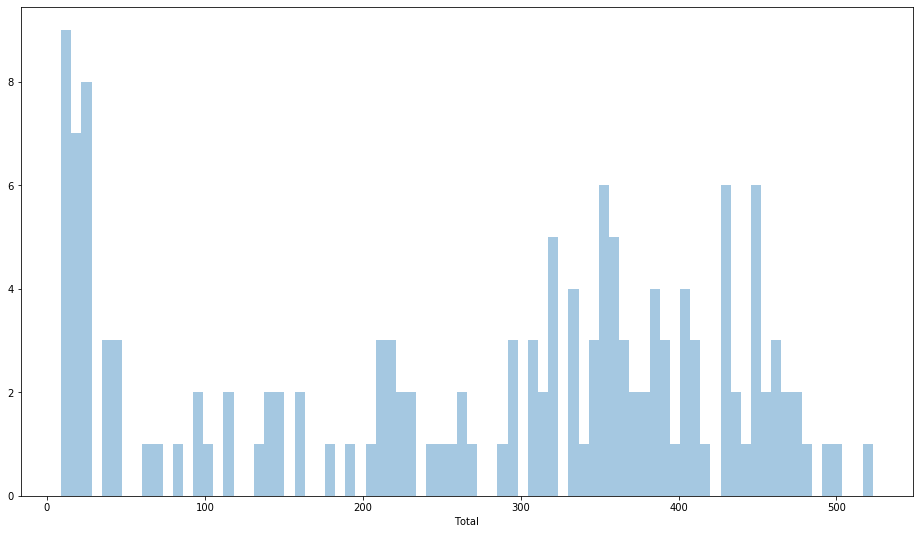

In [7]:
plt.figure(figsize=(16,9))
sns.distplot(original_data['Total'],bins=80,kde=False)

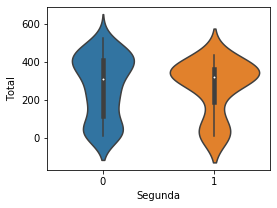

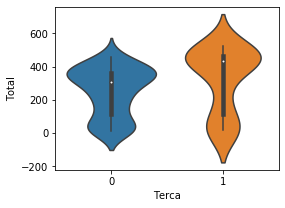

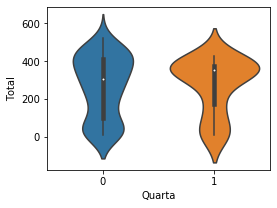

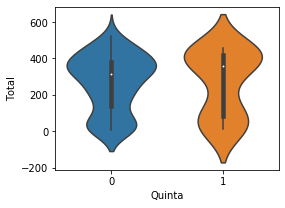

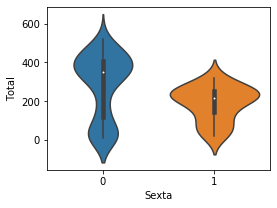

In [8]:
plt.figure(figsize=(4,3))
sns.violinplot(x='Segunda',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Terca',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Quarta',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Quinta',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Sexta',y='Total',data=original_data)

In [9]:
original_data.columns

Index(['Data', 'Temperatura', 'Precipitacao', 'Segunda', 'Terca', 'Quarta',
       'Quinta', 'Sexta', 'Primavera', 'Verao', 'Outono', 'Inverno',
       'Distancia Data Posterior', 'Distancia Data Anterior',
       'Vendas 1d anterior', 'Vendas 2d anterior', 'Vendas 3d anterior',
       'Vendas 4d anterior', 'Vendas 5d anterior', 'Total'],
      dtype='object')

In [10]:
X_train = original_data.iloc[:,1:19]

In [11]:
X_train.values

array([[ 29.9 ,  77.25,   0.  , ..., 101.  , 178.  , 215.  ],
       [ 29.2 ,  74.25,   1.  , ..., 178.  , 215.  , 263.  ],
       [ 31.9 ,  67.5 ,   0.  , ..., 215.  , 263.  , 145.  ],
       ...,
       [ 24.1 ,  88.25,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.3 ,  78.75,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ 25.2 ,  83.5 ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [12]:
y_train = original_data.iloc[:,19].values

In [13]:
y_train

array([ 42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294, 194,
       460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428, 306,
       220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 209, 227, 202,
       233, 391, 358, 456, 335, 323, 469, 319, 297, 411, 370, 412, 331,
       255, 446, 394, 472, 361, 263, 428, 336, 470, 343, 232, 449, 386,
       477, 377, 347, 480, 359, 224, 450, 375, 491, 347, 266, 415, 405,
       464, 358, 253, 446, 388, 523, 346, 245, 438, 361, 503, 319,  39,
        45,  97, 115, 138, 134, 211, 308, 353, 401, 382, 321, 352, 428,
       453, 433, 376, 449, 403, 286, 408, 393, 442, 431,  17,  12,  17,
        27,  16, 141, 117,  42,  20, 363, 162,  35, 351,  21,  23,  27,
        28, 162,  23,  14,  84,  41,   9,  15,  15,  17,  26,  10,  14,
        17,  26,  10,  22,  14], dtype=int64)

In [14]:
test_data = pd.read_csv('../dados/input/teste.csv')

In [15]:
test_data.head()

Data  Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  \
0  31/10/2018         31.4         72.25        0      0       1       0   
1  30/10/2018         28.0         72.75        0      1       0       0   
2  29/10/2018         21.0         82.75        1      0       0       0   
3  26/10/2018         25.4         85.50        0      0       0       0   
4  25/10/2018         21.4         91.00        0      0       0       1   

   Sexta  Primavera  Verao  Outono  Inverno  Distancia Data Posterior  \
0      0          1      0       0        0                         1   
1      0          1      0       0        0                         1   
2      0          1      0       0        0                         1   
3      1          1      0       0        0                         3   
4      0          1      0       0        0                         1   

   Distancia Data Anterior  Vendas 1d anterior  Vendas 2d anterior  \
0                        1                 437                 293   
1                        1                 293                 263   
2                        3                 263                 402   
3                        1                 402                 382   
4                        1                 382                 203   

   Vendas 3d anterior  Vendas 4d anterior  Vendas 5d anterior  Total  
0                 263                 402                 382    362  
1                 402                 382                 203    437  
2                 382                 203                 323    293  
3                 203                 323                  49    263  
4                 323                  49                 138    402

In [16]:
y_test = test_data.iloc[:,19].values

In [17]:
y_test

array([362, 437, 293, 263, 402, 382, 203, 323,  49, 138, 188, 165, 110,
       355, 387, 411, 287, 216, 440, 422, 432, 310, 238, 432, 407, 424,
       316, 268, 409, 393, 384, 321, 247, 416, 413, 432, 312, 417, 402,
       381, 337, 288, 429, 387, 495, 337, 243, 485, 415, 465, 358, 260,
       460, 436, 467, 331, 261, 473, 407, 476, 305,  20,  40,  68, 110,
        18, 204, 216, 363,   0, 256, 412,  73, 469, 391,   0, 439, 442,
       468, 382, 353, 425, 453, 247, 261, 309, 496, 456, 523, 426,  68,
       455, 507, 402, 352, 464, 442, 490, 413, 319, 529, 453, 503, 439,
       344, 532, 457, 335, 512, 481, 533, 460, 320, 526, 488, 547, 448,
       349, 532, 491, 572, 443, 398, 568, 465, 551, 486, 424, 398, 520,
       463, 389, 525, 490, 553, 340, 544, 500, 548, 413, 378, 514, 502,
       502, 430, 308, 461, 443, 470, 446], dtype=int64)

In [18]:
X_test = test_data.iloc[:,1:19]

In [19]:
X_test

Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  Sexta  \
0           31.4         72.25        0      0       1       0      0   
1           28.0         72.75        0      1       0       0      0   
2           21.0         82.75        1      0       0       0      0   
3           25.4         85.50        0      0       0       0      1   
4           21.4         91.00        0      0       0       1      0   
5           19.5         88.75        0      0       1       0      0   
6           30.2         74.25        0      1       0       0      0   
7           28.3         70.75        1      0       0       0      0   
8           21.1         85.00        0      0       0       0      1   
9           29.9         86.00        0      0       0       1      0   
10          29.5         76.00        0      0       1       0      0   
11          24.9         91.00        0      1       0       0      0   
12          24.1         90.00        1      0       0       0      0   
13          20.8         90.00        0      0       0       1      0   
14          28.6         88.00        0      0       1       0      0   
15          28.3         79.00        0      1       0       0      0   
16          21.7         93.00        1      0       0       0      0   
17          18.6         89.00        0      0       0       0      1   
18          23.0         86.00        0      0       0       1      0   
19          31.9         82.00        0      0       1       0      0   
20          30.9         81.00        0      1       0       0      0   
21          25.2         86.00        1      0       0       0      0   
22          22.2         87.00        0      0       0       0      1   
23          28.8         84.00        0      0       0       1      0   
24          32.2         66.50        0      0       1       0      0   
25          26.4         74.25        0      1       0       0      0   
26          33.5         61.00        1      0       0       0      0   
27          27.7         78.25        0      0       0       0      1   
28          25.0         79.50        0      0       0       1      0   
29          29.9         61.75        0      0       1       0      0   
..           ...           ...      ...    ...     ...     ...    ...   
120         28.2         68.25        0      1       0       0      0   
121         27.8         74.25        1      0       0       0      0   
122         27.2         72.00        0      0       0       0      1   
123         27.8         74.25        0      0       0       1      0   
124         26.8         79.00        0      0       1       0      0   
125         26.3         81.50        0      1       0       0      0   
126         26.0         77.50        1      0       0       0      0   
127         28.5         77.75        0      0       0       1      0   
128         28.2         83.00        0      0       1       0      0   
129         28.6         86.00        0      1       0       0      0   
130         28.2         81.75        1      0       0       0      0   
131         30.0         75.25        0      0       0       0      1   
132         26.4         80.50        0      0       0       1      0   
133         27.0         79.25        0      0       1       0      0   
134         31.0         79.25        0      1       0       0      0   
135         30.5         72.50        0      0       0       0      1   
136         31.0         66.00        0      0       0       1      0   
137         33.6         72.50        0      0       1       0      0   
138         29.3         81.50        0      1       0       0      0   
139         31.2         76.75        1      0       0       0      0   
140         26.8         77.25        0      0       0       0      1   
141         23.8         86.50        0      0       0       1      0   
142         30.0         84.25        0      0       1       0 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [21]:
standardized_X

array([[ 1.13495156,  0.30172306, -0.52522573, ..., -1.02827871,
        -0.53945104, -0.29949702],
       [ 0.96953093,  0.06398563,  1.90394328, ..., -0.54679855,
        -0.30940401, -0.00345878],
       [ 1.60758192, -0.47092356, -0.52522573, ..., -0.31543795,
        -0.01096462, -0.73121946],
       ...,
       [-0.23567649,  1.17342694,  1.90394328, ..., -1.65983061,
        -1.64616377, -1.62550165],
       [-1.13367418,  0.42059177, -0.52522573, ..., -1.65983061,
        -1.64616377, -1.62550165],
       [ 0.02427021,  0.79700935, -0.52522573, ..., -1.65983061,
        -1.64616377, -1.62550165]])

In [22]:
standardized_X_test

array([[ 1.48942433, -0.09450598, -0.52522573, ..., -0.01529447,
         0.8532661 ,  0.73046936],
       [ 0.68595271, -0.05488308, -0.52522573, ...,  0.85387101,
         0.72891636, -0.37350658],
       [-0.96825355,  0.737575  ,  1.90394328, ...,  0.72881123,
        -0.38401386,  0.36658902],
       ...,
       [ 1.22947763,  0.28191161, -0.52522573, ..., -1.39720506,
        -1.21093966, -1.23078399],
       [ 0.8041103 ,  0.83663226, -0.52522573, ..., -1.22212137,
        -1.24824458, -1.00258785],
       [ 0.49690057,  1.15361549,  1.90394328, ..., -1.2596393 ,
        -1.01819756, -0.52769317]])

In [23]:
y_train

array([ 42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294, 194,
       460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428, 306,
       220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 209, 227, 202,
       233, 391, 358, 456, 335, 323, 469, 319, 297, 411, 370, 412, 331,
       255, 446, 394, 472, 361, 263, 428, 336, 470, 343, 232, 449, 386,
       477, 377, 347, 480, 359, 224, 450, 375, 491, 347, 266, 415, 405,
       464, 358, 253, 446, 388, 523, 346, 245, 438, 361, 503, 319,  39,
        45,  97, 115, 138, 134, 211, 308, 353, 401, 382, 321, 352, 428,
       453, 433, 376, 449, 403, 286, 408, 393, 442, 431,  17,  12,  17,
        27,  16, 141, 117,  42,  20, 363, 162,  35, 351,  21,  23,  27,
        28, 162,  23,  14,  84,  41,   9,  15,  15,  17,  26,  10,  14,
        17,  26,  10,  22,  14], dtype=int64)

In [24]:
y_test

array([362, 437, 293, 263, 402, 382, 203, 323,  49, 138, 188, 165, 110,
       355, 387, 411, 287, 216, 440, 422, 432, 310, 238, 432, 407, 424,
       316, 268, 409, 393, 384, 321, 247, 416, 413, 432, 312, 417, 402,
       381, 337, 288, 429, 387, 495, 337, 243, 485, 415, 465, 358, 260,
       460, 436, 467, 331, 261, 473, 407, 476, 305,  20,  40,  68, 110,
        18, 204, 216, 363,   0, 256, 412,  73, 469, 391,   0, 439, 442,
       468, 382, 353, 425, 453, 247, 261, 309, 496, 456, 523, 426,  68,
       455, 507, 402, 352, 464, 442, 490, 413, 319, 529, 453, 503, 439,
       344, 532, 457, 335, 512, 481, 533, 460, 320, 526, 488, 547, 448,
       349, 532, 491, 572, 443, 398, 568, 465, 551, 486, 424, 398, 520,
       463, 389, 525, 490, 553, 340, 544, 500, 548, 413, 378, 514, 502,
       502, 430, 308, 461, 443, 470, 446], dtype=int64)

In [25]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['mae'])

In [26]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=500,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/500
148/148 [==============================] - 0s 2ms/step - loss: 96115.3767 - mean_absolute_error: 266.8602 - val_loss: 160134.2194 - val_mean_absolute_error: 378.7094
Epoch 2/500
148/148 [==============================] - 0s 54us/step - loss: 96043.3140 - mean_absolute_error: 266.7485 - val_loss: 160047.1156 - val_mean_absolute_error: 378.6026
Epoch 3/500
148/148 [==============================] - 0s 61us/step - loss: 95992.9090 - mean_absolute_error: 266.6762 - val_loss: 159956.7344 - val_mean_absolute_error: 378.4926
Epoch 4/500
148/148 [==============================] - 0s 47us/step - loss: 95942.0842 - mean_absolute_error: 266.6032 - val_loss: 159872.7750 - val_mean_absolute_error: 378.3900
Epoch 5/500
148/148 [==============================] - 0s 61us/step - loss: 95893.4557 - mean_absolute_error: 266.5336 - val_loss: 159804.1319 - val_mean_absolute_error: 378.3057
Epoch 6/500
148/148 [==============================] - 0s 47

148/148 [==============================] - 0s 54us/step - loss: 88765.9633 - mean_absolute_error: 256.0864 - val_loss: 148260.1131 - val_mean_absolute_error: 364.2379
Epoch 92/500
148/148 [==============================] - 0s 54us/step - loss: 88626.1285 - mean_absolute_error: 255.8796 - val_loss: 148082.0219 - val_mean_absolute_error: 364.0175
Epoch 93/500
148/148 [==============================] - 0s 41us/step - loss: 88509.1501 - mean_absolute_error: 255.7081 - val_loss: 147855.6256 - val_mean_absolute_error: 363.7374
Epoch 94/500
148/148 [==============================] - 0s 47us/step - loss: 88366.1894 - mean_absolute_error: 255.4964 - val_loss: 147614.7044 - val_mean_absolute_error: 363.4399
Epoch 95/500
148/148 [==============================] - 0s 47us/step - loss: 88214.9225 - mean_absolute_error: 255.2759 - val_loss: 147406.6594 - val_mean_absolute_error: 363.1817
Epoch 96/500
148/148 [==============================] - 0s 61us/step - loss: 88080.1505 - mean_absolute_error: 25

148/148 [==============================] - 0s 47us/step - loss: 71391.8709 - mean_absolute_error: 228.6946 - val_loss: 121135.9369 - val_mean_absolute_error: 328.6587
Epoch 182/500
148/148 [==============================] - 0s 54us/step - loss: 71137.5564 - mean_absolute_error: 228.2628 - val_loss: 120785.5169 - val_mean_absolute_error: 328.1689
Epoch 183/500
148/148 [==============================] - 0s 47us/step - loss: 70911.0926 - mean_absolute_error: 227.8807 - val_loss: 120446.6675 - val_mean_absolute_error: 327.6910
Epoch 184/500
148/148 [==============================] - 0s 47us/step - loss: 70688.0591 - mean_absolute_error: 227.4949 - val_loss: 120054.5050 - val_mean_absolute_error: 327.1421
Epoch 185/500
148/148 [==============================] - 0s 41us/step - loss: 70433.5629 - mean_absolute_error: 227.0650 - val_loss: 119678.2431 - val_mean_absolute_error: 326.6075
Epoch 186/500
148/148 [==============================] - 0s 54us/step - loss: 70192.9751 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 47580.9877 - mean_absolute_error: 182.1579 - val_loss: 83334.7669 - val_mean_absolute_error: 270.0517
Epoch 272/500
148/148 [==============================] - 0s 47us/step - loss: 47330.8125 - mean_absolute_error: 181.5722 - val_loss: 82942.9894 - val_mean_absolute_error: 269.3591
Epoch 273/500
148/148 [==============================] - 0s 54us/step - loss: 47082.0327 - mean_absolute_error: 180.9992 - val_loss: 82484.1141 - val_mean_absolute_error: 268.5467
Epoch 274/500
148/148 [==============================] - 0s 47us/step - loss: 46797.4085 - mean_absolute_error: 180.3326 - val_loss: 82058.0619 - val_mean_absolute_error: 267.7938
Epoch 275/500
148/148 [==============================] - 0s 54us/step - loss: 46527.9707 - mean_absolute_error: 179.7157 - val_loss: 81593.1387 - val_mean_absolute_error: 266.9725
Epoch 276/500
148/148 [==============================] - 0s 47us/step - loss: 46247.4392 - mean_absolute_error: 17

148/148 [==============================] - 0s 54us/step - loss: 25714.4725 - mean_absolute_error: 119.5085 - val_loss: 46022.2006 - val_mean_absolute_error: 190.3369
Epoch 362/500
148/148 [==============================] - 0s 54us/step - loss: 25519.0306 - mean_absolute_error: 118.7490 - val_loss: 45709.1355 - val_mean_absolute_error: 189.4810
Epoch 363/500
148/148 [==============================] - 0s 47us/step - loss: 25349.3021 - mean_absolute_error: 118.0845 - val_loss: 45401.2623 - val_mean_absolute_error: 188.6461
Epoch 364/500
148/148 [==============================] - 0s 54us/step - loss: 25181.4365 - mean_absolute_error: 117.4196 - val_loss: 45065.4097 - val_mean_absolute_error: 187.7235
Epoch 365/500
148/148 [==============================] - 0s 47us/step - loss: 24999.0179 - mean_absolute_error: 116.7047 - val_loss: 44755.3639 - val_mean_absolute_error: 186.8715
Epoch 366/500
148/148 [==============================] - 0s 54us/step - loss: 24823.1451 - mean_absolute_error: 11

Epoch 407/500
148/148 [==============================] - 0s 47us/step - loss: 18606.2315 - mean_absolute_error: 89.2027 - val_loss: 32061.9527 - val_mean_absolute_error: 146.3221
Epoch 408/500
148/148 [==============================] - 0s 54us/step - loss: 18487.8004 - mean_absolute_error: 88.5877 - val_loss: 31829.5067 - val_mean_absolute_error: 145.4373
Epoch 409/500
148/148 [==============================] - 0s 54us/step - loss: 18370.1291 - mean_absolute_error: 88.0399 - val_loss: 31564.4123 - val_mean_absolute_error: 144.4080
Epoch 410/500
148/148 [==============================] - 0s 47us/step - loss: 18253.4077 - mean_absolute_error: 87.4727 - val_loss: 31373.3297 - val_mean_absolute_error: 143.6771
Epoch 411/500
148/148 [==============================] - 0s 47us/step - loss: 18163.9271 - mean_absolute_error: 87.0305 - val_loss: 31114.9030 - val_mean_absolute_error: 142.6463
Epoch 412/500
148/148 [==============================] - 0s 61us/step - loss: 18049.0113 - mean_absolute_

Epoch 453/500
148/148 [==============================] - 0s 54us/step - loss: 15201.7518 - mean_absolute_error: 74.2109 - val_loss: 23945.4334 - val_mean_absolute_error: 113.7637
Epoch 454/500
148/148 [==============================] - 0s 54us/step - loss: 15154.5193 - mean_absolute_error: 74.0851 - val_loss: 23822.1727 - val_mean_absolute_error: 113.2640
Epoch 455/500
148/148 [==============================] - 0s 47us/step - loss: 15111.2616 - mean_absolute_error: 73.9575 - val_loss: 23704.0068 - val_mean_absolute_error: 112.7875
Epoch 456/500
148/148 [==============================] - 0s 54us/step - loss: 15065.0083 - mean_absolute_error: 73.8376 - val_loss: 23624.5347 - val_mean_absolute_error: 112.4772
Epoch 457/500
148/148 [==============================] - 0s 47us/step - loss: 15033.2308 - mean_absolute_error: 73.7477 - val_loss: 23543.7325 - val_mean_absolute_error: 112.1631
Epoch 458/500
148/148 [==============================] - 0s 47us/step - loss: 15000.6844 - mean_absolute_

Epoch 499/500
148/148 [==============================] - 0s 61us/step - loss: 13787.1569 - mean_absolute_error: 70.9353 - val_loss: 20828.4538 - val_mean_absolute_error: 102.8938
Epoch 500/500
148/148 [==============================] - 0s 47us/step - loss: 13759.1536 - mean_absolute_error: 70.9183 - val_loss: 20814.0945 - val_mean_absolute_error: 102.8829


In [27]:
model.predict(standardized_X_test)

array([[364.00278  ],
       [341.86603  ],
       [234.71864  ],
       [ 61.758892 ],
       [122.91906  ],
       [ 16.633865 ],
       [ 85.7738   ],
       [ 18.260368 ],
       [  7.3080583],
       [128.69106  ],
       [188.08656  ],
       [305.76703  ],
       [271.8786   ],
       [316.3906   ],
       [339.77942  ],
       [427.1153   ],
       [316.1327   ],
       [235.70256  ],
       [400.06113  ],
       [372.16714  ],
       [440.09717  ],
       [326.70764  ],
       [243.45775  ],
       [408.07016  ],
       [381.37793  ],
       [421.9195   ],
       [346.00214  ],
       [203.15657  ],
       [358.92828  ],
       [345.7536   ],
       [415.99976  ],
       [301.11398  ],
       [267.4401   ],
       [449.89786  ],
       [401.80118  ],
       [439.2326   ],
       [333.14722  ],
       [350.4258   ],
       [323.57233  ],
       [445.78912  ],
       [362.62686  ],
       [289.80606  ],
       [462.95453  ],
       [423.75302  ],
       [468.56668  ],
       [35

In [28]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [29]:
score

[20814.0944921875, 102.88287994384766]

In [30]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=1000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/1000
148/148 [==============================] - 0s 54us/step - loss: 13737.7104 - mean_absolute_error: 70.8848 - val_loss: 20715.6481 - val_mean_absolute_error: 102.5066
Epoch 2/1000
148/148 [==============================] - 0s 54us/step - loss: 13702.2049 - mean_absolute_error: 70.8248 - val_loss: 20654.7754 - val_mean_absolute_error: 102.3104
Epoch 3/1000
148/148 [==============================] - 0s 61us/step - loss: 13674.5523 - mean_absolute_error: 70.7829 - val_loss: 20634.0999 - val_mean_absolute_error: 102.2641
Epoch 4/1000
148/148 [==============================] - 0s 61us/step - loss: 13657.5182 - mean_absolute_error: 70.7604 - val_loss: 20585.2434 - val_mean_absolute_error: 102.1102
Epoch 5/1000
148/148 [==============================] - 0s 54us/step - loss: 13628.8759 - mean_absolute_error: 70.7289 - val_loss: 20559.5184 - val_mean_absolute_error: 102.0432
Epoch 6/1000
148/148 [==============================] - 0s 54us/

Epoch 47/1000
148/148 [==============================] - 0s 47us/step - loss: 12650.8631 - mean_absolute_error: 69.3867 - val_loss: 18836.7672 - val_mean_absolute_error: 96.6666
Epoch 48/1000
148/148 [==============================] - 0s 47us/step - loss: 12635.1571 - mean_absolute_error: 69.3526 - val_loss: 18816.2412 - val_mean_absolute_error: 96.6697
Epoch 49/1000
148/148 [==============================] - 0s 61us/step - loss: 12611.9487 - mean_absolute_error: 69.3266 - val_loss: 18801.2149 - val_mean_absolute_error: 96.6376
Epoch 50/1000
148/148 [==============================] - 0s 54us/step - loss: 12599.5393 - mean_absolute_error: 69.3107 - val_loss: 18750.0245 - val_mean_absolute_error: 96.4191
Epoch 51/1000
148/148 [==============================] - 0s 47us/step - loss: 12577.3579 - mean_absolute_error: 69.2647 - val_loss: 18729.1557 - val_mean_absolute_error: 96.3863
Epoch 52/1000
148/148 [==============================] - 0s 61us/step - loss: 12557.2798 - mean_absolute_error

148/148 [==============================] - 0s 54us/step - loss: 11733.3163 - mean_absolute_error: 68.1971 - val_loss: 17230.8657 - val_mean_absolute_error: 91.3636
Epoch 94/1000
148/148 [==============================] - 0s 54us/step - loss: 11710.1103 - mean_absolute_error: 68.1565 - val_loss: 17202.5267 - val_mean_absolute_error: 91.2818
Epoch 95/1000
148/148 [==============================] - 0s 61us/step - loss: 11690.2341 - mean_absolute_error: 68.1439 - val_loss: 17195.0969 - val_mean_absolute_error: 91.3418
Epoch 96/1000
148/148 [==============================] - 0s 47us/step - loss: 11667.8584 - mean_absolute_error: 68.0995 - val_loss: 17158.2470 - val_mean_absolute_error: 91.2306
Epoch 97/1000
148/148 [==============================] - 0s 54us/step - loss: 11643.6065 - mean_absolute_error: 68.0907 - val_loss: 17120.4953 - val_mean_absolute_error: 91.1040
Epoch 98/1000
148/148 [==============================] - 0s 54us/step - loss: 11622.2995 - mean_absolute_error: 68.0542 - va

Epoch 139/1000
148/148 [==============================] - 0s 54us/step - loss: 10888.1118 - mean_absolute_error: 67.0531 - val_loss: 16074.9616 - val_mean_absolute_error: 88.0881
Epoch 140/1000
148/148 [==============================] - 0s 47us/step - loss: 10872.7691 - mean_absolute_error: 67.0230 - val_loss: 16046.6465 - val_mean_absolute_error: 87.9888
Epoch 141/1000
148/148 [==============================] - 0s 54us/step - loss: 10853.5849 - mean_absolute_error: 66.9855 - val_loss: 16024.9640 - val_mean_absolute_error: 87.9539
Epoch 142/1000
148/148 [==============================] - 0s 54us/step - loss: 10829.4371 - mean_absolute_error: 66.9654 - val_loss: 15984.1606 - val_mean_absolute_error: 87.8089
Epoch 143/1000
148/148 [==============================] - 0s 68us/step - loss: 10807.5171 - mean_absolute_error: 66.9401 - val_loss: 15964.0144 - val_mean_absolute_error: 87.7524
Epoch 144/1000
148/148 [==============================] - 0s 47us/step - loss: 10792.4875 - mean_absolute

Epoch 185/1000
148/148 [==============================] - 0s 47us/step - loss: 10086.1511 - mean_absolute_error: 66.0063 - val_loss: 14830.7155 - val_mean_absolute_error: 83.6495
Epoch 186/1000
148/148 [==============================] - 0s 47us/step - loss: 10069.2162 - mean_absolute_error: 65.9468 - val_loss: 14800.4650 - val_mean_absolute_error: 83.5443
Epoch 187/1000
148/148 [==============================] - 0s 54us/step - loss: 10048.7092 - mean_absolute_error: 65.9322 - val_loss: 14794.1202 - val_mean_absolute_error: 83.5769
Epoch 188/1000
148/148 [==============================] - 0s 47us/step - loss: 10031.4201 - mean_absolute_error: 65.8971 - val_loss: 14790.1173 - val_mean_absolute_error: 83.6452
Epoch 189/1000
148/148 [==============================] - 0s 101us/step - loss: 10012.2674 - mean_absolute_error: 65.9009 - val_loss: 14772.9943 - val_mean_absolute_error: 83.5817
Epoch 190/1000
148/148 [==============================] - 0s 47us/step - loss: 9996.4805 - mean_absolute

Epoch 231/1000
148/148 [==============================] - 0s 47us/step - loss: 9351.0803 - mean_absolute_error: 64.8478 - val_loss: 13746.1421 - val_mean_absolute_error: 79.5920
Epoch 232/1000
148/148 [==============================] - 0s 54us/step - loss: 9334.4956 - mean_absolute_error: 64.8094 - val_loss: 13748.2419 - val_mean_absolute_error: 79.6699
Epoch 233/1000
148/148 [==============================] - 0s 47us/step - loss: 9320.1092 - mean_absolute_error: 64.7796 - val_loss: 13727.6283 - val_mean_absolute_error: 79.6076
Epoch 234/1000
148/148 [==============================] - 0s 61us/step - loss: 9303.7094 - mean_absolute_error: 64.7783 - val_loss: 13705.4975 - val_mean_absolute_error: 79.4833
Epoch 235/1000
148/148 [==============================] - 0s 47us/step - loss: 9293.7025 - mean_absolute_error: 64.7417 - val_loss: 13683.6109 - val_mean_absolute_error: 79.3860
Epoch 236/1000
148/148 [==============================] - 0s 47us/step - loss: 9281.0801 - mean_absolute_error

148/148 [==============================] - 0s 54us/step - loss: 8695.9932 - mean_absolute_error: 63.6477 - val_loss: 12843.9136 - val_mean_absolute_error: 76.1067
Epoch 278/1000
148/148 [==============================] - 0s 47us/step - loss: 8676.1174 - mean_absolute_error: 63.5905 - val_loss: 12825.3429 - val_mean_absolute_error: 76.0702
Epoch 279/1000
148/148 [==============================] - 0s 47us/step - loss: 8657.3658 - mean_absolute_error: 63.5762 - val_loss: 12810.5866 - val_mean_absolute_error: 76.0021
Epoch 280/1000
148/148 [==============================] - 0s 54us/step - loss: 8649.9015 - mean_absolute_error: 63.6090 - val_loss: 12770.8673 - val_mean_absolute_error: 75.8250
Epoch 281/1000
148/148 [==============================] - 0s 54us/step - loss: 8623.3618 - mean_absolute_error: 63.5489 - val_loss: 12763.8283 - val_mean_absolute_error: 75.8130
Epoch 282/1000
148/148 [==============================] - 0s 54us/step - loss: 8616.9722 - mean_absolute_error: 63.5474 - val

148/148 [==============================] - 0s 47us/step - loss: 7527.7178 - mean_absolute_error: 61.1622 - val_loss: 11413.4260 - val_mean_absolute_error: 69.8661
Epoch 370/1000
148/148 [==============================] - 0s 54us/step - loss: 7519.6186 - mean_absolute_error: 61.1199 - val_loss: 11401.8947 - val_mean_absolute_error: 69.8163
Epoch 371/1000
148/148 [==============================] - 0s 47us/step - loss: 7511.4865 - mean_absolute_error: 61.0952 - val_loss: 11395.5625 - val_mean_absolute_error: 69.7847
Epoch 372/1000
148/148 [==============================] - 0s 54us/step - loss: 7503.7335 - mean_absolute_error: 61.0506 - val_loss: 11369.1113 - val_mean_absolute_error: 69.6425
Epoch 373/1000
148/148 [==============================] - 0s 47us/step - loss: 7483.7449 - mean_absolute_error: 61.0235 - val_loss: 11362.0117 - val_mean_absolute_error: 69.6221
Epoch 374/1000
148/148 [==============================] - 0s 47us/step - loss: 7477.7818 - mean_absolute_error: 61.0195 - val

In [31]:
model.predict(standardized_X_test)

array([[364.2938  ],
       [386.2965  ],
       [316.075   ],
       [131.76132 ],
       [247.95161 ],
       [105.785675],
       [200.46127 ],
       [ 54.534107],
       [ 17.938545],
       [ 77.95958 ],
       [114.26445 ],
       [309.999   ],
       [372.86996 ],
       [335.65155 ],
       [330.4397  ],
       [406.23627 ],
       [336.00623 ],
       [271.23236 ],
       [427.72665 ],
       [366.61374 ],
       [430.0262  ],
       [340.25    ],
       [263.32455 ],
       [422.4441  ],
       [373.91174 ],
       [430.83405 ],
       [348.09058 ],
       [201.54565 ],
       [360.52362 ],
       [325.33398 ],
       [403.5119  ],
       [321.77084 ],
       [245.40248 ],
       [420.66168 ],
       [394.07306 ],
       [465.52496 ],
       [393.73285 ],
       [333.4213  ],
       [321.16846 ],
       [442.49902 ],
       [351.4117  ],
       [272.712   ],
       [444.72012 ],
       [412.4351  ],
       [444.4976  ],
       [358.94925 ],
       [313.43158 ],
       [449.3

In [32]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 20us/step


In [33]:
score

[11074.086689453125, 68.58760620117188]

In [34]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=250,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/250
148/148 [==============================] - 0s 54us/step - loss: 7207.6053 - mean_absolute_error: 60.3440 - val_loss: 11063.5683 - val_mean_absolute_error: 68.5138
Epoch 2/250
148/148 [==============================] - 0s 61us/step - loss: 7200.1771 - mean_absolute_error: 60.2724 - val_loss: 11047.3229 - val_mean_absolute_error: 68.4734
Epoch 3/250
148/148 [==============================] - 0s 68us/step - loss: 7185.1067 - mean_absolute_error: 60.2359 - val_loss: 11038.8447 - val_mean_absolute_error: 68.4251
Epoch 4/250
148/148 [==============================] - 0s 54us/step - loss: 7178.3605 - mean_absolute_error: 60.2248 - val_loss: 11034.6875 - val_mean_absolute_error: 68.4221
Epoch 5/250
148/148 [==============================] - 0s 54us/step - loss: 7171.8580 - mean_absolute_error: 60.2333 - val_loss: 11026.8109 - val_mean_absolute_error: 68.3785
Epoch 6/250
148/148 [==============================] - 0s 47us/step - loss: 716

148/148 [==============================] - 0s 54us/step - loss: 6815.4507 - mean_absolute_error: 59.1904 - val_loss: 10662.8004 - val_mean_absolute_error: 67.2052
Epoch 48/250
148/148 [==============================] - 0s 54us/step - loss: 6810.2669 - mean_absolute_error: 59.1830 - val_loss: 10643.6768 - val_mean_absolute_error: 67.0990
Epoch 49/250
148/148 [==============================] - 0s 54us/step - loss: 6799.2825 - mean_absolute_error: 59.1657 - val_loss: 10641.4857 - val_mean_absolute_error: 67.0831
Epoch 50/250
148/148 [==============================] - 0s 54us/step - loss: 6794.2423 - mean_absolute_error: 59.1207 - val_loss: 10626.2669 - val_mean_absolute_error: 67.0709
Epoch 51/250
148/148 [==============================] - 0s 54us/step - loss: 6782.5047 - mean_absolute_error: 59.1165 - val_loss: 10621.9325 - val_mean_absolute_error: 67.0591
Epoch 52/250
148/148 [==============================] - 0s 68us/step - loss: 6777.1728 - mean_absolute_error: 59.0856 - val_loss: 106

In [35]:
model.predict(standardized_X_test)

array([[363.7159  ],
       [395.95752 ],
       [332.63922 ],
       [148.95491 ],
       [269.87268 ],
       [123.68558 ],
       [238.16628 ],
       [ 66.92257 ],
       [ 22.533941],
       [ 73.923615],
       [100.10383 ],
       [306.90585 ],
       [393.86478 ],
       [330.61496 ],
       [325.11087 ],
       [402.17883 ],
       [335.92078 ],
       [269.47797 ],
       [425.76932 ],
       [364.7542  ],
       [430.80624 ],
       [341.502   ],
       [261.29272 ],
       [423.25296 ],
       [371.14648 ],
       [430.9075  ],
       [356.06802 ],
       [207.57382 ],
       [361.79468 ],
       [324.03128 ],
       [403.28958 ],
       [325.9152  ],
       [237.16905 ],
       [412.52136 ],
       [386.04004 ],
       [469.9818  ],
       [415.4084  ],
       [326.01166 ],
       [310.41403 ],
       [436.70273 ],
       [353.9146  ],
       [277.78934 ],
       [444.40872 ],
       [405.69223 ],
       [440.47156 ],
       [355.59857 ],
       [318.93954 ],
       [448.2

In [36]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [37]:
score

[10216.75, 65.64468322753906]

In [38]:
print(model.metrics_names)

['loss', 'mean_absolute_error']


In [39]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=125,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/125
148/148 [==============================] - 0s 54us/step - loss: 6306.8818 - mean_absolute_error: 57.3263 - val_loss: 10206.7563 - val_mean_absolute_error: 65.6208
Epoch 2/125
148/148 [==============================] - 0s 54us/step - loss: 6303.7697 - mean_absolute_error: 57.3420 - val_loss: 10205.4469 - val_mean_absolute_error: 65.6064
Epoch 3/125
148/148 [==============================] - 0s 41us/step - loss: 6299.3854 - mean_absolute_error: 57.3091 - val_loss: 10204.2656 - val_mean_absolute_error: 65.5800
Epoch 4/125
148/148 [==============================] - 0s 47us/step - loss: 6295.2121 - mean_absolute_error: 57.2729 - val_loss: 10196.2134 - val_mean_absolute_error: 65.5818
Epoch 5/125
148/148 [==============================] - 0s 54us/step - loss: 6286.7681 - mean_absolute_error: 57.2557 - val_loss: 10194.8472 - val_mean_absolute_error: 65.5872
Epoch 6/125
148/148 [==============================] - 0s 54us/step - loss: 628

In [40]:
model.predict(standardized_X_test)

array([[365.359   ],
       [399.08896 ],
       [337.1316  ],
       [152.01875 ],
       [273.57437 ],
       [126.238464],
       [243.22316 ],
       [ 68.77889 ],
       [ 23.32112 ],
       [ 75.08518 ],
       [100.43142 ],
       [308.99396 ],
       [398.64    ],
       [332.43207 ],
       [326.39282 ],
       [404.5471  ],
       [339.03497 ],
       [271.60495 ],
       [428.04935 ],
       [366.35898 ],
       [433.6506  ],
       [344.54407 ],
       [263.29413 ],
       [425.73486 ],
       [372.4514  ],
       [433.51807 ],
       [359.46396 ],
       [209.38116 ],
       [363.52872 ],
       [324.7966  ],
       [405.3934  ],
       [328.6775  ],
       [238.14058 ],
       [413.2947  ],
       [386.38242 ],
       [472.31137 ],
       [419.63828 ],
       [326.8032  ],
       [310.9029  ],
       [438.43475 ],
       [356.38895 ],
       [279.22852 ],
       [445.94632 ],
       [405.88043 ],
       [442.2801  ],
       [357.7572  ],
       [320.3412  ],
       [449.7

In [41]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 33us/step


In [42]:
score

[10158.8683984375, 65.57212341308593]

In [43]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=50,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/50
148/148 [==============================] - 0s 54us/step - loss: 6224.7263 - mean_absolute_error: 56.9415 - val_loss: 10155.5687 - val_mean_absolute_error: 65.5748
Epoch 2/50
148/148 [==============================] - 0s 61us/step - loss: 6219.2323 - mean_absolute_error: 56.9186 - val_loss: 10150.5171 - val_mean_absolute_error: 65.5462
Epoch 3/50
148/148 [==============================] - 0s 47us/step - loss: 6216.2961 - mean_absolute_error: 56.9157 - val_loss: 10141.7858 - val_mean_absolute_error: 65.4916
Epoch 4/50
148/148 [==============================] - 0s 47us/step - loss: 6207.9800 - mean_absolute_error: 56.8638 - val_loss: 10135.7479 - val_mean_absolute_error: 65.4894
Epoch 5/50
148/148 [==============================] - 0s 47us/step - loss: 6204.0606 - mean_absolute_error: 56.8622 - val_loss: 10126.9896 - val_mean_absolute_error: 65.4896
Epoch 6/50
148/148 [==============================] - 0s 47us/step - loss: 6197.6897

In [44]:
model.predict(standardized_X_test)

array([[361.64386 ],
       [396.2741  ],
       [338.7767  ],
       [155.3877  ],
       [277.0165  ],
       [131.30673 ],
       [249.82927 ],
       [ 73.36813 ],
       [ 24.91341 ],
       [ 74.59792 ],
       [ 98.55109 ],
       [305.01324 ],
       [399.94073 ],
       [329.04013 ],
       [322.69778 ],
       [399.5325  ],
       [336.56897 ],
       [269.81866 ],
       [423.36255 ],
       [362.5219  ],
       [429.24268 ],
       [341.4223  ],
       [261.21545 ],
       [421.28552 ],
       [368.02457 ],
       [428.6929  ],
       [356.44568 ],
       [209.98975 ],
       [361.11755 ],
       [322.2955  ],
       [402.47934 ],
       [328.3417  ],
       [236.73795 ],
       [407.07104 ],
       [381.86963 ],
       [468.64905 ],
       [421.2738  ],
       [323.19363 ],
       [308.41403 ],
       [434.2168  ],
       [354.50833 ],
       [277.80875 ],
       [441.0996  ],
       [400.5332  ],
       [437.79355 ],
       [355.04736 ],
       [318.10617 ],
       [444.9

In [45]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [46]:
score

[9972.4987109375, 65.03316726684571]

In [47]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='sigmoid',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['mae'])

In [48]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=125,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/125
148/148 [==============================] - 0s 1ms/step - loss: 96310.2652 - mean_absolute_error: 267.0550 - val_loss: 160645.6256 - val_mean_absolute_error: 379.2752
Epoch 2/125
148/148 [==============================] - 0s 54us/step - loss: 96245.2889 - mean_absolute_error: 266.9552 - val_loss: 160563.3069 - val_mean_absolute_error: 379.1725
Epoch 3/125
148/148 [==============================] - 0s 47us/step - loss: 96195.1434 - mean_absolute_error: 266.8792 - val_loss: 160502.6963 - val_mean_absolute_error: 379.0965
Epoch 4/125
148/148 [==============================] - 0s 47us/step - loss: 96155.3976 - mean_absolute_error: 266.8163 - val_loss: 160446.7338 - val_mean_absolute_error: 379.0260
Epoch 5/125
148/148 [==============================] - 0s 61us/step - loss: 96117.4343 - mean_absolute_error: 266.7558 - val_loss: 160392.0175 - val_mean_absolute_error: 378.9575
Epoch 6/125
148/148 [==============================] - 0s 47

148/148 [==============================] - 0s 61us/step - loss: 93138.5988 - mean_absolute_error: 261.9099 - val_loss: 155944.7125 - val_mean_absolute_error: 373.3644
Epoch 92/125
148/148 [==============================] - 0s 61us/step - loss: 93104.9240 - mean_absolute_error: 261.8558 - val_loss: 155893.6425 - val_mean_absolute_error: 373.2994
Epoch 93/125
148/148 [==============================] - 0s 54us/step - loss: 93069.8938 - mean_absolute_error: 261.7997 - val_loss: 155839.4500 - val_mean_absolute_error: 373.2303
Epoch 94/125
148/148 [==============================] - 0s 61us/step - loss: 93033.6155 - mean_absolute_error: 261.7364 - val_loss: 155777.7375 - val_mean_absolute_error: 373.1526
Epoch 95/125
148/148 [==============================] - 0s 61us/step - loss: 92993.8214 - mean_absolute_error: 261.6745 - val_loss: 155723.1856 - val_mean_absolute_error: 373.0835
Epoch 96/125
148/148 [==============================] - 0s 61us/step - loss: 92958.2827 - mean_absolute_error: 26

In [49]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=500,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/500
148/148 [==============================] - 0s 61us/step - loss: 91823.5103 - mean_absolute_error: 259.7984 - val_loss: 153968.3312 - val_mean_absolute_error: 370.8550
Epoch 2/500
148/148 [==============================] - 0s 54us/step - loss: 91784.7473 - mean_absolute_error: 259.7371 - val_loss: 153908.9138 - val_mean_absolute_error: 370.7796
Epoch 3/500
148/148 [==============================] - 0s 54us/step - loss: 91744.9913 - mean_absolute_error: 259.6753 - val_loss: 153848.2563 - val_mean_absolute_error: 370.7023
Epoch 4/500
148/148 [==============================] - 0s 68us/step - loss: 91705.2262 - mean_absolute_error: 259.6124 - val_loss: 153793.5256 - val_mean_absolute_error: 370.6323
Epoch 5/500
148/148 [==============================] - 0s 54us/step - loss: 91668.3689 - mean_absolute_error: 259.5536 - val_loss: 153729.5394 - val_mean_absolute_error: 370.5513
Epoch 6/500
148/148 [==============================] - 0s 4

148/148 [==============================] - 0s 54us/step - loss: 87912.8053 - mean_absolute_error: 253.8150 - val_loss: 148000.0500 - val_mean_absolute_error: 363.2014
Epoch 92/500
148/148 [==============================] - 0s 47us/step - loss: 87866.2705 - mean_absolute_error: 253.7431 - val_loss: 147921.0419 - val_mean_absolute_error: 363.0987
Epoch 93/500
148/148 [==============================] - 0s 54us/step - loss: 87815.3159 - mean_absolute_error: 253.6657 - val_loss: 147848.4163 - val_mean_absolute_error: 363.0050
Epoch 94/500
148/148 [==============================] - 0s 47us/step - loss: 87768.1206 - mean_absolute_error: 253.5938 - val_loss: 147774.6363 - val_mean_absolute_error: 362.9097
Epoch 95/500
148/148 [==============================] - 0s 41us/step - loss: 87719.7796 - mean_absolute_error: 253.5206 - val_loss: 147709.5625 - val_mean_absolute_error: 362.8244
Epoch 96/500
148/148 [==============================] - 0s 54us/step - loss: 87676.6620 - mean_absolute_error: 25

148/148 [==============================] - 0s 47us/step - loss: 83737.3431 - mean_absolute_error: 247.3000 - val_loss: 141692.0594 - val_mean_absolute_error: 354.8800
Epoch 182/500
148/148 [==============================] - 0s 54us/step - loss: 83692.1577 - mean_absolute_error: 247.2267 - val_loss: 141623.8987 - val_mean_absolute_error: 354.7882
Epoch 183/500
148/148 [==============================] - 0s 47us/step - loss: 83645.8577 - mean_absolute_error: 247.1516 - val_loss: 141556.1125 - val_mean_absolute_error: 354.6982
Epoch 184/500
148/148 [==============================] - 0s 47us/step - loss: 83601.6410 - mean_absolute_error: 247.0807 - val_loss: 141484.7831 - val_mean_absolute_error: 354.6026
Epoch 185/500
148/148 [==============================] - 0s 47us/step - loss: 83555.1491 - mean_absolute_error: 247.0052 - val_loss: 141420.1969 - val_mean_absolute_error: 354.5164
Epoch 186/500
148/148 [==============================] - 0s 47us/step - loss: 83511.9227 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 79721.9486 - mean_absolute_error: 240.5678 - val_loss: 135708.1269 - val_mean_absolute_error: 346.7442
Epoch 272/500
148/148 [==============================] - 0s 47us/step - loss: 79679.6046 - mean_absolute_error: 240.4918 - val_loss: 135650.5819 - val_mean_absolute_error: 346.6652
Epoch 273/500
148/148 [==============================] - 0s 54us/step - loss: 79639.7008 - mean_absolute_error: 240.4222 - val_loss: 135581.1013 - val_mean_absolute_error: 346.5702
Epoch 274/500
148/148 [==============================] - 0s 47us/step - loss: 79592.8385 - mean_absolute_error: 240.3392 - val_loss: 135511.1556 - val_mean_absolute_error: 346.4744
Epoch 275/500
148/148 [==============================] - 0s 61us/step - loss: 79546.0004 - mean_absolute_error: 240.2588 - val_loss: 135447.3062 - val_mean_absolute_error: 346.3862
Epoch 276/500
148/148 [==============================] - 0s 68us/step - loss: 79501.2378 - mean_absolute_erro

148/148 [==============================] - 0s 47us/step - loss: 75698.8700 - mean_absolute_error: 232.7937 - val_loss: 129959.4975 - val_mean_absolute_error: 338.7113
Epoch 362/500
148/148 [==============================] - 0s 61us/step - loss: 75657.5769 - mean_absolute_error: 232.7069 - val_loss: 129896.0562 - val_mean_absolute_error: 338.6205
Epoch 363/500
148/148 [==============================] - 0s 54us/step - loss: 75610.1465 - mean_absolute_error: 232.6085 - val_loss: 129829.5506 - val_mean_absolute_error: 338.5260
Epoch 364/500
148/148 [==============================] - 0s 54us/step - loss: 75564.3867 - mean_absolute_error: 232.5249 - val_loss: 129765.9469 - val_mean_absolute_error: 338.4346
Epoch 365/500
148/148 [==============================] - 0s 61us/step - loss: 75517.1968 - mean_absolute_error: 232.4233 - val_loss: 129705.3550 - val_mean_absolute_error: 338.3485
Epoch 366/500
148/148 [==============================] - 0s 54us/step - loss: 75472.8349 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 71721.6017 - mean_absolute_error: 225.3402 - val_loss: 124346.2344 - val_mean_absolute_error: 330.6289
Epoch 452/500
148/148 [==============================] - 0s 47us/step - loss: 71677.4899 - mean_absolute_error: 225.2740 - val_loss: 124282.9244 - val_mean_absolute_error: 330.5346
Epoch 453/500
148/148 [==============================] - 0s 54us/step - loss: 71633.4864 - mean_absolute_error: 225.2012 - val_loss: 124224.3938 - val_mean_absolute_error: 330.4494
Epoch 454/500
148/148 [==============================] - 0s 47us/step - loss: 71592.0055 - mean_absolute_error: 225.1263 - val_loss: 124162.4244 - val_mean_absolute_error: 330.3574
Epoch 455/500
148/148 [==============================] - 0s 47us/step - loss: 71546.3509 - mean_absolute_error: 225.0553 - val_loss: 124097.8444 - val_mean_absolute_error: 330.2618
Epoch 456/500
148/148 [==============================] - 0s 54us/step - loss: 71500.3586 - mean_absolute_erro

In [50]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=1000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/1000
148/148 [==============================] - 0s 61us/step - loss: 69586.7373 - mean_absolute_error: 221.9196 - val_loss: 121283.3850 - val_mean_absolute_error: 326.1107
Epoch 2/1000
148/148 [==============================] - 0s 61us/step - loss: 69545.2702 - mean_absolute_error: 221.8525 - val_loss: 121215.2263 - val_mean_absolute_error: 326.0095
Epoch 3/1000
148/148 [==============================] - 0s 61us/step - loss: 69498.6346 - mean_absolute_error: 221.7934 - val_loss: 121151.8338 - val_mean_absolute_error: 325.9161
Epoch 4/1000
148/148 [==============================] - 0s 54us/step - loss: 69455.9087 - mean_absolute_error: 221.7231 - val_loss: 121087.9156 - val_mean_absolute_error: 325.8214
Epoch 5/1000
148/148 [==============================] - 0s 54us/step - loss: 69412.7650 - mean_absolute_error: 221.6593 - val_loss: 121022.5594 - val_mean_absolute_error: 325.7241
Epoch 6/1000
148/148 [==============================] 

148/148 [==============================] - 0s 61us/step - loss: 67702.2517 - mean_absolute_error: 219.0867 - val_loss: 118544.8837 - val_mean_absolute_error: 322.0461
Epoch 47/1000
148/148 [==============================] - 0s 54us/step - loss: 67660.4918 - mean_absolute_error: 219.0370 - val_loss: 118483.7250 - val_mean_absolute_error: 321.9573
Epoch 48/1000
148/148 [==============================] - 0s 47us/step - loss: 67620.2593 - mean_absolute_error: 218.9514 - val_loss: 118417.1169 - val_mean_absolute_error: 321.8608
Epoch 49/1000
148/148 [==============================] - 0s 54us/step - loss: 67575.6130 - mean_absolute_error: 218.8940 - val_loss: 118360.1487 - val_mean_absolute_error: 321.7786
Epoch 50/1000
148/148 [==============================] - 0s 54us/step - loss: 67535.9979 - mean_absolute_error: 218.8260 - val_loss: 118292.1556 - val_mean_absolute_error: 321.6800
Epoch 51/1000
148/148 [==============================] - 0s 54us/step - loss: 67492.1547 - mean_absolute_erro

148/148 [==============================] - 0s 88us/step - loss: 64093.6131 - mean_absolute_error: 213.5349 - val_loss: 113190.7325 - val_mean_absolute_error: 314.2012
Epoch 137/1000
148/148 [==============================] - 0s 68us/step - loss: 64058.5058 - mean_absolute_error: 213.4897 - val_loss: 113130.3675 - val_mean_absolute_error: 314.1116
Epoch 138/1000
148/148 [==============================] - 0s 61us/step - loss: 64019.9873 - mean_absolute_error: 213.4024 - val_loss: 113072.4869 - val_mean_absolute_error: 314.0257
Epoch 139/1000
148/148 [==============================] - 0s 74us/step - loss: 63979.7242 - mean_absolute_error: 213.3467 - val_loss: 113012.3450 - val_mean_absolute_error: 313.9366
Epoch 140/1000
148/148 [==============================] - 0s 68us/step - loss: 63940.2573 - mean_absolute_error: 213.2832 - val_loss: 112947.7119 - val_mean_absolute_error: 313.8392
Epoch 141/1000
148/148 [==============================] - 0s 74us/step - loss: 63897.8306 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 60690.9895 - mean_absolute_error: 207.8633 - val_loss: 108022.6163 - val_mean_absolute_error: 306.5675
Epoch 227/1000
148/148 [==============================] - 0s 68us/step - loss: 60652.6047 - mean_absolute_error: 207.8129 - val_loss: 107969.6869 - val_mean_absolute_error: 306.4897
Epoch 228/1000
148/148 [==============================] - 0s 68us/step - loss: 60616.8542 - mean_absolute_error: 207.7798 - val_loss: 107917.7400 - val_mean_absolute_error: 306.4121
Epoch 229/1000
148/148 [==============================] - 0s 68us/step - loss: 60582.7535 - mean_absolute_error: 207.7110 - val_loss: 107867.0556 - val_mean_absolute_error: 306.3362
Epoch 230/1000
148/148 [==============================] - 0s 68us/step - loss: 60548.6331 - mean_absolute_error: 207.6226 - val_loss: 107806.4500 - val_mean_absolute_error: 306.2463
Epoch 231/1000
148/148 [==============================] - 0s 74us/step - loss: 60509.8750 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 57449.5872 - mean_absolute_error: 202.3577 - val_loss: 103043.8341 - val_mean_absolute_error: 299.0742
Epoch 317/1000
148/148 [==============================] - 0s 68us/step - loss: 57414.5534 - mean_absolute_error: 202.2702 - val_loss: 102983.5284 - val_mean_absolute_error: 298.9820
Epoch 318/1000
148/148 [==============================] - 0s 74us/step - loss: 57377.4827 - mean_absolute_error: 202.2228 - val_loss: 102926.4878 - val_mean_absolute_error: 298.8942
Epoch 319/1000
148/148 [==============================] - 0s 68us/step - loss: 57340.0172 - mean_absolute_error: 202.1350 - val_loss: 102874.9747 - val_mean_absolute_error: 298.8156
Epoch 320/1000
148/148 [==============================] - 0s 68us/step - loss: 57306.6365 - mean_absolute_error: 202.0340 - val_loss: 102816.8931 - val_mean_absolute_error: 298.7270
Epoch 321/1000
148/148 [==============================] - 0s 74us/step - loss: 57268.7494 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 54343.9327 - mean_absolute_error: 196.4868 - val_loss: 98213.4019 - val_mean_absolute_error: 291.6991
Epoch 407/1000
148/148 [==============================] - 0s 68us/step - loss: 54308.0858 - mean_absolute_error: 196.4154 - val_loss: 98164.3566 - val_mean_absolute_error: 291.6229
Epoch 408/1000
148/148 [==============================] - 0s 61us/step - loss: 54276.4723 - mean_absolute_error: 196.3579 - val_loss: 98106.8613 - val_mean_absolute_error: 291.5331
Epoch 409/1000
148/148 [==============================] - 0s 68us/step - loss: 54241.1474 - mean_absolute_error: 196.3060 - val_loss: 98055.5431 - val_mean_absolute_error: 291.4523
Epoch 410/1000
148/148 [==============================] - 0s 61us/step - loss: 54206.7494 - mean_absolute_error: 196.2673 - val_loss: 98000.5534 - val_mean_absolute_error: 291.3666
Epoch 411/1000
148/148 [==============================] - 0s 61us/step - loss: 54172.4505 - mean_absolute_erro

148/148 [==============================] - 0s 74us/step - loss: 52835.7086 - mean_absolute_error: 193.4787 - val_loss: 95864.8291 - val_mean_absolute_error: 288.0343
Epoch 452/1000
148/148 [==============================] - 0s 81us/step - loss: 52803.7276 - mean_absolute_error: 193.3848 - val_loss: 95804.9566 - val_mean_absolute_error: 287.9403
Epoch 453/1000
148/148 [==============================] - 0s 74us/step - loss: 52767.8126 - mean_absolute_error: 193.3292 - val_loss: 95754.5728 - val_mean_absolute_error: 287.8609
Epoch 454/1000
148/148 [==============================] - 0s 74us/step - loss: 52735.0645 - mean_absolute_error: 193.2634 - val_loss: 95704.4162 - val_mean_absolute_error: 287.7824
Epoch 455/1000
148/148 [==============================] - 0s 68us/step - loss: 52703.1534 - mean_absolute_error: 193.2257 - val_loss: 95650.3494 - val_mean_absolute_error: 287.6968
Epoch 456/1000
148/148 [==============================] - 0s 68us/step - loss: 52669.6122 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 49920.5031 - mean_absolute_error: 187.9456 - val_loss: 91274.3856 - val_mean_absolute_error: 280.7041
Epoch 542/1000
148/148 [==============================] - 0s 41us/step - loss: 49891.0476 - mean_absolute_error: 187.8786 - val_loss: 91220.2372 - val_mean_absolute_error: 280.6163
Epoch 543/1000
148/148 [==============================] - 0s 47us/step - loss: 49856.0332 - mean_absolute_error: 187.7887 - val_loss: 91167.4947 - val_mean_absolute_error: 280.5305
Epoch 544/1000
148/148 [==============================] - 0s 47us/step - loss: 49824.0233 - mean_absolute_error: 187.7288 - val_loss: 91112.2397 - val_mean_absolute_error: 280.4404
Epoch 545/1000
148/148 [==============================] - 0s 54us/step - loss: 49789.9826 - mean_absolute_error: 187.7164 - val_loss: 91072.5744 - val_mean_absolute_error: 280.3763
Epoch 546/1000
148/148 [==============================] - 0s 47us/step - loss: 49763.6791 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 47122.6939 - mean_absolute_error: 182.3313 - val_loss: 86835.8441 - val_mean_absolute_error: 273.4677
Epoch 632/1000
148/148 [==============================] - 0s 54us/step - loss: 47092.8967 - mean_absolute_error: 182.2909 - val_loss: 86785.1928 - val_mean_absolute_error: 273.3841
Epoch 633/1000
148/148 [==============================] - 0s 54us/step - loss: 47060.4150 - mean_absolute_error: 182.2141 - val_loss: 86733.2681 - val_mean_absolute_error: 273.2965
Epoch 634/1000
148/148 [==============================] - 0s 54us/step - loss: 47027.3129 - mean_absolute_error: 182.1782 - val_loss: 86686.8772 - val_mean_absolute_error: 273.2198
Epoch 635/1000
148/148 [==============================] - 0s 61us/step - loss: 46997.9513 - mean_absolute_error: 182.1119 - val_loss: 86641.8369 - val_mean_absolute_error: 273.1454
Epoch 636/1000
148/148 [==============================] - 0s 47us/step - loss: 46969.0646 - mean_absolute_erro

148/148 [==============================] - 0s 47us/step - loss: 44444.4206 - mean_absolute_error: 177.0355 - val_loss: 82558.8303 - val_mean_absolute_error: 266.3078
Epoch 722/1000
148/148 [==============================] - 0s 54us/step - loss: 44417.6284 - mean_absolute_error: 176.9802 - val_loss: 82518.0100 - val_mean_absolute_error: 266.2390
Epoch 723/1000
148/148 [==============================] - 0s 54us/step - loss: 44390.6467 - mean_absolute_error: 176.8804 - val_loss: 82469.1603 - val_mean_absolute_error: 266.1559
Epoch 724/1000
148/148 [==============================] - 0s 54us/step - loss: 44361.6883 - mean_absolute_error: 176.8167 - val_loss: 82419.7125 - val_mean_absolute_error: 266.0714
Epoch 725/1000
148/148 [==============================] - 0s 61us/step - loss: 44329.9047 - mean_absolute_error: 176.7666 - val_loss: 82374.3794 - val_mean_absolute_error: 265.9945
Epoch 726/1000
148/148 [==============================] - 0s 47us/step - loss: 44301.9474 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 41882.4595 - mean_absolute_error: 171.6070 - val_loss: 78412.7756 - val_mean_absolute_error: 259.1482
Epoch 812/1000
148/148 [==============================] - 0s 61us/step - loss: 41853.4739 - mean_absolute_error: 171.5009 - val_loss: 78366.6594 - val_mean_absolute_error: 259.0684
Epoch 813/1000
148/148 [==============================] - 0s 47us/step - loss: 41823.9072 - mean_absolute_error: 171.4592 - val_loss: 78322.0887 - val_mean_absolute_error: 258.9899
Epoch 814/1000
148/148 [==============================] - 0s 47us/step - loss: 41799.6713 - mean_absolute_error: 171.3907 - val_loss: 78275.7284 - val_mean_absolute_error: 258.9097
Epoch 815/1000
148/148 [==============================] - 0s 61us/step - loss: 41768.3925 - mean_absolute_error: 171.3191 - val_loss: 78230.7653 - val_mean_absolute_error: 258.8319
Epoch 816/1000
148/148 [==============================] - 0s 47us/step - loss: 41740.6957 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 39414.9768 - mean_absolute_error: 166.2241 - val_loss: 74398.2906 - val_mean_absolute_error: 252.0963
Epoch 902/1000
148/148 [==============================] - 0s 54us/step - loss: 39390.4356 - mean_absolute_error: 166.1544 - val_loss: 74351.2128 - val_mean_absolute_error: 252.0124
Epoch 903/1000
148/148 [==============================] - 0s 54us/step - loss: 39360.6557 - mean_absolute_error: 166.1037 - val_loss: 74302.8666 - val_mean_absolute_error: 251.9260
Epoch 904/1000
148/148 [==============================] - 0s 54us/step - loss: 39334.3044 - mean_absolute_error: 166.0631 - val_loss: 74260.2772 - val_mean_absolute_error: 251.8499
Epoch 905/1000
148/148 [==============================] - 0s 64us/step - loss: 39309.6199 - mean_absolute_error: 165.9686 - val_loss: 74217.2850 - val_mean_absolute_error: 251.7729
Epoch 906/1000
148/148 [==============================] - 0s 47us/step - loss: 39279.0262 - mean_absolute_erro

148/148 [==============================] - 0s 47us/step - loss: 38234.5542 - mean_absolute_error: 163.5701 - val_loss: 72459.3303 - val_mean_absolute_error: 248.6135
Epoch 947/1000
148/148 [==============================] - 0s 61us/step - loss: 38205.7331 - mean_absolute_error: 163.5634 - val_loss: 72414.8247 - val_mean_absolute_error: 248.5336
Epoch 948/1000
148/148 [==============================] - 0s 47us/step - loss: 38178.9615 - mean_absolute_error: 163.4986 - val_loss: 72374.4356 - val_mean_absolute_error: 248.4606
Epoch 949/1000
148/148 [==============================] - 0s 47us/step - loss: 38154.7277 - mean_absolute_error: 163.4568 - val_loss: 72327.7003 - val_mean_absolute_error: 248.3767
Epoch 950/1000
148/148 [==============================] - 0s 54us/step - loss: 38126.7882 - mean_absolute_error: 163.3950 - val_loss: 72288.5675 - val_mean_absolute_error: 248.3065
Epoch 951/1000
148/148 [==============================] - 0s 54us/step - loss: 38102.0990 - mean_absolute_erro

In [51]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 74us/step - loss: 36818.7102 - mean_absolute_error: 160.2864 - val_loss: 70114.8816 - val_mean_absolute_error: 244.3689
Epoch 2/5000
148/148 [==============================] - 0s 68us/step - loss: 36789.0856 - mean_absolute_error: 160.2710 - val_loss: 70075.4459 - val_mean_absolute_error: 244.2970
Epoch 3/5000
148/148 [==============================] - 0s 61us/step - loss: 36763.3602 - mean_absolute_error: 160.2368 - val_loss: 70032.3519 - val_mean_absolute_error: 244.2180
Epoch 4/5000
148/148 [==============================] - 0s 61us/step - loss: 36738.1210 - mean_absolute_error: 160.1896 - val_loss: 69988.5178 - val_mean_absolute_error: 244.1363
Epoch 5/5000
148/148 [==============================] - 0s 47us/step - loss: 36712.5808 - mean_absolute_error: 160.1140 - val_loss: 69946.5244 - val_mean_absolute_error: 244.0611
Epoch 6/5000
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 61us/step - loss: 34577.2695 - mean_absolute_error: 155.3293 - val_loss: 66396.5403 - val_mean_absolute_error: 237.4409
Epoch 92/5000
148/148 [==============================] - 0s 47us/step - loss: 34549.4371 - mean_absolute_error: 155.2923 - val_loss: 66358.8159 - val_mean_absolute_error: 237.3683
Epoch 93/5000
148/148 [==============================] - 0s 47us/step - loss: 34527.9778 - mean_absolute_error: 155.2498 - val_loss: 66314.3619 - val_mean_absolute_error: 237.2853
Epoch 94/5000
148/148 [==============================] - 0s 54us/step - loss: 34499.8851 - mean_absolute_error: 155.2433 - val_loss: 66269.8056 - val_mean_absolute_error: 237.2007
Epoch 95/5000
148/148 [==============================] - 0s 54us/step - loss: 34473.7350 - mean_absolute_error: 155.1872 - val_loss: 66228.5197 - val_mean_absolute_error: 237.1227
Epoch 96/5000
148/148 [==============================] - 0s 54us/step - loss: 34448.1721 - mean_absolute_error: 15

148/148 [==============================] - 0s 54us/step - loss: 32429.5249 - mean_absolute_error: 150.3438 - val_loss: 62790.0559 - val_mean_absolute_error: 230.4764
Epoch 182/5000
148/148 [==============================] - 0s 61us/step - loss: 32402.3282 - mean_absolute_error: 150.2136 - val_loss: 62752.7691 - val_mean_absolute_error: 230.4022
Epoch 183/5000
148/148 [==============================] - 0s 54us/step - loss: 32381.3253 - mean_absolute_error: 150.1228 - val_loss: 62717.9625 - val_mean_absolute_error: 230.3346
Epoch 184/5000
148/148 [==============================] - 0s 68us/step - loss: 32360.8344 - mean_absolute_error: 150.0986 - val_loss: 62674.1722 - val_mean_absolute_error: 230.2496
Epoch 185/5000
148/148 [==============================] - 0s 54us/step - loss: 32333.2330 - mean_absolute_error: 150.0249 - val_loss: 62634.4369 - val_mean_absolute_error: 230.1725
Epoch 186/5000
148/148 [==============================] - 0s 47us/step - loss: 32309.8458 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 30384.8516 - mean_absolute_error: 145.1090 - val_loss: 59336.3747 - val_mean_absolute_error: 223.6494
Epoch 272/5000
148/148 [==============================] - 0s 61us/step - loss: 30360.1857 - mean_absolute_error: 145.1164 - val_loss: 59295.3628 - val_mean_absolute_error: 223.5666
Epoch 273/5000
148/148 [==============================] - 0s 68us/step - loss: 30337.5571 - mean_absolute_error: 145.0479 - val_loss: 59262.6609 - val_mean_absolute_error: 223.4998
Epoch 274/5000
148/148 [==============================] - 0s 74us/step - loss: 30317.9561 - mean_absolute_error: 144.9953 - val_loss: 59223.8275 - val_mean_absolute_error: 223.4198
Epoch 275/5000
148/148 [==============================] - 0s 68us/step - loss: 30294.7547 - mean_absolute_error: 144.9390 - val_loss: 59186.0750 - val_mean_absolute_error: 223.3423
Epoch 276/5000
148/148 [==============================] - 0s 74us/step - loss: 30276.9985 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 28436.0204 - mean_absolute_error: 140.0001 - val_loss: 56023.5769 - val_mean_absolute_error: 216.8236
Epoch 362/5000
148/148 [==============================] - 0s 68us/step - loss: 28413.9522 - mean_absolute_error: 139.9887 - val_loss: 55985.4002 - val_mean_absolute_error: 216.7437
Epoch 363/5000
148/148 [==============================] - 0s 68us/step - loss: 28389.2845 - mean_absolute_error: 139.9312 - val_loss: 55953.3280 - val_mean_absolute_error: 216.6759
Epoch 364/5000
148/148 [==============================] - 0s 74us/step - loss: 28373.0749 - mean_absolute_error: 139.8278 - val_loss: 55918.5006 - val_mean_absolute_error: 216.6038
Epoch 365/5000
148/148 [==============================] - 0s 61us/step - loss: 28349.0921 - mean_absolute_error: 139.7832 - val_loss: 55877.4086 - val_mean_absolute_error: 216.5171
Epoch 366/5000
148/148 [==============================] - 0s 68us/step - loss: 28328.0306 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 26592.3245 - mean_absolute_error: 134.9012 - val_loss: 52875.1542 - val_mean_absolute_error: 210.0978
Epoch 452/5000
148/148 [==============================] - 0s 74us/step - loss: 26570.6398 - mean_absolute_error: 134.8071 - val_loss: 52841.1636 - val_mean_absolute_error: 210.0253
Epoch 453/5000
148/148 [==============================] - 0s 68us/step - loss: 26550.6679 - mean_absolute_error: 134.7228 - val_loss: 52813.1361 - val_mean_absolute_error: 209.9650
Epoch 454/5000
148/148 [==============================] - 0s 68us/step - loss: 26532.5461 - mean_absolute_error: 134.6925 - val_loss: 52773.5062 - val_mean_absolute_error: 209.8796
Epoch 455/5000
148/148 [==============================] - 0s 61us/step - loss: 26511.3541 - mean_absolute_error: 134.6466 - val_loss: 52738.4922 - val_mean_absolute_error: 209.8040
Epoch 456/5000
148/148 [==============================] - 0s 61us/step - loss: 26490.0827 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 24835.1604 - mean_absolute_error: 130.0185 - val_loss: 49867.6567 - val_mean_absolute_error: 203.4784
Epoch 542/5000
148/148 [==============================] - 0s 68us/step - loss: 24820.7959 - mean_absolute_error: 129.9523 - val_loss: 49833.8194 - val_mean_absolute_error: 203.4024
Epoch 543/5000
148/148 [==============================] - 0s 61us/step - loss: 24799.7950 - mean_absolute_error: 129.8914 - val_loss: 49796.3711 - val_mean_absolute_error: 203.3181
Epoch 544/5000
148/148 [==============================] - 0s 68us/step - loss: 24780.6934 - mean_absolute_error: 129.8204 - val_loss: 49767.4831 - val_mean_absolute_error: 203.2527
Epoch 545/5000
148/148 [==============================] - 0s 68us/step - loss: 24763.3827 - mean_absolute_error: 129.7291 - val_loss: 49730.9267 - val_mean_absolute_error: 203.1706
Epoch 546/5000
148/148 [==============================] - 0s 68us/step - loss: 24741.4116 - mean_absolute_erro

148/148 [==============================] - 0s 88us/step - loss: 23174.6661 - mean_absolute_error: 124.9160 - val_loss: 46958.2798 - val_mean_absolute_error: 196.7994
Epoch 632/5000
148/148 [==============================] - 0s 74us/step - loss: 23157.0925 - mean_absolute_error: 124.8576 - val_loss: 46925.2922 - val_mean_absolute_error: 196.7221
Epoch 633/5000
148/148 [==============================] - 0s 74us/step - loss: 23137.4342 - mean_absolute_error: 124.7665 - val_loss: 46896.1448 - val_mean_absolute_error: 196.6535
Epoch 634/5000
148/148 [==============================] - 0s 74us/step - loss: 23120.2003 - mean_absolute_error: 124.6817 - val_loss: 46860.6995 - val_mean_absolute_error: 196.5703
Epoch 635/5000
148/148 [==============================] - 0s 81us/step - loss: 23103.2395 - mean_absolute_error: 124.6536 - val_loss: 46828.6475 - val_mean_absolute_error: 196.4950
Epoch 636/5000
148/148 [==============================] - 0s 74us/step - loss: 23086.2916 - mean_absolute_erro

148/148 [==============================] - 0s 74us/step - loss: 21619.7083 - mean_absolute_error: 120.0960 - val_loss: 44208.5631 - val_mean_absolute_error: 190.2634
Epoch 722/5000
148/148 [==============================] - 0s 74us/step - loss: 21602.9630 - mean_absolute_error: 120.0394 - val_loss: 44177.1805 - val_mean_absolute_error: 190.1894
Epoch 723/5000
148/148 [==============================] - 0s 61us/step - loss: 21582.0612 - mean_absolute_error: 119.9959 - val_loss: 44144.1570 - val_mean_absolute_error: 190.1113
Epoch 724/5000
148/148 [==============================] - 0s 68us/step - loss: 21566.3167 - mean_absolute_error: 119.9238 - val_loss: 44120.4111 - val_mean_absolute_error: 190.0546
Epoch 725/5000
148/148 [==============================] - 0s 74us/step - loss: 21550.0057 - mean_absolute_error: 119.8608 - val_loss: 44091.5175 - val_mean_absolute_error: 189.9867
Epoch 726/5000
148/148 [==============================] - 0s 61us/step - loss: 21534.3616 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 20141.4823 - mean_absolute_error: 115.6054 - val_loss: 41569.8198 - val_mean_absolute_error: 183.9176
Epoch 812/5000
148/148 [==============================] - 0s 68us/step - loss: 20124.9585 - mean_absolute_error: 115.5253 - val_loss: 41536.7559 - val_mean_absolute_error: 183.8368
Epoch 813/5000
148/148 [==============================] - 0s 61us/step - loss: 20108.6842 - mean_absolute_error: 115.4792 - val_loss: 41507.0900 - val_mean_absolute_error: 183.7640
Epoch 814/5000
148/148 [==============================] - 0s 68us/step - loss: 20092.8524 - mean_absolute_error: 115.4588 - val_loss: 41473.2445 - val_mean_absolute_error: 183.6808
Epoch 815/5000
148/148 [==============================] - 0s 61us/step - loss: 20074.7425 - mean_absolute_error: 115.4007 - val_loss: 41448.9000 - val_mean_absolute_error: 183.6205
Epoch 816/5000
148/148 [==============================] - 0s 74us/step - loss: 20059.8770 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 18757.8346 - mean_absolute_error: 111.5092 - val_loss: 39071.1866 - val_mean_absolute_error: 177.6171
Epoch 902/5000
148/148 [==============================] - 0s 68us/step - loss: 18743.6038 - mean_absolute_error: 111.4808 - val_loss: 39037.7942 - val_mean_absolute_error: 177.5311
Epoch 903/5000
148/148 [==============================] - 0s 61us/step - loss: 18724.3586 - mean_absolute_error: 111.4393 - val_loss: 39010.7108 - val_mean_absolute_error: 177.4610
Epoch 904/5000
148/148 [==============================] - 0s 61us/step - loss: 18711.4468 - mean_absolute_error: 111.3747 - val_loss: 38978.1422 - val_mean_absolute_error: 177.3789
Epoch 905/5000
148/148 [==============================] - 0s 67us/step - loss: 18691.2404 - mean_absolute_error: 111.3728 - val_loss: 38951.5695 - val_mean_absolute_error: 177.3097
Epoch 906/5000
148/148 [==============================] - 0s 61us/step - loss: 18676.3102 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 17460.7442 - mean_absolute_error: 107.8432 - val_loss: 36691.7558 - val_mean_absolute_error: 171.3634
Epoch 992/5000
148/148 [==============================] - 0s 61us/step - loss: 17446.7803 - mean_absolute_error: 107.8186 - val_loss: 36665.1803 - val_mean_absolute_error: 171.2923
Epoch 993/5000
148/148 [==============================] - 0s 74us/step - loss: 17430.2353 - mean_absolute_error: 107.7485 - val_loss: 36641.5819 - val_mean_absolute_error: 171.2299
Epoch 994/5000
148/148 [==============================] - 0s 61us/step - loss: 17421.6344 - mean_absolute_error: 107.7068 - val_loss: 36614.4967 - val_mean_absolute_error: 171.1572
Epoch 995/5000
148/148 [==============================] - 0s 74us/step - loss: 17404.9888 - mean_absolute_error: 107.6400 - val_loss: 36587.8319 - val_mean_absolute_error: 171.0852
Epoch 996/5000
148/148 [==============================] - 0s 68us/step - loss: 17389.7616 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 16264.0855 - mean_absolute_error: 103.9943 - val_loss: 34468.5930 - val_mean_absolute_error: 165.3733
Epoch 1082/5000
148/148 [==============================] - 0s 68us/step - loss: 16250.5209 - mean_absolute_error: 103.9605 - val_loss: 34442.8200 - val_mean_absolute_error: 165.3028
Epoch 1083/5000
148/148 [==============================] - 0s 61us/step - loss: 16238.8290 - mean_absolute_error: 103.8815 - val_loss: 34421.8997 - val_mean_absolute_error: 165.2453
Epoch 1084/5000
148/148 [==============================] - 0s 68us/step - loss: 16226.1428 - mean_absolute_error: 103.8595 - val_loss: 34393.9962 - val_mean_absolute_error: 165.1696
Epoch 1085/5000
148/148 [==============================] - 0s 68us/step - loss: 16214.3721 - mean_absolute_error: 103.7969 - val_loss: 34368.6822 - val_mean_absolute_error: 165.1011
Epoch 1086/5000
148/148 [==============================] - 0s 74us/step - loss: 16197.7441 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 15158.9163 - mean_absolute_error: 100.3219 - val_loss: 32369.9288 - val_mean_absolute_error: 159.6178
Epoch 1172/5000
148/148 [==============================] - 0s 61us/step - loss: 15145.8937 - mean_absolute_error: 100.3053 - val_loss: 32349.6313 - val_mean_absolute_error: 159.5612
Epoch 1173/5000
148/148 [==============================] - 0s 68us/step - loss: 15136.8138 - mean_absolute_error: 100.2616 - val_loss: 32326.9605 - val_mean_absolute_error: 159.4984
Epoch 1174/5000
148/148 [==============================] - 0s 68us/step - loss: 15125.6619 - mean_absolute_error: 100.1988 - val_loss: 32307.2638 - val_mean_absolute_error: 159.4434
Epoch 1175/5000
148/148 [==============================] - 0s 68us/step - loss: 15117.6384 - mean_absolute_error: 100.1442 - val_loss: 32278.8500 - val_mean_absolute_error: 159.3652
Epoch 1176/5000
148/148 [==============================] - 0s 61us/step - loss: 15101.2963 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 14145.1292 - mean_absolute_error: 96.9118 - val_loss: 30386.7584 - val_mean_absolute_error: 154.1143
Epoch 1262/5000
148/148 [==============================] - 0s 68us/step - loss: 14135.7381 - mean_absolute_error: 96.8973 - val_loss: 30359.5724 - val_mean_absolute_error: 154.0399
Epoch 1263/5000
148/148 [==============================] - 0s 74us/step - loss: 14124.6649 - mean_absolute_error: 96.8390 - val_loss: 30336.3897 - val_mean_absolute_error: 153.9768
Epoch 1264/5000
148/148 [==============================] - 0s 68us/step - loss: 14111.5530 - mean_absolute_error: 96.7796 - val_loss: 30315.2628 - val_mean_absolute_error: 153.9191
Epoch 1265/5000
148/148 [==============================] - 0s 68us/step - loss: 14099.3669 - mean_absolute_error: 96.7481 - val_loss: 30297.4932 - val_mean_absolute_error: 153.8704
Epoch 1266/5000
148/148 [==============================] - 0s 54us/step - loss: 14089.7093 - mean_absolute_erro

148/148 [==============================] - 0s 74us/step - loss: 13203.8621 - mean_absolute_error: 93.6224 - val_loss: 28515.1801 - val_mean_absolute_error: 148.9639
Epoch 1352/5000
148/148 [==============================] - 0s 68us/step - loss: 13191.6310 - mean_absolute_error: 93.6363 - val_loss: 28490.0595 - val_mean_absolute_error: 148.8940
Epoch 1353/5000
148/148 [==============================] - 0s 68us/step - loss: 13181.8966 - mean_absolute_error: 93.6039 - val_loss: 28468.8144 - val_mean_absolute_error: 148.8352
Epoch 1354/5000
148/148 [==============================] - 0s 61us/step - loss: 13171.6976 - mean_absolute_error: 93.5561 - val_loss: 28456.0064 - val_mean_absolute_error: 148.7977
Epoch 1355/5000
148/148 [==============================] - 0s 61us/step - loss: 13164.6128 - mean_absolute_error: 93.5277 - val_loss: 28442.5589 - val_mean_absolute_error: 148.7588
Epoch 1356/5000
148/148 [==============================] - 0s 68us/step - loss: 13158.0142 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 12350.7084 - mean_absolute_error: 90.3431 - val_loss: 26795.7223 - val_mean_absolute_error: 143.9728
Epoch 1442/5000
148/148 [==============================] - 0s 68us/step - loss: 12346.8150 - mean_absolute_error: 90.2919 - val_loss: 26773.8480 - val_mean_absolute_error: 143.9075
Epoch 1443/5000
148/148 [==============================] - 0s 61us/step - loss: 12331.2247 - mean_absolute_error: 90.3011 - val_loss: 26751.5125 - val_mean_absolute_error: 143.8411
Epoch 1444/5000
148/148 [==============================] - 0s 74us/step - loss: 12319.9136 - mean_absolute_error: 90.2548 - val_loss: 26741.1948 - val_mean_absolute_error: 143.8104
Epoch 1445/5000
148/148 [==============================] - 0s 68us/step - loss: 12316.5368 - mean_absolute_error: 90.2321 - val_loss: 26723.5662 - val_mean_absolute_error: 143.7600
Epoch 1446/5000
148/148 [==============================] - 0s 61us/step - loss: 12307.4568 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 11589.2924 - mean_absolute_error: 87.2063 - val_loss: 25228.8425 - val_mean_absolute_error: 139.1246
Epoch 1532/5000
148/148 [==============================] - 0s 74us/step - loss: 11580.5130 - mean_absolute_error: 87.1709 - val_loss: 25208.6562 - val_mean_absolute_error: 139.0616
Epoch 1533/5000
148/148 [==============================] - 0s 74us/step - loss: 11573.1611 - mean_absolute_error: 87.1256 - val_loss: 25196.3961 - val_mean_absolute_error: 139.0231
Epoch 1534/5000
148/148 [==============================] - 0s 54us/step - loss: 11567.2470 - mean_absolute_error: 87.0783 - val_loss: 25178.3022 - val_mean_absolute_error: 138.9684
Epoch 1535/5000
148/148 [==============================] - 0s 68us/step - loss: 11555.9767 - mean_absolute_error: 87.1002 - val_loss: 25157.3297 - val_mean_absolute_error: 138.9026
Epoch 1536/5000
148/148 [==============================] - 0s 68us/step - loss: 11545.4465 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 10860.1367 - mean_absolute_error: 84.0893 - val_loss: 23755.1696 - val_mean_absolute_error: 134.4524
Epoch 1622/5000
148/148 [==============================] - 0s 68us/step - loss: 10854.6653 - mean_absolute_error: 84.0647 - val_loss: 23735.3703 - val_mean_absolute_error: 134.3893
Epoch 1623/5000
148/148 [==============================] - 0s 68us/step - loss: 10846.2090 - mean_absolute_error: 84.0117 - val_loss: 23721.1094 - val_mean_absolute_error: 134.3427
Epoch 1624/5000
148/148 [==============================] - 0s 74us/step - loss: 10836.4374 - mean_absolute_error: 83.9785 - val_loss: 23705.0254 - val_mean_absolute_error: 134.2906
Epoch 1625/5000
148/148 [==============================] - 0s 81us/step - loss: 10832.7764 - mean_absolute_error: 83.9205 - val_loss: 23688.5288 - val_mean_absolute_error: 134.2365
Epoch 1626/5000
148/148 [==============================] - 0s 61us/step - loss: 10824.6582 - mean_absolute_erro

148/148 [==============================] - 0s 108us/step - loss: 10207.8064 - mean_absolute_error: 80.8748 - val_loss: 22434.2291 - val_mean_absolute_error: 130.0315
Epoch 1712/5000
148/148 [==============================] - 0s 122us/step - loss: 10201.8233 - mean_absolute_error: 80.8130 - val_loss: 22417.0228 - val_mean_absolute_error: 129.9712
Epoch 1713/5000
148/148 [==============================] - 0s 128us/step - loss: 10197.2848 - mean_absolute_error: 80.7429 - val_loss: 22405.3283 - val_mean_absolute_error: 129.9299
Epoch 1714/5000
148/148 [==============================] - 0s 101us/step - loss: 10188.6867 - mean_absolute_error: 80.7066 - val_loss: 22394.4719 - val_mean_absolute_error: 129.8920
Epoch 1715/5000
148/148 [==============================] - 0s 108us/step - loss: 10184.0176 - mean_absolute_error: 80.6648 - val_loss: 22385.3034 - val_mean_absolute_error: 129.8576
Epoch 1716/5000
148/148 [==============================] - 0s 101us/step - loss: 10180.5735 - mean_absolut

148/148 [==============================] - 0s 106us/step - loss: 9602.4888 - mean_absolute_error: 77.7799 - val_loss: 21207.3785 - val_mean_absolute_error: 125.6556
Epoch 1802/5000
148/148 [==============================] - 0s 0us/step - loss: 9596.3293 - mean_absolute_error: 77.7430 - val_loss: 21202.5232 - val_mean_absolute_error: 125.6409
Epoch 1803/5000
148/148 [==============================] - 0s 106us/step - loss: 9594.4919 - mean_absolute_error: 77.7350 - val_loss: 21197.0422 - val_mean_absolute_error: 125.6236
Epoch 1804/5000
148/148 [==============================] - 0s 0us/step - loss: 9590.2307 - mean_absolute_error: 77.6971 - val_loss: 21183.9383 - val_mean_absolute_error: 125.5786
Epoch 1805/5000
148/148 [==============================] - 0s 106us/step - loss: 9584.4180 - mean_absolute_error: 77.6543 - val_loss: 21178.2451 - val_mean_absolute_error: 125.5565
Epoch 1806/5000
148/148 [==============================] - 0s 0us/step - loss: 9579.4271 - mean_absolute_error: 77.

148/148 [==============================] - 0s 61us/step - loss: 9070.3773 - mean_absolute_error: 74.6966 - val_loss: 20114.7401 - val_mean_absolute_error: 121.9629
Epoch 1892/5000
148/148 [==============================] - 0s 61us/step - loss: 9065.5417 - mean_absolute_error: 74.6436 - val_loss: 20100.3615 - val_mean_absolute_error: 121.9150
Epoch 1893/5000
148/148 [==============================] - 0s 61us/step - loss: 9057.8530 - mean_absolute_error: 74.6054 - val_loss: 20083.5296 - val_mean_absolute_error: 121.8557
Epoch 1894/5000
148/148 [==============================] - 0s 54us/step - loss: 9051.9994 - mean_absolute_error: 74.5863 - val_loss: 20077.2327 - val_mean_absolute_error: 121.8376
Epoch 1895/5000
148/148 [==============================] - 0s 68us/step - loss: 9051.2774 - mean_absolute_error: 74.5892 - val_loss: 20063.5537 - val_mean_absolute_error: 121.7880
Epoch 1896/5000
148/148 [==============================] - 0s 61us/step - loss: 9040.0828 - mean_absolute_error: 74.

148/148 [==============================] - 0s 68us/step - loss: 8578.4172 - mean_absolute_error: 71.8508 - val_loss: 19091.7184 - val_mean_absolute_error: 118.3693
Epoch 1982/5000
148/148 [==============================] - 0s 68us/step - loss: 8576.3720 - mean_absolute_error: 71.8044 - val_loss: 19079.3162 - val_mean_absolute_error: 118.3199
Epoch 1983/5000
148/148 [==============================] - 0s 61us/step - loss: 8567.7700 - mean_absolute_error: 71.7693 - val_loss: 19064.4373 - val_mean_absolute_error: 118.2639
Epoch 1984/5000
148/148 [==============================] - 0s 68us/step - loss: 8562.7339 - mean_absolute_error: 71.7415 - val_loss: 19051.8301 - val_mean_absolute_error: 118.2209
Epoch 1985/5000
148/148 [==============================] - 0s 61us/step - loss: 8553.9439 - mean_absolute_error: 71.7565 - val_loss: 19041.8517 - val_mean_absolute_error: 118.1837
Epoch 1986/5000
148/148 [==============================] - 0s 61us/step - loss: 8550.2227 - mean_absolute_error: 71.

148/148 [==============================] - 0s 61us/step - loss: 8120.3702 - mean_absolute_error: 69.2301 - val_loss: 18093.4734 - val_mean_absolute_error: 114.6924
Epoch 2072/5000
148/148 [==============================] - 0s 81us/step - loss: 8118.0203 - mean_absolute_error: 69.1812 - val_loss: 18083.0961 - val_mean_absolute_error: 114.6528
Epoch 2073/5000
148/148 [==============================] - 0s 68us/step - loss: 8114.2331 - mean_absolute_error: 69.1855 - val_loss: 18067.0905 - val_mean_absolute_error: 114.5987
Epoch 2074/5000
148/148 [==============================] - 0s 61us/step - loss: 8107.3321 - mean_absolute_error: 69.1234 - val_loss: 18058.6370 - val_mean_absolute_error: 114.5693
Epoch 2075/5000
148/148 [==============================] - 0s 68us/step - loss: 8103.3493 - mean_absolute_error: 69.1152 - val_loss: 18050.0438 - val_mean_absolute_error: 114.5382
Epoch 2076/5000
148/148 [==============================] - 0s 68us/step - loss: 8102.4284 - mean_absolute_error: 69.

148/148 [==============================] - 0s 68us/step - loss: 7760.0768 - mean_absolute_error: 67.1000 - val_loss: 17245.1395 - val_mean_absolute_error: 111.6507
Epoch 2162/5000
148/148 [==============================] - 0s 68us/step - loss: 7757.1005 - mean_absolute_error: 67.0828 - val_loss: 17241.9445 - val_mean_absolute_error: 111.6313
Epoch 2163/5000
148/148 [==============================] - 0s 74us/step - loss: 7757.7426 - mean_absolute_error: 67.0929 - val_loss: 17233.0216 - val_mean_absolute_error: 111.5982
Epoch 2164/5000
148/148 [==============================] - 0s 61us/step - loss: 7753.7424 - mean_absolute_error: 67.0107 - val_loss: 17219.2970 - val_mean_absolute_error: 111.5474
Epoch 2165/5000
148/148 [==============================] - 0s 68us/step - loss: 7746.8992 - mean_absolute_error: 66.9983 - val_loss: 17215.0450 - val_mean_absolute_error: 111.5356
Epoch 2166/5000
148/148 [==============================] - 0s 61us/step - loss: 7742.9623 - mean_absolute_error: 66.

148/148 [==============================] - 0s 74us/step - loss: 7423.9839 - mean_absolute_error: 64.9322 - val_loss: 16416.4993 - val_mean_absolute_error: 108.6611
Epoch 2252/5000
148/148 [==============================] - 0s 74us/step - loss: 7419.9910 - mean_absolute_error: 64.8834 - val_loss: 16404.6944 - val_mean_absolute_error: 108.6166
Epoch 2253/5000
148/148 [==============================] - 0s 74us/step - loss: 7419.7218 - mean_absolute_error: 64.8465 - val_loss: 16392.7339 - val_mean_absolute_error: 108.5709
Epoch 2254/5000
148/148 [==============================] - 0s 68us/step - loss: 7412.9051 - mean_absolute_error: 64.8344 - val_loss: 16383.5329 - val_mean_absolute_error: 108.5386
Epoch 2255/5000
148/148 [==============================] - 0s 68us/step - loss: 7410.4097 - mean_absolute_error: 64.8458 - val_loss: 16373.0508 - val_mean_absolute_error: 108.5010
Epoch 2256/5000
148/148 [==============================] - 0s 61us/step - loss: 7404.4838 - mean_absolute_error: 64.

In [52]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [53]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 95686.4833 - mean_absolute_error: 266.0723 - val_loss: 159585.4237 - val_mean_absolute_error: 377.9726
Epoch 2/5000
148/148 [==============================] - 0s 68us/step - loss: 95628.6136 - mean_absolute_error: 265.9876 - val_loss: 159498.2844 - val_mean_absolute_error: 377.8661
Epoch 3/5000
148/148 [==============================] - 0s 68us/step - loss: 95571.3782 - mean_absolute_error: 265.9004 - val_loss: 159412.2131 - val_mean_absolute_error: 377.7606
Epoch 4/5000
148/148 [==============================] - 0s 68us/step - loss: 95515.0477 - mean_absolute_error: 265.8141 - val_loss: 159325.4619 - val_mean_absolute_error: 377.6544
Epoch 5/5000
148/148 [==============================] - 0s 61us/step - loss: 95458.2447 - mean_absolute_error: 265.7274 - val_loss: 159236.2638 - val_mean_absolute_error: 377.5449
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 61us/step - loss: 92042.9905 - mean_absolute_error: 260.5629 - val_loss: 153942.0862 - val_mean_absolute_error: 371.0495
Epoch 47/5000
148/148 [==============================] - 0s 68us/step - loss: 91920.4381 - mean_absolute_error: 260.3787 - val_loss: 153752.4325 - val_mean_absolute_error: 370.8159
Epoch 48/5000
148/148 [==============================] - 0s 61us/step - loss: 91794.1246 - mean_absolute_error: 260.1877 - val_loss: 153558.5544 - val_mean_absolute_error: 370.5774
Epoch 49/5000
148/148 [==============================] - 0s 81us/step - loss: 91667.9177 - mean_absolute_error: 259.9959 - val_loss: 153360.8725 - val_mean_absolute_error: 370.3340
Epoch 50/5000
148/148 [==============================] - 0s 61us/step - loss: 91538.4265 - mean_absolute_error: 259.8027 - val_loss: 153162.0519 - val_mean_absolute_error: 370.0883
Epoch 51/5000
148/148 [==============================] - 0s 61us/step - loss: 91403.9540 - mean_absolute_erro

148/148 [==============================] - 0s 68us/step - loss: 71098.3560 - mean_absolute_error: 227.6764 - val_loss: 121176.7206 - val_mean_absolute_error: 328.2408
Epoch 137/5000
148/148 [==============================] - 0s 61us/step - loss: 70779.7295 - mean_absolute_error: 227.1376 - val_loss: 120643.8519 - val_mean_absolute_error: 327.4960
Epoch 138/5000
148/148 [==============================] - 0s 61us/step - loss: 70459.5818 - mean_absolute_error: 226.5929 - val_loss: 120115.4975 - val_mean_absolute_error: 326.7543
Epoch 139/5000
148/148 [==============================] - 0s 68us/step - loss: 70120.0418 - mean_absolute_error: 226.0263 - val_loss: 119597.7750 - val_mean_absolute_error: 326.0257
Epoch 140/5000
148/148 [==============================] - 0s 61us/step - loss: 69801.4459 - mean_absolute_error: 225.4843 - val_loss: 119067.7038 - val_mean_absolute_error: 325.2769
Epoch 141/5000
148/148 [==============================] - 0s 61us/step - loss: 69467.6301 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 42102.6718 - mean_absolute_error: 168.1579 - val_loss: 74166.5409 - val_mean_absolute_error: 253.0955
Epoch 227/5000
148/148 [==============================] - 0s 68us/step - loss: 41816.7541 - mean_absolute_error: 167.4405 - val_loss: 73671.9184 - val_mean_absolute_error: 252.1604
Epoch 228/5000
148/148 [==============================] - 0s 68us/step - loss: 41517.6664 - mean_absolute_error: 166.6898 - val_loss: 73181.4466 - val_mean_absolute_error: 251.2279
Epoch 229/5000
148/148 [==============================] - 0s 61us/step - loss: 41227.7312 - mean_absolute_error: 165.9527 - val_loss: 72690.1734 - val_mean_absolute_error: 250.2861
Epoch 230/5000
148/148 [==============================] - 0s 61us/step - loss: 40931.1257 - mean_absolute_error: 165.1971 - val_loss: 72221.2916 - val_mean_absolute_error: 249.3878
Epoch 231/5000
148/148 [==============================] - 0s 68us/step - loss: 40645.2023 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 22372.9231 - mean_absolute_error: 109.1890 - val_loss: 40057.7462 - val_mean_absolute_error: 175.2130
Epoch 317/5000
148/148 [==============================] - 0s 61us/step - loss: 22233.5771 - mean_absolute_error: 108.6855 - val_loss: 39795.8445 - val_mean_absolute_error: 174.4563
Epoch 318/5000
148/148 [==============================] - 0s 68us/step - loss: 22087.7037 - mean_absolute_error: 108.1732 - val_loss: 39535.0612 - val_mean_absolute_error: 173.7085
Epoch 319/5000
148/148 [==============================] - 0s 61us/step - loss: 21946.1494 - mean_absolute_error: 107.6293 - val_loss: 39265.7358 - val_mean_absolute_error: 172.9372
Epoch 320/5000
148/148 [==============================] - 0s 74us/step - loss: 21805.5953 - mean_absolute_error: 107.0911 - val_loss: 39006.2087 - val_mean_absolute_error: 172.1942
Epoch 321/5000
148/148 [==============================] - 0s 61us/step - loss: 21660.4307 - mean_absolute_erro

148/148 [==============================] - 0s 88us/step - loss: 14263.3236 - mean_absolute_error: 78.2484 - val_loss: 24475.0729 - val_mean_absolute_error: 122.9520
Epoch 407/5000
148/148 [==============================] - 0s 68us/step - loss: 14214.1635 - mean_absolute_error: 78.0380 - val_loss: 24369.7388 - val_mean_absolute_error: 122.5405
Epoch 408/5000
148/148 [==============================] - 0s 61us/step - loss: 14167.3630 - mean_absolute_error: 77.8329 - val_loss: 24271.9529 - val_mean_absolute_error: 122.1571
Epoch 409/5000
148/148 [==============================] - 0s 68us/step - loss: 14122.7457 - mean_absolute_error: 77.6660 - val_loss: 24185.4696 - val_mean_absolute_error: 121.8208
Epoch 410/5000
148/148 [==============================] - 0s 68us/step - loss: 14079.0723 - mean_absolute_error: 77.4867 - val_loss: 24097.7988 - val_mean_absolute_error: 121.4776
Epoch 411/5000
148/148 [==============================] - 0s 61us/step - loss: 14040.3891 - mean_absolute_error: 77

148/148 [==============================] - 0s 68us/step - loss: 11625.4282 - mean_absolute_error: 70.5056 - val_loss: 18776.0053 - val_mean_absolute_error: 101.5161
Epoch 497/5000
148/148 [==============================] - 0s 68us/step - loss: 11606.3801 - mean_absolute_error: 70.4599 - val_loss: 18722.7601 - val_mean_absolute_error: 101.3085
Epoch 498/5000
148/148 [==============================] - 0s 68us/step - loss: 11586.0750 - mean_absolute_error: 70.4097 - val_loss: 18658.5021 - val_mean_absolute_error: 101.0573
Epoch 499/5000
148/148 [==============================] - 0s 68us/step - loss: 11564.4162 - mean_absolute_error: 70.3615 - val_loss: 18603.8208 - val_mean_absolute_error: 100.8443
Epoch 500/5000
148/148 [==============================] - 0s 68us/step - loss: 11543.4419 - mean_absolute_error: 70.3133 - val_loss: 18554.5063 - val_mean_absolute_error: 100.6496
Epoch 501/5000
148/148 [==============================] - 0s 68us/step - loss: 11525.1656 - mean_absolute_error: 70

Epoch 542/5000
148/148 [==============================] - 0s 68us/step - loss: 10815.7496 - mean_absolute_error: 69.0699 - val_loss: 17133.6691 - val_mean_absolute_error: 95.5187
Epoch 543/5000
148/148 [==============================] - 0s 68us/step - loss: 10800.6166 - mean_absolute_error: 69.0466 - val_loss: 17098.0860 - val_mean_absolute_error: 95.3733
Epoch 544/5000
148/148 [==============================] - 0s 68us/step - loss: 10786.2484 - mean_absolute_error: 69.0142 - val_loss: 17067.9466 - val_mean_absolute_error: 95.2508
Epoch 545/5000
148/148 [==============================] - 0s 61us/step - loss: 10772.3911 - mean_absolute_error: 68.9874 - val_loss: 17042.2064 - val_mean_absolute_error: 95.1574
Epoch 546/5000
148/148 [==============================] - 0s 68us/step - loss: 10760.6413 - mean_absolute_error: 68.9681 - val_loss: 17016.9722 - val_mean_absolute_error: 95.0641
Epoch 547/5000
148/148 [==============================] - 0s 68us/step - loss: 10749.3359 - mean_absolute

Epoch 588/5000
148/148 [==============================] - 0s 74us/step - loss: 10192.1950 - mean_absolute_error: 68.1156 - val_loss: 15965.3464 - val_mean_absolute_error: 91.2361
Epoch 589/5000
148/148 [==============================] - 0s 68us/step - loss: 10181.0715 - mean_absolute_error: 68.0890 - val_loss: 15946.6477 - val_mean_absolute_error: 91.1718
Epoch 590/5000
148/148 [==============================] - 0s 74us/step - loss: 10169.8695 - mean_absolute_error: 68.0682 - val_loss: 15929.7154 - val_mean_absolute_error: 91.1195
Epoch 591/5000
148/148 [==============================] - 0s 68us/step - loss: 10159.2143 - mean_absolute_error: 68.0435 - val_loss: 15910.7948 - val_mean_absolute_error: 91.0542
Epoch 592/5000
148/148 [==============================] - 0s 81us/step - loss: 10147.8721 - mean_absolute_error: 68.0153 - val_loss: 15886.1250 - val_mean_absolute_error: 90.9527
Epoch 593/5000
148/148 [==============================] - 0s 81us/step - loss: 10136.2119 - mean_absolute

Epoch 634/5000
148/148 [==============================] - 0s 74us/step - loss: 9615.9876 - mean_absolute_error: 66.9909 - val_loss: 14972.7019 - val_mean_absolute_error: 87.7205
Epoch 635/5000
148/148 [==============================] - 0s 61us/step - loss: 9606.5102 - mean_absolute_error: 66.9508 - val_loss: 14964.4330 - val_mean_absolute_error: 87.7038
Epoch 636/5000
148/148 [==============================] - 0s 74us/step - loss: 9597.2800 - mean_absolute_error: 66.9198 - val_loss: 14957.2281 - val_mean_absolute_error: 87.6974
Epoch 637/5000
148/148 [==============================] - 0s 74us/step - loss: 9587.2522 - mean_absolute_error: 66.8935 - val_loss: 14949.1122 - val_mean_absolute_error: 87.6859
Epoch 638/5000
148/148 [==============================] - 0s 61us/step - loss: 9578.2499 - mean_absolute_error: 66.8710 - val_loss: 14931.6698 - val_mean_absolute_error: 87.6223
Epoch 639/5000
148/148 [==============================] - 0s 88us/step - loss: 9566.8453 - mean_absolute_error

148/148 [==============================] - 0s 74us/step - loss: 9155.3649 - mean_absolute_error: 66.0459 - val_loss: 14196.5503 - val_mean_absolute_error: 84.8164
Epoch 681/5000
148/148 [==============================] - 0s 74us/step - loss: 9146.4480 - mean_absolute_error: 66.0253 - val_loss: 14185.0213 - val_mean_absolute_error: 84.7837
Epoch 682/5000
148/148 [==============================] - 0s 74us/step - loss: 9136.5071 - mean_absolute_error: 65.9988 - val_loss: 14174.4171 - val_mean_absolute_error: 84.7701
Epoch 683/5000
148/148 [==============================] - 0s 68us/step - loss: 9127.0457 - mean_absolute_error: 65.9936 - val_loss: 14164.4357 - val_mean_absolute_error: 84.7638
Epoch 684/5000
148/148 [==============================] - 0s 68us/step - loss: 9116.5403 - mean_absolute_error: 65.9731 - val_loss: 14143.8402 - val_mean_absolute_error: 84.6875
Epoch 685/5000
148/148 [==============================] - 0s 68us/step - loss: 9106.3922 - mean_absolute_error: 65.9519 - val

148/148 [==============================] - 0s 74us/step - loss: 8339.2148 - mean_absolute_error: 63.7294 - val_loss: 12938.9744 - val_mean_absolute_error: 79.8698
Epoch 773/5000
148/148 [==============================] - 0s 88us/step - loss: 8332.1741 - mean_absolute_error: 63.7086 - val_loss: 12928.1213 - val_mean_absolute_error: 79.8509
Epoch 774/5000
148/148 [==============================] - 0s 68us/step - loss: 8322.8047 - mean_absolute_error: 63.6821 - val_loss: 12910.8010 - val_mean_absolute_error: 79.8009
Epoch 775/5000
148/148 [==============================] - 0s 68us/step - loss: 8313.7897 - mean_absolute_error: 63.6629 - val_loss: 12887.8061 - val_mean_absolute_error: 79.7356
Epoch 776/5000
148/148 [==============================] - 0s 68us/step - loss: 8301.6854 - mean_absolute_error: 63.6426 - val_loss: 12870.9644 - val_mean_absolute_error: 79.6853
Epoch 777/5000
148/148 [==============================] - 0s 74us/step - loss: 8293.3827 - mean_absolute_error: 63.6232 - val

Epoch 864/5000
148/148 [==============================] - 0s 0us/step - loss: 7542.3598 - mean_absolute_error: 61.6138 - val_loss: 11890.1645 - val_mean_absolute_error: 75.8289
Epoch 865/5000
148/148 [==============================] - 0s 106us/step - loss: 7530.9142 - mean_absolute_error: 61.5837 - val_loss: 11880.1046 - val_mean_absolute_error: 75.8242
Epoch 866/5000
148/148 [==============================] - 0s 44us/step - loss: 7523.0351 - mean_absolute_error: 61.5654 - val_loss: 11863.6055 - val_mean_absolute_error: 75.7616
Epoch 867/5000
148/148 [==============================] - 0s 106us/step - loss: 7512.2429 - mean_absolute_error: 61.5415 - val_loss: 11851.3155 - val_mean_absolute_error: 75.7109
Epoch 868/5000
148/148 [==============================] - 0s 0us/step - loss: 7505.4833 - mean_absolute_error: 61.5252 - val_loss: 11840.5478 - val_mean_absolute_error: 75.6898
Epoch 869/5000
148/148 [==============================] - 0s 106us/step - loss: 7498.5685 - mean_absolute_erro

148/148 [==============================] - 0s 0us/step - loss: 7182.7353 - mean_absolute_error: 60.4298 - val_loss: 11431.3526 - val_mean_absolute_error: 73.7184
Epoch 911/5000
148/148 [==============================] - 0s 106us/step - loss: 7173.2332 - mean_absolute_error: 60.3763 - val_loss: 11420.3009 - val_mean_absolute_error: 73.6491
Epoch 912/5000
148/148 [==============================] - 0s 106us/step - loss: 7165.8396 - mean_absolute_error: 60.3479 - val_loss: 11408.8987 - val_mean_absolute_error: 73.5951
Epoch 913/5000
148/148 [==============================] - 0s 0us/step - loss: 7158.4506 - mean_absolute_error: 60.3339 - val_loss: 11395.4366 - val_mean_absolute_error: 73.5512
Epoch 914/5000
148/148 [==============================] - 0s 106us/step - loss: 7151.3284 - mean_absolute_error: 60.3168 - val_loss: 11383.9026 - val_mean_absolute_error: 73.4860
Epoch 915/5000
148/148 [==============================] - 0s 0us/step - loss: 7143.0397 - mean_absolute_error: 60.2810 - val

148/148 [==============================] - 0s 95us/step - loss: 6840.6062 - mean_absolute_error: 59.2877 - val_loss: 11026.4261 - val_mean_absolute_error: 71.7747
Epoch 957/5000
148/148 [==============================] - 0s 95us/step - loss: 6835.1301 - mean_absolute_error: 59.2588 - val_loss: 11020.8252 - val_mean_absolute_error: 71.7395
Epoch 958/5000
148/148 [==============================] - 0s 101us/step - loss: 6829.0392 - mean_absolute_error: 59.2365 - val_loss: 11019.8311 - val_mean_absolute_error: 71.7355
Epoch 959/5000
148/148 [==============================] - 0s 74us/step - loss: 6824.1181 - mean_absolute_error: 59.2083 - val_loss: 11016.5342 - val_mean_absolute_error: 71.7148
Epoch 960/5000
148/148 [==============================] - 0s 61us/step - loss: 6818.2339 - mean_absolute_error: 59.1810 - val_loss: 11006.6269 - val_mean_absolute_error: 71.6439
Epoch 961/5000
148/148 [==============================] - 0s 74us/step - loss: 6815.2082 - mean_absolute_error: 59.1859 - va

In [54]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='sigmoid',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [55]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 96218.5642 - mean_absolute_error: 266.7851 - val_loss: 160632.7700 - val_mean_absolute_error: 379.2435
Epoch 2/5000
148/148 [==============================] - 0s 61us/step - loss: 96181.2145 - mean_absolute_error: 266.7293 - val_loss: 160579.1825 - val_mean_absolute_error: 379.1745
Epoch 3/5000
148/148 [==============================] - 0s 68us/step - loss: 96142.6843 - mean_absolute_error: 266.6712 - val_loss: 160526.1544 - val_mean_absolute_error: 379.1063
Epoch 4/5000
148/148 [==============================] - 0s 61us/step - loss: 96106.2409 - mean_absolute_error: 266.6155 - val_loss: 160472.9250 - val_mean_absolute_error: 379.0389
Epoch 5/5000
148/148 [==============================] - 0s 81us/step - loss: 96068.4795 - mean_absolute_error: 266.5576 - val_loss: 160420.7006 - val_mean_absolute_error: 378.9726
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 68us/step - loss: 94474.4797 - mean_absolute_error: 264.1608 - val_loss: 158086.6844 - val_mean_absolute_error: 376.0542
Epoch 47/5000
148/148 [==============================] - 0s 61us/step - loss: 94433.4730 - mean_absolute_error: 264.0985 - val_loss: 158026.4600 - val_mean_absolute_error: 375.9785
Epoch 48/5000
148/148 [==============================] - 0s 68us/step - loss: 94390.9842 - mean_absolute_error: 264.0341 - val_loss: 157966.6044 - val_mean_absolute_error: 375.9031
Epoch 49/5000
148/148 [==============================] - 0s 81us/step - loss: 94349.7561 - mean_absolute_error: 263.9715 - val_loss: 157905.3019 - val_mean_absolute_error: 375.8261
Epoch 50/5000
148/148 [==============================] - 0s 68us/step - loss: 94308.0876 - mean_absolute_error: 263.9079 - val_loss: 157844.0256 - val_mean_absolute_error: 375.7492
Epoch 51/5000
148/148 [==============================] - 0s 81us/step - loss: 94267.5486 - mean_absolute_erro

148/148 [==============================] - 0s 74us/step - loss: 90784.5327 - mean_absolute_error: 258.3549 - val_loss: 152530.1800 - val_mean_absolute_error: 368.9914
Epoch 137/5000
148/148 [==============================] - 0s 74us/step - loss: 90742.2352 - mean_absolute_error: 258.2876 - val_loss: 152467.8131 - val_mean_absolute_error: 368.9110
Epoch 138/5000
148/148 [==============================] - 0s 68us/step - loss: 90702.3199 - mean_absolute_error: 258.2225 - val_loss: 152405.8131 - val_mean_absolute_error: 368.8313
Epoch 139/5000
148/148 [==============================] - 0s 68us/step - loss: 90661.1218 - mean_absolute_error: 258.1566 - val_loss: 152343.1787 - val_mean_absolute_error: 368.7506
Epoch 140/5000
148/148 [==============================] - 0s 61us/step - loss: 90620.7789 - mean_absolute_error: 258.0913 - val_loss: 152280.2819 - val_mean_absolute_error: 368.6697
Epoch 141/5000
148/148 [==============================] - 0s 74us/step - loss: 90581.5446 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 86456.6577 - mean_absolute_error: 251.6506 - val_loss: 145867.8737 - val_mean_absolute_error: 360.3703
Epoch 227/5000
148/148 [==============================] - 0s 68us/step - loss: 86402.7437 - mean_absolute_error: 251.5675 - val_loss: 145780.6431 - val_mean_absolute_error: 360.2558
Epoch 228/5000
148/148 [==============================] - 0s 61us/step - loss: 86344.6696 - mean_absolute_error: 251.4791 - val_loss: 145696.7100 - val_mean_absolute_error: 360.1451
Epoch 229/5000
148/148 [==============================] - 0s 68us/step - loss: 86288.9381 - mean_absolute_error: 251.3925 - val_loss: 145612.5963 - val_mean_absolute_error: 360.0352
Epoch 230/5000
148/148 [==============================] - 0s 68us/step - loss: 86232.6153 - mean_absolute_error: 251.3059 - val_loss: 145525.0862 - val_mean_absolute_error: 359.9209
Epoch 231/5000
148/148 [==============================] - 0s 68us/step - loss: 86175.3314 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 81776.1282 - mean_absolute_error: 244.1499 - val_loss: 138714.9775 - val_mean_absolute_error: 350.8358
Epoch 317/5000
148/148 [==============================] - 0s 74us/step - loss: 81728.2518 - mean_absolute_error: 244.0700 - val_loss: 138640.8800 - val_mean_absolute_error: 350.7349
Epoch 318/5000
148/148 [==============================] - 0s 68us/step - loss: 81679.7403 - mean_absolute_error: 243.9873 - val_loss: 138567.5100 - val_mean_absolute_error: 350.6352
Epoch 319/5000
148/148 [==============================] - 0s 74us/step - loss: 81628.7852 - mean_absolute_error: 243.9046 - val_loss: 138494.6963 - val_mean_absolute_error: 350.5360
Epoch 320/5000
148/148 [==============================] - 0s 68us/step - loss: 81581.4596 - mean_absolute_error: 243.8233 - val_loss: 138422.9375 - val_mean_absolute_error: 350.4391
Epoch 321/5000
148/148 [==============================] - 0s 68us/step - loss: 81533.9886 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 77484.1482 - mean_absolute_error: 236.6699 - val_loss: 132345.5131 - val_mean_absolute_error: 342.1282
Epoch 407/5000
148/148 [==============================] - 0s 68us/step - loss: 77434.9371 - mean_absolute_error: 236.5766 - val_loss: 132280.0844 - val_mean_absolute_error: 342.0369
Epoch 408/5000
148/148 [==============================] - 0s 74us/step - loss: 77388.5017 - mean_absolute_error: 236.4842 - val_loss: 132211.6331 - val_mean_absolute_error: 341.9414
Epoch 409/5000
148/148 [==============================] - 0s 61us/step - loss: 77340.7066 - mean_absolute_error: 236.3949 - val_loss: 132142.7356 - val_mean_absolute_error: 341.8453
Epoch 410/5000
148/148 [==============================] - 0s 74us/step - loss: 77294.6249 - mean_absolute_error: 236.3049 - val_loss: 132076.1856 - val_mean_absolute_error: 341.7524
Epoch 411/5000
148/148 [==============================] - 0s 74us/step - loss: 77248.1299 - mean_absolute

148/148 [==============================] - 0s 68us/step - loss: 73288.1737 - mean_absolute_error: 228.1465 - val_loss: 126469.6856 - val_mean_absolute_error: 333.7707
Epoch 497/5000
148/148 [==============================] - 0s 61us/step - loss: 73244.7859 - mean_absolute_error: 228.0601 - val_loss: 126404.9019 - val_mean_absolute_error: 333.6778
Epoch 498/5000
148/148 [==============================] - 0s 74us/step - loss: 73198.8068 - mean_absolute_error: 227.9716 - val_loss: 126339.7075 - val_mean_absolute_error: 333.5836
Epoch 499/5000
148/148 [==============================] - 0s 61us/step - loss: 73152.9878 - mean_absolute_error: 227.8836 - val_loss: 126273.7925 - val_mean_absolute_error: 333.4887
Epoch 500/5000
148/148 [==============================] - 0s 68us/step - loss: 73106.5696 - mean_absolute_error: 227.7944 - val_loss: 126207.2088 - val_mean_absolute_error: 333.3928
Epoch 501/5000
148/148 [==============================] - 0s 81us/step - loss: 73061.3169 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 69348.0487 - mean_absolute_error: 221.6507 - val_loss: 120840.7350 - val_mean_absolute_error: 325.5422
Epoch 587/5000
148/148 [==============================] - 0s 61us/step - loss: 69305.1758 - mean_absolute_error: 221.5796 - val_loss: 120778.1294 - val_mean_absolute_error: 325.4495
Epoch 588/5000
148/148 [==============================] - 0s 81us/step - loss: 69262.5504 - mean_absolute_error: 221.5127 - val_loss: 120715.7669 - val_mean_absolute_error: 325.3566
Epoch 589/5000
148/148 [==============================] - 0s 61us/step - loss: 69218.4986 - mean_absolute_error: 221.4466 - val_loss: 120650.5694 - val_mean_absolute_error: 325.2596
Epoch 590/5000
148/148 [==============================] - 0s 61us/step - loss: 69174.6494 - mean_absolute_error: 221.3771 - val_loss: 120585.6062 - val_mean_absolute_error: 325.1631
Epoch 591/5000
148/148 [==============================] - 0s 68us/step - loss: 69130.1166 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 65657.7009 - mean_absolute_error: 216.0928 - val_loss: 115417.5394 - val_mean_absolute_error: 317.5218
Epoch 677/5000
148/148 [==============================] - 0s 74us/step - loss: 65618.2397 - mean_absolute_error: 216.0233 - val_loss: 115360.0994 - val_mean_absolute_error: 317.4374
Epoch 678/5000
148/148 [==============================] - 0s 74us/step - loss: 65580.9338 - mean_absolute_error: 215.9642 - val_loss: 115304.9069 - val_mean_absolute_error: 317.3569
Epoch 679/5000
148/148 [==============================] - 0s 68us/step - loss: 65543.1584 - mean_absolute_error: 215.9040 - val_loss: 115250.2481 - val_mean_absolute_error: 317.2767
Epoch 680/5000
148/148 [==============================] - ETA: 0s - loss: 61991.8906 - mean_absolute_error: 207.166 - 0s 74us/step - loss: 65506.7749 - mean_absolute_error: 215.8496 - val_loss: 115194.7625 - val_mean_absolute_error: 317.1956
Epoch 681/5000
148/148 [=====================

Epoch 721/5000
148/148 [==============================] - 0s 74us/step - loss: 63925.3786 - mean_absolute_error: 213.4797 - val_loss: 112821.5325 - val_mean_absolute_error: 313.6898
Epoch 722/5000
148/148 [==============================] - 0s 74us/step - loss: 63888.1212 - mean_absolute_error: 213.4200 - val_loss: 112764.2450 - val_mean_absolute_error: 313.6043
Epoch 723/5000
148/148 [==============================] - 0s 68us/step - loss: 63848.9581 - mean_absolute_error: 213.3533 - val_loss: 112703.6362 - val_mean_absolute_error: 313.5137
Epoch 724/5000
148/148 [==============================] - 0s 61us/step - loss: 63810.3052 - mean_absolute_error: 213.2888 - val_loss: 112642.2544 - val_mean_absolute_error: 313.4221
Epoch 725/5000
148/148 [==============================] - 0s 68us/step - loss: 63770.9188 - mean_absolute_error: 213.2174 - val_loss: 112582.1600 - val_mean_absolute_error: 313.3322
Epoch 726/5000
148/148 [==============================] - 0s 74us/step - loss: 63732.3865 

148/148 [==============================] - 0s 68us/step - loss: 62229.8863 - mean_absolute_error: 210.6679 - val_loss: 110236.8913 - val_mean_absolute_error: 309.8477
Epoch 767/5000
148/148 [==============================] - 0s 74us/step - loss: 62192.4548 - mean_absolute_error: 210.6105 - val_loss: 110179.2300 - val_mean_absolute_error: 309.7631
Epoch 768/5000
148/148 [==============================] - 0s 74us/step - loss: 62154.7556 - mean_absolute_error: 210.5482 - val_loss: 110122.3694 - val_mean_absolute_error: 309.6796
Epoch 769/5000
148/148 [==============================] - 0s 74us/step - loss: 62118.0963 - mean_absolute_error: 210.4829 - val_loss: 110067.2144 - val_mean_absolute_error: 309.5986
Epoch 770/5000
148/148 [==============================] - 0s 74us/step - loss: 62082.8352 - mean_absolute_error: 210.4187 - val_loss: 110012.3744 - val_mean_absolute_error: 309.5179
Epoch 771/5000
148/148 [==============================] - 0s 74us/step - loss: 62047.2154 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 59044.9789 - mean_absolute_error: 205.1280 - val_loss: 105335.9309 - val_mean_absolute_error: 302.5784
Epoch 857/5000
148/148 [==============================] - 0s 68us/step - loss: 59009.0807 - mean_absolute_error: 205.0624 - val_loss: 105280.7003 - val_mean_absolute_error: 302.4949
Epoch 858/5000
148/148 [==============================] - 0s 68us/step - loss: 58973.9579 - mean_absolute_error: 205.0040 - val_loss: 105225.1122 - val_mean_absolute_error: 302.4113
Epoch 859/5000
148/148 [==============================] - 0s 74us/step - loss: 58937.9135 - mean_absolute_error: 204.9401 - val_loss: 105171.8694 - val_mean_absolute_error: 302.3310
Epoch 860/5000
148/148 [==============================] - 0s 68us/step - loss: 58904.9619 - mean_absolute_error: 204.8770 - val_loss: 105119.4503 - val_mean_absolute_error: 302.2522
Epoch 861/5000
148/148 [==============================] - 0s 68us/step - loss: 58869.7960 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 57528.8623 - mean_absolute_error: 202.9314 - val_loss: 102995.8734 - val_mean_absolute_error: 299.0557
Epoch 902/5000
148/148 [==============================] - 0s 34us/step - loss: 57494.7784 - mean_absolute_error: 202.8643 - val_loss: 102943.5134 - val_mean_absolute_error: 298.9755
Epoch 903/5000
148/148 [==============================] - 0s 0us/step - loss: 57461.3230 - mean_absolute_error: 202.7937 - val_loss: 102890.3422 - val_mean_absolute_error: 298.8938
Epoch 904/5000
148/148 [==============================] - 0s 106us/step - loss: 57426.8820 - mean_absolute_error: 202.7155 - val_loss: 102838.1000 - val_mean_absolute_error: 298.8131
Epoch 905/5000
148/148 [==============================] - 0s 65us/step - loss: 57394.0041 - mean_absolute_error: 202.6300 - val_loss: 102785.5972 - val_mean_absolute_error: 298.7320
Epoch 906/5000
148/148 [==============================] - 0s 61us/step - loss: 57359.8187 - mean_absolute

148/148 [==============================] - 0s 106us/step - loss: 56038.4113 - mean_absolute_error: 200.1585 - val_loss: 100677.5581 - val_mean_absolute_error: 295.5069
Epoch 947/5000
148/148 [==============================] - 0s 0us/step - loss: 56006.0005 - mean_absolute_error: 200.0912 - val_loss: 100627.0697 - val_mean_absolute_error: 295.4287
Epoch 948/5000
148/148 [==============================] - 0s 106us/step - loss: 55972.6983 - mean_absolute_error: 200.0444 - val_loss: 100577.3672 - val_mean_absolute_error: 295.3533
Epoch 949/5000
148/148 [==============================] - 0s 106us/step - loss: 55941.5476 - mean_absolute_error: 200.0351 - val_loss: 100528.2706 - val_mean_absolute_error: 295.2789
Epoch 950/5000
148/148 [==============================] - 0s 0us/step - loss: 55910.1994 - mean_absolute_error: 200.0070 - val_loss: 100476.7694 - val_mean_absolute_error: 295.2000
Epoch 951/5000
148/148 [==============================] - 0s 106us/step - loss: 55878.2659 - mean_absolu

148/148 [==============================] - 0s 74us/step - loss: 53159.3890 - mean_absolute_error: 194.6356 - val_loss: 96185.5803 - val_mean_absolute_error: 288.4647
Epoch 1037/5000
148/148 [==============================] - 0s 74us/step - loss: 53128.3866 - mean_absolute_error: 194.5622 - val_loss: 96134.9022 - val_mean_absolute_error: 288.3840
Epoch 1038/5000
148/148 [==============================] - 0s 61us/step - loss: 53096.4399 - mean_absolute_error: 194.4850 - val_loss: 96084.8331 - val_mean_absolute_error: 288.3035
Epoch 1039/5000
148/148 [==============================] - 0s 61us/step - loss: 53065.9094 - mean_absolute_error: 194.3995 - val_loss: 96036.1934 - val_mean_absolute_error: 288.2254
Epoch 1040/5000
148/148 [==============================] - 0s 68us/step - loss: 53033.3554 - mean_absolute_error: 194.3160 - val_loss: 95984.9378 - val_mean_absolute_error: 288.1442
Epoch 1041/5000
148/148 [==============================] - 0s 68us/step - loss: 53000.7065 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 51755.4427 - mean_absolute_error: 191.7520 - val_loss: 93979.1266 - val_mean_absolute_error: 284.9622
Epoch 1082/5000
148/148 [==============================] - 0s 61us/step - loss: 51723.9645 - mean_absolute_error: 191.6771 - val_loss: 93930.9062 - val_mean_absolute_error: 284.8862
Epoch 1083/5000
148/148 [==============================] - 0s 61us/step - loss: 51693.9169 - mean_absolute_error: 191.5980 - val_loss: 93881.3222 - val_mean_absolute_error: 284.8078
Epoch 1084/5000
148/148 [==============================] - 0s 61us/step - loss: 51661.8060 - mean_absolute_error: 191.5207 - val_loss: 93831.4469 - val_mean_absolute_error: 284.7287
Epoch 1085/5000
148/148 [==============================] - 0s 61us/step - loss: 51629.9859 - mean_absolute_error: 191.4548 - val_loss: 93781.1263 - val_mean_absolute_error: 284.6490
Epoch 1086/5000
148/148 [==============================] - 0s 0us/step - loss: 51599.3340 - mean_absolute_

148/148 [==============================] - 0s 106us/step - loss: 49037.9409 - mean_absolute_error: 186.7365 - val_loss: 89686.1016 - val_mean_absolute_error: 278.0454
Epoch 1172/5000
148/148 [==============================] - 0s 106us/step - loss: 49007.8710 - mean_absolute_error: 186.6589 - val_loss: 89638.2469 - val_mean_absolute_error: 277.9686
Epoch 1173/5000
148/148 [==============================] - 0s 0us/step - loss: 48978.0948 - mean_absolute_error: 186.5921 - val_loss: 89590.0562 - val_mean_absolute_error: 277.8910
Epoch 1174/5000
148/148 [==============================] - 0s 106us/step - loss: 48948.9737 - mean_absolute_error: 186.5349 - val_loss: 89544.4856 - val_mean_absolute_error: 277.8175
Epoch 1175/5000
148/148 [==============================] - 0s 106us/step - loss: 48919.6231 - mean_absolute_error: 186.4765 - val_loss: 89498.8072 - val_mean_absolute_error: 277.7443
Epoch 1176/5000
148/148 [==============================] - 0s 0us/step - loss: 48890.2706 - mean_absolu

148/148 [==============================] - 0s 81us/step - loss: 47732.8656 - mean_absolute_error: 183.9881 - val_loss: 87619.1834 - val_mean_absolute_error: 274.6951
Epoch 1217/5000
148/148 [==============================] - 0s 81us/step - loss: 47705.1537 - mean_absolute_error: 183.9140 - val_loss: 87574.3338 - val_mean_absolute_error: 274.6222
Epoch 1218/5000
148/148 [==============================] - 0s 88us/step - loss: 47676.9860 - mean_absolute_error: 183.8399 - val_loss: 87527.5069 - val_mean_absolute_error: 274.5459
Epoch 1219/5000
148/148 [==============================] - 0s 68us/step - loss: 47649.2946 - mean_absolute_error: 183.8011 - val_loss: 87482.7916 - val_mean_absolute_error: 274.4729
Epoch 1220/5000
148/148 [==============================] - 0s 81us/step - loss: 47620.6132 - mean_absolute_error: 183.7628 - val_loss: 87439.2006 - val_mean_absolute_error: 274.4015
Epoch 1221/5000
148/148 [==============================] - 0s 68us/step - loss: 47592.6744 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 46446.7363 - mean_absolute_error: 181.3507 - val_loss: 85570.0466 - val_mean_absolute_error: 271.3152
Epoch 1262/5000
148/148 [==============================] - 0s 68us/step - loss: 46419.8965 - mean_absolute_error: 181.2750 - val_loss: 85526.5862 - val_mean_absolute_error: 271.2438
Epoch 1263/5000
148/148 [==============================] - 0s 61us/step - loss: 46393.0971 - mean_absolute_error: 181.2016 - val_loss: 85483.9722 - val_mean_absolute_error: 271.1737
Epoch 1264/5000
148/148 [==============================] - 0s 74us/step - loss: 46367.1175 - mean_absolute_error: 181.1296 - val_loss: 85439.8131 - val_mean_absolute_error: 271.1002
Epoch 1265/5000
148/148 [==============================] - 0s 68us/step - loss: 46338.5953 - mean_absolute_error: 181.0854 - val_loss: 85395.9138 - val_mean_absolute_error: 271.0267
Epoch 1266/5000
148/148 [==============================] - 0s 61us/step - loss: 46311.9960 - mean_absolute

148/148 [==============================] - 0s 106us/step - loss: 43958.7157 - mean_absolute_error: 176.1679 - val_loss: 81572.3678 - val_mean_absolute_error: 264.6042
Epoch 1352/5000
148/148 [==============================] - 0s 0us/step - loss: 43931.7159 - mean_absolute_error: 176.0931 - val_loss: 81529.6416 - val_mean_absolute_error: 264.5324
Epoch 1353/5000
148/148 [==============================] - 0s 106us/step - loss: 43905.7181 - mean_absolute_error: 176.0217 - val_loss: 81485.9134 - val_mean_absolute_error: 264.4588
Epoch 1354/5000
148/148 [==============================] - 0s 106us/step - loss: 43879.1192 - mean_absolute_error: 175.9572 - val_loss: 81442.3488 - val_mean_absolute_error: 264.3854
Epoch 1355/5000
148/148 [==============================] - 0s 0us/step - loss: 43851.7309 - mean_absolute_error: 175.8915 - val_loss: 81397.4859 - val_mean_absolute_error: 264.3099
Epoch 1356/5000
148/148 [==============================] - 0s 106us/step - loss: 43823.5788 - mean_absolu

148/148 [==============================] - 0s 0us/step - loss: 42759.5552 - mean_absolute_error: 173.5171 - val_loss: 79626.9616 - val_mean_absolute_error: 261.3174
Epoch 1397/5000
148/148 [==============================] - 0s 106us/step - loss: 42731.1050 - mean_absolute_error: 173.4611 - val_loss: 79581.0891 - val_mean_absolute_error: 261.2391
Epoch 1398/5000
148/148 [==============================] - 0s 106us/step - loss: 42703.1431 - mean_absolute_error: 173.4003 - val_loss: 79537.2928 - val_mean_absolute_error: 261.1642
Epoch 1399/5000
148/148 [==============================] - 0s 44us/step - loss: 42676.2361 - mean_absolute_error: 173.3388 - val_loss: 79494.3203 - val_mean_absolute_error: 261.0910
Epoch 1400/5000
148/148 [==============================] - 0s 0us/step - loss: 42648.7885 - mean_absolute_error: 173.3079 - val_loss: 79449.8625 - val_mean_absolute_error: 261.0163
Epoch 1401/5000
148/148 [==============================] - 0s 106us/step - loss: 42620.8841 - mean_absolut

148/148 [==============================] - 0s 0us/step - loss: 41557.6816 - mean_absolute_error: 171.2877 - val_loss: 77675.8209 - val_mean_absolute_error: 257.9707
Epoch 1442/5000
148/148 [==============================] - 0s 106us/step - loss: 41532.6422 - mean_absolute_error: 171.2771 - val_loss: 77634.5612 - val_mean_absolute_error: 257.8997
Epoch 1443/5000
148/148 [==============================] - 0s 106us/step - loss: 41507.3156 - mean_absolute_error: 171.2405 - val_loss: 77591.4884 - val_mean_absolute_error: 257.8253
Epoch 1444/5000
148/148 [==============================] - 0s 0us/step - loss: 41479.8262 - mean_absolute_error: 171.1875 - val_loss: 77547.7441 - val_mean_absolute_error: 257.7493
Epoch 1445/5000
148/148 [==============================] - 0s 106us/step - loss: 41454.8672 - mean_absolute_error: 171.1277 - val_loss: 77504.0019 - val_mean_absolute_error: 257.6735
Epoch 1446/5000
148/148 [==============================] - 0s 106us/step - loss: 41430.0216 - mean_absolu

148/148 [==============================] - 0s 106us/step - loss: 40415.9709 - mean_absolute_error: 168.6991 - val_loss: 75826.2309 - val_mean_absolute_error: 254.7322
Epoch 1487/5000
148/148 [==============================] - 0s 0us/step - loss: 40391.5999 - mean_absolute_error: 168.6153 - val_loss: 75785.0047 - val_mean_absolute_error: 254.6595
Epoch 1488/5000
148/148 [==============================] - 0s 106us/step - loss: 40365.7518 - mean_absolute_error: 168.5474 - val_loss: 75743.5663 - val_mean_absolute_error: 254.5865
Epoch 1489/5000
148/148 [==============================] - 0s 0us/step - loss: 40340.0504 - mean_absolute_error: 168.4778 - val_loss: 75702.0372 - val_mean_absolute_error: 254.5126
Epoch 1490/5000
148/148 [==============================] - 0s 106us/step - loss: 40314.6533 - mean_absolute_error: 168.4024 - val_loss: 75660.6194 - val_mean_absolute_error: 254.4392
Epoch 1491/5000
148/148 [==============================] - 0s 0us/step - loss: 40290.0305 - mean_absolute

148/148 [==============================] - 0s 0us/step - loss: 39279.2669 - mean_absolute_error: 166.1821 - val_loss: 73962.1822 - val_mean_absolute_error: 251.4292
Epoch 1532/5000
148/148 [==============================] - 0s 106us/step - loss: 39253.9210 - mean_absolute_error: 166.1132 - val_loss: 73922.8016 - val_mean_absolute_error: 251.3590
Epoch 1533/5000
148/148 [==============================] - 0s 0us/step - loss: 39229.9115 - mean_absolute_error: 166.0489 - val_loss: 73882.9009 - val_mean_absolute_error: 251.2877
Epoch 1534/5000
148/148 [==============================] - 0s 0us/step - loss: 39205.7627 - mean_absolute_error: 165.9851 - val_loss: 73841.5984 - val_mean_absolute_error: 251.2142
Epoch 1535/5000
148/148 [==============================] - 0s 106us/step - loss: 39182.2810 - mean_absolute_error: 165.9265 - val_loss: 73800.0178 - val_mean_absolute_error: 251.1404
Epoch 1536/5000
148/148 [==============================] - 0s 0us/step - loss: 39157.4074 - mean_absolute_e

Epoch 1576/5000
148/148 [==============================] - 0s 68us/step - loss: 38193.2303 - mean_absolute_error: 163.7740 - val_loss: 72179.2431 - val_mean_absolute_error: 248.2227
Epoch 1577/5000
148/148 [==============================] - 0s 68us/step - loss: 38168.4591 - mean_absolute_error: 163.7192 - val_loss: 72140.4713 - val_mean_absolute_error: 248.1525
Epoch 1578/5000
148/148 [==============================] - 0s 61us/step - loss: 38144.0101 - mean_absolute_error: 163.6631 - val_loss: 72098.4113 - val_mean_absolute_error: 248.0765
Epoch 1579/5000
148/148 [==============================] - 0s 68us/step - loss: 38118.3620 - mean_absolute_error: 163.6071 - val_loss: 72054.7325 - val_mean_absolute_error: 247.9972
Epoch 1580/5000
148/148 [==============================] - 0s 61us/step - loss: 38092.0376 - mean_absolute_error: 163.5561 - val_loss: 72011.4312 - val_mean_absolute_error: 247.9192
Epoch 1581/5000
148/148 [==============================] - 0s 68us/step - loss: 38066.1552

Epoch 1621/5000
148/148 [==============================] - 0s 68us/step - loss: 37109.8476 - mean_absolute_error: 161.5518 - val_loss: 70391.9553 - val_mean_absolute_error: 245.0065
Epoch 1622/5000
148/148 [==============================] - 0s 74us/step - loss: 37084.6777 - mean_absolute_error: 161.4938 - val_loss: 70352.5213 - val_mean_absolute_error: 244.9353
Epoch 1623/5000
148/148 [==============================] - 0s 61us/step - loss: 37062.4144 - mean_absolute_error: 161.4554 - val_loss: 70313.1234 - val_mean_absolute_error: 244.8641
Epoch 1624/5000
148/148 [==============================] - 0s 68us/step - loss: 37038.6769 - mean_absolute_error: 161.4045 - val_loss: 70272.9000 - val_mean_absolute_error: 244.7909
Epoch 1625/5000
148/148 [==============================] - 0s 61us/step - loss: 37012.8749 - mean_absolute_error: 161.3446 - val_loss: 70231.2213 - val_mean_absolute_error: 244.7149
Epoch 1626/5000
148/148 [==============================] - 0s 61us/step - loss: 36987.8698

148/148 [==============================] - 0s 61us/step - loss: 36051.9930 - mean_absolute_error: 159.1890 - val_loss: 68648.1534 - val_mean_absolute_error: 241.8170
Epoch 1667/5000
148/148 [==============================] - 0s 68us/step - loss: 36027.8993 - mean_absolute_error: 159.1982 - val_loss: 68608.8434 - val_mean_absolute_error: 241.7462
Epoch 1668/5000
148/148 [==============================] - 0s 61us/step - loss: 36007.4871 - mean_absolute_error: 159.2045 - val_loss: 68570.2631 - val_mean_absolute_error: 241.6755
Epoch 1669/5000
148/148 [==============================] - 0s 61us/step - loss: 35986.9764 - mean_absolute_error: 159.1926 - val_loss: 68533.1422 - val_mean_absolute_error: 241.6073
Epoch 1670/5000
148/148 [==============================] - 0s 81us/step - loss: 35964.4881 - mean_absolute_error: 159.1411 - val_loss: 68498.8297 - val_mean_absolute_error: 241.5439
Epoch 1671/5000
148/148 [==============================] - 0s 74us/step - loss: 35942.2639 - mean_absolute

148/148 [==============================] - 0s 106us/step - loss: 35030.3403 - mean_absolute_error: 157.1034 - val_loss: 66953.8225 - val_mean_absolute_error: 238.6622
Epoch 1712/5000
148/148 [==============================] - 0s 106us/step - loss: 35007.2900 - mean_absolute_error: 157.0032 - val_loss: 66919.7928 - val_mean_absolute_error: 238.5972
Epoch 1713/5000
148/148 [==============================] - 0s 44us/step - loss: 34985.9166 - mean_absolute_error: 156.9055 - val_loss: 66884.8856 - val_mean_absolute_error: 238.5308
Epoch 1714/5000
148/148 [==============================] - 0s 106us/step - loss: 34962.7123 - mean_absolute_error: 156.8148 - val_loss: 66849.0578 - val_mean_absolute_error: 238.4629
Epoch 1715/5000
148/148 [==============================] - 0s 0us/step - loss: 34938.5893 - mean_absolute_error: 156.7635 - val_loss: 66810.9009 - val_mean_absolute_error: 238.3909
Epoch 1716/5000
148/148 [==============================] - 0s 106us/step - loss: 34915.1691 - mean_absol

148/148 [==============================] - 0s 106us/step - loss: 34012.2037 - mean_absolute_error: 154.2088 - val_loss: 65271.6059 - val_mean_absolute_error: 235.4708
Epoch 1757/5000
148/148 [==============================] - 0s 106us/step - loss: 33990.9484 - mean_absolute_error: 154.1491 - val_loss: 65237.3931 - val_mean_absolute_error: 235.4049
Epoch 1758/5000
148/148 [==============================] - 0s 0us/step - loss: 33970.2112 - mean_absolute_error: 154.0987 - val_loss: 65202.4472 - val_mean_absolute_error: 235.3375
Epoch 1759/5000
148/148 [==============================] - 0s 106us/step - loss: 33950.0227 - mean_absolute_error: 154.0395 - val_loss: 65167.6794 - val_mean_absolute_error: 235.2707
Epoch 1760/5000
148/148 [==============================] - 0s 0us/step - loss: 33929.1150 - mean_absolute_error: 153.9778 - val_loss: 65131.9209 - val_mean_absolute_error: 235.2023
Epoch 1761/5000
148/148 [==============================] - 0s 106us/step - loss: 33906.9799 - mean_absolu

148/148 [==============================] - 0s 0us/step - loss: 33027.7802 - mean_absolute_error: 152.2364 - val_loss: 63606.7138 - val_mean_absolute_error: 232.2661
Epoch 1802/5000
148/148 [==============================] - 0s 150us/step - loss: 33003.8127 - mean_absolute_error: 152.1678 - val_loss: 63567.8466 - val_mean_absolute_error: 232.1905
Epoch 1803/5000
148/148 [==============================] - 0s 0us/step - loss: 32981.6215 - mean_absolute_error: 152.1086 - val_loss: 63529.0706 - val_mean_absolute_error: 232.1150
Epoch 1804/5000
148/148 [==============================] - 0s 106us/step - loss: 32959.3294 - mean_absolute_error: 152.0472 - val_loss: 63489.6128 - val_mean_absolute_error: 232.0380
Epoch 1805/5000
148/148 [==============================] - 0s 106us/step - loss: 32940.1405 - mean_absolute_error: 152.0458 - val_loss: 63448.9959 - val_mean_absolute_error: 231.9600
Epoch 1806/5000
148/148 [==============================] - 0s 0us/step - loss: 32915.8064 - mean_absolute

148/148 [==============================] - 0s 106us/step - loss: 31104.0759 - mean_absolute_error: 147.4037 - val_loss: 60359.9725 - val_mean_absolute_error: 225.8980
Epoch 1892/5000
148/148 [==============================] - 0s 106us/step - loss: 31083.1363 - mean_absolute_error: 147.3222 - val_loss: 60328.2081 - val_mean_absolute_error: 225.8350
Epoch 1893/5000
148/148 [==============================] - 0s 44us/step - loss: 31062.7838 - mean_absolute_error: 147.2432 - val_loss: 60293.9769 - val_mean_absolute_error: 225.7673
Epoch 1894/5000
148/148 [==============================] - 0s 106us/step - loss: 31041.0543 - mean_absolute_error: 147.1642 - val_loss: 60261.7663 - val_mean_absolute_error: 225.7030
Epoch 1895/5000
148/148 [==============================] - 0s 0us/step - loss: 31022.9526 - mean_absolute_error: 147.0868 - val_loss: 60228.0450 - val_mean_absolute_error: 225.6349
Epoch 1896/5000
148/148 [==============================] - 0s 106us/step - loss: 31002.1175 - mean_absol

148/148 [==============================] - 0s 106us/step - loss: 30183.8498 - mean_absolute_error: 144.8969 - val_loss: 58826.6438 - val_mean_absolute_error: 222.8326
Epoch 1937/5000
148/148 [==============================] - 0s 0us/step - loss: 30162.7071 - mean_absolute_error: 144.8361 - val_loss: 58790.0469 - val_mean_absolute_error: 222.7602
Epoch 1938/5000
148/148 [==============================] - 0s 0us/step - loss: 30142.0672 - mean_absolute_error: 144.7700 - val_loss: 58755.9584 - val_mean_absolute_error: 222.6925
Epoch 1939/5000
148/148 [==============================] - 0s 106us/step - loss: 30123.6637 - mean_absolute_error: 144.6913 - val_loss: 58722.3600 - val_mean_absolute_error: 222.6250
Epoch 1940/5000
148/148 [==============================] - 0s 0us/step - loss: 30102.8542 - mean_absolute_error: 144.6232 - val_loss: 58687.4822 - val_mean_absolute_error: 222.5549
Epoch 1941/5000
148/148 [==============================] - 0s 163us/step - loss: 30082.4652 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 28422.8504 - mean_absolute_error: 140.3822 - val_loss: 55830.5267 - val_mean_absolute_error: 216.6715
Epoch 2027/5000
148/148 [==============================] - 0s 74us/step - loss: 28403.0105 - mean_absolute_error: 140.3072 - val_loss: 55797.9933 - val_mean_absolute_error: 216.6031
Epoch 2028/5000
148/148 [==============================] - 0s 74us/step - loss: 28382.4073 - mean_absolute_error: 140.2484 - val_loss: 55764.0183 - val_mean_absolute_error: 216.5320
Epoch 2029/5000
148/148 [==============================] - 0s 81us/step - loss: 28361.5855 - mean_absolute_error: 140.1906 - val_loss: 55729.9934 - val_mean_absolute_error: 216.4604
Epoch 2030/5000
148/148 [==============================] - 0s 81us/step - loss: 28342.4599 - mean_absolute_error: 140.1427 - val_loss: 55695.7341 - val_mean_absolute_error: 216.3887
Epoch 2031/5000
148/148 [==============================] - 0s 68us/step - loss: 28322.4192 - mean_absolute

148/148 [==============================] - 0s 74us/step - loss: 26752.2486 - mean_absolute_error: 135.8926 - val_loss: 52959.8322 - val_mean_absolute_error: 210.5660
Epoch 2117/5000
148/148 [==============================] - 0s 74us/step - loss: 26733.5035 - mean_absolute_error: 135.8429 - val_loss: 52927.6511 - val_mean_absolute_error: 210.4974
Epoch 2118/5000
148/148 [==============================] - 0s 68us/step - loss: 26714.9148 - mean_absolute_error: 135.7929 - val_loss: 52896.2900 - val_mean_absolute_error: 210.4304
Epoch 2119/5000
148/148 [==============================] - 0s 68us/step - loss: 26696.6593 - mean_absolute_error: 135.7437 - val_loss: 52864.3002 - val_mean_absolute_error: 210.3621
Epoch 2120/5000
148/148 [==============================] - 0s 68us/step - loss: 26677.1674 - mean_absolute_error: 135.6911 - val_loss: 52829.9791 - val_mean_absolute_error: 210.2888
Epoch 2121/5000
148/148 [==============================] - 0s 61us/step - loss: 26658.1967 - mean_absolute

148/148 [==============================] - 0s 61us/step - loss: 25943.2067 - mean_absolute_error: 133.3703 - val_loss: 51582.5963 - val_mean_absolute_error: 207.5908
Epoch 2162/5000
148/148 [==============================] - 0s 74us/step - loss: 25926.3519 - mean_absolute_error: 133.3205 - val_loss: 51553.1363 - val_mean_absolute_error: 207.5261
Epoch 2163/5000
148/148 [==============================] - 0s 74us/step - loss: 25909.2682 - mean_absolute_error: 133.2747 - val_loss: 51521.7989 - val_mean_absolute_error: 207.4575
Epoch 2164/5000
148/148 [==============================] - 0s 61us/step - loss: 25891.1014 - mean_absolute_error: 133.2213 - val_loss: 51489.3828 - val_mean_absolute_error: 207.3869
Epoch 2165/5000
148/148 [==============================] - 0s 68us/step - loss: 25872.5486 - mean_absolute_error: 133.1641 - val_loss: 51457.3086 - val_mean_absolute_error: 207.3171
Epoch 2166/5000
148/148 [==============================] - 0s 74us/step - loss: 25854.4254 - mean_absolute

148/148 [==============================] - 0s 106us/step - loss: 25156.2682 - mean_absolute_error: 131.0791 - val_loss: 50226.4998 - val_mean_absolute_error: 204.6039
Epoch 2207/5000
148/148 [==============================] - 0s 106us/step - loss: 25139.6176 - mean_absolute_error: 131.0245 - val_loss: 50197.7220 - val_mean_absolute_error: 204.5394
Epoch 2208/5000
148/148 [==============================] - 0s 0us/step - loss: 25122.6706 - mean_absolute_error: 130.9650 - val_loss: 50168.5723 - val_mean_absolute_error: 204.4737
Epoch 2209/5000
148/148 [==============================] - 0s 106us/step - loss: 25104.8086 - mean_absolute_error: 130.9108 - val_loss: 50138.4161 - val_mean_absolute_error: 204.4066
Epoch 2210/5000
148/148 [==============================] - 0s 0us/step - loss: 25087.8995 - mean_absolute_error: 130.8586 - val_loss: 50105.7206 - val_mean_absolute_error: 204.3342
Epoch 2211/5000
148/148 [==============================] - 0s 106us/step - loss: 25070.5399 - mean_absolu

148/148 [==============================] - 0s 106us/step - loss: 24376.2253 - mean_absolute_error: 129.1746 - val_loss: 48847.6616 - val_mean_absolute_error: 201.5230
Epoch 2252/5000
148/148 [==============================] - 0s 106us/step - loss: 24360.7430 - mean_absolute_error: 129.1090 - val_loss: 48818.8161 - val_mean_absolute_error: 201.4578
Epoch 2253/5000
148/148 [==============================] - 0s 44us/step - loss: 24343.2916 - mean_absolute_error: 129.0511 - val_loss: 48789.9073 - val_mean_absolute_error: 201.3926
Epoch 2254/5000
148/148 [==============================] - 0s 106us/step - loss: 24327.5444 - mean_absolute_error: 128.9952 - val_loss: 48759.9005 - val_mean_absolute_error: 201.3243
Epoch 2255/5000
148/148 [==============================] - 0s 0us/step - loss: 24309.6250 - mean_absolute_error: 128.9325 - val_loss: 48731.7139 - val_mean_absolute_error: 201.2589
Epoch 2256/5000
148/148 [==============================] - 0s 106us/step - loss: 24292.7001 - mean_absol

148/148 [==============================] - 0s 68us/step - loss: 23627.3606 - mean_absolute_error: 126.8503 - val_loss: 47552.8752 - val_mean_absolute_error: 198.5566
Epoch 2297/5000
148/148 [==============================] - 0s 61us/step - loss: 23612.2726 - mean_absolute_error: 126.7758 - val_loss: 47526.5461 - val_mean_absolute_error: 198.4954
Epoch 2298/5000
148/148 [==============================] - 0s 61us/step - loss: 23595.0453 - mean_absolute_error: 126.7137 - val_loss: 47499.3366 - val_mean_absolute_error: 198.4322
Epoch 2299/5000
148/148 [==============================] - 0s 61us/step - loss: 23580.4964 - mean_absolute_error: 126.6549 - val_loss: 47468.7422 - val_mean_absolute_error: 198.3617
Epoch 2300/5000
148/148 [==============================] - 0s 61us/step - loss: 23559.0026 - mean_absolute_error: 126.6270 - val_loss: 47435.1814 - val_mean_absolute_error: 198.2857
Epoch 2301/5000
148/148 [==============================] - 0s 61us/step - loss: 23543.1617 - mean_absolute

148/148 [==============================] - 0s 0us/step - loss: 22181.3977 - mean_absolute_error: 122.4525 - val_loss: 45010.1278 - val_mean_absolute_error: 192.5756
Epoch 2387/5000
148/148 [==============================] - 0s 150us/step - loss: 22164.8713 - mean_absolute_error: 122.4052 - val_loss: 44978.5464 - val_mean_absolute_error: 192.5024
Epoch 2388/5000
148/148 [==============================] - 0s 0us/step - loss: 22149.2484 - mean_absolute_error: 122.3632 - val_loss: 44948.1314 - val_mean_absolute_error: 192.4310
Epoch 2389/5000
148/148 [==============================] - 0s 106us/step - loss: 22133.4372 - mean_absolute_error: 122.3196 - val_loss: 44919.1709 - val_mean_absolute_error: 192.3633
Epoch 2390/5000
148/148 [==============================] - 0s 106us/step - loss: 22121.8482 - mean_absolute_error: 122.3449 - val_loss: 44885.0023 - val_mean_absolute_error: 192.2854
Epoch 2391/5000
148/148 [==============================] - 0s 0us/step - loss: 22103.6884 - mean_absolute

Epoch 2431/5000
148/148 [==============================] - 0s 0us/step - loss: 21494.6156 - mean_absolute_error: 120.5123 - val_loss: 43779.9130 - val_mean_absolute_error: 189.6309
Epoch 2432/5000
148/148 [==============================] - 0s 106us/step - loss: 21478.6492 - mean_absolute_error: 120.4361 - val_loss: 43755.3622 - val_mean_absolute_error: 189.5699
Epoch 2433/5000
148/148 [==============================] - 0s 106us/step - loss: 21463.7125 - mean_absolute_error: 120.3524 - val_loss: 43729.0672 - val_mean_absolute_error: 189.5054
Epoch 2434/5000
148/148 [==============================] - 0s 0us/step - loss: 21447.7229 - mean_absolute_error: 120.2837 - val_loss: 43700.2575 - val_mean_absolute_error: 189.4357
Epoch 2435/5000
148/148 [==============================] - 0s 106us/step - loss: 21431.2739 - mean_absolute_error: 120.2337 - val_loss: 43670.5158 - val_mean_absolute_error: 189.3640
Epoch 2436/5000
148/148 [==============================] - 0s 0us/step - loss: 21414.8731

Epoch 2476/5000
148/148 [==============================] - 0s 106us/step - loss: 20820.0248 - mean_absolute_error: 118.4027 - val_loss: 42590.9839 - val_mean_absolute_error: 186.8044
Epoch 2477/5000
148/148 [==============================] - 0s 0us/step - loss: 20805.2768 - mean_absolute_error: 118.3486 - val_loss: 42564.3673 - val_mean_absolute_error: 186.7395
Epoch 2478/5000
148/148 [==============================] - 0s 106us/step - loss: 20789.4696 - mean_absolute_error: 118.2912 - val_loss: 42537.9388 - val_mean_absolute_error: 186.6755
Epoch 2479/5000
148/148 [==============================] - 0s 0us/step - loss: 20774.0249 - mean_absolute_error: 118.2427 - val_loss: 42510.5677 - val_mean_absolute_error: 186.6099
Epoch 2480/5000
148/148 [==============================] - 0s 106us/step - loss: 20759.5263 - mean_absolute_error: 118.1993 - val_loss: 42482.3800 - val_mean_absolute_error: 186.5425
Epoch 2481/5000
148/148 [==============================] - 0s 0us/step - loss: 20744.6675

Epoch 2521/5000
148/148 [==============================] - ETA: 0s - loss: 22778.3105 - mean_absolute_error: 128.481 - 0s 0us/step - loss: 20155.5200 - mean_absolute_error: 116.6279 - val_loss: 41359.6142 - val_mean_absolute_error: 183.8405
Epoch 2522/5000
148/148 [==============================] - 0s 0us/step - loss: 20139.7612 - mean_absolute_error: 116.5722 - val_loss: 41332.7402 - val_mean_absolute_error: 183.7747
Epoch 2523/5000
148/148 [==============================] - 0s 106us/step - loss: 20124.7979 - mean_absolute_error: 116.5127 - val_loss: 41305.1403 - val_mean_absolute_error: 183.7073
Epoch 2524/5000
148/148 [==============================] - 0s 0us/step - loss: 20108.9422 - mean_absolute_error: 116.4538 - val_loss: 41279.7817 - val_mean_absolute_error: 183.6454
Epoch 2525/5000
148/148 [==============================] - 0s 0us/step - loss: 20096.2800 - mean_absolute_error: 116.3940 - val_loss: 41256.2389 - val_mean_absolute_error: 183.5873
Epoch 2526/5000
148/148 [========

Epoch 2566/5000
148/148 [==============================] - 0s 61us/step - loss: 19522.3131 - mean_absolute_error: 114.4156 - val_loss: 40243.4806 - val_mean_absolute_error: 181.0707
Epoch 2567/5000
148/148 [==============================] - 0s 61us/step - loss: 19509.3393 - mean_absolute_error: 114.3857 - val_loss: 40219.0795 - val_mean_absolute_error: 181.0098
Epoch 2568/5000
148/148 [==============================] - 0s 61us/step - loss: 19495.6090 - mean_absolute_error: 114.3499 - val_loss: 40194.1933 - val_mean_absolute_error: 180.9478
Epoch 2569/5000
148/148 [==============================] - 0s 61us/step - loss: 19480.6898 - mean_absolute_error: 114.3053 - val_loss: 40172.5580 - val_mean_absolute_error: 180.8926
Epoch 2570/5000
148/148 [==============================] - 0s 61us/step - loss: 19466.9465 - mean_absolute_error: 114.2519 - val_loss: 40152.0306 - val_mean_absolute_error: 180.8386
Epoch 2571/5000
148/148 [==============================] - 0s 61us/step - loss: 19455.5890

148/148 [==============================] - 0s 61us/step - loss: 18913.4274 - mean_absolute_error: 112.5640 - val_loss: 39148.1575 - val_mean_absolute_error: 178.3032
Epoch 2612/5000
148/148 [==============================] - 0s 68us/step - loss: 18894.4524 - mean_absolute_error: 112.5706 - val_loss: 39115.5148 - val_mean_absolute_error: 178.2264
Epoch 2613/5000
148/148 [==============================] - 0s 61us/step - loss: 18878.0733 - mean_absolute_error: 112.6449 - val_loss: 39085.9827 - val_mean_absolute_error: 178.1552
Epoch 2614/5000
148/148 [==============================] - 0s 54us/step - loss: 18866.0730 - mean_absolute_error: 112.6749 - val_loss: 39058.6537 - val_mean_absolute_error: 178.0878
Epoch 2615/5000
148/148 [==============================] - 0s 61us/step - loss: 18855.9583 - mean_absolute_error: 112.7064 - val_loss: 39030.8978 - val_mean_absolute_error: 178.0182
Epoch 2616/5000
148/148 [==============================] - 0s 61us/step - loss: 18839.9833 - mean_absolute

148/148 [==============================] - 0s 0us/step - loss: 17729.6524 - mean_absolute_error: 109.2637 - val_loss: 36982.5344 - val_mean_absolute_error: 172.6590
Epoch 2702/5000
148/148 [==============================] - 0s 106us/step - loss: 17715.8161 - mean_absolute_error: 109.2946 - val_loss: 36956.1231 - val_mean_absolute_error: 172.5914
Epoch 2703/5000
148/148 [==============================] - 0s 106us/step - loss: 17704.0634 - mean_absolute_error: 109.2799 - val_loss: 36933.1861 - val_mean_absolute_error: 172.5299
Epoch 2704/5000
148/148 [==============================] - 0s 0us/step - loss: 17689.2181 - mean_absolute_error: 109.2789 - val_loss: 36902.9080 - val_mean_absolute_error: 172.4539
Epoch 2705/5000
148/148 [==============================] - 0s 106us/step - loss: 17682.4962 - mean_absolute_error: 109.3147 - val_loss: 36875.2819 - val_mean_absolute_error: 172.3835
Epoch 2706/5000
148/148 [==============================] - 0s 106us/step - loss: 17669.0334 - mean_absolu

Epoch 2746/5000
148/148 [==============================] - 0s 106us/step - loss: 17192.8001 - mean_absolute_error: 107.5891 - val_loss: 35984.5384 - val_mean_absolute_error: 170.0356
Epoch 2747/5000
148/148 [==============================] - 0s 0us/step - loss: 17179.1073 - mean_absolute_error: 107.5677 - val_loss: 35961.7305 - val_mean_absolute_error: 169.9754
Epoch 2748/5000
148/148 [==============================] - 0s 106us/step - loss: 17168.0444 - mean_absolute_error: 107.5612 - val_loss: 35937.6402 - val_mean_absolute_error: 169.9121
Epoch 2749/5000
148/148 [==============================] - 0s 0us/step - loss: 17156.2185 - mean_absolute_error: 107.5447 - val_loss: 35914.5353 - val_mean_absolute_error: 169.8511
Epoch 2750/5000
148/148 [==============================] - 0s 106us/step - loss: 17142.0881 - mean_absolute_error: 107.5078 - val_loss: 35891.3973 - val_mean_absolute_error: 169.7899
Epoch 2751/5000
148/148 [==============================] - 0s 106us/step - loss: 17129.63

Epoch 2791/5000
148/148 [==============================] - 0s 0us/step - loss: 16656.9732 - mean_absolute_error: 106.2782 - val_loss: 34969.8328 - val_mean_absolute_error: 167.3314
Epoch 2792/5000
148/148 [==============================] - 0s 106us/step - loss: 16644.7210 - mean_absolute_error: 106.2472 - val_loss: 34946.4641 - val_mean_absolute_error: 167.2689
Epoch 2793/5000
148/148 [==============================] - 0s 106us/step - loss: 16631.8344 - mean_absolute_error: 106.2075 - val_loss: 34923.9119 - val_mean_absolute_error: 167.2085
Epoch 2794/5000
148/148 [==============================] - 0s 0us/step - loss: 16619.2450 - mean_absolute_error: 106.1630 - val_loss: 34903.6123 - val_mean_absolute_error: 167.1525
Epoch 2795/5000
148/148 [==============================] - 0s 106us/step - loss: 16607.3222 - mean_absolute_error: 106.1117 - val_loss: 34884.2255 - val_mean_absolute_error: 167.0972
Epoch 2796/5000
148/148 [==============================] - 0s 106us/step - loss: 16595.20

Epoch 2836/5000
148/148 [==============================] - 0s 68us/step - loss: 16140.0615 - mean_absolute_error: 104.6504 - val_loss: 34005.0386 - val_mean_absolute_error: 164.7315
Epoch 2837/5000
148/148 [==============================] - 0s 61us/step - loss: 16127.4231 - mean_absolute_error: 104.6038 - val_loss: 33982.7833 - val_mean_absolute_error: 164.6714
Epoch 2838/5000
148/148 [==============================] - 0s 54us/step - loss: 16115.7040 - mean_absolute_error: 104.5630 - val_loss: 33960.4623 - val_mean_absolute_error: 164.6106
Epoch 2839/5000
148/148 [==============================] - 0s 61us/step - loss: 16104.8106 - mean_absolute_error: 104.5168 - val_loss: 33939.8297 - val_mean_absolute_error: 164.5536
Epoch 2840/5000
148/148 [==============================] - 0s 68us/step - loss: 16091.6055 - mean_absolute_error: 104.4618 - val_loss: 33918.8383 - val_mean_absolute_error: 164.4968
Epoch 2841/5000
148/148 [==============================] - 0s 54us/step - loss: 16080.6025

Epoch 2881/5000
148/148 [==============================] - 0s 0us/step - loss: 15649.5833 - mean_absolute_error: 102.9982 - val_loss: 33062.5559 - val_mean_absolute_error: 162.1778
Epoch 2882/5000
148/148 [==============================] - 0s 154us/step - loss: 15637.0842 - mean_absolute_error: 102.9690 - val_loss: 33039.9418 - val_mean_absolute_error: 162.1165
Epoch 2883/5000
148/148 [==============================] - 0s 61us/step - loss: 15627.1513 - mean_absolute_error: 102.9447 - val_loss: 33015.9789 - val_mean_absolute_error: 162.0517
Epoch 2884/5000
148/148 [==============================] - 0s 61us/step - loss: 15614.9749 - mean_absolute_error: 102.9123 - val_loss: 32993.6128 - val_mean_absolute_error: 161.9902
Epoch 2885/5000
148/148 [==============================] - 0s 61us/step - loss: 15604.4412 - mean_absolute_error: 102.8755 - val_loss: 32972.4832 - val_mean_absolute_error: 161.9319
Epoch 2886/5000
148/148 [==============================] - 0s 61us/step - loss: 15592.8635

Epoch 2926/5000
148/148 [==============================] - 0s 0us/step - loss: 15174.3333 - mean_absolute_error: 101.3611 - val_loss: 32176.1664 - val_mean_absolute_error: 159.7228
Epoch 2927/5000
148/148 [==============================] - 0s 150us/step - loss: 15162.7642 - mean_absolute_error: 101.3175 - val_loss: 32155.1605 - val_mean_absolute_error: 159.6631
Epoch 2928/5000
148/148 [==============================] - 0s 0us/step - loss: 15151.9228 - mean_absolute_error: 101.2766 - val_loss: 32136.9720 - val_mean_absolute_error: 159.6108
Epoch 2929/5000
148/148 [==============================] - 0s 106us/step - loss: 15141.1601 - mean_absolute_error: 101.2370 - val_loss: 32119.8937 - val_mean_absolute_error: 159.5603
Epoch 2930/5000
148/148 [==============================] - 0s 106us/step - loss: 15130.9827 - mean_absolute_error: 101.2014 - val_loss: 32102.0083 - val_mean_absolute_error: 159.5088
Epoch 2931/5000
148/148 [==============================] - 0s 0us/step - loss: 15120.4747

148/148 [==============================] - 0s 61us/step - loss: 14716.1715 - mean_absolute_error: 99.8954 - val_loss: 31296.2629 - val_mean_absolute_error: 157.2571
Epoch 2972/5000
148/148 [==============================] - 0s 68us/step - loss: 14705.5973 - mean_absolute_error: 99.8584 - val_loss: 31278.0695 - val_mean_absolute_error: 157.2052
Epoch 2973/5000
148/148 [==============================] - 0s 61us/step - loss: 14696.3966 - mean_absolute_error: 99.8236 - val_loss: 31259.9025 - val_mean_absolute_error: 157.1535
Epoch 2974/5000
148/148 [==============================] - 0s 61us/step - loss: 14687.2376 - mean_absolute_error: 99.7939 - val_loss: 31242.0984 - val_mean_absolute_error: 157.1031
Epoch 2975/5000
148/148 [==============================] - 0s 61us/step - loss: 14678.1112 - mean_absolute_error: 99.7595 - val_loss: 31224.2588 - val_mean_absolute_error: 157.0526
Epoch 2976/5000
148/148 [==============================] - 0s 61us/step - loss: 14667.8211 - mean_absolute_erro

148/148 [==============================] - 0s 106us/step - loss: 13843.9749 - mean_absolute_error: 96.7903 - val_loss: 29602.0891 - val_mean_absolute_error: 152.5910
Epoch 3062/5000
148/148 [==============================] - 0s 0us/step - loss: 13835.6764 - mean_absolute_error: 96.7387 - val_loss: 29587.6431 - val_mean_absolute_error: 152.5477
Epoch 3063/5000
148/148 [==============================] - 0s 106us/step - loss: 13827.1646 - mean_absolute_error: 96.7001 - val_loss: 29571.8494 - val_mean_absolute_error: 152.5018
Epoch 3064/5000
148/148 [==============================] - 0s 106us/step - loss: 13814.3199 - mean_absolute_error: 96.7040 - val_loss: 29551.7828 - val_mean_absolute_error: 152.4472
Epoch 3065/5000
148/148 [==============================] - 0s 44us/step - loss: 13806.7297 - mean_absolute_error: 96.7656 - val_loss: 29532.3307 - val_mean_absolute_error: 152.3939
Epoch 3066/5000
148/148 [==============================] - 0s 106us/step - loss: 13799.7816 - mean_absolute_e

148/148 [==============================] - 0s 61us/step - loss: 13060.9527 - mean_absolute_error: 94.0243 - val_loss: 28052.1977 - val_mean_absolute_error: 148.3034
Epoch 3152/5000
148/148 [==============================] - 0s 61us/step - loss: 13052.5205 - mean_absolute_error: 93.9750 - val_loss: 28035.7215 - val_mean_absolute_error: 148.2570
Epoch 3153/5000
148/148 [==============================] - 0s 61us/step - loss: 13044.1446 - mean_absolute_error: 93.9298 - val_loss: 28019.0111 - val_mean_absolute_error: 148.2099
Epoch 3154/5000
148/148 [==============================] - 0s 61us/step - loss: 13035.0835 - mean_absolute_error: 93.8934 - val_loss: 28002.6540 - val_mean_absolute_error: 148.1634
Epoch 3155/5000
148/148 [==============================] - 0s 61us/step - loss: 13026.7818 - mean_absolute_error: 93.8529 - val_loss: 27986.1744 - val_mean_absolute_error: 148.1161
Epoch 3156/5000
148/148 [==============================] - 0s 61us/step - loss: 13018.3490 - mean_absolute_erro

148/148 [==============================] - 0s 61us/step - loss: 12323.9602 - mean_absolute_error: 91.5702 - val_loss: 26542.0551 - val_mean_absolute_error: 143.9706
Epoch 3242/5000
148/148 [==============================] - 0s 61us/step - loss: 12317.0165 - mean_absolute_error: 91.5338 - val_loss: 26528.8027 - val_mean_absolute_error: 143.9314
Epoch 3243/5000
148/148 [==============================] - 0s 61us/step - loss: 12310.2981 - mean_absolute_error: 91.5172 - val_loss: 26515.6181 - val_mean_absolute_error: 143.8919
Epoch 3244/5000
148/148 [==============================] - 0s 61us/step - loss: 12303.4711 - mean_absolute_error: 91.5036 - val_loss: 26502.3326 - val_mean_absolute_error: 143.8514
Epoch 3245/5000
148/148 [==============================] - 0s 61us/step - loss: 12296.8897 - mean_absolute_error: 91.4652 - val_loss: 26489.2525 - val_mean_absolute_error: 143.8104
Epoch 3246/5000
148/148 [==============================] - 0s 61us/step - loss: 12288.4606 - mean_absolute_erro

148/148 [==============================] - 0s 69us/step - loss: 11646.6985 - mean_absolute_error: 88.6227 - val_loss: 25169.1997 - val_mean_absolute_error: 139.7970
Epoch 3332/5000
148/148 [==============================] - 0s 27us/step - loss: 11639.6832 - mean_absolute_error: 88.5879 - val_loss: 25154.5264 - val_mean_absolute_error: 139.7501
Epoch 3333/5000
148/148 [==============================] - 0s 85us/step - loss: 11632.7168 - mean_absolute_error: 88.5480 - val_loss: 25139.8821 - val_mean_absolute_error: 139.7040
Epoch 3334/5000
148/148 [==============================] - 0s 0us/step - loss: 11625.1816 - mean_absolute_error: 88.5133 - val_loss: 25126.1266 - val_mean_absolute_error: 139.6604
Epoch 3335/5000
148/148 [==============================] - 0s 106us/step - loss: 11618.3732 - mean_absolute_error: 88.4861 - val_loss: 25112.4760 - val_mean_absolute_error: 139.6173
Epoch 3336/5000
148/148 [==============================] - 0s 106us/step - loss: 11612.0232 - mean_absolute_err

148/148 [==============================] - 0s 61us/step - loss: 11022.4798 - mean_absolute_error: 85.9990 - val_loss: 23927.8145 - val_mean_absolute_error: 135.8380
Epoch 3422/5000
148/148 [==============================] - 0s 61us/step - loss: 11015.9031 - mean_absolute_error: 85.9715 - val_loss: 23915.8073 - val_mean_absolute_error: 135.7995
Epoch 3423/5000
148/148 [==============================] - 0s 61us/step - loss: 11010.5710 - mean_absolute_error: 85.9469 - val_loss: 23902.0079 - val_mean_absolute_error: 135.7567
Epoch 3424/5000
148/148 [==============================] - 0s 61us/step - loss: 11003.6558 - mean_absolute_error: 85.9088 - val_loss: 23887.7886 - val_mean_absolute_error: 135.7120
Epoch 3425/5000
148/148 [==============================] - 0s 68us/step - loss: 10996.0716 - mean_absolute_error: 85.8687 - val_loss: 23873.8150 - val_mean_absolute_error: 135.6667
Epoch 3426/5000
148/148 [==============================] - 0s 68us/step - loss: 10989.4922 - mean_absolute_erro

148/148 [==============================] - 0s 44us/step - loss: 10411.4086 - mean_absolute_error: 82.8317 - val_loss: 22714.3652 - val_mean_absolute_error: 132.0364
Epoch 3512/5000
148/148 [==============================] - 0s 106us/step - loss: 10404.4202 - mean_absolute_error: 82.8312 - val_loss: 22701.0023 - val_mean_absolute_error: 131.9934
Epoch 3513/5000
148/148 [==============================] - 0s 0us/step - loss: 10399.5217 - mean_absolute_error: 82.8432 - val_loss: 22686.5910 - val_mean_absolute_error: 131.9479
Epoch 3514/5000
148/148 [==============================] - 0s 106us/step - loss: 10391.2587 - mean_absolute_error: 82.8265 - val_loss: 22671.2664 - val_mean_absolute_error: 131.8993
Epoch 3515/5000
148/148 [==============================] - 0s 106us/step - loss: 10385.4433 - mean_absolute_error: 82.8082 - val_loss: 22654.4320 - val_mean_absolute_error: 131.8468
Epoch 3516/5000
148/148 [==============================] - 0s 0us/step - loss: 10376.7538 - mean_absolute_err

148/148 [==============================] - 0s 106us/step - loss: 9869.6480 - mean_absolute_error: 80.3698 - val_loss: 21526.8408 - val_mean_absolute_error: 128.1454
Epoch 3602/5000
148/148 [==============================] - 0s 0us/step - loss: 9863.8889 - mean_absolute_error: 80.3259 - val_loss: 21513.3066 - val_mean_absolute_error: 128.0974
Epoch 3603/5000
148/148 [==============================] - 0s 106us/step - loss: 9856.9377 - mean_absolute_error: 80.2890 - val_loss: 21500.2585 - val_mean_absolute_error: 128.0520
Epoch 3604/5000
148/148 [==============================] - 0s 106us/step - loss: 9851.6984 - mean_absolute_error: 80.2538 - val_loss: 21488.5076 - val_mean_absolute_error: 128.0105
Epoch 3605/5000
148/148 [==============================] - 0s 0us/step - loss: 9845.1722 - mean_absolute_error: 80.2145 - val_loss: 21475.5310 - val_mean_absolute_error: 127.9662
Epoch 3606/5000
148/148 [==============================] - 0s 106us/step - loss: 9839.0738 - mean_absolute_error: 8

148/148 [==============================] - 0s 106us/step - loss: 9370.7057 - mean_absolute_error: 77.9602 - val_loss: 20508.1961 - val_mean_absolute_error: 124.5149
Epoch 3692/5000
148/148 [==============================] - 0s 106us/step - loss: 9363.4313 - mean_absolute_error: 77.9050 - val_loss: 20500.4504 - val_mean_absolute_error: 124.4785
Epoch 3693/5000
148/148 [==============================] - 0s 0us/step - loss: 9359.7510 - mean_absolute_error: 77.8470 - val_loss: 20492.5817 - val_mean_absolute_error: 124.4429
Epoch 3694/5000
148/148 [==============================] - 0s 106us/step - loss: 9351.5478 - mean_absolute_error: 77.7871 - val_loss: 20483.0158 - val_mean_absolute_error: 124.4037
Epoch 3695/5000
148/148 [==============================] - 0s 0us/step - loss: 9345.8769 - mean_absolute_error: 77.7300 - val_loss: 20474.4113 - val_mean_absolute_error: 124.3666
Epoch 3696/5000
148/148 [==============================] - 0s 0us/step - loss: 9340.6305 - mean_absolute_error: 77.

148/148 [==============================] - 0s 0us/step - loss: 8884.5191 - mean_absolute_error: 75.0130 - val_loss: 19531.5172 - val_mean_absolute_error: 121.1174
Epoch 3782/5000
148/148 [==============================] - 0s 106us/step - loss: 8880.4305 - mean_absolute_error: 74.9747 - val_loss: 19522.7938 - val_mean_absolute_error: 121.0862
Epoch 3783/5000
148/148 [==============================] - 0s 106us/step - loss: 8875.5748 - mean_absolute_error: 74.9319 - val_loss: 19515.8872 - val_mean_absolute_error: 121.0599
Epoch 3784/5000
148/148 [==============================] - 0s 0us/step - loss: 8870.5615 - mean_absolute_error: 74.8947 - val_loss: 19507.9866 - val_mean_absolute_error: 121.0323
Epoch 3785/5000
148/148 [==============================] - 0s 106us/step - loss: 8866.1659 - mean_absolute_error: 74.8648 - val_loss: 19499.3473 - val_mean_absolute_error: 121.0031
Epoch 3786/5000
148/148 [==============================] - 0s 0us/step - loss: 8861.3771 - mean_absolute_error: 74.

148/148 [==============================] - 0s 106us/step - loss: 8452.6046 - mean_absolute_error: 72.2198 - val_loss: 18642.3231 - val_mean_absolute_error: 118.0255
Epoch 3872/5000
148/148 [==============================] - 0s 0us/step - loss: 8448.0390 - mean_absolute_error: 72.1999 - val_loss: 18632.5505 - val_mean_absolute_error: 117.9925
Epoch 3873/5000
148/148 [==============================] - 0s 106us/step - loss: 8444.1135 - mean_absolute_error: 72.1809 - val_loss: 18623.1665 - val_mean_absolute_error: 117.9614
Epoch 3874/5000
148/148 [==============================] - 0s 106us/step - loss: 8440.3182 - mean_absolute_error: 72.1655 - val_loss: 18611.9090 - val_mean_absolute_error: 117.9222
Epoch 3875/5000
148/148 [==============================] - 0s 0us/step - loss: 8434.5460 - mean_absolute_error: 72.1403 - val_loss: 18601.5883 - val_mean_absolute_error: 117.8850
Epoch 3876/5000
148/148 [==============================] - 0s 106us/step - loss: 8429.9906 - mean_absolute_error: 7

148/148 [==============================] - 0s 68us/step - loss: 8076.1097 - mean_absolute_error: 70.4405 - val_loss: 17771.2966 - val_mean_absolute_error: 114.8844
Epoch 3962/5000
148/148 [==============================] - 0s 61us/step - loss: 8072.1720 - mean_absolute_error: 70.3999 - val_loss: 17764.2127 - val_mean_absolute_error: 114.8530
Epoch 3963/5000
148/148 [==============================] - 0s 61us/step - loss: 8068.2663 - mean_absolute_error: 70.3594 - val_loss: 17756.1406 - val_mean_absolute_error: 114.8220
Epoch 3964/5000
148/148 [==============================] - 0s 61us/step - loss: 8064.9979 - mean_absolute_error: 70.3319 - val_loss: 17747.2440 - val_mean_absolute_error: 114.7879
Epoch 3965/5000
148/148 [==============================] - 0s 61us/step - loss: 8060.2885 - mean_absolute_error: 70.3020 - val_loss: 17737.2956 - val_mean_absolute_error: 114.7490
Epoch 3966/5000
148/148 [==============================] - 0s 61us/step - loss: 8056.3583 - mean_absolute_error: 70.

148/148 [==============================] - 0s 0us/step - loss: 7754.0061 - mean_absolute_error: 68.9318 - val_loss: 16979.2011 - val_mean_absolute_error: 111.7598
Epoch 4052/5000
148/148 [==============================] - 0s 106us/step - loss: 7749.9339 - mean_absolute_error: 68.8918 - val_loss: 16971.9830 - val_mean_absolute_error: 111.7287
Epoch 4053/5000
148/148 [==============================] - 0s 0us/step - loss: 7746.0092 - mean_absolute_error: 68.8547 - val_loss: 16963.4319 - val_mean_absolute_error: 111.6936
Epoch 4054/5000
148/148 [==============================] - 0s 44us/step - loss: 7744.1224 - mean_absolute_error: 68.8166 - val_loss: 16955.2660 - val_mean_absolute_error: 111.6580
Epoch 4055/5000
148/148 [==============================] - 0s 0us/step - loss: 7736.8942 - mean_absolute_error: 68.7932 - val_loss: 16947.3825 - val_mean_absolute_error: 111.6226
Epoch 4056/5000
148/148 [==============================] - 0s 106us/step - loss: 7735.8364 - mean_absolute_error: 68.8

148/148 [==============================] - 0s 61us/step - loss: 7443.0119 - mean_absolute_error: 66.5191 - val_loss: 16272.7949 - val_mean_absolute_error: 108.8653
Epoch 4142/5000
148/148 [==============================] - 0s 61us/step - loss: 7439.5114 - mean_absolute_error: 66.4988 - val_loss: 16264.4681 - val_mean_absolute_error: 108.8301
Epoch 4143/5000
148/148 [==============================] - 0s 61us/step - loss: 7436.3568 - mean_absolute_error: 66.4844 - val_loss: 16258.2245 - val_mean_absolute_error: 108.8029
Epoch 4144/5000
148/148 [==============================] - 0s 61us/step - loss: 7433.3439 - mean_absolute_error: 66.4645 - val_loss: 16251.7067 - val_mean_absolute_error: 108.7747
Epoch 4145/5000
148/148 [==============================] - 0s 61us/step - loss: 7430.3202 - mean_absolute_error: 66.4496 - val_loss: 16243.7621 - val_mean_absolute_error: 108.7406
Epoch 4146/5000
148/148 [==============================] - 0s 61us/step - loss: 7426.7917 - mean_absolute_error: 66.

148/148 [==============================] - 0s 61us/step - loss: 7179.5309 - mean_absolute_error: 64.7791 - val_loss: 15704.6991 - val_mean_absolute_error: 106.4748
Epoch 4232/5000
148/148 [==============================] - 0s 68us/step - loss: 7178.1985 - mean_absolute_error: 64.7835 - val_loss: 15696.8181 - val_mean_absolute_error: 106.4392
Epoch 4233/5000
148/148 [==============================] - 0s 61us/step - loss: 7172.2628 - mean_absolute_error: 64.7856 - val_loss: 15688.3568 - val_mean_absolute_error: 106.4023
Epoch 4234/5000
148/148 [==============================] - 0s 62us/step - loss: 7168.8789 - mean_absolute_error: 64.7882 - val_loss: 15680.9866 - val_mean_absolute_error: 106.3710
Epoch 4235/5000
148/148 [==============================] - 0s 47us/step - loss: 7164.6195 - mean_absolute_error: 64.7710 - val_loss: 15672.9740 - val_mean_absolute_error: 106.3427
Epoch 4236/5000
148/148 [==============================] - 0s 87us/step - loss: 7161.6288 - mean_absolute_error: 64.

Epoch 4321/5000
148/148 [==============================] - 0s 0us/step - loss: 6960.0000 - mean_absolute_error: 63.4409 - val_loss: 15150.1590 - val_mean_absolute_error: 104.2232
Epoch 4322/5000
148/148 [==============================] - 0s 150us/step - loss: 6955.6840 - mean_absolute_error: 63.4561 - val_loss: 15141.6494 - val_mean_absolute_error: 104.1923
Epoch 4323/5000
148/148 [==============================] - 0s 0us/step - loss: 6953.6325 - mean_absolute_error: 63.4433 - val_loss: 15134.7708 - val_mean_absolute_error: 104.1616
Epoch 4324/5000
148/148 [==============================] - 0s 106us/step - loss: 6951.6466 - mean_absolute_error: 63.4274 - val_loss: 15128.6321 - val_mean_absolute_error: 104.1331
Epoch 4325/5000
148/148 [==============================] - 0s 106us/step - loss: 6948.7744 - mean_absolute_error: 63.3974 - val_loss: 15124.5625 - val_mean_absolute_error: 104.1118
Epoch 4326/5000
148/148 [==============================] - 0s 0us/step - loss: 6947.9437 - mean_abs

148/148 [==============================] - 0s 0us/step - loss: 6767.4400 - mean_absolute_error: 62.0748 - val_loss: 14700.0954 - val_mean_absolute_error: 102.1933
Epoch 4412/5000
148/148 [==============================] - 0s 150us/step - loss: 6766.0021 - mean_absolute_error: 62.0438 - val_loss: 14699.7450 - val_mean_absolute_error: 102.1884
Epoch 4413/5000
148/148 [==============================] - 0s 0us/step - loss: 6763.2794 - mean_absolute_error: 62.0093 - val_loss: 14698.9118 - val_mean_absolute_error: 102.1843
Epoch 4414/5000
148/148 [==============================] - 0s 106us/step - loss: 6761.1085 - mean_absolute_error: 61.9788 - val_loss: 14696.6259 - val_mean_absolute_error: 102.1768
Epoch 4415/5000
148/148 [==============================] - 0s 106us/step - loss: 6758.7103 - mean_absolute_error: 61.9499 - val_loss: 14694.8767 - val_mean_absolute_error: 102.1686
Epoch 4416/5000
148/148 [==============================] - 0s 0us/step - loss: 6760.6158 - mean_absolute_error: 61.

148/148 [==============================] - 0s 44us/step - loss: 6595.0081 - mean_absolute_error: 60.8596 - val_loss: 14303.3651 - val_mean_absolute_error: 100.4898
Epoch 4502/5000
148/148 [==============================] - 0s 106us/step - loss: 6592.1122 - mean_absolute_error: 60.8213 - val_loss: 14299.6381 - val_mean_absolute_error: 100.4698
Epoch 4503/5000
148/148 [==============================] - 0s 0us/step - loss: 6590.0281 - mean_absolute_error: 60.7993 - val_loss: 14296.1148 - val_mean_absolute_error: 100.4531
Epoch 4504/5000
148/148 [==============================] - 0s 106us/step - loss: 6587.5502 - mean_absolute_error: 60.7775 - val_loss: 14294.0001 - val_mean_absolute_error: 100.4434
Epoch 4505/5000
148/148 [==============================] - 0s 106us/step - loss: 6586.0631 - mean_absolute_error: 60.7579 - val_loss: 14292.7079 - val_mean_absolute_error: 100.4313
Epoch 4506/5000
148/148 [==============================] - 0s 0us/step - loss: 6584.5832 - mean_absolute_error: 60

Epoch 4547/5000
148/148 [==============================] - 0s 106us/step - loss: 6507.0316 - mean_absolute_error: 60.2888 - val_loss: 14128.2205 - val_mean_absolute_error: 99.6090
Epoch 4548/5000
148/148 [==============================] - 0s 0us/step - loss: 6505.8867 - mean_absolute_error: 60.2525 - val_loss: 14124.9964 - val_mean_absolute_error: 99.5895
Epoch 4549/5000
148/148 [==============================] - 0s 106us/step - loss: 6505.0541 - mean_absolute_error: 60.2186 - val_loss: 14122.2069 - val_mean_absolute_error: 99.5741
Epoch 4550/5000
148/148 [==============================] - 0s 106us/step - loss: 6501.6045 - mean_absolute_error: 60.1869 - val_loss: 14117.7975 - val_mean_absolute_error: 99.5511
Epoch 4551/5000
148/148 [==============================] - 0s 44us/step - loss: 6501.8633 - mean_absolute_error: 60.1636 - val_loss: 14115.6561 - val_mean_absolute_error: 99.5345
Epoch 4552/5000
148/148 [==============================] - 0s 106us/step - loss: 6497.9408 - mean_absol

Epoch 4593/5000
148/148 [==============================] - 0s 106us/step - loss: 6431.3128 - mean_absolute_error: 60.0519 - val_loss: 13923.5057 - val_mean_absolute_error: 98.6767
Epoch 4594/5000
148/148 [==============================] - 0s 106us/step - loss: 6430.2619 - mean_absolute_error: 60.0391 - val_loss: 13921.7718 - val_mean_absolute_error: 98.6631
Epoch 4595/5000
148/148 [==============================] - 0s 0us/step - loss: 6428.3094 - mean_absolute_error: 60.0227 - val_loss: 13919.7555 - val_mean_absolute_error: 98.6503
Epoch 4596/5000
148/148 [==============================] - 0s 106us/step - loss: 6426.5851 - mean_absolute_error: 60.0121 - val_loss: 13914.8276 - val_mean_absolute_error: 98.6239
Epoch 4597/5000
148/148 [==============================] - 0s 106us/step - loss: 6424.2866 - mean_absolute_error: 59.9957 - val_loss: 13911.8769 - val_mean_absolute_error: 98.6055
Epoch 4598/5000
148/148 [==============================] - 0s 0us/step - loss: 6423.3126 - mean_absolu

In [56]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [57]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 96046.8357 - mean_absolute_error: 266.3103 - val_loss: 160293.2406 - val_mean_absolute_error: 378.8078
Epoch 2/5000
148/148 [==============================] - 0s 0us/step - loss: 96011.5619 - mean_absolute_error: 266.2480 - val_loss: 160245.5269 - val_mean_absolute_error: 378.7466
Epoch 3/5000
148/148 [==============================] - 0s 0us/step - loss: 95974.8655 - mean_absolute_error: 266.1842 - val_loss: 160196.5862 - val_mean_absolute_error: 378.6841
Epoch 4/5000
148/148 [==============================] - 0s 106us/step - loss: 95937.4937 - mean_absolute_error: 266.1220 - val_loss: 160149.1388 - val_mean_absolute_error: 378.6239
Epoch 5/5000
148/148 [==============================] - 0s 106us/step - loss: 95901.7430 - mean_absolute_error: 266.0611 - val_loss: 160101.2700 - val_mean_absolute_error: 378.5635
Epoch 6/5000
148/148 [==============================] -

Epoch 46/5000
148/148 [==============================] - 0s 44us/step - loss: 93412.8476 - mean_absolute_error: 262.1856 - val_loss: 156329.0787 - val_mean_absolute_error: 373.8681
Epoch 47/5000
148/148 [==============================] - 0s 0us/step - loss: 93312.4117 - mean_absolute_error: 262.0412 - val_loss: 156170.5819 - val_mean_absolute_error: 373.6709
Epoch 48/5000
148/148 [==============================] - 0s 106us/step - loss: 93207.3203 - mean_absolute_error: 261.8859 - val_loss: 156010.4237 - val_mean_absolute_error: 373.4721
Epoch 49/5000
148/148 [==============================] - 0s 106us/step - loss: 93106.7270 - mean_absolute_error: 261.7362 - val_loss: 155830.8075 - val_mean_absolute_error: 373.2497
Epoch 50/5000
148/148 [==============================] - 0s 0us/step - loss: 92994.0815 - mean_absolute_error: 261.5697 - val_loss: 155651.6025 - val_mean_absolute_error: 373.0276
Epoch 51/5000
148/148 [==============================] - 0s 106us/step - loss: 92875.1090 - mea

148/148 [==============================] - 0s 61us/step - loss: 73178.8047 - mean_absolute_error: 230.6244 - val_loss: 123994.8250 - val_mean_absolute_error: 331.8903
Epoch 137/5000
148/148 [==============================] - 0s 61us/step - loss: 72868.8127 - mean_absolute_error: 230.0937 - val_loss: 123500.5550 - val_mean_absolute_error: 331.2029
Epoch 138/5000
148/148 [==============================] - 0s 68us/step - loss: 72554.3773 - mean_absolute_error: 229.5629 - val_loss: 123001.6419 - val_mean_absolute_error: 330.5062
Epoch 139/5000
148/148 [==============================] - 0s 61us/step - loss: 72235.6537 - mean_absolute_error: 229.0243 - val_loss: 122506.0981 - val_mean_absolute_error: 329.8114
Epoch 140/5000
148/148 [==============================] - 0s 61us/step - loss: 71914.7978 - mean_absolute_error: 228.4793 - val_loss: 121982.3825 - val_mean_absolute_error: 329.0761
Epoch 141/5000
148/148 [==============================] - 0s 68us/step - loss: 71567.3260 - mean_absolute

148/148 [==============================] - 0s 0us/step - loss: 40369.5996 - mean_absolute_error: 165.1696 - val_loss: 71038.5331 - val_mean_absolute_error: 247.2192
Epoch 227/5000
148/148 [==============================] - 0s 106us/step - loss: 40048.7364 - mean_absolute_error: 164.3602 - val_loss: 70547.2825 - val_mean_absolute_error: 246.2603
Epoch 228/5000
148/148 [==============================] - 0s 106us/step - loss: 39745.5977 - mean_absolute_error: 163.5762 - val_loss: 70065.2959 - val_mean_absolute_error: 245.3150
Epoch 229/5000
148/148 [==============================] - 0s 0us/step - loss: 39438.3321 - mean_absolute_error: 162.7856 - val_loss: 69569.6022 - val_mean_absolute_error: 244.3357
Epoch 230/5000
148/148 [==============================] - 0s 106us/step - loss: 39138.6435 - mean_absolute_error: 162.0011 - val_loss: 69069.5306 - val_mean_absolute_error: 243.3421
Epoch 231/5000
148/148 [==============================] - ETA: 0s - loss: 43307.3555 - mean_absolute_error: 1

Epoch 271/5000
148/148 [==============================] - 0s 106us/step - loss: 28056.9241 - mean_absolute_error: 129.8168 - val_loss: 50150.9144 - val_mean_absolute_error: 201.9322
Epoch 272/5000
148/148 [==============================] - 0s 44us/step - loss: 27848.4891 - mean_absolute_error: 129.1428 - val_loss: 49789.3555 - val_mean_absolute_error: 201.0476
Epoch 273/5000
148/148 [==============================] - 0s 106us/step - loss: 27641.6794 - mean_absolute_error: 128.4593 - val_loss: 49393.6033 - val_mean_absolute_error: 200.0752
Epoch 274/5000
148/148 [==============================] - 0s 0us/step - loss: 27424.6462 - mean_absolute_error: 127.7496 - val_loss: 49002.5847 - val_mean_absolute_error: 199.1006
Epoch 275/5000
148/148 [==============================] - 0s 106us/step - loss: 27203.1958 - mean_absolute_error: 127.0185 - val_loss: 48616.6022 - val_mean_absolute_error: 198.1256
Epoch 276/5000
148/148 [==============================] - 0s 0us/step - loss: 26981.8803 - me

148/148 [==============================] - 0s 61us/step - loss: 15878.8970 - mean_absolute_error: 81.9321 - val_loss: 27465.6055 - val_mean_absolute_error: 133.3382
Epoch 362/5000
148/148 [==============================] - 0s 68us/step - loss: 15810.0624 - mean_absolute_error: 81.6508 - val_loss: 27329.1005 - val_mean_absolute_error: 132.8177
Epoch 363/5000
148/148 [==============================] - 0s 61us/step - loss: 15742.5986 - mean_absolute_error: 81.3722 - val_loss: 27196.6998 - val_mean_absolute_error: 132.3193
Epoch 364/5000
148/148 [==============================] - 0s 61us/step - loss: 15672.9552 - mean_absolute_error: 81.1068 - val_loss: 27070.9016 - val_mean_absolute_error: 131.8383
Epoch 365/5000
148/148 [==============================] - 0s 61us/step - loss: 15613.5554 - mean_absolute_error: 80.8863 - val_loss: 26951.5599 - val_mean_absolute_error: 131.3815
Epoch 366/5000
148/148 [==============================] - 0s 61us/step - loss: 15552.5884 - mean_absolute_error: 80

148/148 [==============================] - 0s 106us/step - loss: 12357.8845 - mean_absolute_error: 70.1715 - val_loss: 20032.2645 - val_mean_absolute_error: 104.7477
Epoch 452/5000
148/148 [==============================] - 0s 0us/step - loss: 12331.4515 - mean_absolute_error: 70.1106 - val_loss: 19977.7479 - val_mean_absolute_error: 104.5508
Epoch 453/5000
148/148 [==============================] - 0s 106us/step - loss: 12306.0436 - mean_absolute_error: 70.0585 - val_loss: 19915.6681 - val_mean_absolute_error: 104.3181
Epoch 454/5000
148/148 [==============================] - 0s 106us/step - loss: 12282.4372 - mean_absolute_error: 69.9964 - val_loss: 19856.8506 - val_mean_absolute_error: 104.0943
Epoch 455/5000
148/148 [==============================] - 0s 106us/step - loss: 12256.1599 - mean_absolute_error: 69.9437 - val_loss: 19797.7651 - val_mean_absolute_error: 103.8724
Epoch 456/5000
148/148 [==============================] - 0s 44us/step - loss: 12234.4500 - mean_absolute_error:

Epoch 542/5000
148/148 [==============================] - 0s 68us/step - loss: 10661.4575 - mean_absolute_error: 67.6974 - val_loss: 16584.4813 - val_mean_absolute_error: 92.4555
Epoch 543/5000
148/148 [==============================] - 0s 68us/step - loss: 10645.8959 - mean_absolute_error: 67.6927 - val_loss: 16550.5273 - val_mean_absolute_error: 92.3280
Epoch 544/5000
148/148 [==============================] - 0s 61us/step - loss: 10628.1892 - mean_absolute_error: 67.6623 - val_loss: 16524.7808 - val_mean_absolute_error: 92.2291
Epoch 545/5000
148/148 [==============================] - 0s 61us/step - loss: 10615.7744 - mean_absolute_error: 67.6441 - val_loss: 16500.9219 - val_mean_absolute_error: 92.1404
Epoch 546/5000
148/148 [==============================] - 0s 61us/step - loss: 10601.2622 - mean_absolute_error: 67.6239 - val_loss: 16476.6710 - val_mean_absolute_error: 92.0568
Epoch 547/5000
148/148 [==============================] - 0s 68us/step - loss: 10586.3400 - mean_absolute

Epoch 588/5000
148/148 [==============================] - 0s 139us/step - loss: 9950.2119 - mean_absolute_error: 66.8155 - val_loss: 15400.7624 - val_mean_absolute_error: 88.2395
Epoch 589/5000
148/148 [==============================] - 0s 0us/step - loss: 9936.3003 - mean_absolute_error: 66.7928 - val_loss: 15377.7845 - val_mean_absolute_error: 88.1499
Epoch 590/5000
148/148 [==============================] - 0s 106us/step - loss: 9923.6217 - mean_absolute_error: 66.7667 - val_loss: 15354.7353 - val_mean_absolute_error: 88.0534
Epoch 591/5000
148/148 [==============================] - 0s 106us/step - loss: 9910.9385 - mean_absolute_error: 66.7398 - val_loss: 15331.2405 - val_mean_absolute_error: 87.9662
Epoch 592/5000
148/148 [==============================] - 0s 0us/step - loss: 9897.1303 - mean_absolute_error: 66.7092 - val_loss: 15308.5786 - val_mean_absolute_error: 87.8809
Epoch 593/5000
148/148 [==============================] - 0s 106us/step - loss: 9881.9635 - mean_absolute_err

Epoch 634/5000
148/148 [==============================] - 0s 106us/step - loss: 9289.8865 - mean_absolute_error: 65.6590 - val_loss: 14304.7557 - val_mean_absolute_error: 84.1588
Epoch 635/5000
148/148 [==============================] - 0s 106us/step - loss: 9274.2871 - mean_absolute_error: 65.6252 - val_loss: 14281.1725 - val_mean_absolute_error: 84.0784
Epoch 636/5000
148/148 [==============================] - 0s 0us/step - loss: 9261.2721 - mean_absolute_error: 65.5975 - val_loss: 14259.2963 - val_mean_absolute_error: 83.9959
Epoch 637/5000
148/148 [==============================] - 0s 150us/step - loss: 9247.0043 - mean_absolute_error: 65.5671 - val_loss: 14238.1508 - val_mean_absolute_error: 83.9161
Epoch 638/5000
148/148 [==============================] - 0s 0us/step - loss: 9235.0990 - mean_absolute_error: 65.5331 - val_loss: 14213.8103 - val_mean_absolute_error: 83.8293
Epoch 639/5000
148/148 [==============================] - 0s 106us/step - loss: 9219.7054 - mean_absolute_err

Epoch 680/5000
148/148 [==============================] - 0s 68us/step - loss: 8717.4306 - mean_absolute_error: 64.5607 - val_loss: 13369.1385 - val_mean_absolute_error: 80.6229
Epoch 681/5000
148/148 [==============================] - 0s 61us/step - loss: 8706.6894 - mean_absolute_error: 64.5448 - val_loss: 13347.8246 - val_mean_absolute_error: 80.5382
Epoch 682/5000
148/148 [==============================] - 0s 61us/step - loss: 8693.5437 - mean_absolute_error: 64.5159 - val_loss: 13326.0485 - val_mean_absolute_error: 80.4331
Epoch 683/5000
148/148 [==============================] - 0s 68us/step - loss: 8682.4099 - mean_absolute_error: 64.4817 - val_loss: 13308.9376 - val_mean_absolute_error: 80.3582
Epoch 684/5000
148/148 [==============================] - 0s 61us/step - loss: 8671.1320 - mean_absolute_error: 64.4483 - val_loss: 13290.5285 - val_mean_absolute_error: 80.2907
Epoch 685/5000
148/148 [==============================] - 0s 61us/step - loss: 8658.9227 - mean_absolute_error

148/148 [==============================] - 0s 61us/step - loss: 8191.9829 - mean_absolute_error: 63.2908 - val_loss: 12551.2201 - val_mean_absolute_error: 77.2897
Epoch 727/5000
148/148 [==============================] - 0s 61us/step - loss: 8179.8288 - mean_absolute_error: 63.2805 - val_loss: 12535.6343 - val_mean_absolute_error: 77.2229
Epoch 728/5000
148/148 [==============================] - 0s 61us/step - loss: 8168.7094 - mean_absolute_error: 63.2651 - val_loss: 12521.8041 - val_mean_absolute_error: 77.1580
Epoch 729/5000
148/148 [==============================] - 0s 61us/step - loss: 8160.2406 - mean_absolute_error: 63.2433 - val_loss: 12506.2629 - val_mean_absolute_error: 77.0675
Epoch 730/5000
148/148 [==============================] - 0s 61us/step - loss: 8150.6534 - mean_absolute_error: 63.2065 - val_loss: 12493.3665 - val_mean_absolute_error: 76.9934
Epoch 731/5000
148/148 [==============================] - 0s 61us/step - loss: 8143.2834 - mean_absolute_error: 63.1834 - val

148/148 [==============================] - 0s 106us/step - loss: 7386.4648 - mean_absolute_error: 61.2261 - val_loss: 11481.7009 - val_mean_absolute_error: 72.6572
Epoch 819/5000
148/148 [==============================] - 0s 0us/step - loss: 7378.9988 - mean_absolute_error: 61.1953 - val_loss: 11470.8227 - val_mean_absolute_error: 72.5902
Epoch 820/5000
148/148 [==============================] - 0s 106us/step - loss: 7372.4258 - mean_absolute_error: 61.1802 - val_loss: 11456.2113 - val_mean_absolute_error: 72.5060
Epoch 821/5000
148/148 [==============================] - 0s 0us/step - loss: 7364.1916 - mean_absolute_error: 61.1496 - val_loss: 11444.9142 - val_mean_absolute_error: 72.4615
Epoch 822/5000
148/148 [==============================] - 0s 0us/step - loss: 7355.7858 - mean_absolute_error: 61.1219 - val_loss: 11439.9521 - val_mean_absolute_error: 72.4800
Epoch 823/5000
148/148 [==============================] - 0s 106us/step - loss: 7347.6731 - mean_absolute_error: 61.1158 - val

148/148 [==============================] - 0s 0us/step - loss: 7033.3913 - mean_absolute_error: 60.0753 - val_loss: 11048.5527 - val_mean_absolute_error: 70.5564
Epoch 865/5000
148/148 [==============================] - 0s 106us/step - loss: 7027.2669 - mean_absolute_error: 60.0453 - val_loss: 11044.9120 - val_mean_absolute_error: 70.5410
Epoch 866/5000
148/148 [==============================] - 0s 106us/step - loss: 7020.9091 - mean_absolute_error: 60.0098 - val_loss: 11038.4554 - val_mean_absolute_error: 70.5097
Epoch 867/5000
148/148 [==============================] - 0s 0us/step - loss: 7012.4262 - mean_absolute_error: 59.9732 - val_loss: 11030.3911 - val_mean_absolute_error: 70.4771
Epoch 868/5000
148/148 [==============================] - 0s 106us/step - loss: 7006.7215 - mean_absolute_error: 59.9558 - val_loss: 11022.6811 - val_mean_absolute_error: 70.4375
Epoch 869/5000
148/148 [==============================] - 0s 106us/step - loss: 7001.0168 - mean_absolute_error: 59.9158 - v

148/148 [==============================] - 0s 106us/step - loss: 6698.1171 - mean_absolute_error: 58.8463 - val_loss: 10674.8183 - val_mean_absolute_error: 68.6714
Epoch 911/5000
148/148 [==============================] - 0s 0us/step - loss: 6691.0659 - mean_absolute_error: 58.8424 - val_loss: 10664.3455 - val_mean_absolute_error: 68.6607
Epoch 912/5000
148/148 [==============================] - 0s 106us/step - loss: 6687.3672 - mean_absolute_error: 58.8528 - val_loss: 10655.7319 - val_mean_absolute_error: 68.6396
Epoch 913/5000
148/148 [==============================] - 0s 0us/step - loss: 6680.0773 - mean_absolute_error: 58.8354 - val_loss: 10647.7373 - val_mean_absolute_error: 68.5996
Epoch 914/5000
148/148 [==============================] - 0s 106us/step - loss: 6672.4104 - mean_absolute_error: 58.8219 - val_loss: 10638.3208 - val_mean_absolute_error: 68.5330
Epoch 915/5000
148/148 [==============================] - 0s 0us/step - loss: 6665.9997 - mean_absolute_error: 58.8077 - val

In [58]:
model.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 44us/step - loss: 6500.9360 - mean_absolute_error: 57.9768 - val_loss: 10501.5145 - val_mean_absolute_error: 67.6311
Epoch 2/5000
148/148 [==============================] - 0s 0us/step - loss: 6499.9443 - mean_absolute_error: 57.9664 - val_loss: 10501.7132 - val_mean_absolute_error: 67.6307
Epoch 3/5000
148/148 [==============================] - 0s 34us/step - loss: 6498.9248 - mean_absolute_error: 57.9566 - val_loss: 10501.7721 - val_mean_absolute_error: 67.6301


In [59]:
model1 = Sequential()
model1.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model1.add(Dense(1))
model1.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [60]:
model1.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 95777.6250 - mean_absolute_error: 266.3109 - val_loss: 159802.6787 - val_mean_absolute_error: 378.2849
Epoch 2/5000
148/148 [==============================] - 0s 20us/step - loss: 95768.3984 - mean_absolute_error: 266.2970 - val_loss: 159789.6121 - val_mean_absolute_error: 378.2689
Epoch 3/5000
148/148 [==============================] - 0s 0us/step - loss: 95759.1328 - mean_absolute_error: 266.2831 - val_loss: 159776.5021 - val_mean_absolute_error: 378.2529
Epoch 4/5000
148/148 [==============================] - 0s 0us/step - loss: 95749.8438 - mean_absolute_error: 266.2692 - val_loss: 159764.2148 - val_mean_absolute_error: 378.2379
Epoch 5/5000
148/148 [==============================] - 0s 0us/step - loss: 95741.1172 - mean_absolute_error: 266.2560 - val_loss: 159751.1017 - val_mean_absolute_error: 378.2219
Epoch 6/5000
148/148 [==============================] - 0s

Epoch 47/5000
148/148 [==============================] - 0s 0us/step - loss: 95324.0391 - mean_absolute_error: 265.6378 - val_loss: 159168.6088 - val_mean_absolute_error: 377.5157
Epoch 48/5000
148/148 [==============================] - 0s 0us/step - loss: 95313.4219 - mean_absolute_error: 265.6222 - val_loss: 159153.8371 - val_mean_absolute_error: 377.4978
Epoch 49/5000
148/148 [==============================] - 0s 0us/step - loss: 95302.6484 - mean_absolute_error: 265.6064 - val_loss: 159139.0365 - val_mean_absolute_error: 377.4798
Epoch 50/5000
148/148 [==============================] - 0s 0us/step - loss: 95291.8516 - mean_absolute_error: 265.5907 - val_loss: 159124.3440 - val_mean_absolute_error: 377.4621
Epoch 51/5000
148/148 [==============================] - 0s 0us/step - loss: 95281.1250 - mean_absolute_error: 265.5750 - val_loss: 159109.6367 - val_mean_absolute_error: 377.4442
Epoch 52/5000
148/148 [==============================] - 0s 106us/step - loss: 95270.3594 - mean_abs

Epoch 93/5000
148/148 [==============================] - 0s 106us/step - loss: 94792.2969 - mean_absolute_error: 264.8574 - val_loss: 158445.8412 - val_mean_absolute_error: 376.6412
Epoch 94/5000
148/148 [==============================] - 0s 0us/step - loss: 94779.7734 - mean_absolute_error: 264.8389 - val_loss: 158428.8471 - val_mean_absolute_error: 376.6207
Epoch 95/5000
148/148 [==============================] - 0s 0us/step - loss: 94767.2188 - mean_absolute_error: 264.8204 - val_loss: 158411.7783 - val_mean_absolute_error: 376.6001
Epoch 96/5000
148/148 [==============================] - 0s 0us/step - loss: 94754.6250 - mean_absolute_error: 264.8018 - val_loss: 158394.6379 - val_mean_absolute_error: 376.5795
Epoch 97/5000
148/148 [==============================] - 0s 106us/step - loss: 94741.9766 - mean_absolute_error: 264.7831 - val_loss: 158377.4662 - val_mean_absolute_error: 376.5588
Epoch 98/5000
148/148 [==============================] - 0s 0us/step - loss: 94729.2891 - mean_a

Epoch 139/5000
148/148 [==============================] - 0s 0us/step - loss: 94170.9688 - mean_absolute_error: 263.9339 - val_loss: 157595.4037 - val_mean_absolute_error: 375.6170
Epoch 140/5000
148/148 [==============================] - 0s 0us/step - loss: 94156.2734 - mean_absolute_error: 263.9122 - val_loss: 157575.0450 - val_mean_absolute_error: 375.5925
Epoch 141/5000
148/148 [==============================] - 0s 106us/step - loss: 94141.4766 - mean_absolute_error: 263.8903 - val_loss: 157554.6250 - val_mean_absolute_error: 375.5680
Epoch 142/5000
148/148 [==============================] - 0s 0us/step - loss: 94126.6250 - mean_absolute_error: 263.8683 - val_loss: 157534.2050 - val_mean_absolute_error: 375.5434
Epoch 143/5000
148/148 [==============================] - 0s 0us/step - loss: 94111.7734 - mean_absolute_error: 263.8464 - val_loss: 157513.7390 - val_mean_absolute_error: 375.5188
Epoch 144/5000
148/148 [==============================] - 0s 0us/step - loss: 94096.8750 - me

Epoch 185/5000
148/148 [==============================] - 0s 0us/step - loss: 93435.3750 - mean_absolute_error: 262.8577 - val_loss: 156583.4146 - val_mean_absolute_error: 374.4000
Epoch 186/5000
148/148 [==============================] - 0s 106us/step - loss: 93417.8047 - mean_absolute_error: 262.8325 - val_loss: 156559.4546 - val_mean_absolute_error: 374.3713
Epoch 187/5000
148/148 [==============================] - 0s 0us/step - loss: 93400.2109 - mean_absolute_error: 262.8072 - val_loss: 156535.3867 - val_mean_absolute_error: 374.3424
Epoch 188/5000
148/148 [==============================] - 0s 0us/step - loss: 93382.4922 - mean_absolute_error: 262.7817 - val_loss: 156511.2729 - val_mean_absolute_error: 374.3135
Epoch 189/5000
148/148 [==============================] - 0s 0us/step - loss: 93364.7578 - mean_absolute_error: 262.7563 - val_loss: 156487.0675 - val_mean_absolute_error: 374.2845
Epoch 190/5000
148/148 [==============================] - 0s 106us/step - loss: 93346.9453 - 

Epoch 231/5000
148/148 [==============================] - 0s 0us/step - loss: 92552.4375 - mean_absolute_error: 261.6028 - val_loss: 155380.6667 - val_mean_absolute_error: 372.9596
Epoch 232/5000
148/148 [==============================] - 0s 0us/step - loss: 92531.4453 - mean_absolute_error: 261.5732 - val_loss: 155352.0215 - val_mean_absolute_error: 372.9252
Epoch 233/5000
148/148 [==============================] - 0s 0us/step - loss: 92510.3750 - mean_absolute_error: 261.5434 - val_loss: 155323.2990 - val_mean_absolute_error: 372.8908
Epoch 234/5000
148/148 [==============================] - 0s 106us/step - loss: 92489.2500 - mean_absolute_error: 261.5135 - val_loss: 155294.4073 - val_mean_absolute_error: 372.8562
Epoch 235/5000
148/148 [==============================] - 0s 0us/step - loss: 92468.0156 - mean_absolute_error: 261.4835 - val_loss: 155265.4850 - val_mean_absolute_error: 372.8215
Epoch 236/5000
148/148 [==============================] - 0s 0us/step - loss: 92446.7578 - me

Epoch 277/5000
148/148 [==============================] - 0s 0us/step - loss: 91510.3203 - mean_absolute_error: 260.1267 - val_loss: 153955.3771 - val_mean_absolute_error: 371.2495
Epoch 278/5000
148/148 [==============================] - 0s 0us/step - loss: 91485.9141 - mean_absolute_error: 260.0922 - val_loss: 153922.0579 - val_mean_absolute_error: 371.2094
Epoch 279/5000
148/148 [==============================] - 0s 0us/step - loss: 91461.4609 - mean_absolute_error: 260.0576 - val_loss: 153888.6158 - val_mean_absolute_error: 371.1693
Epoch 280/5000
148/148 [==============================] - 0s 0us/step - loss: 91436.9453 - mean_absolute_error: 260.0229 - val_loss: 153855.0967 - val_mean_absolute_error: 371.1289
Epoch 281/5000
148/148 [==============================] - 0s 0us/step - loss: 91412.3594 - mean_absolute_error: 259.9881 - val_loss: 153821.3775 - val_mean_absolute_error: 371.0884
Epoch 282/5000
148/148 [==============================] - 0s 0us/step - loss: 91387.6875 - mean

Epoch 323/5000
148/148 [==============================] - 0s 44us/step - loss: 90315.5469 - mean_absolute_error: 258.4351 - val_loss: 152310.5812 - val_mean_absolute_error: 369.2682
Epoch 324/5000
148/148 [==============================] - 0s 0us/step - loss: 90287.9219 - mean_absolute_error: 258.3958 - val_loss: 152272.3275 - val_mean_absolute_error: 369.2220
Epoch 325/5000
148/148 [==============================] - 0s 0us/step - loss: 90260.2266 - mean_absolute_error: 258.3564 - val_loss: 152233.9804 - val_mean_absolute_error: 369.1757
Epoch 326/5000
148/148 [==============================] - 0s 0us/step - loss: 90232.4766 - mean_absolute_error: 258.3169 - val_loss: 152195.5102 - val_mean_absolute_error: 369.1292
Epoch 327/5000
148/148 [==============================] - 0s 0us/step - loss: 90204.6484 - mean_absolute_error: 258.2773 - val_loss: 152156.8856 - val_mean_absolute_error: 369.0826
Epoch 328/5000
148/148 [==============================] - 0s 0us/step - loss: 90176.7734 - mea

Epoch 369/5000
148/148 [==============================] - 0s 106us/step - loss: 88975.3672 - mean_absolute_error: 256.5220 - val_loss: 150442.7521 - val_mean_absolute_error: 367.0068
Epoch 370/5000
148/148 [==============================] - 0s 0us/step - loss: 88944.7656 - mean_absolute_error: 256.4781 - val_loss: 150399.9208 - val_mean_absolute_error: 366.9548
Epoch 371/5000
148/148 [==============================] - 0s 0us/step - loss: 88914.0703 - mean_absolute_error: 256.4340 - val_loss: 150357.0283 - val_mean_absolute_error: 366.9027
Epoch 372/5000
148/148 [==============================] - 0s 0us/step - loss: 88883.3281 - mean_absolute_error: 256.3898 - val_loss: 150314.0275 - val_mean_absolute_error: 366.8504
Epoch 373/5000
148/148 [==============================] - 0s 106us/step - loss: 88852.5234 - mean_absolute_error: 256.3455 - val_loss: 150270.9808 - val_mean_absolute_error: 366.7982
Epoch 374/5000
148/148 [==============================] - 0s 44us/step - loss: 88821.6719 -

Epoch 415/5000
148/148 [==============================] - 0s 0us/step - loss: 87502.9531 - mean_absolute_error: 254.3958 - val_loss: 148378.7025 - val_mean_absolute_error: 364.4899
Epoch 416/5000
148/148 [==============================] - 0s 0us/step - loss: 87469.5234 - mean_absolute_error: 254.3473 - val_loss: 148331.7604 - val_mean_absolute_error: 364.4324
Epoch 417/5000
148/148 [==============================] - 0s 0us/step - loss: 87436.0625 - mean_absolute_error: 254.2987 - val_loss: 148284.6638 - val_mean_absolute_error: 364.3748
Epoch 418/5000
148/148 [==============================] - 0s 106us/step - loss: 87402.5000 - mean_absolute_error: 254.2499 - val_loss: 148237.5512 - val_mean_absolute_error: 364.3171
Epoch 419/5000
148/148 [==============================] - 0s 0us/step - loss: 87368.9062 - mean_absolute_error: 254.2011 - val_loss: 148190.3002 - val_mean_absolute_error: 364.2592
Epoch 420/5000
148/148 [==============================] - 0s 0us/step - loss: 87335.2344 - me

Epoch 461/5000
148/148 [==============================] - 0s 106us/step - loss: 85908.6016 - mean_absolute_error: 252.0679 - val_loss: 146129.7300 - val_mean_absolute_error: 361.7243
Epoch 462/5000
148/148 [==============================] - 0s 0us/step - loss: 85872.6562 - mean_absolute_error: 252.0151 - val_loss: 146078.9746 - val_mean_absolute_error: 361.6616
Epoch 463/5000
148/148 [==============================] - 0s 0us/step - loss: 85836.6641 - mean_absolute_error: 251.9622 - val_loss: 146028.1742 - val_mean_absolute_error: 361.5988
Epoch 464/5000
148/148 [==============================] - 0s 0us/step - loss: 85800.6172 - mean_absolute_error: 251.9092 - val_loss: 145977.2358 - val_mean_absolute_error: 361.5359
Epoch 465/5000
148/148 [==============================] - 0s 106us/step - loss: 85764.4766 - mean_absolute_error: 251.8561 - val_loss: 145926.2362 - val_mean_absolute_error: 361.4728
Epoch 466/5000
148/148 [==============================] - 0s 0us/step - loss: 85728.2969 - 

Epoch 507/5000
148/148 [==============================] - 0s 0us/step - loss: 84198.8906 - mean_absolute_error: 249.5398 - val_loss: 143717.9833 - val_mean_absolute_error: 358.7277
Epoch 508/5000
148/148 [==============================] - 0s 0us/step - loss: 84160.4219 - mean_absolute_error: 249.4826 - val_loss: 143663.8633 - val_mean_absolute_error: 358.6601
Epoch 509/5000
148/148 [==============================] - 0s 0us/step - loss: 84121.8672 - mean_absolute_error: 249.4252 - val_loss: 143609.6671 - val_mean_absolute_error: 358.5924
Epoch 510/5000
148/148 [==============================] - 0s 0us/step - loss: 84083.2812 - mean_absolute_error: 249.3678 - val_loss: 143555.4100 - val_mean_absolute_error: 358.5246
Epoch 511/5000
148/148 [==============================] - 0s 0us/step - loss: 84044.6484 - mean_absolute_error: 249.3104 - val_loss: 143501.0304 - val_mean_absolute_error: 358.4566
Epoch 512/5000
148/148 [==============================] - 0s 106us/step - loss: 84005.9297 - me

Epoch 553/5000
148/148 [==============================] - 0s 106us/step - loss: 82374.8750 - mean_absolute_error: 246.8106 - val_loss: 141152.4421 - val_mean_absolute_error: 355.5046
Epoch 554/5000
148/148 [==============================] - 0s 0us/step - loss: 82334.1016 - mean_absolute_error: 246.7491 - val_loss: 141095.0013 - val_mean_absolute_error: 355.4320
Epoch 555/5000
148/148 [==============================] - 0s 0us/step - loss: 82293.2891 - mean_absolute_error: 246.6876 - val_loss: 141037.4829 - val_mean_absolute_error: 355.3593
Epoch 556/5000
148/148 [==============================] - 0s 0us/step - loss: 82252.3984 - mean_absolute_error: 246.6259 - val_loss: 140979.9171 - val_mean_absolute_error: 355.2865
Epoch 557/5000
148/148 [==============================] - 0s 0us/step - loss: 82211.5000 - mean_absolute_error: 246.5643 - val_loss: 140922.3208 - val_mean_absolute_error: 355.2137
Epoch 558/5000
148/148 [==============================] - 0s 0us/step - loss: 82170.5312 - me

Epoch 599/5000
148/148 [==============================] - 0s 0us/step - loss: 80451.7500 - mean_absolute_error: 243.8911 - val_loss: 138439.9192 - val_mean_absolute_error: 352.0558
Epoch 600/5000
148/148 [==============================] - 0s 0us/step - loss: 80409.0156 - mean_absolute_error: 243.8257 - val_loss: 138379.3846 - val_mean_absolute_error: 351.9783
Epoch 601/5000
148/148 [==============================] - 0s 0us/step - loss: 80366.2344 - mean_absolute_error: 243.7602 - val_loss: 138318.8033 - val_mean_absolute_error: 351.9008
Epoch 602/5000
148/148 [==============================] - 0s 0us/step - loss: 80323.4375 - mean_absolute_error: 243.6947 - val_loss: 138258.2071 - val_mean_absolute_error: 351.8232
Epoch 603/5000
148/148 [==============================] - 0s 0us/step - loss: 80280.6016 - mean_absolute_error: 243.6290 - val_loss: 138197.4723 - val_mean_absolute_error: 351.7454
Epoch 604/5000
148/148 [==============================] - 0s 0us/step - loss: 80237.7109 - mean

Epoch 645/5000
148/148 [==============================] - 0s 106us/step - loss: 78450.5312 - mean_absolute_error: 240.8010 - val_loss: 135596.7338 - val_mean_absolute_error: 348.3920
Epoch 646/5000
148/148 [==============================] - 0s 0us/step - loss: 78406.2578 - mean_absolute_error: 240.7321 - val_loss: 135533.6571 - val_mean_absolute_error: 348.3101
Epoch 647/5000
148/148 [==============================] - 0s 0us/step - loss: 78361.9453 - mean_absolute_error: 240.6629 - val_loss: 135470.5498 - val_mean_absolute_error: 348.2282
Epoch 648/5000
148/148 [==============================] - 0s 15us/step - loss: 78317.5938 - mean_absolute_error: 240.5938 - val_loss: 135407.3802 - val_mean_absolute_error: 348.1460
Epoch 649/5000
148/148 [==============================] - 0s 20us/step - loss: 78273.2266 - mean_absolute_error: 240.5246 - val_loss: 135344.1487 - val_mean_absolute_error: 348.0639
Epoch 650/5000
148/148 [==============================] - 0s 0us/step - loss: 78228.8203 - 

Epoch 691/5000
148/148 [==============================] - 0s 0us/step - loss: 76381.5078 - mean_absolute_error: 237.5453 - val_loss: 132644.6110 - val_mean_absolute_error: 344.5282
Epoch 692/5000
148/148 [==============================] - 0s 0us/step - loss: 76335.8281 - mean_absolute_error: 237.4727 - val_loss: 132579.3325 - val_mean_absolute_error: 344.4421
Epoch 693/5000
148/148 [==============================] - 0s 106us/step - loss: 76290.1484 - mean_absolute_error: 237.4001 - val_loss: 132514.0233 - val_mean_absolute_error: 344.3558
Epoch 694/5000
148/148 [==============================] - 0s 0us/step - loss: 76244.4297 - mean_absolute_error: 237.3274 - val_loss: 132448.6219 - val_mean_absolute_error: 344.2695
Epoch 695/5000
148/148 [==============================] - 0s 0us/step - loss: 76198.6797 - mean_absolute_error: 237.2545 - val_loss: 132383.2048 - val_mean_absolute_error: 344.1830
Epoch 696/5000
148/148 [==============================] - 0s 0us/step - loss: 76152.8906 - me

Epoch 737/5000
148/148 [==============================] - 0s 0us/step - loss: 74255.2891 - mean_absolute_error: 234.1301 - val_loss: 129599.4379 - val_mean_absolute_error: 340.4761
Epoch 738/5000
148/148 [==============================] - 0s 0us/step - loss: 74208.5078 - mean_absolute_error: 234.0541 - val_loss: 129532.2962 - val_mean_absolute_error: 340.3860
Epoch 739/5000
148/148 [==============================] - 0s 0us/step - loss: 74161.6953 - mean_absolute_error: 233.9781 - val_loss: 129465.1392 - val_mean_absolute_error: 340.2958
Epoch 740/5000
148/148 [==============================] - 0s 106us/step - loss: 74114.8281 - mean_absolute_error: 233.9019 - val_loss: 129397.9056 - val_mean_absolute_error: 340.2056
Epoch 741/5000
148/148 [==============================] - 0s 0us/step - loss: 74067.9375 - mean_absolute_error: 233.8257 - val_loss: 129330.6879 - val_mean_absolute_error: 340.1153
Epoch 742/5000
148/148 [==============================] - 0s 0us/step - loss: 74021.0625 - me

Epoch 783/5000
148/148 [==============================] - 0s 106us/step - loss: 72080.7266 - mean_absolute_error: 230.5623 - val_loss: 126479.0840 - val_mean_absolute_error: 336.2542
Epoch 784/5000
148/148 [==============================] - 0s 0us/step - loss: 72032.9766 - mean_absolute_error: 230.4830 - val_loss: 126410.4979 - val_mean_absolute_error: 336.1606
Epoch 785/5000
148/148 [==============================] - 0s 0us/step - loss: 71985.2188 - mean_absolute_error: 230.4037 - val_loss: 126341.8500 - val_mean_absolute_error: 336.0669
Epoch 786/5000
148/148 [==============================] - 0s 0us/step - loss: 71937.4219 - mean_absolute_error: 230.3244 - val_loss: 126273.1712 - val_mean_absolute_error: 335.9731
Epoch 787/5000
148/148 [==============================] - 0s 106us/step - loss: 71889.6094 - mean_absolute_error: 230.2450 - val_loss: 126204.4917 - val_mean_absolute_error: 335.8792
Epoch 788/5000
148/148 [==============================] - 0s 0us/step - loss: 71841.8047 - 

Epoch 829/5000
148/148 [==============================] - 0s 106us/step - loss: 69867.5859 - mean_absolute_error: 226.8506 - val_loss: 123294.9533 - val_mean_absolute_error: 331.8704
Epoch 830/5000
148/148 [==============================] - 0s 44us/step - loss: 69819.1641 - mean_absolute_error: 226.7684 - val_loss: 123225.1812 - val_mean_absolute_error: 331.7734
Epoch 831/5000
148/148 [==============================] - 0s 0us/step - loss: 69770.7500 - mean_absolute_error: 226.6862 - val_loss: 123155.4015 - val_mean_absolute_error: 331.6764
Epoch 832/5000
148/148 [==============================] - 0s 0us/step - loss: 69722.3203 - mean_absolute_error: 226.6039 - val_loss: 123085.5450 - val_mean_absolute_error: 331.5792
Epoch 833/5000
148/148 [==============================] - 0s 0us/step - loss: 69673.8594 - mean_absolute_error: 226.5216 - val_loss: 123015.6727 - val_mean_absolute_error: 331.4821
Epoch 834/5000
148/148 [==============================] - 0s 106us/step - loss: 69625.3984 -

Epoch 875/5000
148/148 [==============================] - 0s 106us/step - loss: 67631.5625 - mean_absolute_error: 223.0110 - val_loss: 120065.2625 - val_mean_absolute_error: 327.3410
Epoch 876/5000
148/148 [==============================] - 0s 0us/step - loss: 67582.7891 - mean_absolute_error: 222.9262 - val_loss: 119994.6671 - val_mean_absolute_error: 327.2410
Epoch 877/5000
148/148 [==============================] - 0s 0us/step - loss: 67533.9922 - mean_absolute_error: 222.8413 - val_loss: 119924.0640 - val_mean_absolute_error: 327.1410
Epoch 878/5000
148/148 [==============================] - 0s 0us/step - loss: 67485.2109 - mean_absolute_error: 222.7564 - val_loss: 119853.4690 - val_mean_absolute_error: 327.0409
Epoch 879/5000
148/148 [==============================] - 0s 106us/step - loss: 67436.4219 - mean_absolute_error: 222.6714 - val_loss: 119782.8738 - val_mean_absolute_error: 326.9408
Epoch 880/5000
148/148 [==============================] - 0s 0us/step - loss: 67387.6250 - 

Epoch 921/5000
148/148 [==============================] - 0s 0us/step - loss: 65383.7383 - mean_absolute_error: 219.0541 - val_loss: 116803.8665 - val_mean_absolute_error: 322.6773
Epoch 922/5000
148/148 [==============================] - 0s 0us/step - loss: 65334.7383 - mean_absolute_error: 218.9668 - val_loss: 116732.4554 - val_mean_absolute_error: 322.5742
Epoch 923/5000
148/148 [==============================] - 0s 0us/step - loss: 65285.7305 - mean_absolute_error: 218.8795 - val_loss: 116661.0367 - val_mean_absolute_error: 322.4710
Epoch 924/5000
148/148 [==============================] - 0s 106us/step - loss: 65236.7109 - mean_absolute_error: 218.7921 - val_loss: 116589.5717 - val_mean_absolute_error: 322.3677
Epoch 925/5000
148/148 [==============================] - 0s 0us/step - loss: 65187.6875 - mean_absolute_error: 218.7047 - val_loss: 116518.0754 - val_mean_absolute_error: 322.2644
Epoch 926/5000
148/148 [==============================] - 0s 0us/step - loss: 65138.6680 - me

Epoch 967/5000
148/148 [==============================] - 0s 0us/step - loss: 63127.5352 - mean_absolute_error: 214.9871 - val_loss: 113502.9896 - val_mean_absolute_error: 317.8643
Epoch 968/5000
148/148 [==============================] - 0s 106us/step - loss: 63078.5273 - mean_absolute_error: 214.8975 - val_loss: 113431.0631 - val_mean_absolute_error: 317.7583
Epoch 969/5000
148/148 [==============================] - 0s 0us/step - loss: 63029.5000 - mean_absolute_error: 214.8079 - val_loss: 113359.1208 - val_mean_absolute_error: 317.6523
Epoch 970/5000
148/148 [==============================] - 0s 0us/step - loss: 62980.4805 - mean_absolute_error: 214.7182 - val_loss: 113287.2100 - val_mean_absolute_error: 317.5462
Epoch 971/5000
148/148 [==============================] - 0s 0us/step - loss: 62931.4883 - mean_absolute_error: 214.6286 - val_loss: 113215.2985 - val_mean_absolute_error: 317.4400
Epoch 972/5000
148/148 [==============================] - 0s 106us/step - loss: 62882.5000 - 

Epoch 1013/5000
148/148 [==============================] - 0s 0us/step - loss: 60878.9648 - mean_absolute_error: 210.8227 - val_loss: 110194.6819 - val_mean_absolute_error: 312.9363
Epoch 1014/5000
148/148 [==============================] - 0s 0us/step - loss: 60830.2422 - mean_absolute_error: 210.7311 - val_loss: 110122.8100 - val_mean_absolute_error: 312.8280
Epoch 1015/5000
148/148 [==============================] - 0s 106us/step - loss: 60781.5547 - mean_absolute_error: 210.6396 - val_loss: 110050.9381 - val_mean_absolute_error: 312.7196
Epoch 1016/5000
148/148 [==============================] - 0s 0us/step - loss: 60732.8711 - mean_absolute_error: 210.5480 - val_loss: 109979.0510 - val_mean_absolute_error: 312.6112
Epoch 1017/5000
148/148 [==============================] - 0s 0us/step - loss: 60684.1836 - mean_absolute_error: 210.4563 - val_loss: 109907.1871 - val_mean_absolute_error: 312.5029
Epoch 1018/5000
148/148 [==============================] - 0s 0us/step - loss: 60635.511

Epoch 1058/5000
148/148 [==============================] - 0s 0us/step - loss: 58696.0742 - mean_absolute_error: 206.6644 - val_loss: 106966.7873 - val_mean_absolute_error: 308.0459
Epoch 1059/5000
148/148 [==============================] - 0s 0us/step - loss: 58647.7578 - mean_absolute_error: 206.5710 - val_loss: 106895.3288 - val_mean_absolute_error: 307.9375
Epoch 1060/5000
148/148 [==============================] - 0s 0us/step - loss: 58599.4375 - mean_absolute_error: 206.4776 - val_loss: 106823.8933 - val_mean_absolute_error: 307.8290
Epoch 1061/5000
148/148 [==============================] - 0s 0us/step - loss: 58551.1641 - mean_absolute_error: 206.3842 - val_loss: 106752.4579 - val_mean_absolute_error: 307.7204
Epoch 1062/5000
148/148 [==============================] - 0s 0us/step - loss: 58502.8711 - mean_absolute_error: 206.2907 - val_loss: 106681.0533 - val_mean_absolute_error: 307.6118
Epoch 1063/5000
148/148 [==============================] - 0s 106us/step - loss: 58454.613

Epoch 1103/5000
148/148 [==============================] - 0s 0us/step - loss: 56535.5469 - mean_absolute_error: 202.4293 - val_loss: 103760.8810 - val_mean_absolute_error: 303.1254
Epoch 1104/5000
148/148 [==============================] - 0s 0us/step - loss: 56487.8867 - mean_absolute_error: 202.3344 - val_loss: 103689.8948 - val_mean_absolute_error: 303.0152
Epoch 1105/5000
148/148 [==============================] - 0s 0us/step - loss: 56440.2461 - mean_absolute_error: 202.2395 - val_loss: 103618.9317 - val_mean_absolute_error: 302.9049
Epoch 1106/5000
148/148 [==============================] - 0s 106us/step - loss: 56392.6172 - mean_absolute_error: 202.1447 - val_loss: 103547.9454 - val_mean_absolute_error: 302.7946
Epoch 1107/5000
148/148 [==============================] - 0s 0us/step - loss: 56344.9961 - mean_absolute_error: 202.0497 - val_loss: 103477.0054 - val_mean_absolute_error: 302.6842
Epoch 1108/5000
148/148 [==============================] - 0s 0us/step - loss: 56297.410

Epoch 1148/5000
148/148 [==============================] - 0s 45us/step - loss: 54407.9883 - mean_absolute_error: 198.1322 - val_loss: 100580.5796 - val_mean_absolute_error: 298.1287
Epoch 1149/5000
148/148 [==============================] - 0s 0us/step - loss: 54361.1250 - mean_absolute_error: 198.0361 - val_loss: 100510.2890 - val_mean_absolute_error: 298.0169
Epoch 1150/5000
148/148 [==============================] - 0s 0us/step - loss: 54314.2969 - mean_absolute_error: 197.9399 - val_loss: 100439.9977 - val_mean_absolute_error: 297.9051
Epoch 1151/5000
148/148 [==============================] - 0s 0us/step - loss: 54267.4883 - mean_absolute_error: 197.8438 - val_loss: 100369.7225 - val_mean_absolute_error: 297.7933
Epoch 1152/5000
148/148 [==============================] - 0s 91us/step - loss: 54220.6875 - mean_absolute_error: 197.7476 - val_loss: 100299.4704 - val_mean_absolute_error: 297.6813
Epoch 1153/5000
148/148 [==============================] - 0s 0us/step - loss: 54173.902

Epoch 1194/5000
148/148 [==============================] - 0s 0us/step - loss: 52274.1562 - mean_absolute_error: 193.6852 - val_loss: 97366.1985 - val_mean_absolute_error: 292.9549
Epoch 1195/5000
148/148 [==============================] - 0s 0us/step - loss: 52228.2891 - mean_absolute_error: 193.5880 - val_loss: 97296.7804 - val_mean_absolute_error: 292.8417
Epoch 1196/5000
148/148 [==============================] - 0s 0us/step - loss: 52182.4336 - mean_absolute_error: 193.4908 - val_loss: 97227.3850 - val_mean_absolute_error: 292.7285
Epoch 1197/5000
148/148 [==============================] - 0s 0us/step - loss: 52136.5977 - mean_absolute_error: 193.3935 - val_loss: 97158.0054 - val_mean_absolute_error: 292.6152
Epoch 1198/5000
148/148 [==============================] - 0s 0us/step - loss: 52090.7930 - mean_absolute_error: 193.2962 - val_loss: 97088.6567 - val_mean_absolute_error: 292.5020
Epoch 1199/5000
148/148 [==============================] - 0s 44us/step - loss: 52045.0117 - me

Epoch 1240/5000
148/148 [==============================] - 0s 0us/step - loss: 50188.1133 - mean_absolute_error: 189.1930 - val_loss: 94195.4675 - val_mean_absolute_error: 287.7213
Epoch 1241/5000
148/148 [==============================] - 0s 0us/step - loss: 50143.3281 - mean_absolute_error: 189.0949 - val_loss: 94127.1373 - val_mean_absolute_error: 287.6070
Epoch 1242/5000
148/148 [==============================] - 0s 0us/step - loss: 50098.5742 - mean_absolute_error: 188.9968 - val_loss: 94058.8302 - val_mean_absolute_error: 287.4927
Epoch 1243/5000
148/148 [==============================] - 0s 0us/step - loss: 50053.8477 - mean_absolute_error: 188.8987 - val_loss: 93990.5617 - val_mean_absolute_error: 287.3784
Epoch 1244/5000
148/148 [==============================] - 0s 0us/step - loss: 50009.1406 - mean_absolute_error: 188.8006 - val_loss: 93922.2927 - val_mean_absolute_error: 287.2641
Epoch 1245/5000
148/148 [==============================] - 0s 0us/step - loss: 49964.4492 - mea

Epoch 1286/5000
148/148 [==============================] - 0s 106us/step - loss: 48155.0391 - mean_absolute_error: 184.6848 - val_loss: 91080.9815 - val_mean_absolute_error: 282.4456
Epoch 1287/5000
148/148 [==============================] - 0s 0us/step - loss: 48111.4766 - mean_absolute_error: 184.5874 - val_loss: 91013.9627 - val_mean_absolute_error: 282.3305
Epoch 1288/5000
148/148 [==============================] - 0s 0us/step - loss: 48067.9414 - mean_absolute_error: 184.4901 - val_loss: 90946.9669 - val_mean_absolute_error: 282.2154
Epoch 1289/5000
148/148 [==============================] - 0s 0us/step - loss: 48024.4375 - mean_absolute_error: 184.3927 - val_loss: 90879.9944 - val_mean_absolute_error: 282.1003
Epoch 1290/5000
148/148 [==============================] - 0s 106us/step - loss: 47980.9688 - mean_absolute_error: 184.2953 - val_loss: 90813.0450 - val_mean_absolute_error: 281.9852
Epoch 1291/5000
148/148 [==============================] - 0s 0us/step - loss: 47937.5078 -

Epoch 1332/5000
148/148 [==============================] - 0s 0us/step - loss: 46180.6875 - mean_absolute_error: 180.1950 - val_loss: 88029.0073 - val_mean_absolute_error: 277.1370
Epoch 1333/5000
148/148 [==============================] - 0s 0us/step - loss: 46138.4609 - mean_absolute_error: 180.0972 - val_loss: 87963.3885 - val_mean_absolute_error: 277.0213
Epoch 1334/5000
148/148 [==============================] - 0s 0us/step - loss: 46096.2578 - mean_absolute_error: 179.9994 - val_loss: 87897.8010 - val_mean_absolute_error: 276.9055
Epoch 1335/5000
148/148 [==============================] - 0s 0us/step - loss: 46054.0781 - mean_absolute_error: 179.9015 - val_loss: 87832.2521 - val_mean_absolute_error: 276.7899
Epoch 1336/5000
148/148 [==============================] - 0s 0us/step - loss: 46011.9375 - mean_absolute_error: 179.8037 - val_loss: 87766.7340 - val_mean_absolute_error: 276.6741
Epoch 1337/5000
148/148 [==============================] - 0s 0us/step - loss: 45969.8242 - mea

Epoch 1378/5000
148/148 [==============================] - 0s 106us/step - loss: 44269.1406 - mean_absolute_error: 175.6889 - val_loss: 85042.6719 - val_mean_absolute_error: 271.8009
Epoch 1379/5000
148/148 [==============================] - 0s 0us/step - loss: 44228.2773 - mean_absolute_error: 175.5909 - val_loss: 84978.4763 - val_mean_absolute_error: 271.6846
Epoch 1380/5000
148/148 [==============================] - 0s 0us/step - loss: 44187.4531 - mean_absolute_error: 175.4928 - val_loss: 84914.2888 - val_mean_absolute_error: 271.5683
Epoch 1381/5000
148/148 [==============================] - 0s 0us/step - loss: 44146.6602 - mean_absolute_error: 175.3947 - val_loss: 84850.1394 - val_mean_absolute_error: 271.4520
Epoch 1382/5000
148/148 [==============================] - 0s 106us/step - loss: 44105.8906 - mean_absolute_error: 175.2966 - val_loss: 84786.0371 - val_mean_absolute_error: 271.3356
Epoch 1383/5000
148/148 [==============================] - 0s 0us/step - loss: 44065.1641 -

Epoch 1424/5000
148/148 [==============================] - 0s 0us/step - loss: 42421.9336 - mean_absolute_error: 171.1753 - val_loss: 82125.8204 - val_mean_absolute_error: 266.4446
Epoch 1425/5000
148/148 [==============================] - 0s 0us/step - loss: 42382.4805 - mean_absolute_error: 171.0771 - val_loss: 82063.2644 - val_mean_absolute_error: 266.3281
Epoch 1426/5000
148/148 [==============================] - 0s 0us/step - loss: 42343.0586 - mean_absolute_error: 170.9789 - val_loss: 82000.7392 - val_mean_absolute_error: 266.2116
Epoch 1427/5000
148/148 [==============================] - 0s 106us/step - loss: 42303.6641 - mean_absolute_error: 170.8807 - val_loss: 81938.2529 - val_mean_absolute_error: 266.0951
Epoch 1428/5000
148/148 [==============================] - 0s 0us/step - loss: 42264.3047 - mean_absolute_error: 170.7825 - val_loss: 81875.7898 - val_mean_absolute_error: 265.9786
Epoch 1429/5000
148/148 [==============================] - 0s 0us/step - loss: 42224.9688 - m

Epoch 1470/5000
148/148 [==============================] - 0s 0us/step - loss: 40641.0117 - mean_absolute_error: 166.6605 - val_loss: 79288.3308 - val_mean_absolute_error: 261.1248
Epoch 1471/5000
148/148 [==============================] - 0s 0us/step - loss: 40603.0859 - mean_absolute_error: 166.5625 - val_loss: 79227.5650 - val_mean_absolute_error: 261.0093
Epoch 1472/5000
148/148 [==============================] - 0s 106us/step - loss: 40565.1953 - mean_absolute_error: 166.4645 - val_loss: 79166.8144 - val_mean_absolute_error: 260.8937
Epoch 1473/5000
148/148 [==============================] - 0s 0us/step - loss: 40527.3398 - mean_absolute_error: 166.3664 - val_loss: 79106.1177 - val_mean_absolute_error: 260.7782
Epoch 1474/5000
148/148 [==============================] - 0s 0us/step - loss: 40489.5117 - mean_absolute_error: 166.2684 - val_loss: 79045.4677 - val_mean_absolute_error: 260.6627
Epoch 1475/5000
148/148 [==============================] - 0s 0us/step - loss: 40451.7305 - m

Epoch 1516/5000
148/148 [==============================] - 0s 106us/step - loss: 38932.1211 - mean_absolute_error: 162.1589 - val_loss: 76534.9346 - val_mean_absolute_error: 255.8164
Epoch 1517/5000
148/148 [==============================] - 0s 0us/step - loss: 38895.7852 - mean_absolute_error: 162.0613 - val_loss: 76476.0577 - val_mean_absolute_error: 255.7011
Epoch 1518/5000
148/148 [==============================] - 0s 0us/step - loss: 38859.4883 - mean_absolute_error: 161.9637 - val_loss: 76417.2269 - val_mean_absolute_error: 255.5859
Epoch 1519/5000
148/148 [==============================] - 0s 0us/step - loss: 38823.2227 - mean_absolute_error: 161.8661 - val_loss: 76358.4350 - val_mean_absolute_error: 255.4707
Epoch 1520/5000
148/148 [==============================] - 0s 106us/step - loss: 38787.0000 - mean_absolute_error: 161.7684 - val_loss: 76299.6812 - val_mean_absolute_error: 255.3555
Epoch 1521/5000
148/148 [==============================] - 0s 0us/step - loss: 38750.7969 -

Epoch 1562/5000
148/148 [==============================] - 0s 0us/step - loss: 37296.9648 - mean_absolute_error: 157.6797 - val_loss: 73871.4690 - val_mean_absolute_error: 250.5518
Epoch 1563/5000
148/148 [==============================] - 0s 106us/step - loss: 37262.2383 - mean_absolute_error: 157.5826 - val_loss: 73814.6046 - val_mean_absolute_error: 250.4394
Epoch 1564/5000
148/148 [==============================] - 0s 0us/step - loss: 37227.5508 - mean_absolute_error: 157.4855 - val_loss: 73757.8092 - val_mean_absolute_error: 250.3269
Epoch 1565/5000
148/148 [==============================] - 0s 0us/step - loss: 37192.8945 - mean_absolute_error: 157.3885 - val_loss: 73701.0373 - val_mean_absolute_error: 250.2145
Epoch 1566/5000
148/148 [==============================] - 0s 0us/step - loss: 37158.2734 - mean_absolute_error: 157.2914 - val_loss: 73644.3267 - val_mean_absolute_error: 250.1021
Epoch 1567/5000
148/148 [==============================] - 0s 106us/step - loss: 37123.6914 -

Epoch 1608/5000
148/148 [==============================] - 0s 0us/step - loss: 35735.1719 - mean_absolute_error: 153.3024 - val_loss: 71303.4925 - val_mean_absolute_error: 245.3982
Epoch 1609/5000
148/148 [==============================] - 0s 0us/step - loss: 35702.0469 - mean_absolute_error: 153.2100 - val_loss: 71248.7327 - val_mean_absolute_error: 245.2866
Epoch 1610/5000
148/148 [==============================] - 0s 0us/step - loss: 35668.9492 - mean_absolute_error: 153.1176 - val_loss: 71194.0115 - val_mean_absolute_error: 245.1750
Epoch 1611/5000
148/148 [==============================] - 0s 106us/step - loss: 35635.8828 - mean_absolute_error: 153.0251 - val_loss: 71139.3444 - val_mean_absolute_error: 245.0634
Epoch 1612/5000
148/148 [==============================] - 0s 0us/step - loss: 35602.8281 - mean_absolute_error: 152.9327 - val_loss: 71084.7004 - val_mean_absolute_error: 244.9519
Epoch 1613/5000
148/148 [==============================] - 0s 0us/step - loss: 35569.7891 - m

Epoch 1654/5000
148/148 [==============================] - 0s 0us/step - loss: 34245.0039 - mean_absolute_error: 149.0643 - val_loss: 68828.9694 - val_mean_absolute_error: 240.2808
Epoch 1655/5000
148/148 [==============================] - 0s 0us/step - loss: 34213.4336 - mean_absolute_error: 148.9726 - val_loss: 68776.2231 - val_mean_absolute_error: 240.1701
Epoch 1656/5000
148/148 [==============================] - 0s 106us/step - loss: 34181.8984 - mean_absolute_error: 148.8809 - val_loss: 68723.5233 - val_mean_absolute_error: 240.0593
Epoch 1657/5000
148/148 [==============================] - 0s 0us/step - loss: 34150.3945 - mean_absolute_error: 148.7893 - val_loss: 68670.8621 - val_mean_absolute_error: 239.9486
Epoch 1658/5000
148/148 [==============================] - 0s 0us/step - loss: 34118.9297 - mean_absolute_error: 148.6976 - val_loss: 68618.2394 - val_mean_absolute_error: 239.8379
Epoch 1659/5000
148/148 [==============================] - 0s 0us/step - loss: 34087.5000 - m

Epoch 1700/5000
148/148 [==============================] - 0s 0us/step - loss: 32827.5547 - mean_absolute_error: 144.8677 - val_loss: 66448.6770 - val_mean_absolute_error: 235.2100
Epoch 1701/5000
148/148 [==============================] - 0s 0us/step - loss: 32797.5117 - mean_absolute_error: 144.7770 - val_loss: 66397.9664 - val_mean_absolute_error: 235.1004
Epoch 1702/5000
148/148 [==============================] - 0s 106us/step - loss: 32767.5098 - mean_absolute_error: 144.6864 - val_loss: 66347.3058 - val_mean_absolute_error: 234.9908
Epoch 1703/5000
148/148 [==============================] - 0s 0us/step - loss: 32737.5469 - mean_absolute_error: 144.5957 - val_loss: 66296.6843 - val_mean_absolute_error: 234.8812
Epoch 1704/5000
148/148 [==============================] - 0s 0us/step - loss: 32707.6152 - mean_absolute_error: 144.5051 - val_loss: 66246.1124 - val_mean_absolute_error: 234.7716
Epoch 1705/5000
148/148 [==============================] - 0s 0us/step - loss: 32677.7227 - m

Epoch 1746/5000
148/148 [==============================] - 0s 106us/step - loss: 31481.5098 - mean_absolute_error: 140.7191 - val_loss: 64161.7444 - val_mean_absolute_error: 230.1928
Epoch 1747/5000
148/148 [==============================] - 0s 0us/step - loss: 31453.0742 - mean_absolute_error: 140.6295 - val_loss: 64113.0537 - val_mean_absolute_error: 230.0844
Epoch 1748/5000
148/148 [==============================] - 0s 0us/step - loss: 31424.6758 - mean_absolute_error: 140.5399 - val_loss: 64064.4021 - val_mean_absolute_error: 229.9759
Epoch 1749/5000
148/148 [==============================] - 0s 0us/step - loss: 31396.3047 - mean_absolute_error: 140.4504 - val_loss: 64015.8001 - val_mean_absolute_error: 229.8675
Epoch 1750/5000
148/148 [==============================] - 0s 106us/step - loss: 31367.9727 - mean_absolute_error: 140.3609 - val_loss: 63967.2489 - val_mean_absolute_error: 229.7591
Epoch 1751/5000
148/148 [==============================] - 0s 0us/step - loss: 31339.6797 -

Epoch 1792/5000
148/148 [==============================] - 0s 0us/step - loss: 30209.7168 - mean_absolute_error: 136.6277 - val_loss: 61969.8258 - val_mean_absolute_error: 225.2357
Epoch 1793/5000
148/148 [==============================] - 0s 0us/step - loss: 30182.8613 - mean_absolute_error: 136.5419 - val_loss: 61923.2867 - val_mean_absolute_error: 225.1287
Epoch 1794/5000
148/148 [==============================] - 0s 0us/step - loss: 30156.0430 - mean_absolute_error: 136.4561 - val_loss: 61876.7974 - val_mean_absolute_error: 225.0218
Epoch 1795/5000
148/148 [==============================] - 0s 0us/step - loss: 30129.2598 - mean_absolute_error: 136.3703 - val_loss: 61830.3704 - val_mean_absolute_error: 224.9149
Epoch 1796/5000
148/148 [==============================] - 0s 0us/step - loss: 30102.5059 - mean_absolute_error: 136.2845 - val_loss: 61783.9739 - val_mean_absolute_error: 224.8081
Epoch 1797/5000
148/148 [==============================] - 0s 0us/step - loss: 30075.7871 - mea

Epoch 1838/5000
148/148 [==============================] - 0s 106us/step - loss: 29009.6309 - mean_absolute_error: 132.7084 - val_loss: 59874.5399 - val_mean_absolute_error: 220.3812
Epoch 1839/5000
148/148 [==============================] - 0s 0us/step - loss: 28984.3516 - mean_absolute_error: 132.6239 - val_loss: 59830.0790 - val_mean_absolute_error: 220.2775
Epoch 1840/5000
148/148 [==============================] - 0s 0us/step - loss: 28959.1055 - mean_absolute_error: 132.5394 - val_loss: 59785.6561 - val_mean_absolute_error: 220.1739
Epoch 1841/5000
148/148 [==============================] - 0s 0us/step - loss: 28933.8926 - mean_absolute_error: 132.4550 - val_loss: 59741.2877 - val_mean_absolute_error: 220.0703
Epoch 1842/5000
148/148 [==============================] - 0s 0us/step - loss: 28908.7090 - mean_absolute_error: 132.3706 - val_loss: 59696.9655 - val_mean_absolute_error: 219.9668
Epoch 1843/5000
148/148 [==============================] - 0s 0us/step - loss: 28883.5703 - m

Epoch 1884/5000
148/148 [==============================] - 0s 0us/step - loss: 27882.1465 - mean_absolute_error: 128.8544 - val_loss: 57877.3652 - val_mean_absolute_error: 215.6521
Epoch 1885/5000
148/148 [==============================] - 0s 0us/step - loss: 27858.4395 - mean_absolute_error: 128.7714 - val_loss: 57835.0437 - val_mean_absolute_error: 215.5502
Epoch 1886/5000
148/148 [==============================] - 0s 106us/step - loss: 27834.7656 - mean_absolute_error: 128.6884 - val_loss: 57792.7568 - val_mean_absolute_error: 215.4483
Epoch 1887/5000
148/148 [==============================] - 0s 0us/step - loss: 27811.1211 - mean_absolute_error: 128.6055 - val_loss: 57750.5162 - val_mean_absolute_error: 215.3465
Epoch 1888/5000
148/148 [==============================] - 0s 0us/step - loss: 27787.5137 - mean_absolute_error: 128.5226 - val_loss: 57708.3293 - val_mean_absolute_error: 215.2447
Epoch 1889/5000
148/148 [==============================] - 0s 106us/step - loss: 27763.9395 -

Epoch 1930/5000
148/148 [==============================] - 0s 0us/step - loss: 26826.4609 - mean_absolute_error: 125.0721 - val_loss: 55977.4443 - val_mean_absolute_error: 211.0041
Epoch 1931/5000
148/148 [==============================] - 0s 0us/step - loss: 26804.2969 - mean_absolute_error: 124.9907 - val_loss: 55937.2122 - val_mean_absolute_error: 210.9040
Epoch 1932/5000
148/148 [==============================] - 0s 106us/step - loss: 26782.1699 - mean_absolute_error: 124.9093 - val_loss: 55897.0221 - val_mean_absolute_error: 210.8040
Epoch 1933/5000
148/148 [==============================] - 0s 0us/step - loss: 26760.0762 - mean_absolute_error: 124.8280 - val_loss: 55856.8864 - val_mean_absolute_error: 210.7040
Epoch 1934/5000
148/148 [==============================] - 0s 0us/step - loss: 26738.0156 - mean_absolute_error: 124.7467 - val_loss: 55816.7930 - val_mean_absolute_error: 210.6040
Epoch 1935/5000
148/148 [==============================] - 0s 0us/step - loss: 26715.9844 - m

Epoch 1976/5000
148/148 [==============================] - 0s 0us/step - loss: 25841.2109 - mean_absolute_error: 121.3670 - val_loss: 54173.1690 - val_mean_absolute_error: 206.4419
Epoch 1977/5000
148/148 [==============================] - 0s 0us/step - loss: 25820.5645 - mean_absolute_error: 121.2873 - val_loss: 54135.0029 - val_mean_absolute_error: 206.3437
Epoch 1978/5000
148/148 [==============================] - 0s 0us/step - loss: 25799.9473 - mean_absolute_error: 121.2077 - val_loss: 54096.8752 - val_mean_absolute_error: 206.2456
Epoch 1979/5000
148/148 [==============================] - 0s 106us/step - loss: 25779.3613 - mean_absolute_error: 121.1281 - val_loss: 54058.7976 - val_mean_absolute_error: 206.1475
Epoch 1980/5000
148/148 [==============================] - 0s 0us/step - loss: 25758.8086 - mean_absolute_error: 121.0486 - val_loss: 54020.7663 - val_mean_absolute_error: 206.0495
Epoch 1981/5000
148/148 [==============================] - 0s 0us/step - loss: 25738.2891 - m

Epoch 2022/5000
148/148 [==============================] - 0s 0us/step - loss: 24924.5215 - mean_absolute_error: 117.7431 - val_loss: 52464.0143 - val_mean_absolute_error: 202.0223
Epoch 2023/5000
148/148 [==============================] - 0s 0us/step - loss: 24905.3359 - mean_absolute_error: 117.6653 - val_loss: 52427.8887 - val_mean_absolute_error: 201.9279
Epoch 2024/5000
148/148 [==============================] - 0s 0us/step - loss: 24886.1816 - mean_absolute_error: 117.5875 - val_loss: 52391.8091 - val_mean_absolute_error: 201.8335
Epoch 2025/5000
148/148 [==============================] - 0s 106us/step - loss: 24867.0625 - mean_absolute_error: 117.5097 - val_loss: 52355.7718 - val_mean_absolute_error: 201.7392
Epoch 2026/5000
148/148 [==============================] - 0s 44us/step - loss: 24847.9727 - mean_absolute_error: 117.4320 - val_loss: 52319.7645 - val_mean_absolute_error: 201.6448
Epoch 2027/5000
148/148 [==============================] - 0s 0us/step - loss: 24828.9062 - 

Epoch 2068/5000
148/148 [==============================] - 0s 0us/step - loss: 24071.8535 - mean_absolute_error: 114.2752 - val_loss: 50848.9835 - val_mean_absolute_error: 197.7330
Epoch 2069/5000
148/148 [==============================] - 0s 106us/step - loss: 24053.9219 - mean_absolute_error: 114.2026 - val_loss: 50815.0075 - val_mean_absolute_error: 197.6412
Epoch 2070/5000
148/148 [==============================] - 0s 0us/step - loss: 24036.0176 - mean_absolute_error: 114.1300 - val_loss: 50781.0769 - val_mean_absolute_error: 197.5495
Epoch 2071/5000
148/148 [==============================] - 0s 0us/step - loss: 24018.1426 - mean_absolute_error: 114.0574 - val_loss: 50747.1878 - val_mean_absolute_error: 197.4579
Epoch 2072/5000
148/148 [==============================] - 0s 0us/step - loss: 24000.2930 - mean_absolute_error: 113.9848 - val_loss: 50713.3446 - val_mean_absolute_error: 197.3664
Epoch 2073/5000
148/148 [==============================] - 0s 106us/step - loss: 23982.4766 -

Epoch 2114/5000
148/148 [==============================] - 0s 0us/step - loss: 23275.7383 - mean_absolute_error: 111.1608 - val_loss: 49327.4446 - val_mean_absolute_error: 193.5995
Epoch 2115/5000
148/148 [==============================] - 0s 0us/step - loss: 23259.0566 - mean_absolute_error: 111.0944 - val_loss: 49295.2734 - val_mean_absolute_error: 193.5108
Epoch 2116/5000
148/148 [==============================] - 0s 0us/step - loss: 23242.4004 - mean_absolute_error: 111.0280 - val_loss: 49263.1353 - val_mean_absolute_error: 193.4222
Epoch 2117/5000
148/148 [==============================] - 0s 106us/step - loss: 23225.7637 - mean_absolute_error: 110.9616 - val_loss: 49231.0420 - val_mean_absolute_error: 193.3336
Epoch 2118/5000
148/148 [==============================] - 0s 0us/step - loss: 23209.1484 - mean_absolute_error: 110.8951 - val_loss: 49198.9806 - val_mean_absolute_error: 193.2450
Epoch 2119/5000
148/148 [==============================] - 0s 0us/step - loss: 23192.5566 - m

Epoch 2160/5000
148/148 [==============================] - 0s 106us/step - loss: 22529.8242 - mean_absolute_error: 108.1090 - val_loss: 47884.3866 - val_mean_absolute_error: 189.5632
Epoch 2161/5000
148/148 [==============================] - 0s 0us/step - loss: 22514.0312 - mean_absolute_error: 108.0437 - val_loss: 47853.7697 - val_mean_absolute_error: 189.4764
Epoch 2162/5000
148/148 [==============================] - 0s 0us/step - loss: 22498.2441 - mean_absolute_error: 107.9783 - val_loss: 47823.1908 - val_mean_absolute_error: 189.3896
Epoch 2163/5000
148/148 [==============================] - 0s 0us/step - loss: 22482.4746 - mean_absolute_error: 107.9130 - val_loss: 47792.6459 - val_mean_absolute_error: 189.3029
Epoch 2164/5000
148/148 [==============================] - 0s 0us/step - loss: 22466.7246 - mean_absolute_error: 107.8476 - val_loss: 47762.1271 - val_mean_absolute_error: 189.2162
Epoch 2165/5000
148/148 [==============================] - 0s 0us/step - loss: 22450.9824 - m

Epoch 2206/5000
148/148 [==============================] - 0s 0us/step - loss: 21814.7617 - mean_absolute_error: 105.1032 - val_loss: 46507.1606 - val_mean_absolute_error: 185.6127
Epoch 2207/5000
148/148 [==============================] - 0s 106us/step - loss: 21799.4082 - mean_absolute_error: 105.0389 - val_loss: 46477.8533 - val_mean_absolute_error: 185.5277
Epoch 2208/5000
148/148 [==============================] - 0s 0us/step - loss: 21784.0645 - mean_absolute_error: 104.9744 - val_loss: 46448.5672 - val_mean_absolute_error: 185.4428
Epoch 2209/5000
148/148 [==============================] - 0s 0us/step - loss: 21768.7227 - mean_absolute_error: 104.9100 - val_loss: 46419.3107 - val_mean_absolute_error: 185.3579
Epoch 2210/5000
148/148 [==============================] - 0s 0us/step - loss: 21753.3887 - mean_absolute_error: 104.8454 - val_loss: 46390.0789 - val_mean_absolute_error: 185.2730
Epoch 2211/5000
148/148 [==============================] - 0s 106us/step - loss: 21738.0645 -

Epoch 2252/5000
148/148 [==============================] - 0s 0us/step - loss: 21116.5859 - mean_absolute_error: 102.0909 - val_loss: 45184.9066 - val_mean_absolute_error: 181.7432
Epoch 2253/5000
148/148 [==============================] - 0s 0us/step - loss: 21101.5996 - mean_absolute_error: 102.0244 - val_loss: 45156.7679 - val_mean_absolute_error: 181.6601
Epoch 2254/5000
148/148 [==============================] - 0s 106us/step - loss: 21086.6270 - mean_absolute_error: 101.9579 - val_loss: 45128.6480 - val_mean_absolute_error: 181.5770
Epoch 2255/5000
148/148 [==============================] - 0s 0us/step - loss: 21071.6641 - mean_absolute_error: 101.8913 - val_loss: 45100.5623 - val_mean_absolute_error: 181.4951
Epoch 2256/5000
148/148 [==============================] - 0s 0us/step - loss: 21056.7070 - mean_absolute_error: 101.8247 - val_loss: 45072.4996 - val_mean_absolute_error: 181.4141
Epoch 2257/5000
148/148 [==============================] - 0s 0us/step - loss: 21041.7637 - m

Epoch 2298/5000
148/148 [==============================] - 0s 0us/step - loss: 20435.8359 - mean_absolute_error: 99.0103 - val_loss: 43911.9903 - val_mean_absolute_error: 178.1600
Epoch 2299/5000
148/148 [==============================] - 0s 0us/step - loss: 20421.2344 - mean_absolute_error: 98.9438 - val_loss: 43884.6667 - val_mean_absolute_error: 178.0849
Epoch 2300/5000
148/148 [==============================] - 0s 106us/step - loss: 20406.6465 - mean_absolute_error: 98.8773 - val_loss: 43857.3641 - val_mean_absolute_error: 178.0099
Epoch 2301/5000
148/148 [==============================] - 0s 0us/step - loss: 20392.0723 - mean_absolute_error: 98.8107 - val_loss: 43830.0932 - val_mean_absolute_error: 177.9349
Epoch 2302/5000
148/148 [==============================] - 0s 0us/step - loss: 20377.5117 - mean_absolute_error: 98.7442 - val_loss: 43802.8467 - val_mean_absolute_error: 177.8599
Epoch 2303/5000
148/148 [==============================] - 0s 0us/step - loss: 20362.9688 - mean_a

Epoch 2344/5000
148/148 [==============================] - 0s 0us/step - loss: 19779.6816 - mean_absolute_error: 96.1023 - val_loss: 42683.1761 - val_mean_absolute_error: 174.7788
Epoch 2345/5000
148/148 [==============================] - 0s 0us/step - loss: 19765.7891 - mean_absolute_error: 96.0407 - val_loss: 42657.0892 - val_mean_absolute_error: 174.7074
Epoch 2346/5000
148/148 [==============================] - 0s 44us/step - loss: 19751.9160 - mean_absolute_error: 95.9792 - val_loss: 42631.0194 - val_mean_absolute_error: 174.6361
Epoch 2347/5000
148/148 [==============================] - 0s 0us/step - loss: 19738.0586 - mean_absolute_error: 95.9178 - val_loss: 42604.9867 - val_mean_absolute_error: 174.5648
Epoch 2348/5000
148/148 [==============================] - 0s 0us/step - loss: 19724.2207 - mean_absolute_error: 95.8563 - val_loss: 42578.9669 - val_mean_absolute_error: 174.4935
Epoch 2349/5000
148/148 [==============================] - 0s 0us/step - loss: 19710.3984 - mean_ab

Epoch 2390/5000
148/148 [==============================] - 0s 0us/step - loss: 19156.8359 - mean_absolute_error: 93.4006 - val_loss: 41509.1488 - val_mean_absolute_error: 171.5367
Epoch 2391/5000
148/148 [==============================] - 0s 0us/step - loss: 19143.5684 - mean_absolute_error: 93.3456 - val_loss: 41484.0109 - val_mean_absolute_error: 171.4667
Epoch 2392/5000
148/148 [==============================] - 0s 0us/step - loss: 19130.3184 - mean_absolute_error: 93.2917 - val_loss: 41458.8879 - val_mean_absolute_error: 171.3968
Epoch 2393/5000
148/148 [==============================] - 0s 0us/step - loss: 19117.0840 - mean_absolute_error: 93.2378 - val_loss: 41433.7949 - val_mean_absolute_error: 171.3270
Epoch 2394/5000
148/148 [==============================] - 0s 106us/step - loss: 19103.8613 - mean_absolute_error: 93.1840 - val_loss: 41408.7165 - val_mean_absolute_error: 171.2571
Epoch 2395/5000
148/148 [==============================] - 0s 37us/step - loss: 19090.6562 - mean_

Epoch 2436/5000
148/148 [==============================] - 0s 0us/step - loss: 18564.2754 - mean_absolute_error: 90.9349 - val_loss: 40379.6884 - val_mean_absolute_error: 168.3628
Epoch 2437/5000
148/148 [==============================] - 0s 0us/step - loss: 18551.8340 - mean_absolute_error: 90.8818 - val_loss: 40355.8185 - val_mean_absolute_error: 168.2949
Epoch 2438/5000
148/148 [==============================] - 0s 0us/step - loss: 18539.4160 - mean_absolute_error: 90.8288 - val_loss: 40331.9789 - val_mean_absolute_error: 168.2271
Epoch 2439/5000
148/148 [==============================] - 0s 106us/step - loss: 18527.0195 - mean_absolute_error: 90.7757 - val_loss: 40308.1696 - val_mean_absolute_error: 168.1593
Epoch 2440/5000
148/148 [==============================] - 0s 0us/step - loss: 18514.6348 - mean_absolute_error: 90.7227 - val_loss: 40284.3911 - val_mean_absolute_error: 168.0915
Epoch 2441/5000
148/148 [==============================] - 0s 0us/step - loss: 18502.2812 - mean_a

Epoch 2482/5000
148/148 [==============================] - 0s 0us/step - loss: 18012.7891 - mean_absolute_error: 88.6663 - val_loss: 39313.7498 - val_mean_absolute_error: 165.3295
Epoch 2483/5000
148/148 [==============================] - 0s 0us/step - loss: 18001.2441 - mean_absolute_error: 88.6188 - val_loss: 39291.2734 - val_mean_absolute_error: 165.2655
Epoch 2484/5000
148/148 [==============================] - 0s 0us/step - loss: 17989.7188 - mean_absolute_error: 88.5712 - val_loss: 39268.8277 - val_mean_absolute_error: 165.2016
Epoch 2485/5000
148/148 [==============================] - 0s 0us/step - loss: 17978.2148 - mean_absolute_error: 88.5237 - val_loss: 39246.4010 - val_mean_absolute_error: 165.1377
Epoch 2486/5000
148/148 [==============================] - 0s 0us/step - loss: 17966.7266 - mean_absolute_error: 88.4763 - val_loss: 39224.0166 - val_mean_absolute_error: 165.0738
Epoch 2487/5000
148/148 [==============================] - 0s 0us/step - loss: 17955.2559 - mean_abs

Epoch 2528/5000
148/148 [==============================] - 0s 106us/step - loss: 17500.0566 - mean_absolute_error: 86.6313 - val_loss: 38306.7822 - val_mean_absolute_error: 162.4879
Epoch 2529/5000
148/148 [==============================] - 0s 0us/step - loss: 17489.3301 - mean_absolute_error: 86.5925 - val_loss: 38285.5177 - val_mean_absolute_error: 162.4275
Epoch 2530/5000
148/148 [==============================] - 0s 0us/step - loss: 17478.6250 - mean_absolute_error: 86.5537 - val_loss: 38264.2839 - val_mean_absolute_error: 162.3671
Epoch 2531/5000
148/148 [==============================] - 0s 0us/step - loss: 17467.9355 - mean_absolute_error: 86.5149 - val_loss: 38243.0770 - val_mean_absolute_error: 162.3068
Epoch 2532/5000
148/148 [==============================] - 0s 106us/step - loss: 17457.2656 - mean_absolute_error: 86.4762 - val_loss: 38221.8975 - val_mean_absolute_error: 162.2465
Epoch 2533/5000
148/148 [==============================] - 0s 0us/step - loss: 17446.6152 - mean

Epoch 2574/5000
148/148 [==============================] - 0s 106us/step - loss: 17025.7441 - mean_absolute_error: 84.9615 - val_loss: 37356.9043 - val_mean_absolute_error: 159.7971
Epoch 2575/5000
148/148 [==============================] - 0s 0us/step - loss: 17015.8594 - mean_absolute_error: 84.9284 - val_loss: 37336.8791 - val_mean_absolute_error: 159.7414
Epoch 2576/5000
148/148 [==============================] - 0s 0us/step - loss: 17005.9941 - mean_absolute_error: 84.8953 - val_loss: 37316.8695 - val_mean_absolute_error: 159.6857
Epoch 2577/5000
148/148 [==============================] - 0s 0us/step - loss: 16996.1465 - mean_absolute_error: 84.8622 - val_loss: 37296.8946 - val_mean_absolute_error: 159.6300
Epoch 2578/5000
148/148 [==============================] - 0s 0us/step - loss: 16986.3164 - mean_absolute_error: 84.8292 - val_loss: 37276.9396 - val_mean_absolute_error: 159.5745
Epoch 2579/5000
148/148 [==============================] - 0s 0us/step - loss: 16976.5039 - mean_a

Epoch 2620/5000
148/148 [==============================] - 0s 0us/step - loss: 16589.1738 - mean_absolute_error: 83.4771 - val_loss: 36463.4014 - val_mean_absolute_error: 157.2860
Epoch 2621/5000
148/148 [==============================] - 0s 106us/step - loss: 16580.0762 - mean_absolute_error: 83.4456 - val_loss: 36444.6099 - val_mean_absolute_error: 157.2326
Epoch 2622/5000
148/148 [==============================] - 0s 0us/step - loss: 16570.9980 - mean_absolute_error: 83.4142 - val_loss: 36425.8347 - val_mean_absolute_error: 157.1792
Epoch 2623/5000
148/148 [==============================] - 0s 0us/step - loss: 16561.9316 - mean_absolute_error: 83.3829 - val_loss: 36407.0826 - val_mean_absolute_error: 157.1259
Epoch 2624/5000
148/148 [==============================] - 0s 0us/step - loss: 16552.8848 - mean_absolute_error: 83.3515 - val_loss: 36388.3658 - val_mean_absolute_error: 157.0727
Epoch 2625/5000
148/148 [==============================] - 0s 106us/step - loss: 16543.8555 - mean

Epoch 2666/5000
148/148 [==============================] - 0s 0us/step - loss: 16187.1455 - mean_absolute_error: 82.1193 - val_loss: 35623.3330 - val_mean_absolute_error: 154.8796
Epoch 2667/5000
148/148 [==============================] - 0s 0us/step - loss: 16178.7295 - mean_absolute_error: 82.0909 - val_loss: 35605.6300 - val_mean_absolute_error: 154.8288
Epoch 2668/5000
148/148 [==============================] - 0s 0us/step - loss: 16170.3262 - mean_absolute_error: 82.0625 - val_loss: 35587.9659 - val_mean_absolute_error: 154.7788
Epoch 2669/5000
148/148 [==============================] - 0s 0us/step - loss: 16161.9307 - mean_absolute_error: 82.0341 - val_loss: 35570.3295 - val_mean_absolute_error: 154.7289
Epoch 2670/5000
148/148 [==============================] - 0s 0us/step - loss: 16153.5488 - mean_absolute_error: 82.0058 - val_loss: 35552.7322 - val_mean_absolute_error: 154.6797
Epoch 2671/5000
148/148 [==============================] - 0s 0us/step - loss: 16145.1777 - mean_abs

Epoch 2712/5000
148/148 [==============================] - 0s 0us/step - loss: 15812.6045 - mean_absolute_error: 80.8532 - val_loss: 34836.3372 - val_mean_absolute_error: 152.6569
Epoch 2713/5000
148/148 [==============================] - 0s 0us/step - loss: 15804.7754 - mean_absolute_error: 80.8272 - val_loss: 34819.7596 - val_mean_absolute_error: 152.6097
Epoch 2714/5000
148/148 [==============================] - 0s 0us/step - loss: 15796.9609 - mean_absolute_error: 80.8012 - val_loss: 34803.2132 - val_mean_absolute_error: 152.5626
Epoch 2715/5000
148/148 [==============================] - 0s 0us/step - loss: 15789.1602 - mean_absolute_error: 80.7753 - val_loss: 34786.6868 - val_mean_absolute_error: 152.5155
Epoch 2716/5000
148/148 [==============================] - 0s 44us/step - loss: 15781.3730 - mean_absolute_error: 80.7494 - val_loss: 34770.1843 - val_mean_absolute_error: 152.4685
Epoch 2717/5000
148/148 [==============================] - 0s 0us/step - loss: 15773.6035 - mean_ab

Epoch 2758/5000
148/148 [==============================] - 0s 0us/step - loss: 15466.5928 - mean_absolute_error: 79.7548 - val_loss: 34097.2033 - val_mean_absolute_error: 150.5350
Epoch 2759/5000
148/148 [==============================] - 0s 0us/step - loss: 15459.3818 - mean_absolute_error: 79.7346 - val_loss: 34081.6478 - val_mean_absolute_error: 150.4899
Epoch 2760/5000
148/148 [==============================] - 0s 0us/step - loss: 15452.1826 - mean_absolute_error: 79.7144 - val_loss: 34066.1126 - val_mean_absolute_error: 150.4449
Epoch 2761/5000
148/148 [==============================] - 0s 0us/step - loss: 15444.9971 - mean_absolute_error: 79.6943 - val_loss: 34050.6065 - val_mean_absolute_error: 150.4000
Epoch 2762/5000
148/148 [==============================] - 0s 0us/step - loss: 15437.8223 - mean_absolute_error: 79.6742 - val_loss: 34035.1130 - val_mean_absolute_error: 150.3550
Epoch 2763/5000
148/148 [==============================] - 0s 0us/step - loss: 15430.6621 - mean_abs

Epoch 2804/5000
148/148 [==============================] - 0s 0us/step - loss: 15147.6455 - mean_absolute_error: 78.8505 - val_loss: 33403.2216 - val_mean_absolute_error: 148.5156
Epoch 2805/5000
148/148 [==============================] - 0s 0us/step - loss: 15140.9912 - mean_absolute_error: 78.8314 - val_loss: 33388.5983 - val_mean_absolute_error: 148.4737
Epoch 2806/5000
148/148 [==============================] - 0s 0us/step - loss: 15134.3496 - mean_absolute_error: 78.8123 - val_loss: 33374.0002 - val_mean_absolute_error: 148.4319
Epoch 2807/5000
148/148 [==============================] - 0s 106us/step - loss: 15127.7197 - mean_absolute_error: 78.7932 - val_loss: 33359.4129 - val_mean_absolute_error: 148.3901
Epoch 2808/5000
148/148 [==============================] - 0s 0us/step - loss: 15121.1016 - mean_absolute_error: 78.7742 - val_loss: 33344.8515 - val_mean_absolute_error: 148.3484
Epoch 2809/5000
148/148 [==============================] - 0s 0us/step - loss: 15114.4932 - mean_a

Epoch 2850/5000
148/148 [==============================] - 0s 0us/step - loss: 14852.9326 - mean_absolute_error: 78.0638 - val_loss: 32750.7333 - val_mean_absolute_error: 146.6511
Epoch 2851/5000
148/148 [==============================] - 0s 0us/step - loss: 14846.7734 - mean_absolute_error: 78.0484 - val_loss: 32736.9973 - val_mean_absolute_error: 146.6117
Epoch 2852/5000
148/148 [==============================] - 0s 0us/step - loss: 14840.6230 - mean_absolute_error: 78.0330 - val_loss: 32723.2774 - val_mean_absolute_error: 146.5723
Epoch 2853/5000
148/148 [==============================] - 0s 0us/step - loss: 14834.4834 - mean_absolute_error: 78.0176 - val_loss: 32709.5794 - val_mean_absolute_error: 146.5330
Epoch 2854/5000
148/148 [==============================] - 0s 0us/step - loss: 14828.3545 - mean_absolute_error: 78.0022 - val_loss: 32695.9014 - val_mean_absolute_error: 146.4937
Epoch 2855/5000
148/148 [==============================] - 0s 0us/step - loss: 14822.2363 - mean_abs

Epoch 2896/5000
148/148 [==============================] - 0s 0us/step - loss: 14579.3682 - mean_absolute_error: 77.3697 - val_loss: 32136.7699 - val_mean_absolute_error: 144.8806
Epoch 2897/5000
148/148 [==============================] - 0s 0us/step - loss: 14573.5830 - mean_absolute_error: 77.3549 - val_loss: 32123.7638 - val_mean_absolute_error: 144.8430
Epoch 2898/5000
148/148 [==============================] - 0s 0us/step - loss: 14567.8037 - mean_absolute_error: 77.3401 - val_loss: 32110.7805 - val_mean_absolute_error: 144.8054
Epoch 2899/5000
148/148 [==============================] - 0s 0us/step - loss: 14562.0322 - mean_absolute_error: 77.3252 - val_loss: 32097.8012 - val_mean_absolute_error: 144.7679
Epoch 2900/5000
148/148 [==============================] - 0s 0us/step - loss: 14556.2666 - mean_absolute_error: 77.3104 - val_loss: 32084.8422 - val_mean_absolute_error: 144.7304
Epoch 2901/5000
148/148 [==============================] - 0s 0us/step - loss: 14550.5068 - mean_abs

Epoch 2942/5000
148/148 [==============================] - 0s 0us/step - loss: 14320.0352 - mean_absolute_error: 76.7456 - val_loss: 31552.3921 - val_mean_absolute_error: 143.1997
Epoch 2943/5000
148/148 [==============================] - 0s 0us/step - loss: 14314.5166 - mean_absolute_error: 76.7326 - val_loss: 31539.9520 - val_mean_absolute_error: 143.1642
Epoch 2944/5000
148/148 [==============================] - 0s 106us/step - loss: 14309.0029 - mean_absolute_error: 76.7197 - val_loss: 31527.5257 - val_mean_absolute_error: 143.1288
Epoch 2945/5000
148/148 [==============================] - 0s 0us/step - loss: 14303.5000 - mean_absolute_error: 76.7067 - val_loss: 31515.1139 - val_mean_absolute_error: 143.0934
Epoch 2946/5000
148/148 [==============================] - 0s 0us/step - loss: 14297.9658 - mean_absolute_error: 76.6936 - val_loss: 31502.6928 - val_mean_absolute_error: 143.0580
Epoch 2947/5000
148/148 [==============================] - 0s 0us/step - loss: 14292.4287 - mean_a

Epoch 2988/5000
148/148 [==============================] - 0s 0us/step - loss: 14070.0449 - mean_absolute_error: 76.1404 - val_loss: 30986.5571 - val_mean_absolute_error: 141.5800
Epoch 2989/5000
148/148 [==============================] - 0s 0us/step - loss: 14064.7715 - mean_absolute_error: 76.1275 - val_loss: 30974.4946 - val_mean_absolute_error: 141.5458
Epoch 2990/5000
148/148 [==============================] - 0s 0us/step - loss: 14059.5059 - mean_absolute_error: 76.1145 - val_loss: 30962.4423 - val_mean_absolute_error: 141.5116
Epoch 2991/5000
148/148 [==============================] - 0s 44us/step - loss: 14054.2471 - mean_absolute_error: 76.1015 - val_loss: 30950.4006 - val_mean_absolute_error: 141.4774
Epoch 2992/5000
148/148 [==============================] - 0s 0us/step - loss: 14048.9951 - mean_absolute_error: 76.0886 - val_loss: 30938.3733 - val_mean_absolute_error: 141.4433
Epoch 2993/5000
148/148 [==============================] - 0s 0us/step - loss: 14043.7529 - mean_ab

Epoch 3034/5000
148/148 [==============================] - 0s 106us/step - loss: 13835.0039 - mean_absolute_error: 75.6001 - val_loss: 30444.9467 - val_mean_absolute_error: 140.0393
Epoch 3035/5000
148/148 [==============================] - 0s 0us/step - loss: 13830.0586 - mean_absolute_error: 75.5898 - val_loss: 30433.4687 - val_mean_absolute_error: 140.0068
Epoch 3036/5000
148/148 [==============================] - 0s 0us/step - loss: 13825.1201 - mean_absolute_error: 75.5795 - val_loss: 30421.9986 - val_mean_absolute_error: 139.9743
Epoch 3037/5000
148/148 [==============================] - 0s 0us/step - loss: 13820.1875 - mean_absolute_error: 75.5692 - val_loss: 30410.5493 - val_mean_absolute_error: 139.9418
Epoch 3038/5000
148/148 [==============================] - 0s 106us/step - loss: 13815.2627 - mean_absolute_error: 75.5589 - val_loss: 30399.1083 - val_mean_absolute_error: 139.9094
Epoch 3039/5000
148/148 [==============================] - 0s 0us/step - loss: 13810.3457 - mean

Epoch 3080/5000
148/148 [==============================] - 0s 0us/step - loss: 13614.0654 - mean_absolute_error: 75.1418 - val_loss: 29929.0139 - val_mean_absolute_error: 138.5723
Epoch 3081/5000
148/148 [==============================] - 0s 106us/step - loss: 13609.4053 - mean_absolute_error: 75.1325 - val_loss: 29918.0628 - val_mean_absolute_error: 138.5410
Epoch 3082/5000
148/148 [==============================] - 0s 0us/step - loss: 13604.7520 - mean_absolute_error: 75.1233 - val_loss: 29907.1222 - val_mean_absolute_error: 138.5098
Epoch 3083/5000
148/148 [==============================] - 0s 0us/step - loss: 13600.1035 - mean_absolute_error: 75.1140 - val_loss: 29896.1923 - val_mean_absolute_error: 138.4787
Epoch 3084/5000
148/148 [==============================] - 0s 0us/step - loss: 13595.4629 - mean_absolute_error: 75.1048 - val_loss: 29885.2706 - val_mean_absolute_error: 138.4475
Epoch 3085/5000
148/148 [==============================] - 0s 106us/step - loss: 13590.8252 - mean

Epoch 3126/5000
148/148 [==============================] - 0s 0us/step - loss: 13405.6260 - mean_absolute_error: 74.7547 - val_loss: 29436.8864 - val_mean_absolute_error: 137.2014
Epoch 3127/5000
148/148 [==============================] - 0s 0us/step - loss: 13401.2217 - mean_absolute_error: 74.7469 - val_loss: 29426.4012 - val_mean_absolute_error: 137.1727
Epoch 3128/5000
148/148 [==============================] - 0s 0us/step - loss: 13396.8242 - mean_absolute_error: 74.7391 - val_loss: 29415.9269 - val_mean_absolute_error: 137.1440
Epoch 3129/5000
148/148 [==============================] - 0s 106us/step - loss: 13392.4297 - mean_absolute_error: 74.7313 - val_loss: 29405.4432 - val_mean_absolute_error: 137.1154
Epoch 3130/5000
148/148 [==============================] - 0s 0us/step - loss: 13388.0420 - mean_absolute_error: 74.7235 - val_loss: 29394.9392 - val_mean_absolute_error: 137.0867
Epoch 3131/5000
148/148 [==============================] - 0s 0us/step - loss: 13383.6592 - mean_a

Epoch 3172/5000
148/148 [==============================] - 0s 0us/step - loss: 13208.1787 - mean_absolute_error: 74.3999 - val_loss: 28963.0161 - val_mean_absolute_error: 135.9056
Epoch 3173/5000
148/148 [==============================] - 0s 0us/step - loss: 13203.9785 - mean_absolute_error: 74.3923 - val_loss: 28952.8919 - val_mean_absolute_error: 135.8779
Epoch 3174/5000
148/148 [==============================] - 0s 0us/step - loss: 13199.7490 - mean_absolute_error: 74.3845 - val_loss: 28942.7377 - val_mean_absolute_error: 135.8501
Epoch 3175/5000
148/148 [==============================] - 0s 106us/step - loss: 13195.5127 - mean_absolute_error: 74.3767 - val_loss: 28932.5498 - val_mean_absolute_error: 135.8221
Epoch 3176/5000
148/148 [==============================] - 0s 0us/step - loss: 13191.2695 - mean_absolute_error: 74.3689 - val_loss: 28922.3455 - val_mean_absolute_error: 135.7941
Epoch 3177/5000
148/148 [==============================] - 0s 0us/step - loss: 13187.0205 - mean_a

Epoch 3218/5000
148/148 [==============================] - 0s 0us/step - loss: 13013.9893 - mean_absolute_error: 74.0302 - val_loss: 28492.5295 - val_mean_absolute_error: 134.6081
Epoch 3219/5000
148/148 [==============================] - 0s 0us/step - loss: 13009.8496 - mean_absolute_error: 74.0226 - val_loss: 28482.4605 - val_mean_absolute_error: 134.5803
Epoch 3220/5000
148/148 [==============================] - 0s 0us/step - loss: 13005.7148 - mean_absolute_error: 74.0150 - val_loss: 28472.3999 - val_mean_absolute_error: 134.5524
Epoch 3221/5000
148/148 [==============================] - 0s 106us/step - loss: 13001.5830 - mean_absolute_error: 74.0074 - val_loss: 28462.3519 - val_mean_absolute_error: 134.5246
Epoch 3222/5000
148/148 [==============================] - 0s 44us/step - loss: 12997.4580 - mean_absolute_error: 73.9999 - val_loss: 28452.3126 - val_mean_absolute_error: 134.4967
Epoch 3223/5000
148/148 [==============================] - 0s 0us/step - loss: 12993.3359 - mean_

Epoch 3264/5000
148/148 [==============================] - 0s 106us/step - loss: 12824.1494 - mean_absolute_error: 73.6753 - val_loss: 28035.0533 - val_mean_absolute_error: 133.3475
Epoch 3265/5000
148/148 [==============================] - 0s 0us/step - loss: 12820.0879 - mean_absolute_error: 73.6678 - val_loss: 28025.2663 - val_mean_absolute_error: 133.3211
Epoch 3266/5000
148/148 [==============================] - 0s 0us/step - loss: 12816.0293 - mean_absolute_error: 73.6603 - val_loss: 28015.4916 - val_mean_absolute_error: 133.2947
Epoch 3267/5000
148/148 [==============================] - 0s 0us/step - loss: 12811.9766 - mean_absolute_error: 73.6528 - val_loss: 28005.7238 - val_mean_absolute_error: 133.2683
Epoch 3268/5000
148/148 [==============================] - 0s 106us/step - loss: 12807.9268 - mean_absolute_error: 73.6453 - val_loss: 27995.9645 - val_mean_absolute_error: 133.2419
Epoch 3269/5000
148/148 [==============================] - 0s 0us/step - loss: 12803.8809 - mean

Epoch 3310/5000
148/148 [==============================] - 0s 0us/step - loss: 12641.3438 - mean_absolute_error: 73.3356 - val_loss: 27594.8942 - val_mean_absolute_error: 132.1615
Epoch 3311/5000
148/148 [==============================] - 0s 106us/step - loss: 12637.4590 - mean_absolute_error: 73.3283 - val_loss: 27585.5470 - val_mean_absolute_error: 132.1364
Epoch 3312/5000
148/148 [==============================] - 0s 0us/step - loss: 12633.5771 - mean_absolute_error: 73.3210 - val_loss: 27576.2104 - val_mean_absolute_error: 132.1113
Epoch 3313/5000
148/148 [==============================] - 0s 0us/step - loss: 12629.6992 - mean_absolute_error: 73.3138 - val_loss: 27566.8840 - val_mean_absolute_error: 132.0862
Epoch 3314/5000
148/148 [==============================] - 0s 0us/step - loss: 12625.8252 - mean_absolute_error: 73.3065 - val_loss: 27557.5659 - val_mean_absolute_error: 132.0612
Epoch 3315/5000
148/148 [==============================] - 0s 106us/step - loss: 12621.9551 - mean

Epoch 3356/5000
148/148 [==============================] - 0s 106us/step - loss: 12465.6445 - mean_absolute_error: 73.0266 - val_loss: 27171.1920 - val_mean_absolute_error: 131.0205
Epoch 3357/5000
148/148 [==============================] - 0s 0us/step - loss: 12461.8154 - mean_absolute_error: 73.0198 - val_loss: 27161.9910 - val_mean_absolute_error: 130.9959
Epoch 3358/5000
148/148 [==============================] - 0s 0us/step - loss: 12457.9873 - mean_absolute_error: 73.0128 - val_loss: 27152.7951 - val_mean_absolute_error: 130.9712
Epoch 3359/5000
148/148 [==============================] - 0s 0us/step - loss: 12454.1582 - mean_absolute_error: 73.0059 - val_loss: 27143.6022 - val_mean_absolute_error: 130.9466
Epoch 3360/5000
148/148 [==============================] - 0s 106us/step - loss: 12450.3281 - mean_absolute_error: 72.9990 - val_loss: 27134.4119 - val_mean_absolute_error: 130.9220
Epoch 3361/5000
148/148 [==============================] - 0s 0us/step - loss: 12446.4990 - mean

Epoch 3402/5000
148/148 [==============================] - 0s 0us/step - loss: 12291.2920 - mean_absolute_error: 72.7101 - val_loss: 26752.1429 - val_mean_absolute_error: 129.8999
Epoch 3403/5000
148/148 [==============================] - 0s 106us/step - loss: 12287.5605 - mean_absolute_error: 72.7034 - val_loss: 26743.1772 - val_mean_absolute_error: 129.8759
Epoch 3404/5000
148/148 [==============================] - 0s 0us/step - loss: 12283.8359 - mean_absolute_error: 72.6967 - val_loss: 26734.2180 - val_mean_absolute_error: 129.8519
Epoch 3405/5000
148/148 [==============================] - 0s 0us/step - loss: 12280.1104 - mean_absolute_error: 72.6900 - val_loss: 26725.2651 - val_mean_absolute_error: 129.8279
Epoch 3406/5000
148/148 [==============================] - 0s 0us/step - loss: 12276.3896 - mean_absolute_error: 72.6833 - val_loss: 26716.3206 - val_mean_absolute_error: 129.8039
Epoch 3407/5000
148/148 [==============================] - 0s 106us/step - loss: 12272.6719 - mean

Epoch 3448/5000
148/148 [==============================] - 0s 0us/step - loss: 12122.5469 - mean_absolute_error: 72.4038 - val_loss: 26347.5954 - val_mean_absolute_error: 128.8531
Epoch 3449/5000
148/148 [==============================] - 0s 0us/step - loss: 12118.9404 - mean_absolute_error: 72.3971 - val_loss: 26338.9889 - val_mean_absolute_error: 128.8314
Epoch 3450/5000
148/148 [==============================] - 0s 0us/step - loss: 12115.3350 - mean_absolute_error: 72.3905 - val_loss: 26330.3809 - val_mean_absolute_error: 128.8096
Epoch 3451/5000
148/148 [==============================] - 0s 0us/step - loss: 12111.7324 - mean_absolute_error: 72.3839 - val_loss: 26321.7891 - val_mean_absolute_error: 128.7878
Epoch 3452/5000
148/148 [==============================] - 0s 0us/step - loss: 12108.1348 - mean_absolute_error: 72.3773 - val_loss: 26313.2031 - val_mean_absolute_error: 128.7661
Epoch 3453/5000
148/148 [==============================] - 0s 0us/step - loss: 12104.5381 - mean_abs

Epoch 3494/5000
148/148 [==============================] - 0s 0us/step - loss: 11952.5479 - mean_absolute_error: 72.1001 - val_loss: 25949.8967 - val_mean_absolute_error: 127.8401
Epoch 3495/5000
148/148 [==============================] - 0s 0us/step - loss: 11948.8018 - mean_absolute_error: 72.0937 - val_loss: 25941.2360 - val_mean_absolute_error: 127.8179
Epoch 3496/5000
148/148 [==============================] - 0s 0us/step - loss: 11945.0576 - mean_absolute_error: 72.0872 - val_loss: 25932.5839 - val_mean_absolute_error: 127.7956
Epoch 3497/5000
148/148 [==============================] - 0s 0us/step - loss: 11941.3135 - mean_absolute_error: 72.0808 - val_loss: 25923.9356 - val_mean_absolute_error: 127.7733
Epoch 3498/5000
148/148 [==============================] - 0s 0us/step - loss: 11937.5742 - mean_absolute_error: 72.0743 - val_loss: 25915.2980 - val_mean_absolute_error: 127.7511
Epoch 3499/5000
148/148 [==============================] - 0s 44us/step - loss: 11933.8369 - mean_ab

Epoch 3540/5000
148/148 [==============================] - 0s 0us/step - loss: 11782.5391 - mean_absolute_error: 71.8042 - val_loss: 25558.3634 - val_mean_absolute_error: 126.8308
Epoch 3541/5000
148/148 [==============================] - 0s 106us/step - loss: 11778.9004 - mean_absolute_error: 71.7978 - val_loss: 25550.0149 - val_mean_absolute_error: 126.8093
Epoch 3542/5000
148/148 [==============================] - 0s 0us/step - loss: 11775.2617 - mean_absolute_error: 71.7914 - val_loss: 25541.6681 - val_mean_absolute_error: 126.7878
Epoch 3543/5000
148/148 [==============================] - 0s 0us/step - loss: 11771.6270 - mean_absolute_error: 71.7849 - val_loss: 25533.3306 - val_mean_absolute_error: 126.7662
Epoch 3544/5000
148/148 [==============================] - 0s 0us/step - loss: 11767.9932 - mean_absolute_error: 71.7785 - val_loss: 25524.9984 - val_mean_absolute_error: 126.7447
Epoch 3545/5000
148/148 [==============================] - 0s 0us/step - loss: 11764.3643 - mean_a

Epoch 3586/5000
148/148 [==============================] - 0s 0us/step - loss: 11615.9658 - mean_absolute_error: 71.5017 - val_loss: 25180.3521 - val_mean_absolute_error: 125.8739
Epoch 3587/5000
148/148 [==============================] - 0s 0us/step - loss: 11612.3301 - mean_absolute_error: 71.4952 - val_loss: 25172.2764 - val_mean_absolute_error: 125.8535
Epoch 3588/5000
148/148 [==============================] - 0s 106us/step - loss: 11608.6973 - mean_absolute_error: 71.4887 - val_loss: 25164.2032 - val_mean_absolute_error: 125.8332
Epoch 3589/5000
148/148 [==============================] - 0s 0us/step - loss: 11605.0625 - mean_absolute_error: 71.4822 - val_loss: 25156.1385 - val_mean_absolute_error: 125.8129
Epoch 3590/5000
148/148 [==============================] - 0s 0us/step - loss: 11601.4307 - mean_absolute_error: 71.4757 - val_loss: 25148.0780 - val_mean_absolute_error: 125.7926
Epoch 3591/5000
148/148 [==============================] - 0s 0us/step - loss: 11597.8018 - mean_a

Epoch 3632/5000
148/148 [==============================] - 0s 0us/step - loss: 11450.6865 - mean_absolute_error: 71.2083 - val_loss: 24814.8699 - val_mean_absolute_error: 124.9484
Epoch 3633/5000
148/148 [==============================] - 0s 0us/step - loss: 11447.1406 - mean_absolute_error: 71.2020 - val_loss: 24806.9694 - val_mean_absolute_error: 124.9283
Epoch 3634/5000
148/148 [==============================] - 0s 106us/step - loss: 11443.5986 - mean_absolute_error: 71.1956 - val_loss: 24799.0729 - val_mean_absolute_error: 124.9083
Epoch 3635/5000
148/148 [==============================] - 0s 0us/step - loss: 11440.0596 - mean_absolute_error: 71.1892 - val_loss: 24791.1842 - val_mean_absolute_error: 124.8882
Epoch 3636/5000
148/148 [==============================] - 0s 0us/step - loss: 11436.5215 - mean_absolute_error: 71.1829 - val_loss: 24783.3014 - val_mean_absolute_error: 124.8682
Epoch 3637/5000
148/148 [==============================] - 0s 0us/step - loss: 11432.9844 - mean_a

Epoch 3678/5000
148/148 [==============================] - 0s 0us/step - loss: 11282.8896 - mean_absolute_error: 70.9006 - val_loss: 24447.7031 - val_mean_absolute_error: 124.0062
Epoch 3679/5000
148/148 [==============================] - 0s 0us/step - loss: 11279.2021 - mean_absolute_error: 70.8937 - val_loss: 24439.6678 - val_mean_absolute_error: 123.9854
Epoch 3680/5000
148/148 [==============================] - 0s 0us/step - loss: 11275.5146 - mean_absolute_error: 70.8869 - val_loss: 24431.6402 - val_mean_absolute_error: 123.9645
Epoch 3681/5000
148/148 [==============================] - 0s 106us/step - loss: 11271.8291 - mean_absolute_error: 70.8801 - val_loss: 24423.6190 - val_mean_absolute_error: 123.9438
Epoch 3682/5000
148/148 [==============================] - 0s 0us/step - loss: 11268.1465 - mean_absolute_error: 70.8732 - val_loss: 24415.5996 - val_mean_absolute_error: 123.9230
Epoch 3683/5000
148/148 [==============================] - 0s 0us/step - loss: 11264.4658 - mean_a

Epoch 3724/5000
148/148 [==============================] - 0s 106us/step - loss: 11116.1758 - mean_absolute_error: 70.6105 - val_loss: 24079.4728 - val_mean_absolute_error: 123.0397
Epoch 3725/5000
148/148 [==============================] - 0s 0us/step - loss: 11112.5918 - mean_absolute_error: 70.6043 - val_loss: 24071.5105 - val_mean_absolute_error: 123.0186
Epoch 3726/5000
148/148 [==============================] - 0s 0us/step - loss: 11109.0156 - mean_absolute_error: 70.5982 - val_loss: 24063.5447 - val_mean_absolute_error: 122.9974
Epoch 3727/5000
148/148 [==============================] - 0s 0us/step - loss: 11105.4385 - mean_absolute_error: 70.5921 - val_loss: 24055.5827 - val_mean_absolute_error: 122.9763
Epoch 3728/5000
148/148 [==============================] - 0s 106us/step - loss: 11101.8613 - mean_absolute_error: 70.5860 - val_loss: 24047.6248 - val_mean_absolute_error: 122.9552
Epoch 3729/5000
148/148 [==============================] - 0s 0us/step - loss: 11098.2891 - mean

Epoch 3770/5000
148/148 [==============================] - 0s 0us/step - loss: 10953.4336 - mean_absolute_error: 70.3254 - val_loss: 23716.5005 - val_mean_absolute_error: 122.0745
Epoch 3771/5000
148/148 [==============================] - 0s 0us/step - loss: 10949.9375 - mean_absolute_error: 70.3190 - val_loss: 23708.7014 - val_mean_absolute_error: 122.0536
Epoch 3772/5000
148/148 [==============================] - 0s 0us/step - loss: 10946.4453 - mean_absolute_error: 70.3127 - val_loss: 23700.9083 - val_mean_absolute_error: 122.0328
Epoch 3773/5000
148/148 [==============================] - 0s 0us/step - loss: 10942.9531 - mean_absolute_error: 70.3063 - val_loss: 23693.0982 - val_mean_absolute_error: 122.0118
Epoch 3774/5000
148/148 [==============================] - 0s 0us/step - loss: 10939.4639 - mean_absolute_error: 70.3000 - val_loss: 23685.2801 - val_mean_absolute_error: 121.9909
Epoch 3775/5000
148/148 [==============================] - 0s 0us/step - loss: 10935.9766 - mean_abs

Epoch 3816/5000
148/148 [==============================] - 0s 0us/step - loss: 10794.6738 - mean_absolute_error: 70.0383 - val_loss: 23360.5517 - val_mean_absolute_error: 121.1170
Epoch 3817/5000
148/148 [==============================] - 0s 0us/step - loss: 10791.2686 - mean_absolute_error: 70.0324 - val_loss: 23352.9263 - val_mean_absolute_error: 121.0964
Epoch 3818/5000
148/148 [==============================] - 0s 106us/step - loss: 10787.8652 - mean_absolute_error: 70.0266 - val_loss: 23345.3072 - val_mean_absolute_error: 121.0758
Epoch 3819/5000
148/148 [==============================] - 0s 0us/step - loss: 10784.4629 - mean_absolute_error: 70.0207 - val_loss: 23337.6920 - val_mean_absolute_error: 121.0552
Epoch 3820/5000
148/148 [==============================] - 0s 0us/step - loss: 10781.0635 - mean_absolute_error: 70.0149 - val_loss: 23330.0807 - val_mean_absolute_error: 121.0346
Epoch 3821/5000
148/148 [==============================] - 0s 0us/step - loss: 10777.6660 - mean_a

Epoch 3862/5000
148/148 [==============================] - 0s 0us/step - loss: 10639.9414 - mean_absolute_error: 69.7731 - val_loss: 23013.3666 - val_mean_absolute_error: 120.1731
Epoch 3863/5000
148/148 [==============================] - 0s 0us/step - loss: 10636.6221 - mean_absolute_error: 69.7673 - val_loss: 23005.8499 - val_mean_absolute_error: 120.1526
Epoch 3864/5000
148/148 [==============================] - 0s 0us/step - loss: 10633.3018 - mean_absolute_error: 69.7615 - val_loss: 22998.3317 - val_mean_absolute_error: 120.1320
Epoch 3865/5000
148/148 [==============================] - 0s 106us/step - loss: 10629.9717 - mean_absolute_error: 69.7557 - val_loss: 22990.8015 - val_mean_absolute_error: 120.1114
Epoch 3866/5000
148/148 [==============================] - 0s 0us/step - loss: 10626.6406 - mean_absolute_error: 69.7498 - val_loss: 22983.2660 - val_mean_absolute_error: 120.0907
Epoch 3867/5000
148/148 [==============================] - 0s 0us/step - loss: 10623.3105 - mean_a

Epoch 3908/5000
148/148 [==============================] - 0s 44us/step - loss: 10488.2148 - mean_absolute_error: 69.5103 - val_loss: 22667.7025 - val_mean_absolute_error: 119.2233
Epoch 3909/5000
148/148 [==============================] - 0s 0us/step - loss: 10484.9590 - mean_absolute_error: 69.5046 - val_loss: 22660.2195 - val_mean_absolute_error: 119.2026
Epoch 3910/5000
148/148 [==============================] - 0s 0us/step - loss: 10481.7051 - mean_absolute_error: 69.4989 - val_loss: 22652.7445 - val_mean_absolute_error: 119.1819
Epoch 3911/5000
148/148 [==============================] - 0s 0us/step - loss: 10478.4531 - mean_absolute_error: 69.4933 - val_loss: 22645.2773 - val_mean_absolute_error: 119.1613
Epoch 3912/5000
148/148 [==============================] - 0s 106us/step - loss: 10475.2031 - mean_absolute_error: 69.4876 - val_loss: 22637.8141 - val_mean_absolute_error: 119.1406
Epoch 3913/5000
148/148 [==============================] - 0s 0us/step - loss: 10471.9541 - mean_

Epoch 3954/5000
148/148 [==============================] - 0s 0us/step - loss: 10340.2969 - mean_absolute_error: 69.2477 - val_loss: 22327.8448 - val_mean_absolute_error: 118.2759
Epoch 3955/5000
148/148 [==============================] - 0s 0us/step - loss: 10337.1230 - mean_absolute_error: 69.2420 - val_loss: 22320.5288 - val_mean_absolute_error: 118.2553
Epoch 3956/5000
148/148 [==============================] - 0s 106us/step - loss: 10333.9512 - mean_absolute_error: 69.2362 - val_loss: 22313.2186 - val_mean_absolute_error: 118.2348
Epoch 3957/5000
148/148 [==============================] - 0s 0us/step - loss: 10330.7803 - mean_absolute_error: 69.2304 - val_loss: 22305.9124 - val_mean_absolute_error: 118.2142
Epoch 3958/5000
148/148 [==============================] - 0s 0us/step - loss: 10327.6113 - mean_absolute_error: 69.2246 - val_loss: 22298.6143 - val_mean_absolute_error: 118.1937
Epoch 3959/5000
148/148 [==============================] - 0s 0us/step - loss: 10324.4424 - mean_a

Epoch 4000/5000
148/148 [==============================] - 0s 0us/step - loss: 10195.4424 - mean_absolute_error: 68.9710 - val_loss: 21996.4899 - val_mean_absolute_error: 117.3377
Epoch 4001/5000
148/148 [==============================] - 0s 0us/step - loss: 10192.3281 - mean_absolute_error: 68.9649 - val_loss: 21989.4214 - val_mean_absolute_error: 117.3175
Epoch 4002/5000
148/148 [==============================] - 0s 106us/step - loss: 10189.2158 - mean_absolute_error: 68.9588 - val_loss: 21982.3553 - val_mean_absolute_error: 117.2973
Epoch 4003/5000
148/148 [==============================] - 0s 0us/step - loss: 10186.1064 - mean_absolute_error: 68.9527 - val_loss: 21975.2929 - val_mean_absolute_error: 117.2771
Epoch 4004/5000
148/148 [==============================] - 0s 0us/step - loss: 10182.9971 - mean_absolute_error: 68.9465 - val_loss: 21968.2346 - val_mean_absolute_error: 117.2568
Epoch 4005/5000
148/148 [==============================] - 0s 0us/step - loss: 10179.8896 - mean_a

Epoch 4046/5000
148/148 [==============================] - 0s 0us/step - loss: 10053.6426 - mean_absolute_error: 68.6840 - val_loss: 21674.0055 - val_mean_absolute_error: 116.4082
Epoch 4047/5000
148/148 [==============================] - 0s 0us/step - loss: 10050.6035 - mean_absolute_error: 68.6775 - val_loss: 21667.1138 - val_mean_absolute_error: 116.3881
Epoch 4048/5000
148/148 [==============================] - 0s 0us/step - loss: 10047.5674 - mean_absolute_error: 68.6710 - val_loss: 21660.2164 - val_mean_absolute_error: 116.3681
Epoch 4049/5000
148/148 [==============================] - 0s 0us/step - loss: 10044.5332 - mean_absolute_error: 68.6645 - val_loss: 21653.3049 - val_mean_absolute_error: 116.3482
Epoch 4050/5000
148/148 [==============================] - 0s 0us/step - loss: 10041.5000 - mean_absolute_error: 68.6580 - val_loss: 21646.4040 - val_mean_absolute_error: 116.3282
Epoch 4051/5000
148/148 [==============================] - 0s 0us/step - loss: 10038.4688 - mean_abs

Epoch 4092/5000
148/148 [==============================] - 0s 0us/step - loss: 9915.7412 - mean_absolute_error: 68.3800 - val_loss: 21359.3383 - val_mean_absolute_error: 115.4949
Epoch 4093/5000
148/148 [==============================] - 0s 106us/step - loss: 9912.7725 - mean_absolute_error: 68.3733 - val_loss: 21352.5532 - val_mean_absolute_error: 115.4751
Epoch 4094/5000
148/148 [==============================] - 0s 0us/step - loss: 9909.8037 - mean_absolute_error: 68.3665 - val_loss: 21345.7740 - val_mean_absolute_error: 115.4554
Epoch 4095/5000
148/148 [==============================] - 0s 0us/step - loss: 9906.8379 - mean_absolute_error: 68.3598 - val_loss: 21338.9984 - val_mean_absolute_error: 115.4357
Epoch 4096/5000
148/148 [==============================] - 0s 0us/step - loss: 9903.8682 - mean_absolute_error: 68.3530 - val_loss: 21332.2189 - val_mean_absolute_error: 115.4159
Epoch 4097/5000
148/148 [==============================] - 0s 106us/step - loss: 9900.8994 - mean_absol

Epoch 4138/5000
148/148 [==============================] - 0s 0us/step - loss: 9780.1514 - mean_absolute_error: 68.0624 - val_loss: 21050.3439 - val_mean_absolute_error: 114.5883
Epoch 4139/5000
148/148 [==============================] - 0s 0us/step - loss: 9777.2500 - mean_absolute_error: 68.0557 - val_loss: 21043.6998 - val_mean_absolute_error: 114.5686
Epoch 4140/5000
148/148 [==============================] - 0s 0us/step - loss: 9774.3535 - mean_absolute_error: 68.0492 - val_loss: 21037.0577 - val_mean_absolute_error: 114.5490
Epoch 4141/5000
148/148 [==============================] - 0s 0us/step - loss: 9771.4629 - mean_absolute_error: 68.0426 - val_loss: 21030.4176 - val_mean_absolute_error: 114.5293
Epoch 4142/5000
148/148 [==============================] - 0s 106us/step - loss: 9768.5742 - mean_absolute_error: 68.0361 - val_loss: 21023.7817 - val_mean_absolute_error: 114.5097
Epoch 4143/5000
148/148 [==============================] - 0s 0us/step - loss: 9765.6855 - mean_absolut

Epoch 4184/5000
148/148 [==============================] - 0s 106us/step - loss: 9649.5840 - mean_absolute_error: 67.7629 - val_loss: 20750.2589 - val_mean_absolute_error: 113.7272
Epoch 4185/5000
148/148 [==============================] - 0s 0us/step - loss: 9646.8096 - mean_absolute_error: 67.7563 - val_loss: 20743.8906 - val_mean_absolute_error: 113.7093
Epoch 4186/5000
148/148 [==============================] - 0s 0us/step - loss: 9644.0410 - mean_absolute_error: 67.7498 - val_loss: 20737.5300 - val_mean_absolute_error: 113.6913
Epoch 4187/5000
148/148 [==============================] - 0s 0us/step - loss: 9641.2695 - mean_absolute_error: 67.7433 - val_loss: 20731.1718 - val_mean_absolute_error: 113.6734
Epoch 4188/5000
148/148 [==============================] - 0s 106us/step - loss: 9638.5029 - mean_absolute_error: 67.7368 - val_loss: 20724.8233 - val_mean_absolute_error: 113.6555
Epoch 4189/5000
148/148 [==============================] - 0s 0us/step - loss: 9635.7344 - mean_absol

Epoch 4230/5000
148/148 [==============================] - 0s 44us/step - loss: 9524.2842 - mean_absolute_error: 67.4629 - val_loss: 20460.8315 - val_mean_absolute_error: 112.9069
Epoch 4231/5000
148/148 [==============================] - 0s 0us/step - loss: 9521.6055 - mean_absolute_error: 67.4564 - val_loss: 20454.5820 - val_mean_absolute_error: 112.8891
Epoch 4232/5000
148/148 [==============================] - 0s 0us/step - loss: 9518.9287 - mean_absolute_error: 67.4498 - val_loss: 20448.3345 - val_mean_absolute_error: 112.8713
Epoch 4233/5000
148/148 [==============================] - 0s 0us/step - loss: 9516.2549 - mean_absolute_error: 67.4433 - val_loss: 20442.0951 - val_mean_absolute_error: 112.8535
Epoch 4234/5000
148/148 [==============================] - 0s 0us/step - loss: 9513.5820 - mean_absolute_error: 67.4367 - val_loss: 20435.8574 - val_mean_absolute_error: 112.8357
Epoch 4235/5000
148/148 [==============================] - 0s 0us/step - loss: 9510.9111 - mean_absolute

Epoch 4276/5000
148/148 [==============================] - 0s 0us/step - loss: 9402.8271 - mean_absolute_error: 67.1610 - val_loss: 20176.7677 - val_mean_absolute_error: 112.0918
Epoch 4277/5000
148/148 [==============================] - 0s 0us/step - loss: 9400.2520 - mean_absolute_error: 67.1544 - val_loss: 20170.7256 - val_mean_absolute_error: 112.0749
Epoch 4278/5000
148/148 [==============================] - 0s 106us/step - loss: 9397.6797 - mean_absolute_error: 67.1479 - val_loss: 20164.6918 - val_mean_absolute_error: 112.0579
Epoch 4279/5000
148/148 [==============================] - 0s 0us/step - loss: 9395.1123 - mean_absolute_error: 67.1414 - val_loss: 20158.6604 - val_mean_absolute_error: 112.0410
Epoch 4280/5000
148/148 [==============================] - 0s 44us/step - loss: 9392.5459 - mean_absolute_error: 67.1349 - val_loss: 20152.6429 - val_mean_absolute_error: 112.0240
Epoch 4281/5000
148/148 [==============================] - 0s 0us/step - loss: 9389.9824 - mean_absolu

Epoch 4322/5000
148/148 [==============================] - 0s 0us/step - loss: 9286.2168 - mean_absolute_error: 66.8564 - val_loss: 19904.9628 - val_mean_absolute_error: 111.3336
Epoch 4323/5000
148/148 [==============================] - 0s 0us/step - loss: 9283.7158 - mean_absolute_error: 66.8497 - val_loss: 19899.1628 - val_mean_absolute_error: 111.3176
Epoch 4324/5000
148/148 [==============================] - 0s 0us/step - loss: 9281.2158 - mean_absolute_error: 66.8430 - val_loss: 19893.3513 - val_mean_absolute_error: 111.3016
Epoch 4325/5000
148/148 [==============================] - 0s 0us/step - loss: 9278.7158 - mean_absolute_error: 66.8363 - val_loss: 19887.5283 - val_mean_absolute_error: 111.2856
Epoch 4326/5000
148/148 [==============================] - 0s 0us/step - loss: 9276.2188 - mean_absolute_error: 66.8296 - val_loss: 19881.7092 - val_mean_absolute_error: 111.2695
Epoch 4327/5000
148/148 [==============================] - 0s 0us/step - loss: 9273.7217 - mean_absolute_

Epoch 4368/5000
148/148 [==============================] - 0s 0us/step - loss: 9172.4199 - mean_absolute_error: 66.5447 - val_loss: 19640.8812 - val_mean_absolute_error: 110.6002
Epoch 4369/5000
148/148 [==============================] - 0s 0us/step - loss: 9169.9717 - mean_absolute_error: 66.5378 - val_loss: 19635.2330 - val_mean_absolute_error: 110.5843
Epoch 4370/5000
148/148 [==============================] - 0s 106us/step - loss: 9167.5273 - mean_absolute_error: 66.5309 - val_loss: 19629.5886 - val_mean_absolute_error: 110.5685
Epoch 4371/5000
148/148 [==============================] - 0s 0us/step - loss: 9165.0840 - mean_absolute_error: 66.5240 - val_loss: 19623.9464 - val_mean_absolute_error: 110.5527
Epoch 4372/5000
148/148 [==============================] - 0s 0us/step - loss: 9162.6406 - mean_absolute_error: 66.5171 - val_loss: 19618.3080 - val_mean_absolute_error: 110.5369
Epoch 4373/5000
148/148 [==============================] - 0s 0us/step - loss: 9160.1982 - mean_absolut

Epoch 4414/5000
148/148 [==============================] - 0s 0us/step - loss: 9061.4707 - mean_absolute_error: 66.2297 - val_loss: 19386.5105 - val_mean_absolute_error: 109.8911
Epoch 4415/5000
148/148 [==============================] - 0s 0us/step - loss: 9059.0928 - mean_absolute_error: 66.2230 - val_loss: 19381.0827 - val_mean_absolute_error: 109.8769
Epoch 4416/5000
148/148 [==============================] - 0s 0us/step - loss: 9056.7158 - mean_absolute_error: 66.2163 - val_loss: 19375.6585 - val_mean_absolute_error: 109.8626
Epoch 4417/5000
148/148 [==============================] - 0s 0us/step - loss: 9054.3408 - mean_absolute_error: 66.2095 - val_loss: 19370.2404 - val_mean_absolute_error: 109.8484
Epoch 4418/5000
148/148 [==============================] - 0s 0us/step - loss: 9051.9658 - mean_absolute_error: 66.2028 - val_loss: 19364.8278 - val_mean_absolute_error: 109.8342
Epoch 4419/5000
148/148 [==============================] - 0s 0us/step - loss: 9049.5928 - mean_absolute_

Epoch 4460/5000
148/148 [==============================] - 0s 0us/step - loss: 8952.5918 - mean_absolute_error: 65.9126 - val_loss: 19136.9506 - val_mean_absolute_error: 109.2247
Epoch 4461/5000
148/148 [==============================] - 0s 0us/step - loss: 8950.1797 - mean_absolute_error: 65.9053 - val_loss: 19131.3436 - val_mean_absolute_error: 109.2092
Epoch 4462/5000
148/148 [==============================] - 0s 0us/step - loss: 8947.7656 - mean_absolute_error: 65.8980 - val_loss: 19125.7256 - val_mean_absolute_error: 109.1937
Epoch 4463/5000
148/148 [==============================] - 0s 106us/step - loss: 8945.3477 - mean_absolute_error: 65.8907 - val_loss: 19120.0979 - val_mean_absolute_error: 109.1782
Epoch 4464/5000
148/148 [==============================] - 0s 0us/step - loss: 8942.9297 - mean_absolute_error: 65.8835 - val_loss: 19114.4624 - val_mean_absolute_error: 109.1625
Epoch 4465/5000
148/148 [==============================] - 0s 0us/step - loss: 8940.5098 - mean_absolut

Epoch 4506/5000
148/148 [==============================] - 0s 0us/step - loss: 8841.3652 - mean_absolute_error: 65.5727 - val_loss: 18876.6617 - val_mean_absolute_error: 108.4944
Epoch 4507/5000
148/148 [==============================] - 0s 0us/step - loss: 8838.9697 - mean_absolute_error: 65.5653 - val_loss: 18870.9513 - val_mean_absolute_error: 108.4781
Epoch 4508/5000
148/148 [==============================] - 0s 0us/step - loss: 8836.5762 - mean_absolute_error: 65.5579 - val_loss: 18865.2425 - val_mean_absolute_error: 108.4617
Epoch 4509/5000
148/148 [==============================] - 0s 106us/step - loss: 8834.1836 - mean_absolute_error: 65.5505 - val_loss: 18859.5434 - val_mean_absolute_error: 108.4454
Epoch 4510/5000
148/148 [==============================] - 0s 0us/step - loss: 8831.7900 - mean_absolute_error: 65.5431 - val_loss: 18853.8555 - val_mean_absolute_error: 108.4292
Epoch 4511/5000
148/148 [==============================] - 0s 0us/step - loss: 8829.3984 - mean_absolut

Epoch 4552/5000
148/148 [==============================] - 0s 0us/step - loss: 8731.8340 - mean_absolute_error: 65.2254 - val_loss: 18619.7255 - val_mean_absolute_error: 107.7636
Epoch 4553/5000
148/148 [==============================] - 0s 0us/step - loss: 8729.4736 - mean_absolute_error: 65.2177 - val_loss: 18614.2511 - val_mean_absolute_error: 107.7480
Epoch 4554/5000
148/148 [==============================] - 0s 0us/step - loss: 8727.1133 - mean_absolute_error: 65.2100 - val_loss: 18608.7782 - val_mean_absolute_error: 107.7323
Epoch 4555/5000
148/148 [==============================] - 0s 106us/step - loss: 8724.7549 - mean_absolute_error: 65.2023 - val_loss: 18603.3172 - val_mean_absolute_error: 107.7167
Epoch 4556/5000
148/148 [==============================] - 0s 0us/step - loss: 8722.3965 - mean_absolute_error: 65.1946 - val_loss: 18597.8560 - val_mean_absolute_error: 107.7010
Epoch 4557/5000
148/148 [==============================] - 0s 0us/step - loss: 8720.0420 - mean_absolut

Epoch 4598/5000
148/148 [==============================] - 0s 0us/step - loss: 8624.1816 - mean_absolute_error: 64.8713 - val_loss: 18369.9857 - val_mean_absolute_error: 107.0482
Epoch 4599/5000
148/148 [==============================] - 0s 106us/step - loss: 8621.8008 - mean_absolute_error: 64.8633 - val_loss: 18364.3964 - val_mean_absolute_error: 107.0318
Epoch 4600/5000
148/148 [==============================] - 0s 0us/step - loss: 8619.4170 - mean_absolute_error: 64.8553 - val_loss: 18358.7939 - val_mean_absolute_error: 107.0152
Epoch 4601/5000
148/148 [==============================] - 0s 44us/step - loss: 8617.0322 - mean_absolute_error: 64.8474 - val_loss: 18353.1851 - val_mean_absolute_error: 106.9987
Epoch 4602/5000
148/148 [==============================] - 0s 0us/step - loss: 8614.6445 - mean_absolute_error: 64.8394 - val_loss: 18347.5682 - val_mean_absolute_error: 106.9821
Epoch 4603/5000
148/148 [==============================] - 0s 0us/step - loss: 8612.2568 - mean_absolu

Epoch 4644/5000
148/148 [==============================] - 0s 0us/step - loss: 8514.8779 - mean_absolute_error: 64.5018 - val_loss: 18111.8624 - val_mean_absolute_error: 106.2752
Epoch 4645/5000
148/148 [==============================] - 0s 106us/step - loss: 8512.5293 - mean_absolute_error: 64.4938 - val_loss: 18106.2645 - val_mean_absolute_error: 106.2582
Epoch 4646/5000
148/148 [==============================] - 0s 0us/step - loss: 8510.1836 - mean_absolute_error: 64.4858 - val_loss: 18100.6707 - val_mean_absolute_error: 106.2413
Epoch 4647/5000
148/148 [==============================] - 0s 0us/step - loss: 8507.8389 - mean_absolute_error: 64.4779 - val_loss: 18095.0821 - val_mean_absolute_error: 106.2244
Epoch 4648/5000
148/148 [==============================] - 0s 0us/step - loss: 8505.4961 - mean_absolute_error: 64.4699 - val_loss: 18089.4973 - val_mean_absolute_error: 106.2074
Epoch 4649/5000
148/148 [==============================] - 0s 106us/step - loss: 8503.1533 - mean_absol

Epoch 4690/5000
148/148 [==============================] - 0s 0us/step - loss: 8407.2949 - mean_absolute_error: 64.1301 - val_loss: 17852.9121 - val_mean_absolute_error: 105.4690
Epoch 4691/5000
148/148 [==============================] - 0s 0us/step - loss: 8404.9697 - mean_absolute_error: 64.1217 - val_loss: 17847.2002 - val_mean_absolute_error: 105.4508
Epoch 4692/5000
148/148 [==============================] - 0s 106us/step - loss: 8402.6514 - mean_absolute_error: 64.1133 - val_loss: 17841.5063 - val_mean_absolute_error: 105.4326
Epoch 4693/5000
148/148 [==============================] - 0s 0us/step - loss: 8400.3350 - mean_absolute_error: 64.1049 - val_loss: 17835.8191 - val_mean_absolute_error: 105.4145
Epoch 4694/5000
148/148 [==============================] - 0s 0us/step - loss: 8398.0215 - mean_absolute_error: 64.0965 - val_loss: 17830.1520 - val_mean_absolute_error: 105.3965
Epoch 4695/5000
148/148 [==============================] - 0s 106us/step - loss: 8395.7090 - mean_absol

Epoch 4736/5000
148/148 [==============================] - 0s 0us/step - loss: 8302.9395 - mean_absolute_error: 63.7495 - val_loss: 17596.7498 - val_mean_absolute_error: 104.6575
Epoch 4737/5000
148/148 [==============================] - 0s 0us/step - loss: 8300.7227 - mean_absolute_error: 63.7414 - val_loss: 17591.2245 - val_mean_absolute_error: 104.6398
Epoch 4738/5000
148/148 [==============================] - 0s 0us/step - loss: 8298.5078 - mean_absolute_error: 63.7333 - val_loss: 17585.6952 - val_mean_absolute_error: 104.6221
Epoch 4739/5000
148/148 [==============================] - 0s 0us/step - loss: 8296.2881 - mean_absolute_error: 63.7252 - val_loss: 17580.1636 - val_mean_absolute_error: 104.6044
Epoch 4740/5000
148/148 [==============================] - 0s 106us/step - loss: 8294.0703 - mean_absolute_error: 63.7171 - val_loss: 17574.5922 - val_mean_absolute_error: 104.5865
Epoch 4741/5000
148/148 [==============================] - 0s 0us/step - loss: 8291.8516 - mean_absolut

Epoch 4782/5000
148/148 [==============================] - 0s 106us/step - loss: 8201.7002 - mean_absolute_error: 63.4034 - val_loss: 17343.9001 - val_mean_absolute_error: 103.8548
Epoch 4783/5000
148/148 [==============================] - 0s 0us/step - loss: 8199.4062 - mean_absolute_error: 63.3957 - val_loss: 17338.3631 - val_mean_absolute_error: 103.8375
Epoch 4784/5000
148/148 [==============================] - 0s 0us/step - loss: 8197.1006 - mean_absolute_error: 63.3879 - val_loss: 17332.8058 - val_mean_absolute_error: 103.8200
Epoch 4785/5000
148/148 [==============================] - 0s 0us/step - loss: 8194.7891 - mean_absolute_error: 63.3802 - val_loss: 17327.2292 - val_mean_absolute_error: 103.8025
Epoch 4786/5000
148/148 [==============================] - 0s 0us/step - loss: 8192.4668 - mean_absolute_error: 63.3725 - val_loss: 17321.6342 - val_mean_absolute_error: 103.7849
Epoch 4787/5000
148/148 [==============================] - 0s 0us/step - loss: 8190.1411 - mean_absolut

Epoch 4828/5000
148/148 [==============================] - 0s 27us/step - loss: 8093.9976 - mean_absolute_error: 63.0476 - val_loss: 17083.0629 - val_mean_absolute_error: 103.0217
Epoch 4829/5000
148/148 [==============================] - 0s 0us/step - loss: 8091.6953 - mean_absolute_error: 63.0403 - val_loss: 17077.3900 - val_mean_absolute_error: 103.0033
Epoch 4830/5000
148/148 [==============================] - 0s 0us/step - loss: 8089.4097 - mean_absolute_error: 63.0330 - val_loss: 17071.7001 - val_mean_absolute_error: 102.9849
Epoch 4831/5000
148/148 [==============================] - 0s 0us/step - loss: 8087.1294 - mean_absolute_error: 63.0256 - val_loss: 17066.0420 - val_mean_absolute_error: 102.9665
Epoch 4832/5000
148/148 [==============================] - 0s 106us/step - loss: 8084.8506 - mean_absolute_error: 63.0183 - val_loss: 17060.3971 - val_mean_absolute_error: 102.9483
Epoch 4833/5000
148/148 [==============================] - 0s 0us/step - loss: 8082.5762 - mean_absolu

Epoch 4874/5000
148/148 [==============================] - 0s 0us/step - loss: 7990.9077 - mean_absolute_error: 62.7115 - val_loss: 16830.0800 - val_mean_absolute_error: 102.1997
Epoch 4875/5000
148/148 [==============================] - 0s 0us/step - loss: 7988.7085 - mean_absolute_error: 62.7042 - val_loss: 16824.6992 - val_mean_absolute_error: 102.1820
Epoch 4876/5000
148/148 [==============================] - 0s 106us/step - loss: 7986.5103 - mean_absolute_error: 62.6969 - val_loss: 16819.3240 - val_mean_absolute_error: 102.1643
Epoch 4877/5000
148/148 [==============================] - 0s 0us/step - loss: 7984.3125 - mean_absolute_error: 62.6896 - val_loss: 16813.9526 - val_mean_absolute_error: 102.1466
Epoch 4878/5000
148/148 [==============================] - 0s 0us/step - loss: 7982.1167 - mean_absolute_error: 62.6823 - val_loss: 16808.5859 - val_mean_absolute_error: 102.1289
Epoch 4879/5000
148/148 [==============================] - 0s 0us/step - loss: 7979.9248 - mean_absolut

Epoch 4920/5000
148/148 [==============================] - 0s 0us/step - loss: 7889.6738 - mean_absolute_error: 62.3885 - val_loss: 16586.3743 - val_mean_absolute_error: 101.3809
Epoch 4921/5000
148/148 [==============================] - 0s 0us/step - loss: 7887.4644 - mean_absolute_error: 62.3820 - val_loss: 16581.1758 - val_mean_absolute_error: 101.3631
Epoch 4922/5000
148/148 [==============================] - 0s 106us/step - loss: 7885.2578 - mean_absolute_error: 62.3754 - val_loss: 16575.9821 - val_mean_absolute_error: 101.3454
Epoch 4923/5000
148/148 [==============================] - 0s 0us/step - loss: 7883.0522 - mean_absolute_error: 62.3688 - val_loss: 16570.7958 - val_mean_absolute_error: 101.3277
Epoch 4924/5000
148/148 [==============================] - 0s 0us/step - loss: 7880.8472 - mean_absolute_error: 62.3623 - val_loss: 16565.6071 - val_mean_absolute_error: 101.3100
Epoch 4925/5000
148/148 [==============================] - 0s 0us/step - loss: 7878.6426 - mean_absolut

Epoch 4966/5000
148/148 [==============================] - 0s 0us/step - loss: 7786.5371 - mean_absolute_error: 62.0900 - val_loss: 16350.9772 - val_mean_absolute_error: 100.5770
Epoch 4967/5000
148/148 [==============================] - 0s 0us/step - loss: 7784.2930 - mean_absolute_error: 62.0841 - val_loss: 16345.8856 - val_mean_absolute_error: 100.5597
Epoch 4968/5000
148/148 [==============================] - 0s 0us/step - loss: 7782.0498 - mean_absolute_error: 62.0781 - val_loss: 16340.8077 - val_mean_absolute_error: 100.5423
Epoch 4969/5000
148/148 [==============================] - 0s 0us/step - loss: 7779.8066 - mean_absolute_error: 62.0722 - val_loss: 16335.7414 - val_mean_absolute_error: 100.5250
Epoch 4970/5000
148/148 [==============================] - 0s 0us/step - loss: 7777.5669 - mean_absolute_error: 62.0663 - val_loss: 16330.6724 - val_mean_absolute_error: 100.5077
Epoch 4971/5000
148/148 [==============================] - 0s 0us/step - loss: 7775.3286 - mean_absolute_

In [61]:
model2 = Sequential()
model2.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model2.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [62]:
model2.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 3ms/step - loss: 96391.8281 - mean_absolute_error: 267.0079 - val_loss: 160855.0533 - val_mean_absolute_error: 379.5274
Epoch 2/5000
148/148 [==============================] - 0s 20us/step - loss: 96382.6016 - mean_absolute_error: 266.9893 - val_loss: 160838.7017 - val_mean_absolute_error: 379.5068
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 96370.3047 - mean_absolute_error: 266.9644 - val_loss: 160823.7629 - val_mean_absolute_error: 379.4879
Epoch 4/5000
148/148 [==============================] - 0s 20us/step - loss: 96359.2031 - mean_absolute_error: 266.9419 - val_loss: 160807.3546 - val_mean_absolute_error: 379.4671
Epoch 5/5000
148/148 [==============================] - 0s 20us/step - loss: 96347.1016 - mean_absolute_error: 266.9173 - val_loss: 160790.9783 - val_mean_absolute_error: 379.4465
Epoch 6/5000
148/148 [==============================] -

Epoch 47/5000
148/148 [==============================] - 0s 20us/step - loss: 95932.3594 - mean_absolute_error: 266.0038 - val_loss: 160225.2558 - val_mean_absolute_error: 378.7244
Epoch 48/5000
148/148 [==============================] - 0s 20us/step - loss: 95923.4453 - mean_absolute_error: 265.9829 - val_loss: 160211.8483 - val_mean_absolute_error: 378.7073
Epoch 49/5000
148/148 [==============================] - 0s 20us/step - loss: 95914.4766 - mean_absolute_error: 265.9618 - val_loss: 160198.2983 - val_mean_absolute_error: 378.6899
Epoch 50/5000
148/148 [==============================] - 0s 20us/step - loss: 95905.3359 - mean_absolute_error: 265.9405 - val_loss: 160184.3542 - val_mean_absolute_error: 378.6721
Epoch 51/5000
148/148 [==============================] - 0s 20us/step - loss: 95895.9766 - mean_absolute_error: 265.9188 - val_loss: 160170.3350 - val_mean_absolute_error: 378.6542
Epoch 52/5000
148/148 [==============================] - 0s 27us/step - loss: 95886.6172 - mean

Epoch 93/5000
148/148 [==============================] - 0s 106us/step - loss: 95339.0625 - mean_absolute_error: 264.7654 - val_loss: 159233.0294 - val_mean_absolute_error: 377.4784
Epoch 94/5000
148/148 [==============================] - 0s 0us/step - loss: 95320.6719 - mean_absolute_error: 264.7306 - val_loss: 159201.2596 - val_mean_absolute_error: 377.4390
Epoch 95/5000
148/148 [==============================] - 0s 78us/step - loss: 95302.0234 - mean_absolute_error: 264.6954 - val_loss: 159169.2292 - val_mean_absolute_error: 377.3993
Epoch 96/5000
148/148 [==============================] - 0s 0us/step - loss: 95283.2500 - mean_absolute_error: 264.6601 - val_loss: 159136.4842 - val_mean_absolute_error: 377.3587
Epoch 97/5000
148/148 [==============================] - 0s 0us/step - loss: 95264.2109 - mean_absolute_error: 264.6244 - val_loss: 159103.4117 - val_mean_absolute_error: 377.3178
Epoch 98/5000
148/148 [==============================] - 0s 0us/step - loss: 95244.8906 - mean_ab

Epoch 139/5000
148/148 [==============================] - 0s 0us/step - loss: 94152.3203 - mean_absolute_error: 262.7055 - val_loss: 157264.7565 - val_mean_absolute_error: 375.0417
Epoch 140/5000
148/148 [==============================] - 0s 0us/step - loss: 94118.1562 - mean_absolute_error: 262.6490 - val_loss: 157209.6356 - val_mean_absolute_error: 374.9735
Epoch 141/5000
148/148 [==============================] - 0s 0us/step - loss: 94083.7266 - mean_absolute_error: 262.5922 - val_loss: 157153.9879 - val_mean_absolute_error: 374.9048
Epoch 142/5000
148/148 [==============================] - 0s 44us/step - loss: 94048.9766 - mean_absolute_error: 262.5349 - val_loss: 157098.0000 - val_mean_absolute_error: 374.8356
Epoch 143/5000
148/148 [==============================] - 0s 0us/step - loss: 94014.0469 - mean_absolute_error: 262.4774 - val_loss: 157041.2042 - val_mean_absolute_error: 374.7655
Epoch 144/5000
148/148 [==============================] - 0s 0us/step - loss: 93978.6719 - mea

Epoch 185/5000
148/148 [==============================] - 0s 0us/step - loss: 92175.4141 - mean_absolute_error: 259.5386 - val_loss: 154082.2683 - val_mean_absolute_error: 371.1157
Epoch 186/5000
148/148 [==============================] - 0s 0us/step - loss: 92121.3984 - mean_absolute_error: 259.4539 - val_loss: 153995.6433 - val_mean_absolute_error: 371.0087
Epoch 187/5000
148/148 [==============================] - 0s 106us/step - loss: 92066.7578 - mean_absolute_error: 259.3684 - val_loss: 153908.2571 - val_mean_absolute_error: 370.9008
Epoch 188/5000
148/148 [==============================] - 0s 0us/step - loss: 92011.5703 - mean_absolute_error: 259.2819 - val_loss: 153820.2808 - val_mean_absolute_error: 370.7922
Epoch 189/5000
148/148 [==============================] - 0s 0us/step - loss: 91955.9531 - mean_absolute_error: 259.1946 - val_loss: 153731.2633 - val_mean_absolute_error: 370.6822
Epoch 190/5000
148/148 [==============================] - 0s 0us/step - loss: 91899.6484 - me

Epoch 231/5000
148/148 [==============================] - 0s 0us/step - loss: 89015.4766 - mean_absolute_error: 254.6429 - val_loss: 149069.8215 - val_mean_absolute_error: 364.8882
Epoch 232/5000
148/148 [==============================] - 0s 0us/step - loss: 88928.3438 - mean_absolute_error: 254.5108 - val_loss: 148932.6135 - val_mean_absolute_error: 364.7165
Epoch 233/5000
148/148 [==============================] - 0s 106us/step - loss: 88840.2266 - mean_absolute_error: 254.3772 - val_loss: 148794.0096 - val_mean_absolute_error: 364.5431
Epoch 234/5000
148/148 [==============================] - 0s 0us/step - loss: 88751.1719 - mean_absolute_error: 254.2423 - val_loss: 148654.0571 - val_mean_absolute_error: 364.3680
Epoch 235/5000
148/148 [==============================] - 0s 44us/step - loss: 88661.1875 - mean_absolute_error: 254.1059 - val_loss: 148512.7242 - val_mean_absolute_error: 364.1911
Epoch 236/5000
148/148 [==============================] - 0s 0us/step - loss: 88570.1797 - m

Epoch 277/5000
148/148 [==============================] - 0s 20us/step - loss: 83958.1953 - mean_absolute_error: 246.9633 - val_loss: 141170.4273 - val_mean_absolute_error: 354.9047
Epoch 278/5000
148/148 [==============================] - 0s 27us/step - loss: 83822.4219 - mean_absolute_error: 246.7569 - val_loss: 140959.7454 - val_mean_absolute_error: 354.6351
Epoch 279/5000
148/148 [==============================] - 0s 20us/step - loss: 83685.7422 - mean_absolute_error: 246.5490 - val_loss: 140747.3854 - val_mean_absolute_error: 354.3630
Epoch 280/5000
148/148 [==============================] - 0s 7us/step - loss: 83547.8516 - mean_absolute_error: 246.3391 - val_loss: 140533.2698 - val_mean_absolute_error: 354.0884
Epoch 281/5000
148/148 [==============================] - 0s 0us/step - loss: 83408.8438 - mean_absolute_error: 246.1272 - val_loss: 140317.1083 - val_mean_absolute_error: 353.8110
Epoch 282/5000
148/148 [==============================] - 0s 0us/step - loss: 83268.4688 - m

Epoch 323/5000
148/148 [==============================] - 0s 27us/step - loss: 76440.7891 - mean_absolute_error: 235.2645 - val_loss: 129581.0215 - val_mean_absolute_error: 339.7271
Epoch 324/5000
148/148 [==============================] - 0s 27us/step - loss: 76247.1562 - mean_absolute_error: 234.9558 - val_loss: 129284.6010 - val_mean_absolute_error: 339.3294
Epoch 325/5000
148/148 [==============================] - 0s 0us/step - loss: 76052.3359 - mean_absolute_error: 234.6447 - val_loss: 128986.3369 - val_mean_absolute_error: 338.9288
Epoch 326/5000
148/148 [==============================] - 0s 0us/step - loss: 75856.3125 - mean_absolute_error: 234.3313 - val_loss: 128686.2069 - val_mean_absolute_error: 338.5251
Epoch 327/5000
148/148 [==============================] - 0s 0us/step - loss: 75659.1172 - mean_absolute_error: 234.0156 - val_loss: 128384.2175 - val_mean_absolute_error: 338.1184
Epoch 328/5000
148/148 [==============================] - 0s 106us/step - loss: 75460.7500 - 

Epoch 369/5000
148/148 [==============================] - 0s 44us/step - loss: 66384.8750 - mean_absolute_error: 218.5845 - val_loss: 114212.9669 - val_mean_absolute_error: 318.3600
Epoch 370/5000
148/148 [==============================] - 0s 0us/step - loss: 66143.7734 - mean_absolute_error: 218.1668 - val_loss: 113845.1625 - val_mean_absolute_error: 317.8279
Epoch 371/5000
148/148 [==============================] - 0s 0us/step - loss: 65901.9141 - mean_absolute_error: 217.7467 - val_loss: 113476.2554 - val_mean_absolute_error: 317.2931
Epoch 372/5000
148/148 [==============================] - 0s 0us/step - loss: 65659.2734 - mean_absolute_error: 217.3244 - val_loss: 113105.8587 - val_mean_absolute_error: 316.7550
Epoch 373/5000
148/148 [==============================] - 0s 106us/step - loss: 65415.6211 - mean_absolute_error: 216.8993 - val_loss: 112734.3817 - val_mean_absolute_error: 316.2143
Epoch 374/5000
148/148 [==============================] - 0s 0us/step - loss: 65171.2227 - m

Epoch 415/5000
148/148 [==============================] - 0s 0us/step - loss: 54676.6953 - mean_absolute_error: 197.1810 - val_loss: 96344.2898 - val_mean_absolute_error: 291.2276
Epoch 416/5000
148/148 [==============================] - 0s 0us/step - loss: 54413.9844 - mean_absolute_error: 196.6699 - val_loss: 95941.6242 - val_mean_absolute_error: 290.5876
Epoch 417/5000
148/148 [==============================] - 0s 0us/step - loss: 54151.1562 - mean_absolute_error: 196.1569 - val_loss: 95538.3663 - val_mean_absolute_error: 289.9447
Epoch 418/5000
148/148 [==============================] - 0s 106us/step - loss: 53888.0117 - mean_absolute_error: 195.6415 - val_loss: 95134.8327 - val_mean_absolute_error: 289.2997
Epoch 419/5000
148/148 [==============================] - 0s 0us/step - loss: 53624.8125 - mean_absolute_error: 195.1242 - val_loss: 94731.3946 - val_mean_absolute_error: 288.6530
Epoch 420/5000
148/148 [==============================] - 0s 0us/step - loss: 53361.8555 - mean_ab

Epoch 461/5000
148/148 [==============================] - 0s 44us/step - loss: 42731.9141 - mean_absolute_error: 171.9925 - val_loss: 77856.0304 - val_mean_absolute_error: 259.9116
Epoch 462/5000
148/148 [==============================] - 0s 0us/step - loss: 42481.2383 - mean_absolute_error: 171.4144 - val_loss: 77462.8815 - val_mean_absolute_error: 259.1961
Epoch 463/5000
148/148 [==============================] - 0s 0us/step - loss: 42231.4258 - mean_absolute_error: 170.8359 - val_loss: 77070.1265 - val_mean_absolute_error: 258.4787
Epoch 464/5000
148/148 [==============================] - 0s 0us/step - loss: 41982.0625 - mean_absolute_error: 170.2558 - val_loss: 76678.4702 - val_mean_absolute_error: 257.7608
Epoch 465/5000
148/148 [==============================] - 0s 106us/step - loss: 41733.5781 - mean_absolute_error: 169.6777 - val_loss: 76287.2067 - val_mean_absolute_error: 257.0411
Epoch 466/5000
148/148 [==============================] - 0s 0us/step - loss: 41485.5703 - mean_a

Epoch 507/5000
148/148 [==============================] - 0s 106us/step - loss: 32046.8379 - mean_absolute_error: 145.7784 - val_loss: 60789.0048 - val_mean_absolute_error: 226.2435
Epoch 508/5000
148/148 [==============================] - 0s 0us/step - loss: 31837.5547 - mean_absolute_error: 145.2116 - val_loss: 60447.1981 - val_mean_absolute_error: 225.5074
Epoch 509/5000
148/148 [==============================] - 0s 0us/step - loss: 31629.4062 - mean_absolute_error: 144.6449 - val_loss: 60106.6081 - val_mean_absolute_error: 224.7709
Epoch 510/5000
148/148 [==============================] - 0s 0us/step - loss: 31422.2441 - mean_absolute_error: 144.0778 - val_loss: 59767.7404 - val_mean_absolute_error: 224.0350
Epoch 511/5000
148/148 [==============================] - 0s 0us/step - loss: 31216.3984 - mean_absolute_error: 143.5113 - val_loss: 59430.3649 - val_mean_absolute_error: 223.2992
Epoch 512/5000
148/148 [==============================] - 0s 106us/step - loss: 31011.7129 - mean_

Epoch 553/5000
148/148 [==============================] - 0s 0us/step - loss: 23668.4473 - mean_absolute_error: 120.6205 - val_loss: 46729.6746 - val_mean_absolute_error: 193.3646
Epoch 554/5000
148/148 [==============================] - 0s 106us/step - loss: 23515.7461 - mean_absolute_error: 120.0972 - val_loss: 46464.3344 - val_mean_absolute_error: 192.6736
Epoch 555/5000
148/148 [==============================] - 0s 30us/step - loss: 23364.3262 - mean_absolute_error: 119.5874 - val_loss: 46200.7411 - val_mean_absolute_error: 191.9925
Epoch 556/5000
148/148 [==============================] - 0s 0us/step - loss: 23214.1914 - mean_absolute_error: 119.0787 - val_loss: 45938.7076 - val_mean_absolute_error: 191.3149
Epoch 557/5000
148/148 [==============================] - 0s 0us/step - loss: 23065.2383 - mean_absolute_error: 118.5706 - val_loss: 45678.6111 - val_mean_absolute_error: 190.6391
Epoch 558/5000
148/148 [==============================] - 0s 0us/step - loss: 22917.6445 - mean_a

Epoch 599/5000
148/148 [==============================] - 0s 0us/step - loss: 17935.4297 - mean_absolute_error: 99.4054 - val_loss: 36346.5805 - val_mean_absolute_error: 164.5137
Epoch 600/5000
148/148 [==============================] - 0s 0us/step - loss: 17838.6191 - mean_absolute_error: 99.0186 - val_loss: 36161.4228 - val_mean_absolute_error: 163.9476
Epoch 601/5000
148/148 [==============================] - 0s 0us/step - loss: 17742.8965 - mean_absolute_error: 98.6335 - val_loss: 35977.7893 - val_mean_absolute_error: 163.3946
Epoch 602/5000
148/148 [==============================] - 0s 44us/step - loss: 17648.1914 - mean_absolute_error: 98.2501 - val_loss: 35795.9048 - val_mean_absolute_error: 162.8470
Epoch 603/5000
148/148 [==============================] - 0s 0us/step - loss: 17554.6133 - mean_absolute_error: 97.8755 - val_loss: 35615.5601 - val_mean_absolute_error: 162.3016
Epoch 604/5000
148/148 [==============================] - 0s 0us/step - loss: 17462.0430 - mean_absolute

Epoch 645/5000
148/148 [==============================] - 0s 0us/step - loss: 14474.9561 - mean_absolute_error: 85.0048 - val_loss: 29380.8751 - val_mean_absolute_error: 142.6217
Epoch 646/5000
148/148 [==============================] - 0s 0us/step - loss: 14419.0029 - mean_absolute_error: 84.7542 - val_loss: 29261.0090 - val_mean_absolute_error: 142.2289
Epoch 647/5000
148/148 [==============================] - 0s 0us/step - loss: 14363.7295 - mean_absolute_error: 84.5052 - val_loss: 29142.3803 - val_mean_absolute_error: 141.8387
Epoch 648/5000
148/148 [==============================] - 0s 106us/step - loss: 14309.1602 - mean_absolute_error: 84.2622 - val_loss: 29024.8252 - val_mean_absolute_error: 141.4560
Epoch 649/5000
148/148 [==============================] - 0s 0us/step - loss: 14255.2285 - mean_absolute_error: 84.0232 - val_loss: 28908.4746 - val_mean_absolute_error: 141.0788
Epoch 650/5000
148/148 [==============================] - 0s 44us/step - loss: 14201.9795 - mean_absolu

Epoch 691/5000
148/148 [==============================] - 0s 0us/step - loss: 12492.1504 - mean_absolute_error: 76.4019 - val_loss: 24940.0490 - val_mean_absolute_error: 128.0959
Epoch 692/5000
148/148 [==============================] - 0s 0us/step - loss: 12459.9609 - mean_absolute_error: 76.2815 - val_loss: 24864.4064 - val_mean_absolute_error: 127.8530
Epoch 693/5000
148/148 [==============================] - 0s 0us/step - loss: 12428.1357 - mean_absolute_error: 76.1620 - val_loss: 24789.4804 - val_mean_absolute_error: 127.6117
Epoch 694/5000
148/148 [==============================] - 0s 0us/step - loss: 12396.6484 - mean_absolute_error: 76.0433 - val_loss: 24715.2964 - val_mean_absolute_error: 127.3722
Epoch 695/5000
148/148 [==============================] - 0s 106us/step - loss: 12365.5312 - mean_absolute_error: 75.9255 - val_loss: 24641.7893 - val_mean_absolute_error: 127.1342
Epoch 696/5000
148/148 [==============================] - 0s 0us/step - loss: 12334.7422 - mean_absolut

Epoch 737/5000
148/148 [==============================] - 0s 0us/step - loss: 11308.8271 - mean_absolute_error: 72.4696 - val_loss: 22097.8859 - val_mean_absolute_error: 119.1891
Epoch 738/5000
148/148 [==============================] - 0s 106us/step - loss: 11288.2979 - mean_absolute_error: 72.4101 - val_loss: 22048.0054 - val_mean_absolute_error: 119.0348
Epoch 739/5000
148/148 [==============================] - 0s 0us/step - loss: 11267.8799 - mean_absolute_error: 72.3545 - val_loss: 21998.5086 - val_mean_absolute_error: 118.8814
Epoch 740/5000
148/148 [==============================] - 0s 0us/step - loss: 11247.5928 - mean_absolute_error: 72.2991 - val_loss: 21949.4090 - val_mean_absolute_error: 118.7309
Epoch 741/5000
148/148 [==============================] - 0s 0us/step - loss: 11227.4561 - mean_absolute_error: 72.2438 - val_loss: 21900.6830 - val_mean_absolute_error: 118.5812
Epoch 742/5000
148/148 [==============================] - 0s 106us/step - loss: 11207.4951 - mean_absol

Epoch 783/5000
148/148 [==============================] - 0s 0us/step - loss: 10492.3721 - mean_absolute_error: 70.2204 - val_loss: 20159.3081 - val_mean_absolute_error: 113.3099
Epoch 784/5000
148/148 [==============================] - 0s 0us/step - loss: 10477.3154 - mean_absolute_error: 70.1842 - val_loss: 20123.6376 - val_mean_absolute_error: 113.2027
Epoch 785/5000
148/148 [==============================] - 0s 0us/step - loss: 10462.3604 - mean_absolute_error: 70.1480 - val_loss: 20088.2156 - val_mean_absolute_error: 113.0977
Epoch 786/5000
148/148 [==============================] - 0s 0us/step - loss: 10447.4727 - mean_absolute_error: 70.1119 - val_loss: 20053.0720 - val_mean_absolute_error: 112.9933
Epoch 787/5000
148/148 [==============================] - 0s 0us/step - loss: 10432.6846 - mean_absolute_error: 70.0759 - val_loss: 20018.1953 - val_mean_absolute_error: 112.8895
Epoch 788/5000
148/148 [==============================] - 0s 106us/step - loss: 10417.9883 - mean_absolut

Epoch 829/5000
148/148 [==============================] - 0s 0us/step - loss: 9874.9756 - mean_absolute_error: 68.5709 - val_loss: 18732.0464 - val_mean_absolute_error: 108.9429
Epoch 830/5000
148/148 [==============================] - 0s 0us/step - loss: 9862.9600 - mean_absolute_error: 68.5351 - val_loss: 18704.7802 - val_mean_absolute_error: 108.8562
Epoch 831/5000
148/148 [==============================] - 0s 0us/step - loss: 9851.0049 - mean_absolute_error: 68.4993 - val_loss: 18677.5967 - val_mean_absolute_error: 108.7696
Epoch 832/5000
148/148 [==============================] - 0s 106us/step - loss: 9839.1094 - mean_absolute_error: 68.4635 - val_loss: 18650.5447 - val_mean_absolute_error: 108.6833
Epoch 833/5000
148/148 [==============================] - 0s 0us/step - loss: 9827.2705 - mean_absolute_error: 68.4276 - val_loss: 18623.5965 - val_mean_absolute_error: 108.5972
Epoch 834/5000
148/148 [==============================] - 0s 0us/step - loss: 9815.4854 - mean_absolute_erro

Epoch 875/5000
148/148 [==============================] - 0s 106us/step - loss: 9373.4023 - mean_absolute_error: 66.9835 - val_loss: 17611.4359 - val_mean_absolute_error: 105.2950
Epoch 876/5000
148/148 [==============================] - 0s 0us/step - loss: 9363.5000 - mean_absolute_error: 66.9524 - val_loss: 17590.0151 - val_mean_absolute_error: 105.2232
Epoch 877/5000
148/148 [==============================] - 0s 0us/step - loss: 9353.6318 - mean_absolute_error: 66.9212 - val_loss: 17568.7155 - val_mean_absolute_error: 105.1518
Epoch 878/5000
148/148 [==============================] - 0s 0us/step - loss: 9343.7998 - mean_absolute_error: 66.8900 - val_loss: 17547.5091 - val_mean_absolute_error: 105.0805
Epoch 879/5000
148/148 [==============================] - 0s 106us/step - loss: 9334.0000 - mean_absolute_error: 66.8588 - val_loss: 17526.3319 - val_mean_absolute_error: 105.0093
Epoch 880/5000
148/148 [==============================] - 0s 0us/step - loss: 9324.2354 - mean_absolute_er

Epoch 921/5000
148/148 [==============================] - 0s 0us/step - loss: 8944.2471 - mean_absolute_error: 65.7292 - val_loss: 16707.1251 - val_mean_absolute_error: 102.2131
Epoch 922/5000
148/148 [==============================] - 0s 106us/step - loss: 8935.4961 - mean_absolute_error: 65.7044 - val_loss: 16689.0945 - val_mean_absolute_error: 102.1523
Epoch 923/5000
148/148 [==============================] - 0s 0us/step - loss: 8926.7715 - mean_absolute_error: 65.6796 - val_loss: 16671.1410 - val_mean_absolute_error: 102.0916
Epoch 924/5000
148/148 [==============================] - 0s 0us/step - loss: 8918.0742 - mean_absolute_error: 65.6549 - val_loss: 16653.2637 - val_mean_absolute_error: 102.0312
Epoch 925/5000
148/148 [==============================] - 0s 0us/step - loss: 8909.3975 - mean_absolute_error: 65.6311 - val_loss: 16635.4647 - val_mean_absolute_error: 101.9709
Epoch 926/5000
148/148 [==============================] - 0s 106us/step - loss: 8900.7500 - mean_absolute_er

Epoch 967/5000
148/148 [==============================] - 0s 0us/step - loss: 8558.5439 - mean_absolute_error: 64.5952 - val_loss: 15931.8903 - val_mean_absolute_error: 99.5804
Epoch 968/5000
148/148 [==============================] - 0s 0us/step - loss: 8550.5557 - mean_absolute_error: 64.5700 - val_loss: 15916.2379 - val_mean_absolute_error: 99.5272
Epoch 969/5000
148/148 [==============================] - 0s 106us/step - loss: 8542.5869 - mean_absolute_error: 64.5449 - val_loss: 15900.6376 - val_mean_absolute_error: 99.4741
Epoch 970/5000
148/148 [==============================] - 0s 0us/step - loss: 8534.6289 - mean_absolute_error: 64.5199 - val_loss: 15885.1041 - val_mean_absolute_error: 99.4213
Epoch 971/5000
148/148 [==============================] - 0s 0us/step - loss: 8526.6973 - mean_absolute_error: 64.4950 - val_loss: 15869.6138 - val_mean_absolute_error: 99.3685
Epoch 972/5000
148/148 [==============================] - 0s 0us/step - loss: 8518.7627 - mean_absolute_error: 64

Epoch 1014/5000
148/148 [==============================] - 0s 106us/step - loss: 8195.9854 - mean_absolute_error: 63.4075 - val_loss: 15228.7240 - val_mean_absolute_error: 97.1253
Epoch 1015/5000
148/148 [==============================] - 0s 0us/step - loss: 8188.5361 - mean_absolute_error: 63.3818 - val_loss: 15214.6034 - val_mean_absolute_error: 97.0745
Epoch 1016/5000
148/148 [==============================] - 0s 0us/step - loss: 8181.1016 - mean_absolute_error: 63.3564 - val_loss: 15200.5136 - val_mean_absolute_error: 97.0237
Epoch 1017/5000
148/148 [==============================] - 0s 0us/step - loss: 8173.6758 - mean_absolute_error: 63.3313 - val_loss: 15186.4452 - val_mean_absolute_error: 96.9729
Epoch 1018/5000
148/148 [==============================] - 0s 106us/step - loss: 8166.2593 - mean_absolute_error: 63.3062 - val_loss: 15172.4012 - val_mean_absolute_error: 96.9220
Epoch 1019/5000
148/148 [==============================] - 0s 0us/step - loss: 8158.8555 - mean_absolute_e

Epoch 1060/5000
148/148 [==============================] - 0s 0us/step - loss: 7867.3857 - mean_absolute_error: 62.3165 - val_loss: 14621.8007 - val_mean_absolute_error: 94.9221
Epoch 1061/5000
148/148 [==============================] - 0s 0us/step - loss: 7860.5762 - mean_absolute_error: 62.2934 - val_loss: 14609.4302 - val_mean_absolute_error: 94.8767
Epoch 1062/5000
148/148 [==============================] - 0s 106us/step - loss: 7853.7510 - mean_absolute_error: 62.2700 - val_loss: 14597.1064 - val_mean_absolute_error: 94.8314
Epoch 1063/5000
148/148 [==============================] - 0s 0us/step - loss: 7846.9268 - mean_absolute_error: 62.2467 - val_loss: 14584.8163 - val_mean_absolute_error: 94.7862
Epoch 1064/5000
148/148 [==============================] - 0s 0us/step - loss: 7840.1147 - mean_absolute_error: 62.2233 - val_loss: 14572.5300 - val_mean_absolute_error: 94.7411
Epoch 1065/5000
148/148 [==============================] - 0s 0us/step - loss: 7833.3330 - mean_absolute_err

Epoch 1106/5000
148/148 [==============================] - 0s 0us/step - loss: 7564.9224 - mean_absolute_error: 61.1896 - val_loss: 14089.4585 - val_mean_absolute_error: 92.9046
Epoch 1107/5000
148/148 [==============================] - 0s 0us/step - loss: 7558.6250 - mean_absolute_error: 61.1657 - val_loss: 14078.8407 - val_mean_absolute_error: 92.8631
Epoch 1108/5000
148/148 [==============================] - 0s 0us/step - loss: 7552.3359 - mean_absolute_error: 61.1419 - val_loss: 14068.2748 - val_mean_absolute_error: 92.8217
Epoch 1109/5000
148/148 [==============================] - 0s 0us/step - loss: 7546.0894 - mean_absolute_error: 61.1181 - val_loss: 14057.7509 - val_mean_absolute_error: 92.7805
Epoch 1110/5000
148/148 [==============================] - 0s 0us/step - loss: 7539.8545 - mean_absolute_error: 61.0944 - val_loss: 14047.2635 - val_mean_absolute_error: 92.7393
Epoch 1111/5000
148/148 [==============================] - 0s 0us/step - loss: 7533.6309 - mean_absolute_error

Epoch 1152/5000
148/148 [==============================] - 0s 0us/step - loss: 7291.6816 - mean_absolute_error: 60.1616 - val_loss: 13631.5232 - val_mean_absolute_error: 91.1203
Epoch 1153/5000
148/148 [==============================] - 0s 106us/step - loss: 7285.9331 - mean_absolute_error: 60.1412 - val_loss: 13622.3649 - val_mean_absolute_error: 91.0841
Epoch 1154/5000
148/148 [==============================] - 0s 0us/step - loss: 7280.1953 - mean_absolute_error: 60.1207 - val_loss: 13613.2403 - val_mean_absolute_error: 91.0480
Epoch 1155/5000
148/148 [==============================] - 0s 0us/step - loss: 7274.4629 - mean_absolute_error: 60.1001 - val_loss: 13604.1419 - val_mean_absolute_error: 91.0118
Epoch 1156/5000
148/148 [==============================] - 0s 0us/step - loss: 7268.7290 - mean_absolute_error: 60.0794 - val_loss: 13595.0746 - val_mean_absolute_error: 90.9758
Epoch 1157/5000
148/148 [==============================] - 0s 106us/step - loss: 7263.0010 - mean_absolute_e

Epoch 1198/5000
148/148 [==============================] - 0s 0us/step - loss: 7037.1050 - mean_absolute_error: 59.2803 - val_loss: 13231.1972 - val_mean_absolute_error: 89.5107
Epoch 1199/5000
148/148 [==============================] - 0s 0us/step - loss: 7031.8066 - mean_absolute_error: 59.2632 - val_loss: 13222.9073 - val_mean_absolute_error: 89.4772
Epoch 1200/5000
148/148 [==============================] - 0s 0us/step - loss: 7026.5220 - mean_absolute_error: 59.2462 - val_loss: 13214.6295 - val_mean_absolute_error: 89.4437
Epoch 1201/5000
148/148 [==============================] - 0s 106us/step - loss: 7021.2451 - mean_absolute_error: 59.2292 - val_loss: 13206.3653 - val_mean_absolute_error: 89.4101
Epoch 1202/5000
148/148 [==============================] - 0s 0us/step - loss: 7015.9736 - mean_absolute_error: 59.2122 - val_loss: 13198.1351 - val_mean_absolute_error: 89.3766
Epoch 1203/5000
148/148 [==============================] - 0s 0us/step - loss: 7010.7095 - mean_absolute_err

Epoch 1244/5000
148/148 [==============================] - 0s 0us/step - loss: 6806.4258 - mean_absolute_error: 58.5092 - val_loss: 12876.8989 - val_mean_absolute_error: 88.0980
Epoch 1245/5000
148/148 [==============================] - 0s 0us/step - loss: 6801.6499 - mean_absolute_error: 58.4933 - val_loss: 12869.8036 - val_mean_absolute_error: 88.0695
Epoch 1246/5000
148/148 [==============================] - 0s 0us/step - loss: 6796.8892 - mean_absolute_error: 58.4773 - val_loss: 12862.6919 - val_mean_absolute_error: 88.0408
Epoch 1247/5000
148/148 [==============================] - 0s 0us/step - loss: 6792.1377 - mean_absolute_error: 58.4614 - val_loss: 12855.5672 - val_mean_absolute_error: 88.0120
Epoch 1248/5000
148/148 [==============================] - 0s 0us/step - loss: 6787.3965 - mean_absolute_error: 58.4454 - val_loss: 12848.4482 - val_mean_absolute_error: 87.9832
Epoch 1249/5000
148/148 [==============================] - 0s 0us/step - loss: 6782.6597 - mean_absolute_error

Epoch 1290/5000
148/148 [==============================] - 0s 0us/step - loss: 6597.0801 - mean_absolute_error: 57.7822 - val_loss: 12553.3674 - val_mean_absolute_error: 86.7767
Epoch 1291/5000
148/148 [==============================] - 0s 0us/step - loss: 6592.8545 - mean_absolute_error: 57.7675 - val_loss: 12546.6551 - val_mean_absolute_error: 86.7487
Epoch 1292/5000
148/148 [==============================] - 0s 106us/step - loss: 6588.6362 - mean_absolute_error: 57.7528 - val_loss: 12539.9271 - val_mean_absolute_error: 86.7205
Epoch 1293/5000
148/148 [==============================] - 0s 0us/step - loss: 6584.4170 - mean_absolute_error: 57.7382 - val_loss: 12533.2455 - val_mean_absolute_error: 86.6923
Epoch 1294/5000
148/148 [==============================] - 0s 0us/step - loss: 6580.2061 - mean_absolute_error: 57.7235 - val_loss: 12526.6323 - val_mean_absolute_error: 86.6643
Epoch 1295/5000
148/148 [==============================] - 0s 0us/step - loss: 6576.0112 - mean_absolute_err

Epoch 1336/5000
148/148 [==============================] - 0s 0us/step - loss: 6411.0000 - mean_absolute_error: 57.1057 - val_loss: 12263.9533 - val_mean_absolute_error: 85.5362
Epoch 1337/5000
148/148 [==============================] - 0s 0us/step - loss: 6407.1738 - mean_absolute_error: 57.0906 - val_loss: 12258.0012 - val_mean_absolute_error: 85.5104
Epoch 1338/5000
148/148 [==============================] - 0s 0us/step - loss: 6403.3530 - mean_absolute_error: 57.0755 - val_loss: 12252.0606 - val_mean_absolute_error: 85.4845
Epoch 1339/5000
148/148 [==============================] - 0s 106us/step - loss: 6399.5327 - mean_absolute_error: 57.0603 - val_loss: 12246.1452 - val_mean_absolute_error: 85.4588
Epoch 1340/5000
148/148 [==============================] - 0s 0us/step - loss: 6395.7202 - mean_absolute_error: 57.0451 - val_loss: 12240.1389 - val_mean_absolute_error: 85.4327
Epoch 1341/5000
148/148 [==============================] - 0s 0us/step - loss: 6391.9243 - mean_absolute_err

Epoch 1382/5000
148/148 [==============================] - 0s 0us/step - loss: 6240.4536 - mean_absolute_error: 56.3930 - val_loss: 12000.6396 - val_mean_absolute_error: 84.3707
Epoch 1383/5000
148/148 [==============================] - 0s 0us/step - loss: 6236.8638 - mean_absolute_error: 56.3768 - val_loss: 11995.1670 - val_mean_absolute_error: 84.3458
Epoch 1384/5000
148/148 [==============================] - 0s 0us/step - loss: 6233.2744 - mean_absolute_error: 56.3606 - val_loss: 11989.6963 - val_mean_absolute_error: 84.3210
Epoch 1385/5000
148/148 [==============================] - 0s 0us/step - loss: 6229.6890 - mean_absolute_error: 56.3444 - val_loss: 11984.2354 - val_mean_absolute_error: 84.2961
Epoch 1386/5000
148/148 [==============================] - 0s 0us/step - loss: 6226.1143 - mean_absolute_error: 56.3282 - val_loss: 11978.8189 - val_mean_absolute_error: 84.2713
Epoch 1387/5000
148/148 [==============================] - 0s 0us/step - loss: 6222.5415 - mean_absolute_error

Epoch 1428/5000
148/148 [==============================] - 0s 0us/step - loss: 6079.5806 - mean_absolute_error: 55.6954 - val_loss: 11756.9357 - val_mean_absolute_error: 83.2391
Epoch 1429/5000
148/148 [==============================] - 0s 0us/step - loss: 6076.1504 - mean_absolute_error: 55.6813 - val_loss: 11751.7526 - val_mean_absolute_error: 83.2144
Epoch 1430/5000
148/148 [==============================] - 0s 106us/step - loss: 6072.7319 - mean_absolute_error: 55.6671 - val_loss: 11746.5836 - val_mean_absolute_error: 83.1898
Epoch 1431/5000
148/148 [==============================] - 0s 0us/step - loss: 6069.3140 - mean_absolute_error: 55.6529 - val_loss: 11741.4299 - val_mean_absolute_error: 83.1654
Epoch 1432/5000
148/148 [==============================] - 0s 0us/step - loss: 6065.9097 - mean_absolute_error: 55.6388 - val_loss: 11736.3153 - val_mean_absolute_error: 83.1410
Epoch 1433/5000
148/148 [==============================] - 0s 0us/step - loss: 6062.5220 - mean_absolute_err

Epoch 1474/5000
148/148 [==============================] - 0s 26us/step - loss: 5926.9541 - mean_absolute_error: 55.0715 - val_loss: 11524.6190 - val_mean_absolute_error: 82.1306
Epoch 1475/5000
148/148 [==============================] - 0s 0us/step - loss: 5923.7422 - mean_absolute_error: 55.0576 - val_loss: 11519.5953 - val_mean_absolute_error: 82.1073
Epoch 1476/5000
148/148 [==============================] - 0s 0us/step - loss: 5920.5166 - mean_absolute_error: 55.0439 - val_loss: 11514.5815 - val_mean_absolute_error: 82.0840
Epoch 1477/5000
148/148 [==============================] - 0s 106us/step - loss: 5917.2607 - mean_absolute_error: 55.0303 - val_loss: 11509.5428 - val_mean_absolute_error: 82.0607
Epoch 1478/5000
148/148 [==============================] - 0s 0us/step - loss: 5914.0376 - mean_absolute_error: 55.0169 - val_loss: 11504.5082 - val_mean_absolute_error: 82.0373
Epoch 1479/5000
148/148 [==============================] - 0s 0us/step - loss: 5910.8208 - mean_absolute_er

Epoch 1520/5000
148/148 [==============================] - 0s 0us/step - loss: 5782.7334 - mean_absolute_error: 54.4337 - val_loss: 11301.7830 - val_mean_absolute_error: 81.1089
Epoch 1521/5000
148/148 [==============================] - 0s 0us/step - loss: 5779.7212 - mean_absolute_error: 54.4199 - val_loss: 11297.1584 - val_mean_absolute_error: 81.0878
Epoch 1522/5000
148/148 [==============================] - 0s 0us/step - loss: 5776.7183 - mean_absolute_error: 54.4060 - val_loss: 11292.5468 - val_mean_absolute_error: 81.0667
Epoch 1523/5000
148/148 [==============================] - 0s 106us/step - loss: 5773.7061 - mean_absolute_error: 54.3920 - val_loss: 11287.9407 - val_mean_absolute_error: 81.0456
Epoch 1524/5000
148/148 [==============================] - 0s 0us/step - loss: 5770.6860 - mean_absolute_error: 54.3780 - val_loss: 11283.4056 - val_mean_absolute_error: 81.0246
Epoch 1525/5000
148/148 [==============================] - 0s 0us/step - loss: 5767.6670 - mean_absolute_err

Epoch 1566/5000
148/148 [==============================] - 0s 44us/step - loss: 5645.9233 - mean_absolute_error: 53.7682 - val_loss: 11099.2903 - val_mean_absolute_error: 80.2168
Epoch 1567/5000
148/148 [==============================] - 0s 0us/step - loss: 5643.0039 - mean_absolute_error: 53.7535 - val_loss: 11094.9661 - val_mean_absolute_error: 80.1978
Epoch 1568/5000
148/148 [==============================] - 0s 0us/step - loss: 5640.0859 - mean_absolute_error: 53.7387 - val_loss: 11090.6796 - val_mean_absolute_error: 80.1789
Epoch 1569/5000
148/148 [==============================] - 0s 0us/step - loss: 5637.1704 - mean_absolute_error: 53.7239 - val_loss: 11086.4234 - val_mean_absolute_error: 80.1601
Epoch 1570/5000
148/148 [==============================] - 0s 106us/step - loss: 5634.2607 - mean_absolute_error: 53.7091 - val_loss: 11082.2527 - val_mean_absolute_error: 80.1415
Epoch 1571/5000
148/148 [==============================] - 0s 0us/step - loss: 5631.3604 - mean_absolute_er

Epoch 1612/5000
148/148 [==============================] - 0s 44us/step - loss: 5514.6060 - mean_absolute_error: 53.1229 - val_loss: 10911.0471 - val_mean_absolute_error: 79.3769
Epoch 1613/5000
148/148 [==============================] - 0s 0us/step - loss: 5511.6963 - mean_absolute_error: 53.1079 - val_loss: 10907.1183 - val_mean_absolute_error: 79.3590
Epoch 1614/5000
148/148 [==============================] - 0s 0us/step - loss: 5508.7764 - mean_absolute_error: 53.0927 - val_loss: 10903.1997 - val_mean_absolute_error: 79.3413
Epoch 1615/5000
148/148 [==============================] - 0s 106us/step - loss: 5505.8506 - mean_absolute_error: 53.0773 - val_loss: 10899.2316 - val_mean_absolute_error: 79.3235
Epoch 1616/5000
148/148 [==============================] - 0s 0us/step - loss: 5502.8726 - mean_absolute_error: 53.0618 - val_loss: 10894.9917 - val_mean_absolute_error: 79.3049
Epoch 1617/5000
148/148 [==============================] - 0s 0us/step - loss: 5499.9004 - mean_absolute_er

Epoch 1658/5000
148/148 [==============================] - 0s 0us/step - loss: 5379.3232 - mean_absolute_error: 52.4128 - val_loss: 10688.7909 - val_mean_absolute_error: 78.3194
Epoch 1659/5000
148/148 [==============================] - 0s 0us/step - loss: 5376.5146 - mean_absolute_error: 52.3984 - val_loss: 10683.9311 - val_mean_absolute_error: 78.2954
Epoch 1660/5000
148/148 [==============================] - 0s 0us/step - loss: 5373.6904 - mean_absolute_error: 52.3839 - val_loss: 10679.1688 - val_mean_absolute_error: 78.2716
Epoch 1661/5000
148/148 [==============================] - 0s 106us/step - loss: 5370.8672 - mean_absolute_error: 52.3692 - val_loss: 10674.4723 - val_mean_absolute_error: 78.2480
Epoch 1662/5000
148/148 [==============================] - 0s 0us/step - loss: 5368.0518 - mean_absolute_error: 52.3547 - val_loss: 10669.7643 - val_mean_absolute_error: 78.2243
Epoch 1663/5000
148/148 [==============================] - 0s 0us/step - loss: 5365.2363 - mean_absolute_err

Epoch 1704/5000
148/148 [==============================] - 0s 15us/step - loss: 5252.1514 - mean_absolute_error: 51.7656 - val_loss: 10474.0679 - val_mean_absolute_error: 77.2370
Epoch 1705/5000
148/148 [==============================] - 0s 17us/step - loss: 5249.5220 - mean_absolute_error: 51.7523 - val_loss: 10469.3694 - val_mean_absolute_error: 77.2137
Epoch 1706/5000
148/148 [==============================] - 0s 6us/step - loss: 5246.8906 - mean_absolute_error: 51.7393 - val_loss: 10464.7991 - val_mean_absolute_error: 77.1909
Epoch 1707/5000
148/148 [==============================] - 0s 0us/step - loss: 5244.2964 - mean_absolute_error: 51.7264 - val_loss: 10460.3336 - val_mean_absolute_error: 77.1686
Epoch 1708/5000
148/148 [==============================] - 0s 0us/step - loss: 5241.6865 - mean_absolute_error: 51.7133 - val_loss: 10455.9510 - val_mean_absolute_error: 77.1465
Epoch 1709/5000
148/148 [==============================] - 0s 0us/step - loss: 5239.0752 - mean_absolute_err

Epoch 1750/5000
148/148 [==============================] - 0s 0us/step - loss: 5138.7676 - mean_absolute_error: 51.1836 - val_loss: 10277.0230 - val_mean_absolute_error: 76.2395
Epoch 1751/5000
148/148 [==============================] - 0s 0us/step - loss: 5136.4546 - mean_absolute_error: 51.1712 - val_loss: 10273.0348 - val_mean_absolute_error: 76.2185
Epoch 1752/5000
148/148 [==============================] - 0s 44us/step - loss: 5134.1421 - mean_absolute_error: 51.1587 - val_loss: 10268.8978 - val_mean_absolute_error: 76.1970
Epoch 1753/5000
148/148 [==============================] - 0s 0us/step - loss: 5131.8369 - mean_absolute_error: 51.1465 - val_loss: 10264.7280 - val_mean_absolute_error: 76.1754
Epoch 1754/5000
148/148 [==============================] - 0s 0us/step - loss: 5129.5278 - mean_absolute_error: 51.1344 - val_loss: 10260.6835 - val_mean_absolute_error: 76.1542
Epoch 1755/5000
148/148 [==============================] - 0s 0us/step - loss: 5127.2261 - mean_absolute_erro

Epoch 1796/5000
148/148 [==============================] - 0s 0us/step - loss: 5035.9639 - mean_absolute_error: 50.6900 - val_loss: 10086.0611 - val_mean_absolute_error: 75.2023
Epoch 1797/5000
148/148 [==============================] - 0s 0us/step - loss: 5033.7695 - mean_absolute_error: 50.6798 - val_loss: 10082.0047 - val_mean_absolute_error: 75.1798
Epoch 1798/5000
148/148 [==============================] - 0s 0us/step - loss: 5031.5771 - mean_absolute_error: 50.6696 - val_loss: 10077.9803 - val_mean_absolute_error: 75.1573
Epoch 1799/5000
148/148 [==============================] - 0s 44us/step - loss: 5029.3887 - mean_absolute_error: 50.6598 - val_loss: 10073.8620 - val_mean_absolute_error: 75.1345
Epoch 1800/5000
148/148 [==============================] - 0s 0us/step - loss: 5027.2095 - mean_absolute_error: 50.6502 - val_loss: 10069.5679 - val_mean_absolute_error: 75.1112
Epoch 1801/5000
148/148 [==============================] - 0s 0us/step - loss: 5025.0190 - mean_absolute_erro

Epoch 1843/5000
148/148 [==============================] - 0s 0us/step - loss: 4935.2705 - mean_absolute_error: 50.2416 - val_loss: 9898.6683 - val_mean_absolute_error: 74.1534
Epoch 1844/5000
148/148 [==============================] - 0s 0us/step - loss: 4933.2129 - mean_absolute_error: 50.2326 - val_loss: 9894.8361 - val_mean_absolute_error: 74.1314
Epoch 1845/5000
148/148 [==============================] - 0s 0us/step - loss: 4931.1440 - mean_absolute_error: 50.2233 - val_loss: 9891.1067 - val_mean_absolute_error: 74.1101
Epoch 1846/5000
148/148 [==============================] - 0s 44us/step - loss: 4929.0732 - mean_absolute_error: 50.2137 - val_loss: 9887.4088 - val_mean_absolute_error: 74.0889
Epoch 1847/5000
148/148 [==============================] - 0s 0us/step - loss: 4927.0264 - mean_absolute_error: 50.2041 - val_loss: 9883.5423 - val_mean_absolute_error: 74.0672
Epoch 1848/5000
148/148 [==============================] - 0s 0us/step - loss: 4924.9692 - mean_absolute_error: 50

Epoch 1890/5000
148/148 [==============================] - 0s 0us/step - loss: 4840.9727 - mean_absolute_error: 49.8049 - val_loss: 9721.4331 - val_mean_absolute_error: 73.1536
Epoch 1891/5000
148/148 [==============================] - 0s 0us/step - loss: 4839.0405 - mean_absolute_error: 49.7960 - val_loss: 9717.6986 - val_mean_absolute_error: 73.1322
Epoch 1892/5000
148/148 [==============================] - 0s 0us/step - loss: 4837.0908 - mean_absolute_error: 49.7868 - val_loss: 9714.0362 - val_mean_absolute_error: 73.1108
Epoch 1893/5000
148/148 [==============================] - 0s 44us/step - loss: 4835.1665 - mean_absolute_error: 49.7776 - val_loss: 9710.3473 - val_mean_absolute_error: 73.0894
Epoch 1894/5000
148/148 [==============================] - 0s 0us/step - loss: 4833.2295 - mean_absolute_error: 49.7685 - val_loss: 9706.7165 - val_mean_absolute_error: 73.0679
Epoch 1895/5000
148/148 [==============================] - 0s 0us/step - loss: 4831.2744 - mean_absolute_error: 49

Epoch 1937/5000
148/148 [==============================] - 0s 0us/step - loss: 4752.3945 - mean_absolute_error: 49.3674 - val_loss: 9550.9668 - val_mean_absolute_error: 72.1332
Epoch 1938/5000
148/148 [==============================] - 0s 0us/step - loss: 4750.5718 - mean_absolute_error: 49.3576 - val_loss: 9547.4537 - val_mean_absolute_error: 72.1117
Epoch 1939/5000
148/148 [==============================] - 0s 22us/step - loss: 4748.7485 - mean_absolute_error: 49.3481 - val_loss: 9544.0289 - val_mean_absolute_error: 72.0903
Epoch 1940/5000
148/148 [==============================] - 0s 14us/step - loss: 4746.9375 - mean_absolute_error: 49.3388 - val_loss: 9540.6266 - val_mean_absolute_error: 72.0689
Epoch 1941/5000
148/148 [==============================] - 0s 0us/step - loss: 4745.0986 - mean_absolute_error: 49.3293 - val_loss: 9537.2337 - val_mean_absolute_error: 72.0477
Epoch 1942/5000
148/148 [==============================] - 0s 0us/step - loss: 4743.2417 - mean_absolute_error: 4

Epoch 1984/5000
148/148 [==============================] - 0s 0us/step - loss: 4665.4985 - mean_absolute_error: 48.9655 - val_loss: 9398.2597 - val_mean_absolute_error: 71.1769
Epoch 1985/5000
148/148 [==============================] - 0s 106us/step - loss: 4663.6562 - mean_absolute_error: 48.9577 - val_loss: 9395.1773 - val_mean_absolute_error: 71.1573
Epoch 1986/5000
148/148 [==============================] - 0s 44us/step - loss: 4661.8047 - mean_absolute_error: 48.9496 - val_loss: 9392.0861 - val_mean_absolute_error: 71.1379
Epoch 1987/5000
148/148 [==============================] - 0s 0us/step - loss: 4659.9453 - mean_absolute_error: 48.9413 - val_loss: 9389.0883 - val_mean_absolute_error: 71.1189
Epoch 1988/5000
148/148 [==============================] - 0s 0us/step - loss: 4658.0757 - mean_absolute_error: 48.9327 - val_loss: 9386.0820 - val_mean_absolute_error: 71.1003
Epoch 1989/5000
148/148 [==============================] - 0s 0us/step - loss: 4656.2080 - mean_absolute_error: 

Epoch 2031/5000
148/148 [==============================] - 0s 0us/step - loss: 4576.1357 - mean_absolute_error: 48.5622 - val_loss: 9254.8383 - val_mean_absolute_error: 70.2658
Epoch 2032/5000
148/148 [==============================] - 0s 106us/step - loss: 4573.6431 - mean_absolute_error: 48.5482 - val_loss: 9252.6602 - val_mean_absolute_error: 70.2461
Epoch 2033/5000
148/148 [==============================] - 0s 44us/step - loss: 4571.0952 - mean_absolute_error: 48.5335 - val_loss: 9250.5778 - val_mean_absolute_error: 70.2265
Epoch 2034/5000
148/148 [==============================] - 0s 0us/step - loss: 4568.5132 - mean_absolute_error: 48.5187 - val_loss: 9248.3429 - val_mean_absolute_error: 70.2064
Epoch 2035/5000
148/148 [==============================] - 0s 0us/step - loss: 4565.8491 - mean_absolute_error: 48.5038 - val_loss: 9246.0940 - val_mean_absolute_error: 70.1850
Epoch 2036/5000
148/148 [==============================] - 0s 0us/step - loss: 4563.1035 - mean_absolute_error: 

Epoch 2078/5000
148/148 [==============================] - 0s 0us/step - loss: 4466.8428 - mean_absolute_error: 47.9491 - val_loss: 9132.0167 - val_mean_absolute_error: 69.1630
Epoch 2079/5000
148/148 [==============================] - 0s 106us/step - loss: 4464.7314 - mean_absolute_error: 47.9392 - val_loss: 9129.2160 - val_mean_absolute_error: 69.1414
Epoch 2080/5000
148/148 [==============================] - 0s 0us/step - loss: 4462.6182 - mean_absolute_error: 47.9294 - val_loss: 9126.4083 - val_mean_absolute_error: 69.1195
Epoch 2081/5000
148/148 [==============================] - 0s 0us/step - loss: 4460.5200 - mean_absolute_error: 47.9198 - val_loss: 9123.5483 - val_mean_absolute_error: 69.0972
Epoch 2082/5000
148/148 [==============================] - 0s 0us/step - loss: 4458.4351 - mean_absolute_error: 47.9105 - val_loss: 9120.5795 - val_mean_absolute_error: 69.0747
Epoch 2083/5000
148/148 [==============================] - 0s 0us/step - loss: 4456.3384 - mean_absolute_error: 4

Epoch 2125/5000
148/148 [==============================] - 0s 0us/step - loss: 4374.9512 - mean_absolute_error: 47.5346 - val_loss: 8996.2582 - val_mean_absolute_error: 68.1515
Epoch 2126/5000
148/148 [==============================] - 0s 0us/step - loss: 4373.0830 - mean_absolute_error: 47.5259 - val_loss: 8993.4946 - val_mean_absolute_error: 68.1313
Epoch 2127/5000
148/148 [==============================] - 0s 0us/step - loss: 4371.2144 - mean_absolute_error: 47.5170 - val_loss: 8990.8149 - val_mean_absolute_error: 68.1113
Epoch 2128/5000
148/148 [==============================] - 0s 44us/step - loss: 4369.3423 - mean_absolute_error: 47.5078 - val_loss: 8988.2147 - val_mean_absolute_error: 68.0919
Epoch 2129/5000
148/148 [==============================] - 0s 0us/step - loss: 4367.5522 - mean_absolute_error: 47.4987 - val_loss: 8985.5620 - val_mean_absolute_error: 68.0722
Epoch 2130/5000
148/148 [==============================] - 0s 0us/step - loss: 4365.7549 - mean_absolute_error: 47

Epoch 2172/5000
148/148 [==============================] - 0s 0us/step - loss: 4284.5034 - mean_absolute_error: 47.0739 - val_loss: 8866.8203 - val_mean_absolute_error: 67.1836
Epoch 2173/5000
148/148 [==============================] - 0s 94us/step - loss: 4282.5737 - mean_absolute_error: 47.0631 - val_loss: 8864.2116 - val_mean_absolute_error: 67.1630
Epoch 2174/5000
148/148 [==============================] - 0s 20us/step - loss: 4280.6504 - mean_absolute_error: 47.0524 - val_loss: 8861.5219 - val_mean_absolute_error: 67.1421
Epoch 2175/5000
148/148 [==============================] - 0s 14us/step - loss: 4278.7329 - mean_absolute_error: 47.0422 - val_loss: 8858.8237 - val_mean_absolute_error: 67.1212
Epoch 2176/5000
148/148 [==============================] - 0s 0us/step - loss: 4276.8237 - mean_absolute_error: 47.0318 - val_loss: 8855.9970 - val_mean_absolute_error: 67.1004
Epoch 2177/5000
148/148 [==============================] - 0s 0us/step - loss: 4274.9126 - mean_absolute_error: 

Epoch 2219/5000
148/148 [==============================] - 0s 0us/step - loss: 4199.7964 - mean_absolute_error: 46.6400 - val_loss: 8762.9122 - val_mean_absolute_error: 66.3753
Epoch 2220/5000
148/148 [==============================] - 0s 0us/step - loss: 4198.0835 - mean_absolute_error: 46.6313 - val_loss: 8761.2255 - val_mean_absolute_error: 66.3624
Epoch 2221/5000
148/148 [==============================] - 0s 106us/step - loss: 4196.3809 - mean_absolute_error: 46.6225 - val_loss: 8759.5431 - val_mean_absolute_error: 66.3492
Epoch 2222/5000
148/148 [==============================] - 0s 0us/step - loss: 4194.6445 - mean_absolute_error: 46.6133 - val_loss: 8757.8742 - val_mean_absolute_error: 66.3360
Epoch 2223/5000
148/148 [==============================] - 0s 0us/step - loss: 4192.9180 - mean_absolute_error: 46.6040 - val_loss: 8756.2391 - val_mean_absolute_error: 66.3227
Epoch 2224/5000
148/148 [==============================] - 0s 0us/step - loss: 4191.2046 - mean_absolute_error: 4

Epoch 2266/5000
148/148 [==============================] - 0s 0us/step - loss: 4118.7798 - mean_absolute_error: 46.1949 - val_loss: 8684.4096 - val_mean_absolute_error: 65.7436
Epoch 2267/5000
148/148 [==============================] - 0s 0us/step - loss: 4117.0679 - mean_absolute_error: 46.1851 - val_loss: 8682.9896 - val_mean_absolute_error: 65.7327
Epoch 2268/5000
148/148 [==============================] - 0s 106us/step - loss: 4115.3774 - mean_absolute_error: 46.1756 - val_loss: 8681.4363 - val_mean_absolute_error: 65.7215
Epoch 2269/5000
148/148 [==============================] - 0s 0us/step - loss: 4113.6816 - mean_absolute_error: 46.1666 - val_loss: 8679.7298 - val_mean_absolute_error: 65.7100
Epoch 2270/5000
148/148 [==============================] - 0s 0us/step - loss: 4112.0376 - mean_absolute_error: 46.1583 - val_loss: 8678.1510 - val_mean_absolute_error: 65.6993
Epoch 2271/5000
148/148 [==============================] - 0s 0us/step - loss: 4110.3975 - mean_absolute_error: 4

Epoch 2313/5000
148/148 [==============================] - 0s 0us/step - loss: 4043.4243 - mean_absolute_error: 45.7765 - val_loss: 8624.4558 - val_mean_absolute_error: 65.3227
Epoch 2314/5000
148/148 [==============================] - 0s 0us/step - loss: 4041.8564 - mean_absolute_error: 45.7686 - val_loss: 8623.3280 - val_mean_absolute_error: 65.3148
Epoch 2315/5000
148/148 [==============================] - 0s 106us/step - loss: 4040.2957 - mean_absolute_error: 45.7613 - val_loss: 8622.1306 - val_mean_absolute_error: 65.3067
Epoch 2316/5000
148/148 [==============================] - 0s 44us/step - loss: 4038.7180 - mean_absolute_error: 45.7541 - val_loss: 8620.9462 - val_mean_absolute_error: 65.2985
Epoch 2317/5000
148/148 [==============================] - 0s 0us/step - loss: 4037.1672 - mean_absolute_error: 45.7466 - val_loss: 8619.8415 - val_mean_absolute_error: 65.2904
Epoch 2318/5000
148/148 [==============================] - 0s 0us/step - loss: 4035.5972 - mean_absolute_error: 

Epoch 2360/5000
148/148 [==============================] - 0s 0us/step - loss: 3971.5659 - mean_absolute_error: 45.4063 - val_loss: 8575.6952 - val_mean_absolute_error: 64.8803
Epoch 2361/5000
148/148 [==============================] - 0s 0us/step - loss: 3970.1233 - mean_absolute_error: 45.3982 - val_loss: 8574.6680 - val_mean_absolute_error: 64.8717
Epoch 2362/5000
148/148 [==============================] - 0s 106us/step - loss: 3968.6477 - mean_absolute_error: 45.3902 - val_loss: 8573.3973 - val_mean_absolute_error: 64.8628
Epoch 2363/5000
148/148 [==============================] - 0s 0us/step - loss: 3967.1492 - mean_absolute_error: 45.3825 - val_loss: 8572.2177 - val_mean_absolute_error: 64.8541
Epoch 2364/5000
148/148 [==============================] - 0s 44us/step - loss: 3965.6841 - mean_absolute_error: 45.3752 - val_loss: 8571.0658 - val_mean_absolute_error: 64.8452
Epoch 2365/5000
148/148 [==============================] - 0s 0us/step - loss: 3964.1978 - mean_absolute_error: 

Epoch 2407/5000
148/148 [==============================] - 0s 0us/step - loss: 3903.5566 - mean_absolute_error: 45.0234 - val_loss: 8526.5497 - val_mean_absolute_error: 64.5233
Epoch 2408/5000
148/148 [==============================] - 0s 70us/step - loss: 3902.1631 - mean_absolute_error: 45.0157 - val_loss: 8525.5059 - val_mean_absolute_error: 64.5154
Epoch 2409/5000
148/148 [==============================] - 0s 32us/step - loss: 3900.7939 - mean_absolute_error: 45.0076 - val_loss: 8524.4481 - val_mean_absolute_error: 64.5071
Epoch 2410/5000
148/148 [==============================] - 0s 0us/step - loss: 3899.3838 - mean_absolute_error: 44.9991 - val_loss: 8523.5345 - val_mean_absolute_error: 64.4991
Epoch 2411/5000
148/148 [==============================] - 0s 41us/step - loss: 3897.9961 - mean_absolute_error: 44.9902 - val_loss: 8522.5821 - val_mean_absolute_error: 64.4913
Epoch 2412/5000
148/148 [==============================] - 0s 0us/step - loss: 3896.6216 - mean_absolute_error: 

Epoch 2454/5000
148/148 [==============================] - 0s 0us/step - loss: 3835.4177 - mean_absolute_error: 44.5904 - val_loss: 8478.3589 - val_mean_absolute_error: 64.1372
Epoch 2455/5000
148/148 [==============================] - 0s 0us/step - loss: 3833.9260 - mean_absolute_error: 44.5802 - val_loss: 8477.3857 - val_mean_absolute_error: 64.1289
Epoch 2456/5000
148/148 [==============================] - 0s 0us/step - loss: 3832.4150 - mean_absolute_error: 44.5698 - val_loss: 8476.4145 - val_mean_absolute_error: 64.1205
Epoch 2457/5000
148/148 [==============================] - 0s 44us/step - loss: 3830.9207 - mean_absolute_error: 44.5597 - val_loss: 8475.3842 - val_mean_absolute_error: 64.1119
Epoch 2458/5000
148/148 [==============================] - 0s 0us/step - loss: 3829.4189 - mean_absolute_error: 44.5498 - val_loss: 8474.5146 - val_mean_absolute_error: 64.1038
Epoch 2459/5000
148/148 [==============================] - 0s 0us/step - loss: 3827.9092 - mean_absolute_error: 44

Epoch 2501/5000
148/148 [==============================] - 0s 0us/step - loss: 3766.7441 - mean_absolute_error: 44.1398 - val_loss: 8435.8900 - val_mean_absolute_error: 63.7610
Epoch 2502/5000
148/148 [==============================] - 0s 0us/step - loss: 3765.3213 - mean_absolute_error: 44.1303 - val_loss: 8435.0244 - val_mean_absolute_error: 63.7524
Epoch 2503/5000
148/148 [==============================] - 0s 106us/step - loss: 3763.8750 - mean_absolute_error: 44.1202 - val_loss: 8434.2456 - val_mean_absolute_error: 63.7439
Epoch 2504/5000
148/148 [==============================] - 0s 44us/step - loss: 3762.4954 - mean_absolute_error: 44.1099 - val_loss: 8433.4090 - val_mean_absolute_error: 63.7352
Epoch 2505/5000
148/148 [==============================] - 0s 0us/step - loss: 3761.1040 - mean_absolute_error: 44.0997 - val_loss: 8432.5438 - val_mean_absolute_error: 63.7269
Epoch 2506/5000
148/148 [==============================] - 0s 0us/step - loss: 3759.6904 - mean_absolute_error: 

Epoch 2548/5000
148/148 [==============================] - 0s 0us/step - loss: 3702.6880 - mean_absolute_error: 43.7160 - val_loss: 8399.1823 - val_mean_absolute_error: 63.4401
Epoch 2549/5000
148/148 [==============================] - 0s 0us/step - loss: 3701.3691 - mean_absolute_error: 43.7076 - val_loss: 8398.3695 - val_mean_absolute_error: 63.4338
Epoch 2550/5000
148/148 [==============================] - 0s 106us/step - loss: 3700.0400 - mean_absolute_error: 43.6987 - val_loss: 8397.6805 - val_mean_absolute_error: 63.4281
Epoch 2551/5000
148/148 [==============================] - 0s 44us/step - loss: 3698.7332 - mean_absolute_error: 43.6897 - val_loss: 8397.0924 - val_mean_absolute_error: 63.4233
Epoch 2552/5000
148/148 [==============================] - 0s 0us/step - loss: 3697.4270 - mean_absolute_error: 43.6808 - val_loss: 8396.4406 - val_mean_absolute_error: 63.4184
Epoch 2553/5000
148/148 [==============================] - 0s 0us/step - loss: 3696.0867 - mean_absolute_error: 

Epoch 2595/5000
148/148 [==============================] - 0s 0us/step - loss: 3641.8298 - mean_absolute_error: 43.3350 - val_loss: 8370.4291 - val_mean_absolute_error: 63.1735
Epoch 2596/5000
148/148 [==============================] - 0s 0us/step - loss: 3640.5554 - mean_absolute_error: 43.3273 - val_loss: 8369.9114 - val_mean_absolute_error: 63.1672
Epoch 2597/5000
148/148 [==============================] - 0s 0us/step - loss: 3639.2708 - mean_absolute_error: 43.3194 - val_loss: 8369.4133 - val_mean_absolute_error: 63.1611
Epoch 2598/5000
148/148 [==============================] - 0s 0us/step - loss: 3638.0054 - mean_absolute_error: 43.3118 - val_loss: 8369.0188 - val_mean_absolute_error: 63.1558
Epoch 2599/5000
148/148 [==============================] - 0s 44us/step - loss: 3636.6978 - mean_absolute_error: 43.3044 - val_loss: 8368.7332 - val_mean_absolute_error: 63.1515
Epoch 2600/5000
148/148 [==============================] - 0s 0us/step - loss: 3635.4287 - mean_absolute_error: 43

Epoch 2642/5000
148/148 [==============================] - 0s 43us/step - loss: 3581.6538 - mean_absolute_error: 42.9804 - val_loss: 8345.8259 - val_mean_absolute_error: 62.9242
Epoch 2643/5000
148/148 [==============================] - 0s 30us/step - loss: 3580.4570 - mean_absolute_error: 42.9728 - val_loss: 8345.4372 - val_mean_absolute_error: 62.9193
Epoch 2644/5000
148/148 [==============================] - 0s 0us/step - loss: 3579.2180 - mean_absolute_error: 42.9645 - val_loss: 8345.1648 - val_mean_absolute_error: 62.9156
Epoch 2645/5000
148/148 [==============================] - 0s 0us/step - loss: 3577.9473 - mean_absolute_error: 42.9561 - val_loss: 8344.8595 - val_mean_absolute_error: 62.9124
Epoch 2646/5000
148/148 [==============================] - 0s 68us/step - loss: 3576.6858 - mean_absolute_error: 42.9481 - val_loss: 8344.3755 - val_mean_absolute_error: 62.9085
Epoch 2647/5000
148/148 [==============================] - 0s 0us/step - loss: 3575.4797 - mean_absolute_error: 

Epoch 2689/5000
148/148 [==============================] - 0s 0us/step - loss: 3524.7505 - mean_absolute_error: 42.6080 - val_loss: 8323.8850 - val_mean_absolute_error: 62.7500
Epoch 2690/5000
148/148 [==============================] - 0s 0us/step - loss: 3523.5710 - mean_absolute_error: 42.6006 - val_loss: 8323.3097 - val_mean_absolute_error: 62.7466
Epoch 2691/5000
148/148 [==============================] - 0s 0us/step - loss: 3522.3918 - mean_absolute_error: 42.5938 - val_loss: 8322.9677 - val_mean_absolute_error: 62.7445
Epoch 2692/5000
148/148 [==============================] - 0s 106us/step - loss: 3521.2351 - mean_absolute_error: 42.5867 - val_loss: 8322.7354 - val_mean_absolute_error: 62.7423
Epoch 2693/5000
148/148 [==============================] - 0s 44us/step - loss: 3520.0586 - mean_absolute_error: 42.5785 - val_loss: 8322.5751 - val_mean_absolute_error: 62.7402
Epoch 2694/5000
148/148 [==============================] - 0s 0us/step - loss: 3518.8857 - mean_absolute_error: 

In [63]:
model2.predict(standardized_X_test)

array([[364.77325 ],
       [382.028   ],
       [348.00342 ],
       [167.91754 ],
       [326.38037 ],
       [228.11743 ],
       [341.9757  ],
       [119.17375 ],
       [ 88.71908 ],
       [163.83719 ],
       [166.70285 ],
       [270.6479  ],
       [436.96454 ],
       [368.26996 ],
       [357.3683  ],
       [400.48505 ],
       [342.53516 ],
       [293.00964 ],
       [425.9568  ],
       [382.96725 ],
       [445.90192 ],
       [336.1757  ],
       [264.51233 ],
       [410.51648 ],
       [357.19025 ],
       [407.78412 ],
       [336.55228 ],
       [233.25058 ],
       [359.72403 ],
       [307.8593  ],
       [434.76398 ],
       [316.564   ],
       [276.07465 ],
       [392.28345 ],
       [367.43546 ],
       [453.82333 ],
       [427.5067  ],
       [324.02515 ],
       [295.75195 ],
       [442.73322 ],
       [373.7632  ],
       [281.97052 ],
       [424.6269  ],
       [361.9301  ],
       [466.293   ],
       [316.1194  ],
       [313.75934 ],
       [418.2

In [64]:
score = model2.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 16us/step


In [65]:
score

[8318.734130859375, 62.69933532714844]

In [66]:
model3 = Sequential()
model3.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(3,activation='relu',input_dim=9))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [67]:
model3.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 1s 4ms/step - loss: 95599.2031 - mean_absolute_error: 265.6821 - val_loss: 159728.1233 - val_mean_absolute_error: 378.0393
Epoch 2/5000
148/148 [==============================] - 0s 20us/step - loss: 95583.3750 - mean_absolute_error: 265.6557 - val_loss: 159699.4765 - val_mean_absolute_error: 378.0020
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 95561.8281 - mean_absolute_error: 265.6197 - val_loss: 159673.0537 - val_mean_absolute_error: 377.9676
Epoch 4/5000
148/148 [==============================] - 0s 20us/step - loss: 95541.9922 - mean_absolute_error: 265.5867 - val_loss: 159645.3567 - val_mean_absolute_error: 377.9317
Epoch 5/5000
148/148 [==============================] - 0s 20us/step - loss: 95521.4766 - mean_absolute_error: 265.5527 - val_loss: 159615.4106 - val_mean_absolute_error: 377.8937
Epoch 6/5000
148/148 [==============================] -

Epoch 47/5000
148/148 [==============================] - 0s 20us/step - loss: 94227.3594 - mean_absolute_error: 263.4593 - val_loss: 157683.9188 - val_mean_absolute_error: 375.4605
Epoch 48/5000
148/148 [==============================] - 0s 20us/step - loss: 94183.8750 - mean_absolute_error: 263.3898 - val_loss: 157616.9556 - val_mean_absolute_error: 375.3763
Epoch 49/5000
148/148 [==============================] - 0s 27us/step - loss: 94139.6094 - mean_absolute_error: 263.3190 - val_loss: 157548.7531 - val_mean_absolute_error: 375.2906
Epoch 50/5000
148/148 [==============================] - 0s 27us/step - loss: 94094.6484 - mean_absolute_error: 263.2470 - val_loss: 157479.1731 - val_mean_absolute_error: 375.2032
Epoch 51/5000
148/148 [==============================] - 0s 27us/step - loss: 94049.0000 - mean_absolute_error: 263.1737 - val_loss: 157408.8729 - val_mean_absolute_error: 375.1149
Epoch 52/5000
148/148 [==============================] - 0s 20us/step - loss: 94002.8906 - mean

Epoch 93/5000
148/148 [==============================] - 0s 27us/step - loss: 91197.1406 - mean_absolute_error: 258.6807 - val_loss: 152953.1352 - val_mean_absolute_error: 369.5251
Epoch 94/5000
148/148 [==============================] - 0s 20us/step - loss: 91101.4766 - mean_absolute_error: 258.5323 - val_loss: 152803.0694 - val_mean_absolute_error: 369.3365
Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 91004.4062 - mean_absolute_error: 258.3817 - val_loss: 152650.5033 - val_mean_absolute_error: 369.1447
Epoch 96/5000
148/148 [==============================] - 0s 20us/step - loss: 90905.6562 - mean_absolute_error: 258.2286 - val_loss: 152495.6052 - val_mean_absolute_error: 368.9499
Epoch 97/5000
148/148 [==============================] - 0s 20us/step - loss: 90805.1875 - mean_absolute_error: 258.0728 - val_loss: 152337.2087 - val_mean_absolute_error: 368.7508
Epoch 98/5000
148/148 [==============================] - 0s 27us/step - loss: 90702.4844 - mean

Epoch 139/5000
148/148 [==============================] - 0s 0us/step - loss: 84828.5547 - mean_absolute_error: 248.7421 - val_loss: 143016.3165 - val_mean_absolute_error: 356.8903
Epoch 140/5000
148/148 [==============================] - 0s 106us/step - loss: 84636.5156 - mean_absolute_error: 248.4406 - val_loss: 142721.0325 - val_mean_absolute_error: 356.5088
Epoch 141/5000
148/148 [==============================] - 0s 37us/step - loss: 84441.9219 - mean_absolute_error: 248.1348 - val_loss: 142420.9565 - val_mean_absolute_error: 356.1207
Epoch 142/5000
148/148 [==============================] - 0s 0us/step - loss: 84243.9922 - mean_absolute_error: 247.8237 - val_loss: 142118.0767 - val_mean_absolute_error: 355.7287
Epoch 143/5000
148/148 [==============================] - 0s 0us/step - loss: 84044.2266 - mean_absolute_error: 247.5096 - val_loss: 141811.2604 - val_mean_absolute_error: 355.3311
Epoch 144/5000
148/148 [==============================] - 0s 0us/step - loss: 83841.9766 - m

Epoch 185/5000
148/148 [==============================] - 0s 0us/step - loss: 73307.1875 - mean_absolute_error: 230.1874 - val_loss: 125405.3219 - val_mean_absolute_error: 333.4167
Epoch 186/5000
148/148 [==============================] - 0s 106us/step - loss: 72997.4453 - mean_absolute_error: 229.6708 - val_loss: 124934.4738 - val_mean_absolute_error: 332.7661
Epoch 187/5000
148/148 [==============================] - 0s 27us/step - loss: 72685.0703 - mean_absolute_error: 229.1488 - val_loss: 124459.8806 - val_mean_absolute_error: 332.1090
Epoch 188/5000
148/148 [==============================] - 0s 0us/step - loss: 72370.4844 - mean_absolute_error: 228.6221 - val_loss: 123981.6477 - val_mean_absolute_error: 331.4456
Epoch 189/5000
148/148 [==============================] - 0s 0us/step - loss: 72053.6328 - mean_absolute_error: 228.0911 - val_loss: 123500.2346 - val_mean_absolute_error: 330.7762
Epoch 190/5000
148/148 [==============================] - 0s 0us/step - loss: 71734.4062 - m

Epoch 231/5000
148/148 [==============================] - 0s 0us/step - loss: 56770.7617 - mean_absolute_error: 200.8451 - val_loss: 100072.8546 - val_mean_absolute_error: 296.3512
Epoch 232/5000
148/148 [==============================] - 0s 106us/step - loss: 56364.1289 - mean_absolute_error: 200.0703 - val_loss: 99445.5823 - val_mean_absolute_error: 295.3805
Epoch 233/5000
148/148 [==============================] - 0s 44us/step - loss: 55956.1016 - mean_absolute_error: 199.2894 - val_loss: 98816.8404 - val_mean_absolute_error: 294.4039
Epoch 234/5000
148/148 [==============================] - 0s 0us/step - loss: 55547.4766 - mean_absolute_error: 198.5037 - val_loss: 98184.4181 - val_mean_absolute_error: 293.4180
Epoch 235/5000
148/148 [==============================] - 0s 0us/step - loss: 55136.8086 - mean_absolute_error: 197.7104 - val_loss: 97550.9248 - val_mean_absolute_error: 292.4265
Epoch 236/5000
148/148 [==============================] - 0s 0us/step - loss: 54725.7578 - mean_

Epoch 277/5000
148/148 [==============================] - 0s 0us/step - loss: 37473.1797 - mean_absolute_error: 159.2273 - val_loss: 69739.9487 - val_mean_absolute_error: 245.1483
Epoch 278/5000
148/148 [==============================] - 0s 0us/step - loss: 37063.0625 - mean_absolute_error: 158.2032 - val_loss: 69078.8279 - val_mean_absolute_error: 243.9151
Epoch 279/5000
148/148 [==============================] - 0s 0us/step - loss: 36654.5625 - mean_absolute_error: 157.1748 - val_loss: 68420.1125 - val_mean_absolute_error: 242.6786
Epoch 280/5000
148/148 [==============================] - 0s 44us/step - loss: 36247.7617 - mean_absolute_error: 156.1426 - val_loss: 67763.0206 - val_mean_absolute_error: 241.4371
Epoch 281/5000
148/148 [==============================] - 0s 0us/step - loss: 35842.7070 - mean_absolute_error: 155.1086 - val_loss: 67106.7254 - val_mean_absolute_error: 240.1889
Epoch 282/5000
148/148 [==============================] - 0s 0us/step - loss: 35438.8906 - mean_abs

Epoch 323/5000
148/148 [==============================] - 0s 0us/step - loss: 21364.4414 - mean_absolute_error: 112.0628 - val_loss: 42573.7991 - val_mean_absolute_error: 185.5869
Epoch 324/5000
148/148 [==============================] - 0s 0us/step - loss: 21098.3984 - mean_absolute_error: 111.0935 - val_loss: 42091.8656 - val_mean_absolute_error: 184.3001
Epoch 325/5000
148/148 [==============================] - 0s 0us/step - loss: 20836.5176 - mean_absolute_error: 110.1302 - val_loss: 41615.1366 - val_mean_absolute_error: 183.0154
Epoch 326/5000
148/148 [==============================] - 0s 106us/step - loss: 20578.4941 - mean_absolute_error: 109.1886 - val_loss: 41144.9050 - val_mean_absolute_error: 181.7364
Epoch 327/5000
148/148 [==============================] - 0s 44us/step - loss: 20325.0059 - mean_absolute_error: 108.2515 - val_loss: 40679.8819 - val_mean_absolute_error: 180.4598
Epoch 328/5000
148/148 [==============================] - 0s 0us/step - loss: 20075.3066 - mean_a

Epoch 369/5000
148/148 [==============================] - 0s 0us/step - loss: 13168.6680 - mean_absolute_error: 75.9881 - val_loss: 26391.2929 - val_mean_absolute_error: 135.5247
Epoch 370/5000
148/148 [==============================] - 0s 0us/step - loss: 13069.3701 - mean_absolute_error: 75.4687 - val_loss: 26164.9695 - val_mean_absolute_error: 134.7044
Epoch 371/5000
148/148 [==============================] - 0s 0us/step - loss: 12972.6035 - mean_absolute_error: 74.9705 - val_loss: 25943.0132 - val_mean_absolute_error: 133.8953
Epoch 372/5000
148/148 [==============================] - 0s 0us/step - loss: 12878.3252 - mean_absolute_error: 74.4982 - val_loss: 25725.4560 - val_mean_absolute_error: 133.1074
Epoch 373/5000
148/148 [==============================] - 0s 44us/step - loss: 12786.4766 - mean_absolute_error: 74.0340 - val_loss: 25512.1817 - val_mean_absolute_error: 132.3288
Epoch 374/5000
148/148 [==============================] - 0s 0us/step - loss: 12696.9639 - mean_absolute

Epoch 415/5000
148/148 [==============================] - 0s 0us/step - loss: 10443.9658 - mean_absolute_error: 65.0672 - val_loss: 19522.4165 - val_mean_absolute_error: 111.1000
Epoch 416/5000
148/148 [==============================] - 0s 0us/step - loss: 10411.4443 - mean_absolute_error: 65.0235 - val_loss: 19431.0582 - val_mean_absolute_error: 110.7982
Epoch 417/5000
148/148 [==============================] - 0s 0us/step - loss: 10379.4961 - mean_absolute_error: 64.9805 - val_loss: 19341.3585 - val_mean_absolute_error: 110.5033
Epoch 418/5000
148/148 [==============================] - 0s 0us/step - loss: 10348.1514 - mean_absolute_error: 64.9383 - val_loss: 19253.3473 - val_mean_absolute_error: 110.2129
Epoch 419/5000
148/148 [==============================] - 0s 0us/step - loss: 10317.4238 - mean_absolute_error: 64.8969 - val_loss: 19166.8919 - val_mean_absolute_error: 109.9264
Epoch 420/5000
148/148 [==============================] - 0s 44us/step - loss: 10287.2598 - mean_absolute

Epoch 461/5000
148/148 [==============================] - 0s 106us/step - loss: 9354.3037 - mean_absolute_error: 64.2230 - val_loss: 16517.7386 - val_mean_absolute_error: 100.8537
Epoch 462/5000
148/148 [==============================] - 0s 0us/step - loss: 9335.8652 - mean_absolute_error: 64.2078 - val_loss: 16470.2100 - val_mean_absolute_error: 100.6888
Epoch 463/5000
148/148 [==============================] - 0s 0us/step - loss: 9317.5352 - mean_absolute_error: 64.1923 - val_loss: 16423.1791 - val_mean_absolute_error: 100.5251
Epoch 464/5000
148/148 [==============================] - 0s 0us/step - loss: 9299.3291 - mean_absolute_error: 64.1776 - val_loss: 16376.6194 - val_mean_absolute_error: 100.3637
Epoch 465/5000
148/148 [==============================] - 0s 106us/step - loss: 9281.2236 - mean_absolute_error: 64.1659 - val_loss: 16330.5365 - val_mean_absolute_error: 100.2057
Epoch 466/5000
148/148 [==============================] - 0s 44us/step - loss: 9263.2402 - mean_absolute_e

Epoch 508/5000
148/148 [==============================] - 0s 106us/step - loss: 8599.3105 - mean_absolute_error: 63.3863 - val_loss: 14686.9378 - val_mean_absolute_error: 94.4287
Epoch 509/5000
148/148 [==============================] - 0s 0us/step - loss: 8585.2832 - mean_absolute_error: 63.3631 - val_loss: 14655.1097 - val_mean_absolute_error: 94.3110
Epoch 510/5000
148/148 [==============================] - 0s 0us/step - loss: 8571.3027 - mean_absolute_error: 63.3397 - val_loss: 14623.5012 - val_mean_absolute_error: 94.1938
Epoch 511/5000
148/148 [==============================] - 0s 0us/step - loss: 8557.3789 - mean_absolute_error: 63.3160 - val_loss: 14592.0926 - val_mean_absolute_error: 94.0771
Epoch 512/5000
148/148 [==============================] - 0s 106us/step - loss: 8543.5107 - mean_absolute_error: 63.2921 - val_loss: 14560.9300 - val_mean_absolute_error: 93.9610
Epoch 513/5000
148/148 [==============================] - 0s 44us/step - loss: 8529.7471 - mean_absolute_error:

Epoch 555/5000
148/148 [==============================] - 0s 0us/step - loss: 8003.4653 - mean_absolute_error: 62.1833 - val_loss: 13390.4290 - val_mean_absolute_error: 89.5945
Epoch 556/5000
148/148 [==============================] - 0s 0us/step - loss: 7991.7393 - mean_absolute_error: 62.1535 - val_loss: 13366.6720 - val_mean_absolute_error: 89.5046
Epoch 557/5000
148/148 [==============================] - 0s 0us/step - loss: 7980.0195 - mean_absolute_error: 62.1234 - val_loss: 13343.0422 - val_mean_absolute_error: 89.4150
Epoch 558/5000
148/148 [==============================] - 0s 106us/step - loss: 7968.3159 - mean_absolute_error: 62.0927 - val_loss: 13319.5713 - val_mean_absolute_error: 89.3257
Epoch 559/5000
148/148 [==============================] - 0s 0us/step - loss: 7956.6689 - mean_absolute_error: 62.0621 - val_loss: 13296.1501 - val_mean_absolute_error: 89.2364
Epoch 560/5000
148/148 [==============================] - 0s 44us/step - loss: 7945.0405 - mean_absolute_error: 6

Epoch 602/5000
148/148 [==============================] - 0s 106us/step - loss: 7503.3267 - mean_absolute_error: 60.6687 - val_loss: 12394.7641 - val_mean_absolute_error: 85.6705
Epoch 603/5000
148/148 [==============================] - 0s 0us/step - loss: 7493.8066 - mean_absolute_error: 60.6362 - val_loss: 12375.9541 - val_mean_absolute_error: 85.5935
Epoch 604/5000
148/148 [==============================] - 0s 0us/step - loss: 7484.3301 - mean_absolute_error: 60.6038 - val_loss: 12357.2653 - val_mean_absolute_error: 85.5168
Epoch 605/5000
148/148 [==============================] - 0s 0us/step - loss: 7474.8794 - mean_absolute_error: 60.5719 - val_loss: 12338.7003 - val_mean_absolute_error: 85.4405
Epoch 606/5000
148/148 [==============================] - 0s 0us/step - loss: 7465.4434 - mean_absolute_error: 60.5408 - val_loss: 12320.2748 - val_mean_absolute_error: 85.3645
Epoch 607/5000
148/148 [==============================] - 0s 44us/step - loss: 7455.9966 - mean_absolute_error: 6

Epoch 649/5000
148/148 [==============================] - 0s 0us/step - loss: 7071.8213 - mean_absolute_error: 59.1612 - val_loss: 11584.9972 - val_mean_absolute_error: 82.1319
Epoch 650/5000
148/148 [==============================] - 0s 0us/step - loss: 7063.1372 - mean_absolute_error: 59.1280 - val_loss: 11569.5084 - val_mean_absolute_error: 82.0600
Epoch 651/5000
148/148 [==============================] - 0s 0us/step - loss: 7054.4795 - mean_absolute_error: 59.0948 - val_loss: 11554.1023 - val_mean_absolute_error: 81.9883
Epoch 652/5000
148/148 [==============================] - 0s 0us/step - loss: 7045.8477 - mean_absolute_error: 59.0616 - val_loss: 11538.7714 - val_mean_absolute_error: 81.9168
Epoch 653/5000
148/148 [==============================] - 0s 44us/step - loss: 7037.2705 - mean_absolute_error: 59.0288 - val_loss: 11523.5310 - val_mean_absolute_error: 81.8455
Epoch 654/5000
148/148 [==============================] - 0s 0us/step - loss: 7028.7251 - mean_absolute_error: 58.

Epoch 696/5000
148/148 [==============================] - 0s 0us/step - loss: 6696.2856 - mean_absolute_error: 57.6748 - val_loss: 10931.0278 - val_mean_absolute_error: 78.8961
Epoch 697/5000
148/148 [==============================] - 0s 0us/step - loss: 6688.9390 - mean_absolute_error: 57.6433 - val_loss: 10918.7660 - val_mean_absolute_error: 78.8315
Epoch 698/5000
148/148 [==============================] - 0s 106us/step - loss: 6681.6201 - mean_absolute_error: 57.6121 - val_loss: 10906.6266 - val_mean_absolute_error: 78.7676
Epoch 699/5000
148/148 [==============================] - 0s 0us/step - loss: 6674.3267 - mean_absolute_error: 57.5837 - val_loss: 10894.5198 - val_mean_absolute_error: 78.7039
Epoch 700/5000
148/148 [==============================] - 0s 44us/step - loss: 6667.0620 - mean_absolute_error: 57.5555 - val_loss: 10882.2879 - val_mean_absolute_error: 78.6401
Epoch 701/5000
148/148 [==============================] - 0s 0us/step - loss: 6659.8145 - mean_absolute_error: 5

Epoch 743/5000
148/148 [==============================] - 0s 0us/step - loss: 6378.8394 - mean_absolute_error: 56.3409 - val_loss: 10405.5275 - val_mean_absolute_error: 76.0316
Epoch 744/5000
148/148 [==============================] - 0s 0us/step - loss: 6372.6045 - mean_absolute_error: 56.3135 - val_loss: 10395.4690 - val_mean_absolute_error: 75.9742
Epoch 745/5000
148/148 [==============================] - 0s 0us/step - loss: 6366.4458 - mean_absolute_error: 56.2881 - val_loss: 10385.4396 - val_mean_absolute_error: 75.9169
Epoch 746/5000
148/148 [==============================] - 0s 44us/step - loss: 6360.3174 - mean_absolute_error: 56.2634 - val_loss: 10375.4732 - val_mean_absolute_error: 75.8600
Epoch 747/5000
148/148 [==============================] - 0s 0us/step - loss: 6354.2119 - mean_absolute_error: 56.2386 - val_loss: 10365.5443 - val_mean_absolute_error: 75.8030
Epoch 748/5000
148/148 [==============================] - 0s 0us/step - loss: 6348.1411 - mean_absolute_error: 56.

Epoch 790/5000
148/148 [==============================] - 0s 0us/step - loss: 6121.1890 - mean_absolute_error: 55.3286 - val_loss: 9979.9629 - val_mean_absolute_error: 73.6668
Epoch 791/5000
148/148 [==============================] - 0s 106us/step - loss: 6116.2393 - mean_absolute_error: 55.3095 - val_loss: 9972.1177 - val_mean_absolute_error: 73.6225
Epoch 792/5000
148/148 [==============================] - 0s 44us/step - loss: 6111.3052 - mean_absolute_error: 55.2904 - val_loss: 9964.2544 - val_mean_absolute_error: 73.5783
Epoch 793/5000
148/148 [==============================] - 0s 0us/step - loss: 6106.3848 - mean_absolute_error: 55.2713 - val_loss: 9956.4093 - val_mean_absolute_error: 73.5342
Epoch 794/5000
148/148 [==============================] - 0s 0us/step - loss: 6101.4780 - mean_absolute_error: 55.2521 - val_loss: 9948.6192 - val_mean_absolute_error: 73.4902
Epoch 795/5000
148/148 [==============================] - 0s 0us/step - loss: 6096.5254 - mean_absolute_error: 55.232

Epoch 837/5000
148/148 [==============================] - 0s 0us/step - loss: 5894.1040 - mean_absolute_error: 54.4192 - val_loss: 9641.8493 - val_mean_absolute_error: 71.6961
Epoch 838/5000
148/148 [==============================] - 0s 44us/step - loss: 5889.6216 - mean_absolute_error: 54.4004 - val_loss: 9635.3302 - val_mean_absolute_error: 71.6576
Epoch 839/5000
148/148 [==============================] - 0s 0us/step - loss: 5885.1499 - mean_absolute_error: 54.3815 - val_loss: 9628.8486 - val_mean_absolute_error: 71.6204
Epoch 840/5000
148/148 [==============================] - 0s 0us/step - loss: 5880.6929 - mean_absolute_error: 54.3624 - val_loss: 9622.3916 - val_mean_absolute_error: 71.5834
Epoch 841/5000
148/148 [==============================] - 0s 106us/step - loss: 5876.2456 - mean_absolute_error: 54.3433 - val_loss: 9616.0048 - val_mean_absolute_error: 71.5468
Epoch 842/5000
148/148 [==============================] - 0s 0us/step - loss: 5871.8867 - mean_absolute_error: 54.324

Epoch 884/5000
148/148 [==============================] - 0s 44us/step - loss: 5698.0669 - mean_absolute_error: 53.5182 - val_loss: 9370.7974 - val_mean_absolute_error: 70.1990
Epoch 885/5000
148/148 [==============================] - 0s 0us/step - loss: 5694.1323 - mean_absolute_error: 53.4979 - val_loss: 9365.9025 - val_mean_absolute_error: 70.1721
Epoch 886/5000
148/148 [==============================] - 0s 0us/step - loss: 5690.2104 - mean_absolute_error: 53.4777 - val_loss: 9361.0326 - val_mean_absolute_error: 70.1453
Epoch 887/5000
148/148 [==============================] - 0s 0us/step - loss: 5686.3076 - mean_absolute_error: 53.4577 - val_loss: 9356.2073 - val_mean_absolute_error: 70.1186
Epoch 888/5000
148/148 [==============================] - 0s 106us/step - loss: 5682.4609 - mean_absolute_error: 53.4384 - val_loss: 9351.4360 - val_mean_absolute_error: 70.0920
Epoch 889/5000
148/148 [==============================] - 0s 0us/step - loss: 5678.6357 - mean_absolute_error: 53.420

Epoch 931/5000
148/148 [==============================] - 0s 0us/step - loss: 5529.7241 - mean_absolute_error: 52.6968 - val_loss: 9174.5257 - val_mean_absolute_error: 69.0915
Epoch 932/5000
148/148 [==============================] - 0s 0us/step - loss: 5526.4331 - mean_absolute_error: 52.6832 - val_loss: 9170.7715 - val_mean_absolute_error: 69.0701
Epoch 933/5000
148/148 [==============================] - 0s 0us/step - loss: 5523.1611 - mean_absolute_error: 52.6697 - val_loss: 9167.0341 - val_mean_absolute_error: 69.0486
Epoch 934/5000
148/148 [==============================] - 0s 106us/step - loss: 5519.9116 - mean_absolute_error: 52.6562 - val_loss: 9163.2438 - val_mean_absolute_error: 69.0268
Epoch 935/5000
148/148 [==============================] - 0s 0us/step - loss: 5516.6919 - mean_absolute_error: 52.6430 - val_loss: 9159.4227 - val_mean_absolute_error: 69.0049
Epoch 936/5000
148/148 [==============================] - 0s 0us/step - loss: 5513.4663 - mean_absolute_error: 52.6298

Epoch 978/5000
148/148 [==============================] - 0s 0us/step - loss: 5384.4941 - mean_absolute_error: 52.0810 - val_loss: 8989.2278 - val_mean_absolute_error: 68.0513
Epoch 979/5000
148/148 [==============================] - 0s 0us/step - loss: 5381.4937 - mean_absolute_error: 52.0686 - val_loss: 8985.5677 - val_mean_absolute_error: 68.0293
Epoch 980/5000
148/148 [==============================] - 0s 0us/step - loss: 5378.4971 - mean_absolute_error: 52.0561 - val_loss: 8981.9057 - val_mean_absolute_error: 68.0074
Epoch 981/5000
148/148 [==============================] - 0s 0us/step - loss: 5375.5039 - mean_absolute_error: 52.0435 - val_loss: 8978.2704 - val_mean_absolute_error: 67.9859
Epoch 982/5000
148/148 [==============================] - 0s 0us/step - loss: 5372.5215 - mean_absolute_error: 52.0311 - val_loss: 8974.7200 - val_mean_absolute_error: 67.9650
Epoch 983/5000
148/148 [==============================] - 0s 106us/step - loss: 5369.5439 - mean_absolute_error: 52.0188

Epoch 1025/5000
148/148 [==============================] - 0s 0us/step - loss: 5228.8823 - mean_absolute_error: 51.3317 - val_loss: 8842.4651 - val_mean_absolute_error: 66.9428
Epoch 1026/5000
148/148 [==============================] - 0s 106us/step - loss: 5225.9272 - mean_absolute_error: 51.3204 - val_loss: 8837.9652 - val_mean_absolute_error: 66.9195
Epoch 1027/5000
148/148 [==============================] - 0s 0us/step - loss: 5222.9775 - mean_absolute_error: 51.3090 - val_loss: 8833.4290 - val_mean_absolute_error: 66.8961
Epoch 1028/5000
148/148 [==============================] - 0s 0us/step - loss: 5220.0361 - mean_absolute_error: 51.2975 - val_loss: 8828.9232 - val_mean_absolute_error: 66.8730
Epoch 1029/5000
148/148 [==============================] - 0s 106us/step - loss: 5217.1187 - mean_absolute_error: 51.2861 - val_loss: 8824.4269 - val_mean_absolute_error: 66.8504
Epoch 1030/5000
148/148 [==============================] - 0s 0us/step - loss: 5214.1919 - mean_absolute_error:

Epoch 1072/5000
148/148 [==============================] - 0s 106us/step - loss: 5094.8623 - mean_absolute_error: 50.7906 - val_loss: 8667.8186 - val_mean_absolute_error: 66.0283
Epoch 1073/5000
148/148 [==============================] - 0s 0us/step - loss: 5091.8853 - mean_absolute_error: 50.7781 - val_loss: 8665.0652 - val_mean_absolute_error: 66.0145
Epoch 1074/5000
148/148 [==============================] - 0s 0us/step - loss: 5088.9092 - mean_absolute_error: 50.7657 - val_loss: 8662.3064 - val_mean_absolute_error: 66.0006
Epoch 1075/5000
148/148 [==============================] - 0s 106us/step - loss: 5085.9326 - mean_absolute_error: 50.7533 - val_loss: 8659.4627 - val_mean_absolute_error: 65.9862
Epoch 1076/5000
148/148 [==============================] - 0s 0us/step - loss: 5082.9551 - mean_absolute_error: 50.7409 - val_loss: 8656.6108 - val_mean_absolute_error: 65.9718
Epoch 1077/5000
148/148 [==============================] - 0s 0us/step - loss: 5079.9878 - mean_absolute_error:

Epoch 1119/5000
148/148 [==============================] - 0s 0us/step - loss: 4959.6577 - mean_absolute_error: 50.2627 - val_loss: 8529.7787 - val_mean_absolute_error: 65.3231
Epoch 1120/5000
148/148 [==============================] - 0s 0us/step - loss: 4956.9609 - mean_absolute_error: 50.2512 - val_loss: 8526.6485 - val_mean_absolute_error: 65.3080
Epoch 1121/5000
148/148 [==============================] - 0s 106us/step - loss: 4954.2676 - mean_absolute_error: 50.2400 - val_loss: 8523.5065 - val_mean_absolute_error: 65.2931
Epoch 1122/5000
148/148 [==============================] - 0s 0us/step - loss: 4951.5869 - mean_absolute_error: 50.2287 - val_loss: 8520.3844 - val_mean_absolute_error: 65.2782
Epoch 1123/5000
148/148 [==============================] - 0s 0us/step - loss: 4948.9517 - mean_absolute_error: 50.2175 - val_loss: 8517.2771 - val_mean_absolute_error: 65.2634
Epoch 1124/5000
148/148 [==============================] - 0s 0us/step - loss: 4946.2959 - mean_absolute_error: 5

Epoch 1166/5000
148/148 [==============================] - 0s 0us/step - loss: 4838.5859 - mean_absolute_error: 49.7464 - val_loss: 8403.1756 - val_mean_absolute_error: 64.7666
Epoch 1167/5000
148/148 [==============================] - 0s 0us/step - loss: 4836.1626 - mean_absolute_error: 49.7357 - val_loss: 8400.5476 - val_mean_absolute_error: 64.7541
Epoch 1168/5000
148/148 [==============================] - 0s 106us/step - loss: 4833.7490 - mean_absolute_error: 49.7251 - val_loss: 8397.8802 - val_mean_absolute_error: 64.7414
Epoch 1169/5000
148/148 [==============================] - 0s 0us/step - loss: 4831.3418 - mean_absolute_error: 49.7144 - val_loss: 8395.3064 - val_mean_absolute_error: 64.7286
Epoch 1170/5000
148/148 [==============================] - 0s 0us/step - loss: 4828.9385 - mean_absolute_error: 49.7036 - val_loss: 8392.8493 - val_mean_absolute_error: 64.7164
Epoch 1171/5000
148/148 [==============================] - 0s 0us/step - loss: 4826.5327 - mean_absolute_error: 4

Epoch 1213/5000
148/148 [==============================] - 0s 0us/step - loss: 4728.4575 - mean_absolute_error: 49.2280 - val_loss: 8294.4540 - val_mean_absolute_error: 64.2366
Epoch 1214/5000
148/148 [==============================] - 0s 106us/step - loss: 4726.1567 - mean_absolute_error: 49.2158 - val_loss: 8292.3701 - val_mean_absolute_error: 64.2261
Epoch 1215/5000
148/148 [==============================] - 0s 0us/step - loss: 4723.8506 - mean_absolute_error: 49.2040 - val_loss: 8290.2696 - val_mean_absolute_error: 64.2155
Epoch 1216/5000
148/148 [==============================] - 0s 0us/step - loss: 4721.5547 - mean_absolute_error: 49.1922 - val_loss: 8288.1973 - val_mean_absolute_error: 64.2053
Epoch 1217/5000
148/148 [==============================] - 0s 0us/step - loss: 4719.2505 - mean_absolute_error: 49.1803 - val_loss: 8286.1335 - val_mean_absolute_error: 64.1952
Epoch 1218/5000
148/148 [==============================] - 0s 106us/step - loss: 4716.9390 - mean_absolute_error:

Epoch 1260/5000
148/148 [==============================] - 0s 0us/step - loss: 4622.6240 - mean_absolute_error: 48.6722 - val_loss: 8187.9962 - val_mean_absolute_error: 63.6990
Epoch 1261/5000
148/148 [==============================] - 0s 12us/step - loss: 4620.3286 - mean_absolute_error: 48.6608 - val_loss: 8185.5926 - val_mean_absolute_error: 63.6885
Epoch 1262/5000
148/148 [==============================] - 0s 40us/step - loss: 4618.0327 - mean_absolute_error: 48.6493 - val_loss: 8183.1571 - val_mean_absolute_error: 63.6774
Epoch 1263/5000
148/148 [==============================] - 0s 0us/step - loss: 4615.7358 - mean_absolute_error: 48.6379 - val_loss: 8180.7126 - val_mean_absolute_error: 63.6659
Epoch 1264/5000
148/148 [==============================] - 0s 0us/step - loss: 4613.4673 - mean_absolute_error: 48.6267 - val_loss: 8178.3185 - val_mean_absolute_error: 63.6548
Epoch 1265/5000
148/148 [==============================] - 0s 0us/step - loss: 4611.2305 - mean_absolute_error: 4

Epoch 1307/5000
148/148 [==============================] - 0s 0us/step - loss: 4522.0894 - mean_absolute_error: 48.2211 - val_loss: 8079.5452 - val_mean_absolute_error: 63.2791
Epoch 1308/5000
148/148 [==============================] - 0s 0us/step - loss: 4520.0693 - mean_absolute_error: 48.2115 - val_loss: 8077.4695 - val_mean_absolute_error: 63.2709
Epoch 1309/5000
148/148 [==============================] - 0s 0us/step - loss: 4518.0454 - mean_absolute_error: 48.2020 - val_loss: 8075.2917 - val_mean_absolute_error: 63.2621
Epoch 1310/5000
148/148 [==============================] - 0s 106us/step - loss: 4516.0454 - mean_absolute_error: 48.1931 - val_loss: 8072.7624 - val_mean_absolute_error: 63.2524
Epoch 1311/5000
148/148 [==============================] - 0s 0us/step - loss: 4514.0122 - mean_absolute_error: 48.1845 - val_loss: 8070.0692 - val_mean_absolute_error: 63.2425
Epoch 1312/5000
148/148 [==============================] - 0s 0us/step - loss: 4512.0073 - mean_absolute_error: 4

Epoch 1354/5000
148/148 [==============================] - 0s 0us/step - loss: 4433.2861 - mean_absolute_error: 47.7794 - val_loss: 7982.0557 - val_mean_absolute_error: 62.8387
Epoch 1355/5000
148/148 [==============================] - 0s 106us/step - loss: 4431.5454 - mean_absolute_error: 47.7698 - val_loss: 7980.3665 - val_mean_absolute_error: 62.8292
Epoch 1356/5000
148/148 [==============================] - 0s 0us/step - loss: 4429.8027 - mean_absolute_error: 47.7595 - val_loss: 7978.7574 - val_mean_absolute_error: 62.8199
Epoch 1357/5000
148/148 [==============================] - 0s 0us/step - loss: 4428.0518 - mean_absolute_error: 47.7490 - val_loss: 7977.2001 - val_mean_absolute_error: 62.8106
Epoch 1358/5000
148/148 [==============================] - 0s 0us/step - loss: 4426.3008 - mean_absolute_error: 47.7385 - val_loss: 7975.6984 - val_mean_absolute_error: 62.8024
Epoch 1359/5000
148/148 [==============================] - 0s 106us/step - loss: 4424.5581 - mean_absolute_error:

Epoch 1401/5000
148/148 [==============================] - 0s 106us/step - loss: 4352.2773 - mean_absolute_error: 47.3343 - val_loss: 7900.8340 - val_mean_absolute_error: 62.4535
Epoch 1402/5000
148/148 [==============================] - 0s 0us/step - loss: 4350.6128 - mean_absolute_error: 47.3264 - val_loss: 7898.9596 - val_mean_absolute_error: 62.4446
Epoch 1403/5000
148/148 [==============================] - 0s 0us/step - loss: 4348.9497 - mean_absolute_error: 47.3183 - val_loss: 7897.2732 - val_mean_absolute_error: 62.4360
Epoch 1404/5000
148/148 [==============================] - 0s 0us/step - loss: 4347.2739 - mean_absolute_error: 47.3096 - val_loss: 7895.7082 - val_mean_absolute_error: 62.4276
Epoch 1405/5000
148/148 [==============================] - 0s 0us/step - loss: 4345.5908 - mean_absolute_error: 47.3006 - val_loss: 7894.2473 - val_mean_absolute_error: 62.4195
Epoch 1406/5000
148/148 [==============================] - 0s 0us/step - loss: 4343.9233 - mean_absolute_error: 4

Epoch 1448/5000
148/148 [==============================] - 0s 0us/step - loss: 4276.2720 - mean_absolute_error: 46.9359 - val_loss: 7826.1263 - val_mean_absolute_error: 62.0797
Epoch 1449/5000
148/148 [==============================] - 0s 0us/step - loss: 4274.6670 - mean_absolute_error: 46.9268 - val_loss: 7824.7542 - val_mean_absolute_error: 62.0723
Epoch 1450/5000
148/148 [==============================] - 0s 106us/step - loss: 4273.0581 - mean_absolute_error: 46.9177 - val_loss: 7823.4635 - val_mean_absolute_error: 62.0655
Epoch 1451/5000
148/148 [==============================] - 0s 0us/step - loss: 4271.4624 - mean_absolute_error: 46.9084 - val_loss: 7821.9778 - val_mean_absolute_error: 62.0585
Epoch 1452/5000
148/148 [==============================] - 0s 0us/step - loss: 4269.8926 - mean_absolute_error: 46.8998 - val_loss: 7820.6644 - val_mean_absolute_error: 62.0519
Epoch 1453/5000
148/148 [==============================] - 0s 0us/step - loss: 4268.3457 - mean_absolute_error: 4

Epoch 1495/5000
148/148 [==============================] - 0s 106us/step - loss: 4199.3984 - mean_absolute_error: 46.5203 - val_loss: 7765.4508 - val_mean_absolute_error: 61.8448
Epoch 1496/5000
148/148 [==============================] - 0s 0us/step - loss: 4197.6279 - mean_absolute_error: 46.5118 - val_loss: 7764.3446 - val_mean_absolute_error: 61.8415
Epoch 1497/5000
148/148 [==============================] - 0s 0us/step - loss: 4195.8506 - mean_absolute_error: 46.5029 - val_loss: 7763.1999 - val_mean_absolute_error: 61.8373
Epoch 1498/5000
148/148 [==============================] - 0s 0us/step - loss: 4194.0781 - mean_absolute_error: 46.4938 - val_loss: 7761.8075 - val_mean_absolute_error: 61.8322
Epoch 1499/5000
148/148 [==============================] - 0s 0us/step - loss: 4192.3091 - mean_absolute_error: 46.4851 - val_loss: 7760.1972 - val_mean_absolute_error: 61.8264
Epoch 1500/5000
148/148 [==============================] - 0s 0us/step - loss: 4190.5576 - mean_absolute_error: 4

Epoch 1542/5000
148/148 [==============================] - 0s 0us/step - loss: 4122.7056 - mean_absolute_error: 46.1362 - val_loss: 7688.7747 - val_mean_absolute_error: 61.5097
Epoch 1543/5000
148/148 [==============================] - 0s 0us/step - loss: 4121.3062 - mean_absolute_error: 46.1280 - val_loss: 7687.1525 - val_mean_absolute_error: 61.5005
Epoch 1544/5000
148/148 [==============================] - 0s 106us/step - loss: 4119.8599 - mean_absolute_error: 46.1197 - val_loss: 7685.6303 - val_mean_absolute_error: 61.4923
Epoch 1545/5000
148/148 [==============================] - 0s 0us/step - loss: 4118.3975 - mean_absolute_error: 46.1116 - val_loss: 7684.1918 - val_mean_absolute_error: 61.4848
Epoch 1546/5000
148/148 [==============================] - 0s 44us/step - loss: 4116.9238 - mean_absolute_error: 46.1033 - val_loss: 7682.8679 - val_mean_absolute_error: 61.4776
Epoch 1547/5000
148/148 [==============================] - 0s 0us/step - loss: 4115.4312 - mean_absolute_error: 

Epoch 1589/5000
148/148 [==============================] - 0s 0us/step - loss: 4052.9978 - mean_absolute_error: 45.7723 - val_loss: 7621.7360 - val_mean_absolute_error: 61.1688
Epoch 1590/5000
148/148 [==============================] - 0s 106us/step - loss: 4051.5059 - mean_absolute_error: 45.7653 - val_loss: 7620.1777 - val_mean_absolute_error: 61.1606
Epoch 1591/5000
148/148 [==============================] - 0s 44us/step - loss: 4049.9929 - mean_absolute_error: 45.7579 - val_loss: 7618.6598 - val_mean_absolute_error: 61.1526
Epoch 1592/5000
148/148 [==============================] - 0s 0us/step - loss: 4048.4612 - mean_absolute_error: 45.7501 - val_loss: 7617.2140 - val_mean_absolute_error: 61.1449
Epoch 1593/5000
148/148 [==============================] - 0s 0us/step - loss: 4046.9116 - mean_absolute_error: 45.7423 - val_loss: 7615.9760 - val_mean_absolute_error: 61.1379
Epoch 1594/5000
148/148 [==============================] - 0s 0us/step - loss: 4045.3755 - mean_absolute_error: 

Epoch 1636/5000
148/148 [==============================] - 0s 0us/step - loss: 3978.0845 - mean_absolute_error: 45.4021 - val_loss: 7542.5522 - val_mean_absolute_error: 60.7333
Epoch 1637/5000
148/148 [==============================] - 0s 44us/step - loss: 3976.4070 - mean_absolute_error: 45.3934 - val_loss: 7540.8999 - val_mean_absolute_error: 60.7243
Epoch 1638/5000
148/148 [==============================] - 0s 0us/step - loss: 3974.7488 - mean_absolute_error: 45.3847 - val_loss: 7539.2439 - val_mean_absolute_error: 60.7154
Epoch 1639/5000
148/148 [==============================] - 0s 0us/step - loss: 3973.0903 - mean_absolute_error: 45.3760 - val_loss: 7537.9747 - val_mean_absolute_error: 60.7082
Epoch 1640/5000
148/148 [==============================] - 0s 106us/step - loss: 3971.4434 - mean_absolute_error: 45.3672 - val_loss: 7536.9027 - val_mean_absolute_error: 60.7017
Epoch 1641/5000
148/148 [==============================] - 0s 0us/step - loss: 3969.7732 - mean_absolute_error: 

Epoch 1683/5000
148/148 [==============================] - 0s 0us/step - loss: 3900.8589 - mean_absolute_error: 44.9760 - val_loss: 7488.2690 - val_mean_absolute_error: 60.4455
Epoch 1684/5000
148/148 [==============================] - 0s 0us/step - loss: 3899.2585 - mean_absolute_error: 44.9677 - val_loss: 7487.2599 - val_mean_absolute_error: 60.4428
Epoch 1685/5000
148/148 [==============================] - 0s 106us/step - loss: 3897.6458 - mean_absolute_error: 44.9593 - val_loss: 7486.0336 - val_mean_absolute_error: 60.4392
Epoch 1686/5000
148/148 [==============================] - 0s 0us/step - loss: 3896.0312 - mean_absolute_error: 44.9510 - val_loss: 7484.8887 - val_mean_absolute_error: 60.4361
Epoch 1687/5000
148/148 [==============================] - 0s 0us/step - loss: 3894.4055 - mean_absolute_error: 44.9428 - val_loss: 7483.5901 - val_mean_absolute_error: 60.4326
Epoch 1688/5000
148/148 [==============================] - 0s 0us/step - loss: 3892.7852 - mean_absolute_error: 4

Epoch 1730/5000
148/148 [==============================] - 0s 0us/step - loss: 3824.0955 - mean_absolute_error: 44.5544 - val_loss: 7436.9197 - val_mean_absolute_error: 60.2925
Epoch 1731/5000
148/148 [==============================] - 0s 106us/step - loss: 3822.2678 - mean_absolute_error: 44.5436 - val_loss: 7436.0465 - val_mean_absolute_error: 60.2909
Epoch 1732/5000
148/148 [==============================] - 0s 0us/step - loss: 3820.4368 - mean_absolute_error: 44.5334 - val_loss: 7435.0642 - val_mean_absolute_error: 60.2895
Epoch 1733/5000
148/148 [==============================] - 0s 0us/step - loss: 3818.6367 - mean_absolute_error: 44.5237 - val_loss: 7434.0735 - val_mean_absolute_error: 60.2882
Epoch 1734/5000
148/148 [==============================] - 0s 106us/step - loss: 3816.8696 - mean_absolute_error: 44.5142 - val_loss: 7433.2480 - val_mean_absolute_error: 60.2870
Epoch 1735/5000
148/148 [==============================] - 0s 0us/step - loss: 3815.0596 - mean_absolute_error:

Epoch 1777/5000
148/148 [==============================] - 0s 0us/step - loss: 3740.9543 - mean_absolute_error: 44.0911 - val_loss: 7411.2989 - val_mean_absolute_error: 60.3118
Epoch 1778/5000
148/148 [==============================] - 0s 0us/step - loss: 3739.2588 - mean_absolute_error: 44.0797 - val_loss: 7410.7200 - val_mean_absolute_error: 60.3132
Epoch 1779/5000
148/148 [==============================] - 0s 106us/step - loss: 3737.5242 - mean_absolute_error: 44.0681 - val_loss: 7410.0953 - val_mean_absolute_error: 60.3146
Epoch 1780/5000
148/148 [==============================] - 0s 0us/step - loss: 3735.8196 - mean_absolute_error: 44.0571 - val_loss: 7409.4926 - val_mean_absolute_error: 60.3161
Epoch 1781/5000
148/148 [==============================] - 0s 0us/step - loss: 3734.1111 - mean_absolute_error: 44.0464 - val_loss: 7408.7927 - val_mean_absolute_error: 60.3162
Epoch 1782/5000
148/148 [==============================] - 0s 0us/step - loss: 3732.4038 - mean_absolute_error: 4

In [68]:
model3.predict(standardized_X_test)

array([[346.6887  ],
       [394.86417 ],
       [336.14426 ],
       [174.36362 ],
       [309.522   ],
       [243.34416 ],
       [314.38086 ],
       [123.312614],
       [ 66.69294 ],
       [171.36401 ],
       [170.7566  ],
       [313.11078 ],
       [417.0918  ],
       [357.30795 ],
       [342.8196  ],
       [414.66373 ],
       [379.69672 ],
       [288.57214 ],
       [411.7687  ],
       [362.12262 ],
       [449.42883 ],
       [361.24808 ],
       [265.75137 ],
       [414.8606  ],
       [351.04733 ],
       [424.6054  ],
       [324.44357 ],
       [234.46938 ],
       [382.04202 ],
       [285.19724 ],
       [421.49918 ],
       [348.85132 ],
       [236.87427 ],
       [384.80005 ],
       [359.71167 ],
       [452.35443 ],
       [413.3041  ],
       [338.01132 ],
       [318.89697 ],
       [442.66943 ],
       [362.84668 ],
       [273.91653 ],
       [425.52927 ],
       [355.63565 ],
       [449.7628  ],
       [331.48068 ],
       [305.14963 ],
       [418.1

In [69]:
score = model3.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 14us/step


In [70]:
score

[7396.4467578125, 60.354504089355466]

In [71]:
model3 = Sequential()
model3.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(10,activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(5,activation='relu',input_dim=10))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [72]:
model3.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 1s 4ms/step - loss: 96199.0469 - mean_absolute_error: 266.8036 - val_loss: 160607.5504 - val_mean_absolute_error: 379.2332
Epoch 2/5000
148/148 [==============================] - 0s 27us/step - loss: 96186.2109 - mean_absolute_error: 266.7815 - val_loss: 160576.6575 - val_mean_absolute_error: 379.1955
Epoch 3/5000
148/148 [==============================] - 0s 0us/step - loss: 96169.0234 - mean_absolute_error: 266.7519 - val_loss: 160548.5833 - val_mean_absolute_error: 379.1613
Epoch 4/5000
148/148 [==============================] - 0s 0us/step - loss: 96153.4219 - mean_absolute_error: 266.7251 - val_loss: 160517.8496 - val_mean_absolute_error: 379.1239
Epoch 5/5000
148/148 [==============================] - 0s 0us/step - loss: 96136.7734 - mean_absolute_error: 266.6962 - val_loss: 160488.7838 - val_mean_absolute_error: 379.0887
Epoch 6/5000
148/148 [==============================] - 0s

Epoch 47/5000
148/148 [==============================] - 0s 106us/step - loss: 95469.2578 - mean_absolute_error: 265.5047 - val_loss: 159340.6771 - val_mean_absolute_error: 377.7088
Epoch 48/5000
148/148 [==============================] - 0s 0us/step - loss: 95449.8828 - mean_absolute_error: 265.4695 - val_loss: 159308.6142 - val_mean_absolute_error: 377.6701
Epoch 49/5000
148/148 [==============================] - 0s 0us/step - loss: 95430.0156 - mean_absolute_error: 265.4337 - val_loss: 159276.1038 - val_mean_absolute_error: 377.6309
Epoch 50/5000
148/148 [==============================] - 0s 0us/step - loss: 95409.7969 - mean_absolute_error: 265.3975 - val_loss: 159243.3637 - val_mean_absolute_error: 377.5914
Epoch 51/5000
148/148 [==============================] - 0s 0us/step - loss: 95389.3516 - mean_absolute_error: 265.3611 - val_loss: 159209.8002 - val_mean_absolute_error: 377.5509
Epoch 52/5000
148/148 [==============================] - 0s 0us/step - loss: 95368.3594 - mean_abs

Epoch 93/5000
148/148 [==============================] - 0s 0us/step - loss: 94016.5547 - mean_absolute_error: 263.0012 - val_loss: 157067.8962 - val_mean_absolute_error: 374.9487
Epoch 94/5000
148/148 [==============================] - 0s 106us/step - loss: 93967.4453 - mean_absolute_error: 262.9191 - val_loss: 156992.0421 - val_mean_absolute_error: 374.8564
Epoch 95/5000
148/148 [==============================] - 0s 0us/step - loss: 93917.3359 - mean_absolute_error: 262.8355 - val_loss: 156914.3140 - val_mean_absolute_error: 374.7617
Epoch 96/5000
148/148 [==============================] - 0s 0us/step - loss: 93865.9844 - mean_absolute_error: 262.7499 - val_loss: 156835.4121 - val_mean_absolute_error: 374.6657
Epoch 97/5000
148/148 [==============================] - 0s 0us/step - loss: 93813.8125 - mean_absolute_error: 262.6631 - val_loss: 156754.7812 - val_mean_absolute_error: 374.5675
Epoch 98/5000
148/148 [==============================] - 0s 116us/step - loss: 93760.6016 - mean_a

Epoch 139/5000
148/148 [==============================] - 0s 0us/step - loss: 90104.3281 - mean_absolute_error: 256.6218 - val_loss: 150986.1533 - val_mean_absolute_error: 367.4971
Epoch 140/5000
148/148 [==============================] - 0s 106us/step - loss: 89953.1797 - mean_absolute_error: 256.3761 - val_loss: 150750.5260 - val_mean_absolute_error: 367.2067
Epoch 141/5000
148/148 [==============================] - 0s 0us/step - loss: 89797.7109 - mean_absolute_error: 256.1260 - val_loss: 150508.1548 - val_mean_absolute_error: 366.9077
Epoch 142/5000
148/148 [==============================] - 0s 0us/step - loss: 89637.7578 - mean_absolute_error: 255.8696 - val_loss: 150259.7594 - val_mean_absolute_error: 366.6006
Epoch 143/5000
148/148 [==============================] - 0s 0us/step - loss: 89473.2734 - mean_absolute_error: 255.6060 - val_loss: 150005.9329 - val_mean_absolute_error: 366.2863
Epoch 144/5000
148/148 [==============================] - 0s 106us/step - loss: 89304.4844 - 

Epoch 185/5000
148/148 [==============================] - 0s 44us/step - loss: 79152.1875 - mean_absolute_error: 239.3270 - val_loss: 134200.4037 - val_mean_absolute_error: 346.1750
Epoch 186/5000
148/148 [==============================] - 0s 0us/step - loss: 78815.6406 - mean_absolute_error: 238.7922 - val_loss: 133687.5187 - val_mean_absolute_error: 345.5021
Epoch 187/5000
148/148 [==============================] - 0s 0us/step - loss: 78474.1484 - mean_absolute_error: 238.2482 - val_loss: 133167.2979 - val_mean_absolute_error: 344.8180
Epoch 188/5000
148/148 [==============================] - 0s 106us/step - loss: 78127.6797 - mean_absolute_error: 237.6946 - val_loss: 132639.3254 - val_mean_absolute_error: 344.1221
Epoch 189/5000
148/148 [==============================] - 0s 0us/step - loss: 77776.2891 - mean_absolute_error: 237.1319 - val_loss: 132103.3396 - val_mean_absolute_error: 343.4141
Epoch 190/5000
148/148 [==============================] - 0s 0us/step - loss: 77420.0547 - m

Epoch 231/5000
148/148 [==============================] - 0s 0us/step - loss: 58496.6289 - mean_absolute_error: 204.4707 - val_loss: 102597.0862 - val_mean_absolute_error: 301.5380
Epoch 232/5000
148/148 [==============================] - 0s 106us/step - loss: 57944.9336 - mean_absolute_error: 203.4592 - val_loss: 101746.1581 - val_mean_absolute_error: 300.2426
Epoch 233/5000
148/148 [==============================] - 0s 0us/step - loss: 57390.1680 - mean_absolute_error: 202.4357 - val_loss: 100888.1558 - val_mean_absolute_error: 298.9293
Epoch 234/5000
148/148 [==============================] - 0s 0us/step - loss: 56831.3125 - mean_absolute_error: 201.3978 - val_loss: 100026.6708 - val_mean_absolute_error: 297.6035
Epoch 235/5000
148/148 [==============================] - 0s 106us/step - loss: 56270.6680 - mean_absolute_error: 200.3496 - val_loss: 99158.4998 - val_mean_absolute_error: 296.2602
Epoch 236/5000
148/148 [==============================] - 0s 0us/step - loss: 55706.2656 - m

Epoch 277/5000
148/148 [==============================] - 0s 0us/step - loss: 32010.1289 - mean_absolute_error: 146.3707 - val_loss: 60553.1426 - val_mean_absolute_error: 227.2694
Epoch 278/5000
148/148 [==============================] - 0s 0us/step - loss: 31472.1719 - mean_absolute_error: 144.8757 - val_loss: 59656.4372 - val_mean_absolute_error: 225.3865
Epoch 279/5000
148/148 [==============================] - 0s 0us/step - loss: 30940.1660 - mean_absolute_error: 143.3764 - val_loss: 58765.7974 - val_mean_absolute_error: 223.4955
Epoch 280/5000
148/148 [==============================] - 0s 106us/step - loss: 30413.6523 - mean_absolute_error: 141.8710 - val_loss: 57880.2324 - val_mean_absolute_error: 221.5941
Epoch 281/5000
148/148 [==============================] - 0s 0us/step - loss: 29892.1484 - mean_absolute_error: 140.3576 - val_loss: 57002.5557 - val_mean_absolute_error: 219.6884
Epoch 282/5000
148/148 [==============================] - 0s 0us/step - loss: 29377.3516 - mean_ab

Epoch 323/5000
148/148 [==============================] - 0s 0us/step - loss: 14933.6221 - mean_absolute_error: 88.3248 - val_loss: 29294.9313 - val_mean_absolute_error: 143.8606
Epoch 324/5000
148/148 [==============================] - 0s 0us/step - loss: 14750.2451 - mean_absolute_error: 87.5676 - val_loss: 28888.1660 - val_mean_absolute_error: 142.4119
Epoch 325/5000
148/148 [==============================] - 0s 0us/step - loss: 14573.7178 - mean_absolute_error: 86.8209 - val_loss: 28492.6794 - val_mean_absolute_error: 140.9845
Epoch 326/5000
148/148 [==============================] - 0s 0us/step - loss: 14403.8779 - mean_absolute_error: 86.0867 - val_loss: 28108.6429 - val_mean_absolute_error: 139.6079
Epoch 327/5000
148/148 [==============================] - 0s 106us/step - loss: 14240.7471 - mean_absolute_error: 85.3997 - val_loss: 27735.0487 - val_mean_absolute_error: 138.2489
Epoch 328/5000
148/148 [==============================] - 0s 0us/step - loss: 14083.6621 - mean_absolut

Epoch 369/5000
148/148 [==============================] - 0s 0us/step - loss: 10894.9609 - mean_absolute_error: 71.4566 - val_loss: 19119.3388 - val_mean_absolute_error: 108.6105
Epoch 370/5000
148/148 [==============================] - 0s 0us/step - loss: 10856.1074 - mean_absolute_error: 71.3169 - val_loss: 19017.6486 - val_mean_absolute_error: 108.2798
Epoch 371/5000
148/148 [==============================] - 0s 0us/step - loss: 10817.9619 - mean_absolute_error: 71.1827 - val_loss: 18918.5101 - val_mean_absolute_error: 107.9549
Epoch 372/5000
148/148 [==============================] - 0s 0us/step - loss: 10780.4805 - mean_absolute_error: 71.0572 - val_loss: 18821.9757 - val_mean_absolute_error: 107.6363
Epoch 373/5000
148/148 [==============================] - 0s 0us/step - loss: 10743.6807 - mean_absolute_error: 70.9311 - val_loss: 18727.6813 - val_mean_absolute_error: 107.3230
Epoch 374/5000
148/148 [==============================] - 0s 0us/step - loss: 10707.4541 - mean_absolute_

Epoch 415/5000
148/148 [==============================] - 0s 0us/step - loss: 9558.1221 - mean_absolute_error: 66.5370 - val_loss: 16024.3399 - val_mean_absolute_error: 97.7179
Epoch 416/5000
148/148 [==============================] - 0s 106us/step - loss: 9535.4658 - mean_absolute_error: 66.4501 - val_loss: 15977.3176 - val_mean_absolute_error: 97.5385
Epoch 417/5000
148/148 [==============================] - 0s 0us/step - loss: 9513.0635 - mean_absolute_error: 66.3648 - val_loss: 15930.9099 - val_mean_absolute_error: 97.3610
Epoch 418/5000
148/148 [==============================] - 0s 0us/step - loss: 9490.8916 - mean_absolute_error: 66.2807 - val_loss: 15884.9875 - val_mean_absolute_error: 97.1848
Epoch 419/5000
148/148 [==============================] - 0s 0us/step - loss: 9468.9102 - mean_absolute_error: 66.1972 - val_loss: 15839.5253 - val_mean_absolute_error: 97.0094
Epoch 420/5000
148/148 [==============================] - 0s 0us/step - loss: 9447.2090 - mean_absolute_error: 66

Epoch 462/5000
148/148 [==============================] - 0s 0us/step - loss: 8646.0723 - mean_absolute_error: 63.6152 - val_loss: 14216.5904 - val_mean_absolute_error: 90.6018
Epoch 463/5000
148/148 [==============================] - 0s 0us/step - loss: 8630.0342 - mean_absolute_error: 63.5642 - val_loss: 14185.7527 - val_mean_absolute_error: 90.4789
Epoch 464/5000
148/148 [==============================] - 0s 106us/step - loss: 8614.1074 - mean_absolute_error: 63.5133 - val_loss: 14155.2490 - val_mean_absolute_error: 90.3573
Epoch 465/5000
148/148 [==============================] - 0s 0us/step - loss: 8598.3086 - mean_absolute_error: 63.4627 - val_loss: 14125.0531 - val_mean_absolute_error: 90.2363
Epoch 466/5000
148/148 [==============================] - 0s 0us/step - loss: 8582.6074 - mean_absolute_error: 63.4132 - val_loss: 14095.1498 - val_mean_absolute_error: 90.1161
Epoch 467/5000
148/148 [==============================] - 0s 106us/step - loss: 8566.9795 - mean_absolute_error: 

Epoch 509/5000
148/148 [==============================] - 0s 0us/step - loss: 7963.0161 - mean_absolute_error: 61.5479 - val_loss: 13013.5219 - val_mean_absolute_error: 85.6533
Epoch 510/5000
148/148 [==============================] - 0s 0us/step - loss: 7949.0498 - mean_absolute_error: 61.5035 - val_loss: 12992.6402 - val_mean_absolute_error: 85.5581
Epoch 511/5000
148/148 [==============================] - 0s 106us/step - loss: 7935.0801 - mean_absolute_error: 61.4585 - val_loss: 12971.9423 - val_mean_absolute_error: 85.4629
Epoch 512/5000
148/148 [==============================] - 0s 0us/step - loss: 7921.0518 - mean_absolute_error: 61.4130 - val_loss: 12951.2488 - val_mean_absolute_error: 85.3680
Epoch 513/5000
148/148 [==============================] - 0s 0us/step - loss: 7906.9863 - mean_absolute_error: 61.3673 - val_loss: 12930.6267 - val_mean_absolute_error: 85.2740
Epoch 514/5000
148/148 [==============================] - 0s 0us/step - loss: 7892.9307 - mean_absolute_error: 61

Epoch 556/5000
148/148 [==============================] - 0s 0us/step - loss: 7297.7637 - mean_absolute_error: 59.2134 - val_loss: 12037.0379 - val_mean_absolute_error: 80.9851
Epoch 557/5000
148/148 [==============================] - 0s 0us/step - loss: 7284.4922 - mean_absolute_error: 59.1646 - val_loss: 12016.1600 - val_mean_absolute_error: 80.8910
Epoch 558/5000
148/148 [==============================] - 0s 0us/step - loss: 7271.2607 - mean_absolute_error: 59.1160 - val_loss: 11995.2328 - val_mean_absolute_error: 80.7970
Epoch 559/5000
148/148 [==============================] - 0s 0us/step - loss: 7258.0859 - mean_absolute_error: 59.0680 - val_loss: 11974.4106 - val_mean_absolute_error: 80.7030
Epoch 560/5000
148/148 [==============================] - 0s 44us/step - loss: 7244.9595 - mean_absolute_error: 59.0198 - val_loss: 11953.7353 - val_mean_absolute_error: 80.6096
Epoch 561/5000
148/148 [==============================] - 0s 0us/step - loss: 7231.8984 - mean_absolute_error: 58.

Epoch 603/5000
148/148 [==============================] - 0s 106us/step - loss: 6716.5483 - mean_absolute_error: 57.1562 - val_loss: 11177.9838 - val_mean_absolute_error: 77.0425
Epoch 604/5000
148/148 [==============================] - 0s 0us/step - loss: 6704.7798 - mean_absolute_error: 57.1144 - val_loss: 11161.9760 - val_mean_absolute_error: 76.9658
Epoch 605/5000
148/148 [==============================] - 0s 0us/step - loss: 6693.0566 - mean_absolute_error: 57.0729 - val_loss: 11146.0092 - val_mean_absolute_error: 76.8892
Epoch 606/5000
148/148 [==============================] - 0s 0us/step - loss: 6681.3535 - mean_absolute_error: 57.0312 - val_loss: 11130.0812 - val_mean_absolute_error: 76.8124
Epoch 607/5000
148/148 [==============================] - 0s 0us/step - loss: 6669.6523 - mean_absolute_error: 56.9893 - val_loss: 11114.2023 - val_mean_absolute_error: 76.7358
Epoch 608/5000
148/148 [==============================] - 0s 106us/step - loss: 6657.9668 - mean_absolute_error: 

Epoch 650/5000
148/148 [==============================] - 0s 0us/step - loss: 6210.8496 - mean_absolute_error: 55.2921 - val_loss: 10506.4830 - val_mean_absolute_error: 73.9555
Epoch 651/5000
148/148 [==============================] - 0s 0us/step - loss: 6201.4639 - mean_absolute_error: 55.2571 - val_loss: 10495.1582 - val_mean_absolute_error: 73.9089
Epoch 652/5000
148/148 [==============================] - 0s 0us/step - loss: 6192.1543 - mean_absolute_error: 55.2223 - val_loss: 10484.0177 - val_mean_absolute_error: 73.8631
Epoch 653/5000
148/148 [==============================] - 0s 0us/step - loss: 6182.8828 - mean_absolute_error: 55.1875 - val_loss: 10472.9943 - val_mean_absolute_error: 73.8173
Epoch 654/5000
148/148 [==============================] - 0s 106us/step - loss: 6173.6465 - mean_absolute_error: 55.1525 - val_loss: 10462.1386 - val_mean_absolute_error: 73.7722
Epoch 655/5000
148/148 [==============================] - 0s 0us/step - loss: 6164.4551 - mean_absolute_error: 55

Epoch 697/5000
148/148 [==============================] - 0s 0us/step - loss: 5801.8154 - mean_absolute_error: 53.5751 - val_loss: 10036.8165 - val_mean_absolute_error: 71.9627
Epoch 698/5000
148/148 [==============================] - 0s 106us/step - loss: 5794.0234 - mean_absolute_error: 53.5403 - val_loss: 10028.2264 - val_mean_absolute_error: 71.9280
Epoch 699/5000
148/148 [==============================] - 0s 0us/step - loss: 5786.3447 - mean_absolute_error: 53.5059 - val_loss: 10019.7589 - val_mean_absolute_error: 71.8934
Epoch 700/5000
148/148 [==============================] - 0s 0us/step - loss: 5778.7163 - mean_absolute_error: 53.4713 - val_loss: 10011.3431 - val_mean_absolute_error: 71.8588
Epoch 701/5000
148/148 [==============================] - 0s 0us/step - loss: 5771.1421 - mean_absolute_error: 53.4366 - val_loss: 10002.9777 - val_mean_absolute_error: 71.8242
Epoch 702/5000
148/148 [==============================] - 0s 106us/step - loss: 5763.6157 - mean_absolute_error: 

Epoch 744/5000
148/148 [==============================] - 0s 0us/step - loss: 5475.8726 - mean_absolute_error: 52.1076 - val_loss: 9696.1012 - val_mean_absolute_error: 70.5942
Epoch 745/5000
148/148 [==============================] - 0s 0us/step - loss: 5469.6870 - mean_absolute_error: 52.0803 - val_loss: 9689.9896 - val_mean_absolute_error: 70.5709
Epoch 746/5000
148/148 [==============================] - 0s 0us/step - loss: 5463.5283 - mean_absolute_error: 52.0532 - val_loss: 9683.9725 - val_mean_absolute_error: 70.5479
Epoch 747/5000
148/148 [==============================] - 0s 0us/step - loss: 5457.3892 - mean_absolute_error: 52.0262 - val_loss: 9678.0716 - val_mean_absolute_error: 70.5254
Epoch 748/5000
148/148 [==============================] - 0s 0us/step - loss: 5451.2539 - mean_absolute_error: 51.9991 - val_loss: 9672.2117 - val_mean_absolute_error: 70.5031
Epoch 749/5000
148/148 [==============================] - 0s 0us/step - loss: 5445.1685 - mean_absolute_error: 51.9721 -

Epoch 791/5000
148/148 [==============================] - 0s 0us/step - loss: 5209.2129 - mean_absolute_error: 50.9265 - val_loss: 9455.9727 - val_mean_absolute_error: 69.7517
Epoch 792/5000
148/148 [==============================] - 0s 0us/step - loss: 5204.0508 - mean_absolute_error: 50.9022 - val_loss: 9451.9546 - val_mean_absolute_error: 69.7387
Epoch 793/5000
148/148 [==============================] - 0s 0us/step - loss: 5198.9424 - mean_absolute_error: 50.8777 - val_loss: 9447.9388 - val_mean_absolute_error: 69.7259
Epoch 794/5000
148/148 [==============================] - 0s 0us/step - loss: 5193.8306 - mean_absolute_error: 50.8535 - val_loss: 9443.9288 - val_mean_absolute_error: 69.7132
Epoch 795/5000
148/148 [==============================] - 0s 106us/step - loss: 5188.7124 - mean_absolute_error: 50.8296 - val_loss: 9439.9305 - val_mean_absolute_error: 69.7007
Epoch 796/5000
148/148 [==============================] - 0s 0us/step - loss: 5183.5996 - mean_absolute_error: 50.8059

Epoch 838/5000
148/148 [==============================] - 0s 0us/step - loss: 4982.0283 - mean_absolute_error: 49.8451 - val_loss: 9292.8085 - val_mean_absolute_error: 69.2507
Epoch 839/5000
148/148 [==============================] - 0s 106us/step - loss: 4977.5151 - mean_absolute_error: 49.8237 - val_loss: 9289.9233 - val_mean_absolute_error: 69.2422
Epoch 840/5000
148/148 [==============================] - 0s 0us/step - loss: 4973.0088 - mean_absolute_error: 49.8025 - val_loss: 9287.1121 - val_mean_absolute_error: 69.2338
Epoch 841/5000
148/148 [==============================] - 0s 0us/step - loss: 4968.5264 - mean_absolute_error: 49.7809 - val_loss: 9284.3789 - val_mean_absolute_error: 69.2258
Epoch 842/5000
148/148 [==============================] - 0s 106us/step - loss: 4964.0801 - mean_absolute_error: 49.7593 - val_loss: 9281.6501 - val_mean_absolute_error: 69.2175
Epoch 843/5000
148/148 [==============================] - 0s 0us/step - loss: 4959.6602 - mean_absolute_error: 49.73

Epoch 885/5000
148/148 [==============================] - 0s 0us/step - loss: 4789.3008 - mean_absolute_error: 48.8985 - val_loss: 9169.8653 - val_mean_absolute_error: 68.8214
Epoch 886/5000
148/148 [==============================] - 0s 106us/step - loss: 4785.5698 - mean_absolute_error: 48.8803 - val_loss: 9167.6026 - val_mean_absolute_error: 68.8130
Epoch 887/5000
148/148 [==============================] - 0s 0us/step - loss: 4781.8394 - mean_absolute_error: 48.8627 - val_loss: 9165.3630 - val_mean_absolute_error: 68.8043
Epoch 888/5000
148/148 [==============================] - 0s 0us/step - loss: 4778.1172 - mean_absolute_error: 48.8449 - val_loss: 9163.1785 - val_mean_absolute_error: 68.7959
Epoch 889/5000
148/148 [==============================] - 0s 0us/step - loss: 4774.3999 - mean_absolute_error: 48.8271 - val_loss: 9160.9801 - val_mean_absolute_error: 68.7877
Epoch 890/5000
148/148 [==============================] - 0s 106us/step - loss: 4770.6714 - mean_absolute_error: 48.80

Epoch 932/5000
148/148 [==============================] - 0s 0us/step - loss: 4620.6807 - mean_absolute_error: 48.0725 - val_loss: 9089.0953 - val_mean_absolute_error: 68.5164
Epoch 933/5000
148/148 [==============================] - 0s 0us/step - loss: 4617.1733 - mean_absolute_error: 48.0546 - val_loss: 9087.5851 - val_mean_absolute_error: 68.5120
Epoch 934/5000
148/148 [==============================] - 0s 106us/step - loss: 4613.6807 - mean_absolute_error: 48.0369 - val_loss: 9086.1831 - val_mean_absolute_error: 68.5080
Epoch 935/5000
148/148 [==============================] - 0s 44us/step - loss: 4610.1768 - mean_absolute_error: 48.0188 - val_loss: 9084.7993 - val_mean_absolute_error: 68.5041
Epoch 936/5000
148/148 [==============================] - 0s 0us/step - loss: 4606.6460 - mean_absolute_error: 48.0005 - val_loss: 9083.3596 - val_mean_absolute_error: 68.4996
Epoch 937/5000
148/148 [==============================] - 0s 0us/step - loss: 4603.1094 - mean_absolute_error: 47.981

Epoch 979/5000
148/148 [==============================] - 0s 0us/step - loss: 4450.8066 - mean_absolute_error: 47.0291 - val_loss: 9036.6600 - val_mean_absolute_error: 68.2673
Epoch 980/5000
148/148 [==============================] - 0s 0us/step - loss: 4447.6548 - mean_absolute_error: 47.0077 - val_loss: 9036.5605 - val_mean_absolute_error: 68.2698
Epoch 981/5000
148/148 [==============================] - 0s 0us/step - loss: 4444.4810 - mean_absolute_error: 46.9872 - val_loss: 9036.2828 - val_mean_absolute_error: 68.2708
Epoch 982/5000
148/148 [==============================] - 0s 106us/step - loss: 4441.1167 - mean_absolute_error: 46.9659 - val_loss: 9036.1135 - val_mean_absolute_error: 68.2727
Epoch 983/5000
148/148 [==============================] - 0s 0us/step - loss: 4437.7368 - mean_absolute_error: 46.9436 - val_loss: 9035.9843 - val_mean_absolute_error: 68.2760
Epoch 984/5000
148/148 [==============================] - 0s 0us/step - loss: 4434.3262 - mean_absolute_error: 46.9212

In [73]:
score = model3.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 0us/step


In [74]:
score

[9036.3052734375, 68.28764404296875]

In [6]:
predictions1 = model.predict(standardized_X_test)
predictions2 = model2.predict(standardized_X_test)
predictions3 = model3.predict(standardized_X_test)

NameError: name 'model' is not defined

In [5]:
from matplotlib import pyplot

plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions1[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 1 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions2[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 2 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions3[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 3 Predicted Y')

pyplot.plot(predictions1, label='model1')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions2, label='model2')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions3, label='model3')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

NameError: name 'predictions1' is not defined

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 68.28764572143555
MSE: 9036.305013147972
RMSE: 95.05948144792276


NameError: name 'predictions1' is not defined